# Example: Portfolio Optimization

Import necessary Packages

In [45]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('bmh')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import scipy
from tqdm import tqdm 
import random
import tensorflow_probability as tfp
tfd = tfp.distributions
import yfinance as yf

# Preparation of the Data

Also import the customized class and customized useful functions for Reinforcement Learning

In [47]:
# physical_devices = tf.config.list_physical_devices('GPU') 

Load the Time-Series Data, Stocks from the S&P 500
(Yahoo Finance)

In [48]:
AAPL_data = yf.download("AAPL", start="2010-01-02", end="2021-01-01")
MSFT_data = yf.download("MSFT", start="2010-01-02", end="2021-01-01")
GOOGL_data = yf.download("GOOGL", start="2010-01-02", end="2021-01-01")
EBAY_data = yf.download("EBAY", start="2010-01-02", end="2021-01-01")
AMZN_data = yf.download("AMZN", start="2010-01-02", end="2021-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [49]:
# AAPL_data.to_csv("csv/AAPL_data.csv")
# MSFT_data.to_csv("csv/MSFT_data.csv")
# GOOGL_data.to_csv("csv/GOOGL_data.csv")
# EBAY_data.to_csv("csv/EBAY_data.csv")
# AMZN_data.to_csv("csv/AMZN_data.csv")

In [50]:
# AAPL_data = pd.read_csv("csv/AAPL_data.csv") # Apple Inc.
# MSFT_data = pd.read_csv("csv/MSFT_data.csv") # Microsoft Corporation
# GOOGL_data = pd.read_csv("csv/GOOGL_data.csv") # Google
# EBAY_data = pd.read_csv("csv/EBAY_data.csv") # E-Bay
# AMZN_data = pd.read_csv("csv/AMZN_data.csv") # Amazon

In [51]:
stocks =[]
stocks += [AAPL_data] # Apple Inc.
stocks += [MSFT_data] # Microsoft Corporation
stocks += [GOOGL_data] # Google
stocks += [EBAY_data] # E-Bay
stocks += [AMZN_data] # Amazon
for i in range(len(stocks)):
    # Clean the NaNs
    stocks[i] = stocks[i].dropna()
    # Reset Indices
    stocks[i] = stocks[i].reset_index()
    # Only Dates and Close Values
    stocks[i]  = stocks[i] [["Date","Close"]]

 - Define the training / testing period.
 - Plot the normalized evolution of the stocks

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


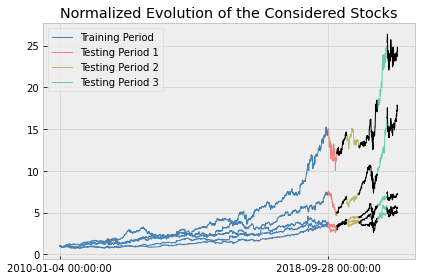

In [52]:
# First Define training and test period
#Training Period
training_end = 2200

#Testing Period 1
test_period_1_start = 2201
test_period_1_end = 2270

#Testing Period 2
test_period_2_start = 2350
test_period_2_end = 2450

#Testing Period 3
test_period_3_start = 2601
test_period_3_end = 2680


normalized_stocks= []
for i in range(len(stocks)):
    normalized_stocks+=[(stocks[i]["Close"]/stocks[i]["Close"][0]).tolist()]
for i in range(len(normalized_stocks)):
    not_test_not_train_1 = [i for i in range(len(normalized_stocks[0])) if 
                     ((i >  training_end)*(i<test_period_1_start))]
    not_test_not_train_2 = [i for i in range(len(normalized_stocks[0])) if 
                     (i >  test_period_1_end)*(i<test_period_2_start)]
    not_test_not_train_3 = [i for i in range(len(normalized_stocks[0])) if 
                     (i >  test_period_2_end)*(i<test_period_3_start)]
    not_test_not_train_4 = [i for i in range(len(normalized_stocks[0])) if 
                     (i >  test_period_3_end)]
    if i==0:
        plt.plot(range(training_end),normalized_stocks[i][:training_end],label="Training Period",color="steelblue", linewidth=1)
        plt.plot(range(test_period_1_start,test_period_1_end),
                 normalized_stocks[i][test_period_1_start:test_period_1_end],label="Testing Period 1",color="lightcoral", linewidth=1)
        plt.plot(range(test_period_2_start,test_period_2_end),
                 normalized_stocks[i][test_period_2_start:test_period_2_end],label="Testing Period 2",color="darkkhaki", linewidth=1)
        plt.plot(range(test_period_3_start,test_period_3_end),
                 normalized_stocks[i][test_period_3_start:test_period_3_end],label="Testing Period 3",color="mediumaquamarine", linewidth=1)
        plt.plot(not_test_not_train_1,
                 [normalized_stocks[i][j] for j in not_test_not_train_1],
                 color="black", linewidth=1)        
        plt.plot(not_test_not_train_2,
                 [normalized_stocks[i][j] for j in not_test_not_train_2],
                 color="black", linewidth=1)        
        plt.plot(not_test_not_train_3,
                 [normalized_stocks[i][j] for j in not_test_not_train_3],
                 color="black", linewidth=1)        
        plt.plot(not_test_not_train_4,
                 [normalized_stocks[i][j] for j in not_test_not_train_4],
                 color="black", linewidth=1)
    else:
        plt.plot(range(training_end),normalized_stocks[i][:training_end],color="steelblue", linewidth=1)
        plt.plot(range(test_period_1_start,test_period_1_end),
                 normalized_stocks[i][test_period_1_start:test_period_1_end],color="lightcoral", linewidth=1)
        plt.plot(range(test_period_2_start,test_period_2_end),
                 normalized_stocks[i][test_period_2_start:test_period_2_end],color="darkkhaki", linewidth=1)
        plt.plot(range(test_period_3_start,test_period_3_end),
                 normalized_stocks[i][test_period_3_start:test_period_3_end],color="mediumaquamarine", linewidth=1)
        plt.plot(not_test_not_train_1,
                 [normalized_stocks[i][j] for j in not_test_not_train_1],
                 color="black", linewidth=1)        
        plt.plot(not_test_not_train_2,
                 [normalized_stocks[i][j] for j in not_test_not_train_2],
                 color="black", linewidth=1)        
        plt.plot(not_test_not_train_3,
                 [normalized_stocks[i][j] for j in not_test_not_train_3],
                 color="black", linewidth=1)        
        plt.plot(not_test_not_train_4,
                 [normalized_stocks[i][j] for j in not_test_not_train_4],
                 color="black", linewidth=1)

plt.title("Normalized Evolution of the Considered Stocks")
xtick_numbers = [0,training_end]
plt.xticks(xtick_numbers, stocks[0]["Date"].iloc[xtick_numbers])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('portfolio_train_test_split.eps', format='eps')
plt.show()

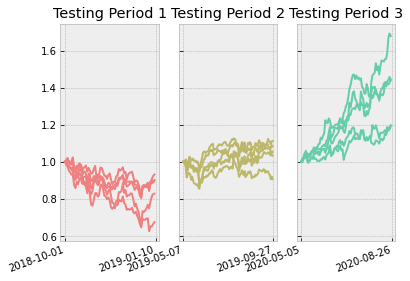

In [53]:
fig, axs = plt.subplots(1, 3, sharey=True)

normalized_period_1 = []
normalized_period_2 = []
normalized_period_3 = []
for i in range(len(stocks)):
    normalized_period_1 += [(stocks[i]["Close"]/stocks[i]["Close"][test_period_1_start]).tolist()]
    normalized_period_2 += [(stocks[i]["Close"]/stocks[i]["Close"][test_period_2_start]).tolist()]
    normalized_period_3 += [(stocks[i]["Close"]/stocks[i]["Close"][test_period_3_start]).tolist()]
axs[0].set_title("Testing Period 1")
axs[0].set_xticks([test_period_1_start,test_period_1_end])
axs[0].set_xticklabels(np.array(stocks[0]["Date"].iloc[[test_period_1_start,test_period_1_end]],dtype='datetime64[D]'))
axs[1].set_title("Testing Period 2")
axs[1].set_xticks([test_period_2_start,test_period_2_end])
axs[1].set_xticklabels(np.array(stocks[1]["Date"].iloc[[test_period_2_start,test_period_2_end]],dtype='datetime64[D]'))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
axs[2].set_title("Testing Period 3")
axs[2].set_xticks([test_period_3_start,test_period_3_end])
axs[2].set_xticklabels(np.array(stocks[2]["Date"].iloc[[test_period_3_start,test_period_3_end]],dtype='datetime64[D]'))

for i in range(3):
    for label in axs[i].get_xticklabels(which='major'):
        label.set(rotation=20, horizontalalignment='right')
    
for j in range(len(normalized_stocks)):
    axs[0].plot(range(test_period_1_start,test_period_1_end),
             normalized_period_1[j][test_period_1_start:test_period_1_end],color="lightcoral", linewidth=2)
    axs[1].plot(range(test_period_2_start,test_period_2_end),
             normalized_period_2[j][test_period_2_start:test_period_2_end],color="darkkhaki", linewidth=2)
    axs[2].plot(range(test_period_3_start,test_period_3_end),
             normalized_period_3[j][test_period_3_start:test_period_3_end],color="mediumaquamarine", linewidth=2)
    

#plt.tight_layout()
plt.savefig('portfolio_test_periods.eps', format='eps')
plt.show()

Compute the asset returns. For our Reinforcement Learning Approach we want to take into account a history of $10$ Returns,i.e., we have $m=10$.

Split also Returns to training and testing returns

In [54]:
# We consider 10 consecutive returns    
Returns_10periods = []
periods = 10 #Lookback period , called m
for i in range(len(stocks)):
    Returns_10periods += [[[(((stocks[i]["Close"][j+k]-stocks[i]["Close"][j-1+k])/stocks[i]["Close"][j-1+k]).tolist())
                            for k in range(periods)] for j in range(1,len(stocks[i])-periods+1)]] 
Returns_10periods = tf.constant(Returns_10periods)

Returns_10periods_train = tf.gather(Returns_10periods,range(training_end),axis = 1)

Returns_10periods_test_1 = tf.gather(Returns_10periods,range(test_period_1_start,test_period_1_end),axis = 1)
Returns_10periods_test_2 = tf.gather(Returns_10periods,range(test_period_2_start,test_period_2_end),axis = 1)
Returns_10periods_test_3 = tf.gather(Returns_10periods,range(test_period_3_start,test_period_3_end),axis = 1)

# Value Iteration

Define a class to train the strategies, based on value iteration

In [55]:
class Robust_Portfolio_Optimization:
    def __init__(self,
                 Returns_train, # Returns used for the training (Consist of at least 2 period-returns)
                 uncertainty = "Wasserstein", # Other option: Parametric
                 C = 1, # Bound for the investment
                 sigma = 0.01, # Volatility of the asset returns for the batches
                   epsilon = 0.01, # Epsilon in the definition of the ambiguity sets                   
                   alpha = 0.45, # Discount Factor
                  Nr_Batch = 2**5, # Batch Number for the computation of the value and action function
                   Nr_measures = 10, # The number of different measures
                   Nr_MC = 32, # Number of Monte-Carlo Simmulations for the expectation                   learning_rate_v = 0.001, #The learning rate for the optimization of v
                   learning_rate_a = 0.001, # The learning rate for the optimization of a
                 learning_rate_v = 0.001, 
                   print_training = False, # Whether the training progress should be printed
                   hidden_layers  = 2,
                   nr_neurons = 128,
                transfer_learning = False):
        
        # Fix some parameters (which are not given as variables):         
        self.D = len(Returns_train) # Number of assets
        self.m = len(Returns_train[0][0]) # M = Number of return considered
        self.N = len(Returns_train[0])-1 # Length of the Time Series (minus last entry, which is not considered for preductions)
        
        #Assign the rest of the parameters:
        self.C = C
        self.sigma = sigma
        self.uncertainty = uncertainty
        self.Returns_train = tf.constant(Returns_train)
        self.Returns_1dim = self.Returns_train[:,:,-1]
        self.Returns_train = self.Returns_train[:,:-1,:] # Delete last entry from Returns 
        self.epsilon = epsilon
        self.alpha = alpha
        self.Nr_Batch = Nr_Batch
        self.Nr_measures = Nr_measures
        self.Nr_MC = Nr_MC
        self.learning_rate_v = learning_rate_v
        self.learning_rate_a =learning_rate_a
        self.depth = hidden_layers# Depth of the neural network
        self.nr_neurons = nr_neurons # Number of Neurons of the neural network (same in each layer)
        self.transfer_learning = transfer_learning
        
        #Initialize objects for optimization
        self.optimizer_v = tf.keras.optimizers.Adam(learning_rate_v, beta_1=0.9, beta_2=0.999)
        self.optimizer_a = tf.keras.optimizers.Adam(learning_rate_a, beta_1=0.9, beta_2=0.999)
        
        # Build the Models
        self.v = self.build_model_v(self.depth,self.nr_neurons)
        self.a = self.build_model_a(self.depth,self.nr_neurons)
        self.old_v = self.v   
        
        # Special case epsilon = 0
        if self.epsilon == 0:
            self.Nr_measures = 1
        
    # Create the neural network v
    def build_model_v(self,depth,nr_neurons):  
        """
        Function that creates the neural network for the value function V
        """
        #Input Layer
        x = keras.Input(shape=(self.D,self.m),name = "x")
        #Flatten the dimensions
        v = layers.Flatten()(x)
        # Batch Normalization applied to the input
        v = layers.BatchNormalization()(v)
        # Create the NN       
        v = layers.Dense(nr_neurons,activation = "relu")(v)
        # Create deep layers
        for i in range(depth):
            v = layers.Dense(nr_neurons,activation = "relu")(v)
        # Output Layers
        value_out = layers.Dense(1)(v)
        model = keras.Model(inputs=[x],outputs = [value_out])
        return model
    
    
    # Create the neural network a
    def build_model_a(self,depth,nr_neurons):
        """
        Function that creates the neural network for the action function a
        """
        #Input Layer
        x = keras.Input(shape=(self.D,self.m),name = "x")
        #Flatten the dimensions
        a = layers.Flatten()(x)
        # Batch Normalization applied to the input
        a = layers.BatchNormalization()(a)
        # Create the NN
        a = layers.Dense(nr_neurons,activation = "relu")(a)
        # Create deep layers
        for i in range(depth):
            a = layers.Dense(nr_neurons,activation = "relu")(a) 
        a = layers.Dense(self.D)(a) #,activation = "tanh")(a) #Compute output (restricted to -1,1)
        value_out = layers.Lambda(lambda y: self.C*tf.nn.tanh(y))(a) #multiply output with factor C
        model = keras.Model(inputs=[x],outputs = [value_out])
        return model
    
            
    # Function to sample a batch of states, assumed to be normally distributed
    def generate_batch(self):
        while True:
            r = random.choices(np.arange(self.N),k=self.Nr_Batch) # With bootstrapping from training returns
            returns = tf.gather(self.Returns_train, r, axis = 1) #(D,Batch,m)
            yield tf.transpose(returns,[1,0,2])
            #assets_returns = tf.random.normal((self.Nr_Batch,self.D,self.m), mean=0.0,stddev=self.sigma)
            #yield tf.constant(assets_returns) 
            
    
    
    #Function to sample the next states X1, given current statex according to p
    def generate_X1(self,x): 
        if self.uncertainty == "Wasserstein":
            # Determine the probabilities
            probs = self.p(x) # Shape (Batchsize, N)
            p_hat = tfd.Categorical(probs=probs)
            # Sample according to these probabilities, Shift by 1 to obtain the next return
            closest_returns_indices = np.array(p_hat.sample()+1,dtype = int)      #(Batch)
            next_return = tf.gather(self.Returns_1dim, closest_returns_indices, axis = 1) #(D,Batch)
            # Reshape everything
            next_return = tf.transpose(next_return)
            next_return = tf.expand_dims(next_return,2) #(Batch,D,1)
            #Add noise and ensure that the perurbed return remains in an epsilon ball
            noise_normal = tf.random.normal((self.Nr_Batch,self.D,1), mean=0.0,stddev=self.sigma)
            noise_unif = tf.random.uniform(shape=(self.Nr_Batch,self.D,1),maxval = self.epsilon)
            noise_normal_norm = tf.norm(noise_normal,axis = 1,keepdims = True)
            noise_normal_norm = tf.tile(noise_normal_norm,[1,self.D,1])
            noise = noise_unif*(noise_normal/noise_normal_norm)
            next_return = next_return + noise
            # glue new return with old x (without first return)
            next_return_glued = tf.concat([x[:,:,1:],next_return],axis = 2)
            return next_return_glued #Size: (Batch,D,m)

        elif self.uncertainty == "Parametric":
            # Compute mu
            mean = tf.reduce_mean(x,2) # Size: (Batch,D)
            # Add Noise to the mean
            noise_normal = tf.random.normal((self.Nr_Batch,self.D), mean=0.0,stddev=self.sigma)
            noise_unif = tf.random.uniform(shape=(self.Nr_Batch,self.D),maxval = self.epsilon)
            noise_normal_norm = tf.norm(noise_normal,axis = 1,keepdims = True)
            noise_normal_norm = tf.tile(noise_normal_norm,[1,self.D])
            noise = noise_unif*(noise_normal/noise_normal_norm) # Size: (Batch,D)
            mu = mean + noise # Size: (Batch,D)
            # Compute Sigma
            noise_normal = tf.random.normal((self.Nr_Batch,self.D,self.m), mean=0.0,stddev=self.sigma)
            noise_unif = tf.random.uniform(shape=(self.Nr_Batch,self.D,self.m),maxval = self.epsilon)
            noise_normal_norm = tf.norm(noise_normal,axis = (1,2),keepdims = True)
            noise_normal_norm = tf.tile(noise_normal_norm,[1,self.D,self.m])
            noise = noise_unif*(noise_normal/noise_normal_norm)
            y = x+noise # Size (Batch,D,m)
            mean_y = tf.tile(tf.expand_dims(tf.reduce_mean(x,2),2),[1,1,self.m])
            Sigma = (1/(self.m-1))*tf.linalg.matmul(y-mean_y,y-mean_y,transpose_b=True) # (Batch,D,D)
            # Sample the next value
            distribution = tfp.distributions.MultivariateNormalTriL(loc=mu,
                                                                    scale_tril=tf.linalg.cholesky(Sigma))
            next_return = distribution.sample(event_shape=(self.D))
            next_return = tf.expand_dims(next_return,2)
            next_return_glued = tf.concat([x[:,:,1:],next_return],axis = 2)
            return next_return_glued #Size: (Batch,D,m)
    
    #Helper Function to compute the probabilities in the Wasserstein-Case
    def p(self, x, epsilon=1e-20):        # x has the shape (Batchsize,d,m)
        x = tf.expand_dims(x,1)
        x = tf.tile(x,[1,self.N,1,1]) #((Batchsize,N,d,m))
        y = tf.cast(tf.transpose(self.Returns_train,(1,0,2)),dtype = tf.float32) # Shape (N,d,m)
        y = tf.expand_dims(y,0)   
        y = tf.tile(y,[self.Nr_Batch,1,1,1]) #((Batchsize,N,d,m))
        probs = 1/(tf.sqrt(tf.reduce_sum(tf.square(x-y),axis = (2,3)))+epsilon)  #((Batchsize,N))
        probs_sum = tf.reduce_sum(probs,axis = 1,keepdims = True)
        probs_sum = tf.tile(probs_sum,[1,self.N])
        probs = probs/probs_sum
        return probs # Shape (Batchsize, N)

    def maximize_a(self,X_0):
        A = self.a(X_0,training = True) # Size (Batch,D)   
        #Generate X_1
        X_1 = tf.stack([self.generate_X1(X_0) for _ in range(self.Nr_measures*self.Nr_MC)]) #(Nr_measures*Nr_MC,Batch,D,m) 
        #_1 = tf.map_fn(fn = lambda y: self.generate_X1(X_0), elems = tf.ones(self.Nr_measures*self.Nr_MC)) #(Nr_measures*Nr_MC,Batch,D,m) 
        # Reshape X_1
        X_1_Matrix = tf.reshape(X_1,[self.Nr_measures,self.Nr_MC,self.Nr_Batch,self.D,self.m])
        X_1_Matrix = tf.transpose(X_1_Matrix,[2,3,4,0,1]) #Size: (Batch,D,m,Nr_measures,Nr_MC)
        # Compute c
        A_Matrix = tf.tile(tf.expand_dims(tf.expand_dims(A,2),3),[1,1,self.Nr_measures,self.Nr_MC]) # Size (Batch,D,Nr_measures,Nr_MC)
        C = tf.reduce_sum(X_1_Matrix[:,:,-1,:,:]*A_Matrix,1) # Size: (Batch,Nr_measures,Nr_MC)
        #C = tf.stack([tf.reduce_sum(X_1[i,:,:,-1]*A,1) for i in range(self.Nr_measures*self.Nr_MC)])
        #C = tf.transpose(C)
        #C = tf.reshape(C,[self.Nr_Batch,self.Nr_measures,self.Nr_MC])
        # Compute V
        V_Matrix =  tf.stack([self.old_v(X_1[i,:,:,:],training = False) for i in range(self.Nr_measures*self.Nr_MC)])
        #V_Matrix = tf.map_fn(fn = lambda y: self.v(y,training = False) , elems = X_1) #(Nr_measures*Nr_MC,Batch)    
        V_Matrix = tf.reshape(V_Matrix,[self.Nr_measures,self.Nr_MC,self.Nr_Batch])
        V = tf.transpose(V_Matrix,[2,0,1])
        # Mean w.r.t. Monte Carlo Samples
        means = tf.reduce_mean(C+self.alpha*V,2) # Size: (Batch,Nr_measures,Nr_MC)
        # Minimum w.r.t. the measures
        TV = tf.reduce_min(means,1)
        # Maximize w.r.t. a
        return tf.reduce_mean(-TV)
    
    
    def minimize_quadratic_error(self,X_0):
        A = self.a(X_0,training = False) # Size (Batch,D)      
        #Generate X_1
        #X_1 = tf.map_fn(fn = lambda y: self.generate_X1(X_0), elems = tf.ones(self.Nr_measures*self.Nr_MC)) #(Nr_measures*Nr_MC,Batch,D,m) 
        X_1 = tf.stack([self.generate_X1(X_0) for _ in range(self.Nr_measures*self.Nr_MC)]) #(Nr_measures*Nr_MC,Batch,D,m) 
        # Reshape X_1
        X_1_Matrix = tf.reshape(X_1,[self.Nr_measures,self.Nr_MC,self.Nr_Batch,self.D,self.m])
        X_1_Matrix = tf.transpose(X_1_Matrix,[2,3,4,0,1]) #Size: (Batch,D,m,Nr_measures,Nr_MC)
        # Compute c
        A_Matrix = tf.tile(tf.expand_dims(tf.expand_dims(A,2),3),[1,1,self.Nr_measures,self.Nr_MC]) # Size (Batch,D,Nr_measures,Nr_MC)
        C = tf.reduce_sum(X_1_Matrix[:,:,-1,:,:]*A_Matrix,1) # Size: (Batch,Nr_measures,Nr_MC)
        #C = tf.stack([tf.reduce_sum(X_1[i,:,:,-1]*A,1) for i in range(self.Nr_measures*self.Nr_MC)])
        #C = tf.transpose(C)
        #C = tf.reshape(C,[self.Nr_Batch,self.Nr_measures,self.Nr_MC])
        # Compute V
        V_Matrix =  tf.stack([self.old_v(X_1[i,:,:,:],training = False) for i in range(self.Nr_measures*self.Nr_MC)])
        #V_Matrix = tf.map_fn(fn = lambda y: self.old_v(y,training = False) , elems = X_1) #(Nr_measures*Nr_MC,Batch)    
        V_Matrix = tf.reshape(V_Matrix,[self.Nr_measures,self.Nr_MC,self.Nr_Batch])
        V = tf.transpose(V_Matrix,[2,0,1]) #Size: (Batch,Nr_measures,Nr_MC)
        # Mean w.r.t. Monte Carlo Samples
        means = tf.reduce_mean(C+self.alpha*V,2) # Size: (Batch,Nr_measures)
        # Minimum w.r.t. the measures
        TV = tf.reduce_min(means,1)        
        # Minimize the quadratic difference
        return tf.reduce_mean(tf.square(self.v(X_0,training = True)-TV))

    def grad_optimization_v(self,X_0):
        """
        The gradient of the first optimization step
        """
        with tf.GradientTape() as tape:
            loss_v = self.minimize_quadratic_error(X_0)
        return loss_v, tape.gradient(loss_v ,self.v.trainable_variables)
    
    def grad_optimization_a(self,X_0):
        """
        The gradient of the second optimization step
        """
        with tf.GradientTape() as tape:
            loss_a = self.maximize_a(X_0)
        return loss_a , tape.gradient(loss_a ,self.a.trainable_variables)
        
    
    # The Training routine
    def train(self,Epochs = 10,iterations_a=5,iterations_v=5):
        for Epoch in tqdm(range(Epochs)):
            print("\n#######\nEpoch {} \n#######\n".format(Epoch+1))
            # Transfer weights from v to old_v
            self.old_v = tf.keras.models.clone_model(self.v)
            self.old_v.set_weights(self.v.get_weights())
            self.old_v.trainable = False
            
            #Optimize v
            for _ in range(iterations_v):
                #First generate a batch of states
                X_0 = next(self.generate_batch()) # Size: (Batch,D,m)
                # Minimize the difference between v and TV
                loss_value_v_most_recent, grads_v = self.grad_optimization_v(X_0)
                self.optimizer_v.apply_gradients(zip(grads_v, self.v.trainable_variables))
                print("V: {}".format(loss_value_v_most_recent))
                
            
            #Optimize a
            for _ in range(iterations_a):
                # Transfer Learning, Transfers weights from v to a
                if self.transfer_learning:
                    for k in range(len(self.a.layers[:-4])):
                        self.a.layers[k].set_weights(self.v.layers[k].get_weights())
                        self.a.layers[k].trainable = False
                #First generate a batch of states
                X_0 = next(self.generate_batch()) # Size: (Batch,D,m)
                #Optimize a
                loss_value_a, grads_a = self.grad_optimization_a(X_0)
                self.optimizer_a.apply_gradients(zip(grads_a, self.a.trainable_variables))
                print("a: {}".format(-loss_value_a.numpy()))
                


# Training optimal strategies for different parameters $\epsilon$

In [56]:
# Define the set of epsilons
epsilons = [0,0.01,0.05,0.1,0.3]
# Scaling Factor for the epsilons considered in the parametric approach
scale_parametric = 0.5
# Train for each epsilon
a_W, a_P = [], []
for epsilon in epsilons:
    RL_W = Robust_Portfolio_Optimization(Returns_10periods_train,uncertainty = "Wasserstein",
                                        Nr_measures= 10,
                                        epsilon =epsilon,
                                        Nr_Batch= 2**8,
                                        Nr_MC  = 2**3,
                                        alpha = 0.45)
    RL_P = Robust_Portfolio_Optimization(Returns_10periods_train,uncertainty = "Parametric",
                                        Nr_measures= 10,
                                        epsilon =epsilon*scale_parametric,
                                        Nr_Batch= 2**8,
                                        Nr_MC  = 2**3,
                                        alpha = 0.45)

    RL_W.train(Epochs = 50,iterations_a=10,iterations_v=10)
    a_W.append(RL_W.a)
    RL_P.train(Epochs = 50,iterations_a=10,iterations_v=10)
    a_P.append(RL_P.a)

  0%|          | 0/50 [00:00<?, ?it/s]


#######
Epoch 1 
#######

V: 0.029746990650892258
V: 0.015076810494065285
V: 0.016335871070623398
V: 0.013361012563109398
V: 0.005959469359368086
V: 0.004433260299265385
V: 0.007004791405051947
V: 0.007164862006902695
V: 0.006073723081499338
V: 0.004483812488615513
a: -0.0020866950508207083
a: -0.0018148330273106694
a: -0.0020819951314479113
a: -0.0020514463540166616
a: -0.001951947109773755
a: -0.0018294253386557102
a: -0.0010401001200079918
a: -0.0019990094006061554
a: -0.0008970798226073384


  2%|▏         | 1/50 [00:02<02:05,  2.55s/it]

a: 6.5856584114953876e-06

#######
Epoch 2 
#######

V: 0.0033368852455168962
V: 0.0023576964158564806
V: 0.003065224504098296
V: 0.004548239521682262
V: 0.0035516752395778894
V: 0.002829445991665125
V: 0.0024857278913259506
V: 0.0019499151967465878
V: 0.001832552021369338
V: 0.0017867872957140207
a: 0.0023895350750535727
a: 0.002878054976463318
a: 0.0029112789779901505
a: 0.0020832268055528402
a: 0.003067310433834791
a: 0.0026160620618611574
a: 0.00416109524667263
a: 0.001677021966315806
a: 0.003153699217364192


  4%|▍         | 2/50 [00:05<02:10,  2.71s/it]

a: 0.002737512346357107

#######
Epoch 3 
#######

V: 0.0021583354100584984
V: 0.0018620385089889169
V: 0.00190169014967978
V: 0.001602162723429501
V: 0.0015617064200341702
V: 0.0010697012767195702
V: 0.0012459184508770704
V: 0.0011998533736914396
V: 0.0013594647170975804
V: 0.001155198086053133
a: 0.0028093839064240456
a: 0.002962610451504588
a: 0.005197776947170496
a: 0.005789361894130707
a: 0.005282986909151077
a: 0.003136447863653302
a: 0.004707952495664358
a: 0.004320089239627123


  6%|▌         | 3/50 [00:08<02:14,  2.86s/it]

a: 0.001550971413962543
a: 0.0033808250445872545

#######
Epoch 4 
#######

V: 0.0009970864048227668
V: 0.0010982308303937316
V: 0.0010814788984134793
V: 0.0008517041569575667
V: 0.0007755653350614011
V: 0.0006654199678450823
V: 0.0010018220636993647
V: 0.0009284272673539817
V: 0.0009225743124261498
V: 0.0007961713708937168
a: 0.00843676645308733
a: 0.00744782667607069
a: 0.00808808021247387
a: 0.009810196235775948
a: 0.004482422024011612
a: 0.00560187641531229
a: 0.00980762206017971
a: 0.006028234492987394
a: 0.006142888683825731


  8%|▊         | 4/50 [00:11<02:17,  2.99s/it]

a: 0.0032659070566296577

#######
Epoch 5 
#######

V: 0.0009728239965625107
V: 0.000772198080085218
V: 0.0009179026237688959
V: 0.0007568668224848807
V: 0.0007955491309985518
V: 0.0008188023348338902
V: 0.0007668419275432825
V: 0.0007739891298115253
V: 0.0006610867567360401
V: 0.0006213930901139975
a: 0.006209270562976599
a: 0.0029821558855473995
a: 0.000644178013317287
a: 0.006841905415058136
a: 0.011219510808587074
a: 0.00766203086823225
a: 0.007269568741321564
a: 0.006908522918820381
a: 0.003279228461906314


 10%|█         | 5/50 [00:14<02:12,  2.94s/it]

a: 0.006151493638753891

#######
Epoch 6 
#######

V: 0.0007013036520220339
V: 0.0006830261554569006
V: 0.0005727474926970899
V: 0.0007076440379023552
V: 0.0006694758194498718
V: 0.000571565586142242
V: 0.0006691534072160721
V: 0.0006454092799685895
V: 0.0006714347400702536
V: 0.0005497794481925666
a: 0.008543399162590504
a: 0.011545156128704548
a: 0.005288437940180302
a: 0.007806486450135708
a: 0.007982108741998672
a: 0.011647514998912811
a: 0.009204602800309658
a: 0.008770493790507317
a: 0.010941560380160809


 12%|█▏        | 6/50 [00:17<02:05,  2.84s/it]

a: 0.01163464318960905

#######
Epoch 7 
#######

V: 0.0005758037441410124
V: 0.0006229258142411709
V: 0.0006739040836691856
V: 0.0007058308692649007
V: 0.0006011392106302083
V: 0.0006578576285392046
V: 0.0006598265608772635
V: 0.0007038371404632926
V: 0.000561028253287077
V: 0.0006672310992144048
a: 0.0096326544880867
a: 0.006351592484861612
a: 0.009679241105914116
a: 0.011800535023212433
a: 0.010758373886346817
a: 0.012248390354216099
a: 0.013687350787222385
a: 0.008746195584535599
a: 0.009950838051736355


 14%|█▍        | 7/50 [00:19<01:59,  2.77s/it]

a: 0.01243644393980503

#######
Epoch 8 
#######

V: 0.0007117952918633819
V: 0.0007023481884971261
V: 0.0007804478518664837
V: 0.0008014239137992263
V: 0.0006626084796153009
V: 0.0006268824217841029
V: 0.0007177692605182528
V: 0.0005343887023627758
V: 0.0007828745292499661
V: 0.0007002227357588708
a: 0.005936985835433006
a: 0.011834261938929558
a: 0.009681986644864082
a: 0.004342738538980484
a: 0.012568335048854351
a: 0.013520525768399239
a: 0.012867378070950508
a: 0.01617548242211342
a: 0.012243175879120827


 16%|█▌        | 8/50 [00:22<01:53,  2.69s/it]

a: 0.010875032283365726

#######
Epoch 9 
#######

V: 0.000796865439042449
V: 0.0006798653630539775
V: 0.0008103534928523004
V: 0.0006295225466601551
V: 0.000739067152608186
V: 0.0008125575841404498
V: 0.0006798043032176793
V: 0.0005702326307073236
V: 0.0007140043890103698
V: 0.0008207514183595777
a: 0.011939914897084236
a: 0.015295039862394333
a: 0.015753427520394325
a: 0.011895493604242802
a: 0.013438686728477478
a: 0.010060252621769905
a: 0.010934466496109962
a: 0.011252837255597115
a: 0.010156138800084591


 18%|█▊        | 9/50 [00:24<01:46,  2.59s/it]

a: 0.014136475510895252

#######
Epoch 10 
#######

V: 0.0005744093796238303
V: 0.0005005747079849243
V: 0.00039199707680381835
V: 0.00047555321361869574
V: 0.00037844679900445044
V: 0.0005269870162010193
V: 0.0004790626699104905
V: 0.0005713022546842694
V: 0.0004736421105917543
V: 0.0004632648197002709
a: 0.008729067631065845
a: 0.012022675946354866
a: 0.015613478608429432
a: 0.01571914553642273
a: 0.01866009645164013
a: 0.016829270869493484
a: 0.016500426456332207
a: 0.017435254529118538
a: 0.01997198350727558


 20%|██        | 10/50 [00:26<01:40,  2.50s/it]

a: 0.01186263095587492

#######
Epoch 11 
#######

V: 0.0009426295291632414
V: 0.0007594405324198306
V: 0.000826769508421421
V: 0.0008966919267550111
V: 0.0009427728364244103
V: 0.000977803603745997
V: 0.001012509106658399
V: 0.0009609411936253309
V: 0.0010090311989188194
V: 0.0009555962169542909
a: 0.010934959165751934
a: 0.014945057220757008
a: 0.01780599169433117
a: 0.016094433143734932
a: 0.01534234918653965
a: 0.020002340897917747
a: 0.015355992130935192
a: 0.013002029620110989
a: 0.014162199571728706


 22%|██▏       | 11/50 [00:29<01:35,  2.45s/it]

a: 0.01110864244401455

#######
Epoch 12 
#######

V: 0.0007159075466915965
V: 0.0009414460510015488
V: 0.0009657233604229987
V: 0.0008149236091412604
V: 0.0009517932194285095
V: 0.0010016356827691197
V: 0.0006996882148087025
V: 0.0008299170876853168
V: 0.000829436001367867
V: 0.0008763218065723777
a: 0.015281440690159798
a: 0.01787431538105011
a: 0.019824933260679245
a: 0.02086266689002514
a: 0.01798369362950325
a: 0.01706959493458271
a: 0.018683865666389465
a: 0.025815702974796295
a: 0.013721195980906487


 24%|██▍       | 12/50 [00:31<01:31,  2.41s/it]

a: 0.01732897013425827

#######
Epoch 13 
#######

V: 0.0006061297608539462
V: 0.0006170989363454282
V: 0.0005959273548796773
V: 0.0009605186642147601
V: 0.0009381799027323723
V: 0.0006928015500307083
V: 0.0006063117762096226
V: 0.0006074437405914068
V: 0.0006838531116954982
V: 0.0006242527160793543
a: 0.024279994890093803
a: 0.01738891378045082
a: 0.022140368819236755
a: 0.0164824016392231
a: 0.021153517067432404
a: 0.025033248588442802
a: 0.0199761800467968
a: 0.016738170757889748
a: 0.022282198071479797


 26%|██▌       | 13/50 [00:33<01:28,  2.38s/it]

a: 0.02052469551563263

#######
Epoch 14 
#######

V: 0.0005816517514176667
V: 0.0007287771441042423
V: 0.0005377904162742198
V: 0.0006716942298226058
V: 0.0005829723086208105
V: 0.000528219505213201
V: 0.0005980071146041155
V: 0.0005298772593960166
V: 0.0006472559180110693
V: 0.0006663575186394155
a: 0.025260888040065765
a: 0.024564316496253014
a: 0.01982523500919342
a: 0.0234087985008955
a: 0.02002050168812275
a: 0.021711330860853195
a: 0.019625473767518997
a: 0.02458035945892334
a: 0.018952498212456703


 28%|██▊       | 14/50 [00:36<01:24,  2.36s/it]

a: 0.022219311445951462

#######
Epoch 15 
#######

V: 0.0005854895571246743
V: 0.00048544182209298015
V: 0.0006725805578753352
V: 0.0005623307661153376
V: 0.0007254815427586436
V: 0.0005733754951506853
V: 0.00041911937296390533
V: 0.0004676826065406203
V: 0.0005091102793812752
V: 0.0005008693551644683
a: 0.02461724914610386
a: 0.024459432810544968
a: 0.02094430848956108
a: 0.024429740384221077
a: 0.028724197298288345
a: 0.025649353861808777
a: 0.023822657763957977
a: 0.021140357479453087
a: 0.022786755114793777


 30%|███       | 15/50 [00:38<01:21,  2.34s/it]

a: 0.024207059293985367

#######
Epoch 16 
#######

V: 0.0005067266756668687
V: 0.000382457859814167
V: 0.00032247620401903987
V: 0.00031625479459762573
V: 0.00045504391891881824
V: 0.0004261911381036043
V: 0.000465868302853778
V: 0.00036607775837183
V: 0.00035430447314865887
V: 0.00037057677400298417
a: 0.01991511881351471
a: 0.027044763788580894
a: 0.025328921154141426
a: 0.026233166456222534
a: 0.022120509296655655
a: 0.028785699978470802
a: 0.018038107082247734
a: 0.026260264217853546
a: 0.025288721546530724


 32%|███▏      | 16/50 [00:40<01:19,  2.33s/it]

a: 0.02011672779917717

#######
Epoch 17 
#######

V: 0.0004398092278279364
V: 0.0004826652002520859
V: 0.0004090987204108387
V: 0.000537114217877388
V: 0.00044372695265337825
V: 0.0004204513970762491
V: 0.0004113215545658022
V: 0.000501270464155823
V: 0.0005499653052538633
V: 0.0004517884517554194
a: 0.02902117371559143
a: 0.02893405593931675
a: 0.023999091237783432
a: 0.025267468765378
a: 0.028899848461151123
a: 0.03291931748390198
a: 0.02432417869567871
a: 0.02300792932510376
a: 0.026236996054649353


 34%|███▍      | 17/50 [00:43<01:17,  2.33s/it]

a: 0.029098324477672577

#######
Epoch 18 
#######

V: 0.0003528347588144243
V: 0.0004129241860937327
V: 0.00036534841638058424
V: 0.0004090293659828603
V: 0.0003200373030267656
V: 0.00027989328373223543
V: 0.0003668847493827343
V: 0.00028281426057219505
V: 0.00030624493956565857
V: 0.00038572130142711103
a: 0.029784653335809708
a: 0.031348321586847305
a: 0.023253291845321655
a: 0.02774116024374962
a: 0.030153721570968628
a: 0.0287262424826622
a: 0.026396369561553
a: 0.03320574387907982
a: 0.028064770624041557


 36%|███▌      | 18/50 [00:45<01:15,  2.35s/it]

a: 0.026880355551838875

#######
Epoch 19 
#######

V: 0.00028733257204294205
V: 0.0003608328988775611
V: 0.00031502204365096986
V: 0.00047167198499664664
V: 0.0005144760361872613
V: 0.0003629930433817208
V: 0.00025865432689897716
V: 0.0003009183274116367
V: 0.0004267910262569785
V: 0.00029137477395124733
a: 0.03390881419181824
a: 0.03045956790447235
a: 0.030521849170327187
a: 0.02657909318804741
a: 0.030215874314308167
a: 0.02581959404051304
a: 0.028120407834649086
a: 0.03248714655637741
a: 0.03069171868264675


 38%|███▊      | 19/50 [00:47<01:12,  2.34s/it]

a: 0.026458989828824997

#######
Epoch 20 
#######

V: 0.00038913951721042395
V: 0.0003913609543815255
V: 0.00031808088533580303
V: 0.0005732318386435509
V: 0.0003853788657579571
V: 0.00046396738616749644
V: 0.00044395611621439457
V: 0.0006025334587320685
V: 0.0004838590102735907
V: 0.0006002775626257062
a: 0.028308531269431114
a: 0.03165765851736069
a: 0.03274707496166229
a: 0.028233880177140236
a: 0.032176826149225235
a: 0.0309074055403471
a: 0.030125850811600685
a: 0.028939886018633842
a: 0.02745133824646473


 40%|████      | 20/50 [00:50<01:09,  2.33s/it]

a: 0.03160523623228073

#######
Epoch 21 
#######

V: 0.0006377311074174941
V: 0.0004657769459299743
V: 0.0004587719158735126
V: 0.0006091037066653371
V: 0.000656787829939276
V: 0.0005225047352723777
V: 0.0007890505949035287
V: 0.0006521912291646004
V: 0.0005704049253836274
V: 0.0005096149398013949
a: 0.027156874537467957
a: 0.028376316651701927
a: 0.03502380847930908
a: 0.029961097985506058
a: 0.03408024460077286
a: 0.03788598254323006
a: 0.029841553419828415
a: 0.03681283816695213
a: 0.034204721450805664


 42%|████▏     | 21/50 [00:52<01:07,  2.32s/it]

a: 0.03333225101232529

#######
Epoch 22 
#######

V: 0.0004599927633535117
V: 0.0008178814314305782
V: 0.0006932805408723652
V: 0.0007966806879267097
V: 0.0005895639769732952
V: 0.0005500604165717959
V: 0.0006130951223894954
V: 0.0006931897951290011
V: 0.0005554852541536093
V: 0.0006800031987950206
a: 0.03418603539466858
a: 0.03433460369706154
a: 0.035030242055654526
a: 0.03409966826438904
a: 0.04038235545158386
a: 0.031499892473220825
a: 0.031009521335363388
a: 0.035321250557899475
a: 0.034577321261167526


 44%|████▍     | 22/50 [00:54<01:05,  2.33s/it]

a: 0.030813496559858322

#######
Epoch 23 
#######

V: 0.0007452473510056734
V: 0.00044755934504792094
V: 0.000560352869797498
V: 0.0004656612582039088
V: 0.0005512039642781019
V: 0.0006675256881862879
V: 0.0006810185732319951
V: 0.00046058080624789
V: 0.0006476645939983428
V: 0.00043417405686341226
a: 0.04089108482003212
a: 0.03564738109707832
a: 0.035998668521642685
a: 0.036785099655389786
a: 0.03604600206017494
a: 0.03363046422600746
a: 0.03617953136563301
a: 0.034731924533843994
a: 0.034707650542259216


 46%|████▌     | 23/50 [00:57<01:03,  2.34s/it]

a: 0.033470384776592255

#######
Epoch 24 
#######

V: 0.0006107433000579476
V: 0.0007517145713791251
V: 0.0005845652194693685
V: 0.0007315757684409618
V: 0.0006122562917880714
V: 0.0006054167752154171
V: 0.000523064867593348
V: 0.00044658302795141935
V: 0.0004788912774529308
V: 0.0006368060130625963
a: 0.03507242351770401
a: 0.03497954085469246
a: 0.030224379152059555
a: 0.03632267192006111
a: 0.03602081164717674
a: 0.03401321917772293
a: 0.038500189781188965
a: 0.03458016738295555
a: 0.041333816945552826


 48%|████▊     | 24/50 [00:59<01:00,  2.33s/it]

a: 0.03236611932516098

#######
Epoch 25 
#######

V: 0.001162380794994533
V: 0.0015186764067038894
V: 0.0006589632830582559
V: 0.0007706414326094091
V: 0.0009603257058188319
V: 0.0009253313182853162
V: 0.0010593982879072428
V: 0.0007725346367806196
V: 0.0011994773522019386
V: 0.0014347280375659466
a: 0.03438450023531914
a: 0.04029810428619385
a: 0.0354909673333168
a: 0.037538472563028336
a: 0.04215317219495773
a: 0.03596946597099304
a: 0.03585226088762283
a: 0.03907325491309166
a: 0.04371526837348938


 50%|█████     | 25/50 [01:01<00:57,  2.32s/it]

a: 0.03832368552684784

#######
Epoch 26 
#######

V: 0.0007028270047158003
V: 0.0008766997489146888
V: 0.0006657944177277386
V: 0.0012029617791995406
V: 0.0009476832346990705
V: 0.0008380500948987901
V: 0.0007641410338692367
V: 0.0010874837171286345
V: 0.0008791061118245125
V: 0.0009480122243985534
a: 0.035397619009017944
a: 0.040399618446826935
a: 0.03593963384628296
a: 0.04016459733247757
a: 0.03904926776885986
a: 0.03868264704942703
a: 0.035945963114500046
a: 0.03553429991006851
a: 0.042221128940582275


 52%|█████▏    | 26/50 [01:04<00:55,  2.32s/it]

a: 0.03925662487745285

#######
Epoch 27 
#######

V: 0.0011167069897055626
V: 0.0007050936110317707
V: 0.0010539541253820062
V: 0.0008037302759476006
V: 0.0008651890675537288
V: 0.001081117196008563
V: 0.0008909065509214997
V: 0.0012023707386106253
V: 0.000770328042563051
V: 0.0008100150153040886
a: 0.042211826890707016
a: 0.03749338164925575
a: 0.040442224591970444
a: 0.03700605034828186
a: 0.045387573540210724
a: 0.04286519065499306
a: 0.04105177894234657
a: 0.03314218670129776
a: 0.04474747180938721


 54%|█████▍    | 27/50 [01:06<00:53,  2.31s/it]

a: 0.039738431572914124

#######
Epoch 28 
#######

V: 0.0008848719880916178
V: 0.0008338146144524217
V: 0.0007569101871922612
V: 0.0009326826548203826
V: 0.0009284196421504021
V: 0.000979473814368248
V: 0.0008425567066296935
V: 0.0007212767377495766
V: 0.0007117025670595467
V: 0.0008910221513360739
a: 0.036817293614149094
a: 0.04074230045080185
a: 0.038675352931022644
a: 0.04227368161082268
a: 0.041810207068920135
a: 0.0366944819688797
a: 0.03600495308637619
a: 0.05323927104473114
a: 0.04309863597154617


 56%|█████▌    | 28/50 [01:08<00:50,  2.31s/it]

a: 0.042530979961156845

#######
Epoch 29 
#######

V: 0.0012506183702498674
V: 0.001074888277798891
V: 0.0014454538468271494
V: 0.0012823338620364666
V: 0.0009333528578281403
V: 0.0013203721027821302
V: 0.0008293732535094023
V: 0.0008863256080076098
V: 0.0010161600075662136
V: 0.0009531118557788432
a: 0.04668174311518669
a: 0.04619026929140091
a: 0.043146565556526184
a: 0.04569986090064049
a: 0.041257549077272415
a: 0.03768632933497429
a: 0.04548931494355202
a: 0.042660802602767944
a: 0.044620707631111145


 58%|█████▊    | 29/50 [01:10<00:48,  2.31s/it]

a: 0.04820253700017929

#######
Epoch 30 
#######

V: 0.001240387442521751
V: 0.0013551769079640508
V: 0.0010974167380481958
V: 0.001027615275233984
V: 0.0014158720150589943
V: 0.0008307456155307591
V: 0.001073843683116138
V: 0.0011481515830382705
V: 0.0014403448440134525
V: 0.001199441496282816
a: 0.04817003011703491
a: 0.04330524429678917
a: 0.04482758045196533
a: 0.047558266669511795
a: 0.04163680225610733
a: 0.04403981938958168
a: 0.04983171075582504
a: 0.04259832575917244
a: 0.04307623207569122


 60%|██████    | 30/50 [01:13<00:46,  2.31s/it]

a: 0.045415423810482025

#######
Epoch 31 
#######

V: 0.0015729381702840328
V: 0.0010916631435975432
V: 0.0010468692053109407
V: 0.0015080017037689686
V: 0.0011287584202364087
V: 0.0010592835023999214
V: 0.0015212858561426401
V: 0.0011208218056708574
V: 0.001040428294800222
V: 0.001137060346081853
a: 0.04472649097442627
a: 0.04267400503158569
a: 0.04470369219779968
a: 0.04387422278523445
a: 0.04160235822200775
a: 0.04827817156910896
a: 0.04411597549915314
a: 0.05126471817493439
a: 0.03977207466959953


 62%|██████▏   | 31/50 [01:15<00:44,  2.32s/it]

a: 0.04248169809579849

#######
Epoch 32 
#######

V: 0.0011346235405653715
V: 0.0008654099656268954
V: 0.0012159752659499645
V: 0.001049478305503726
V: 0.0011897790245711803
V: 0.001206953078508377
V: 0.0012639658525586128
V: 0.000784176227170974
V: 0.0009665809338912368
V: 0.001290588523261249
a: 0.04710620269179344
a: 0.04185687378048897
a: 0.04788739234209061
a: 0.04176487773656845
a: 0.04507676884531975
a: 0.04053138196468353
a: 0.04065414518117905
a: 0.04802592471241951
a: 0.043313026428222656


 64%|██████▍   | 32/50 [01:17<00:41,  2.33s/it]

a: 0.04695864021778107

#######
Epoch 33 
#######

V: 0.0018179239705204964
V: 0.001220593461766839
V: 0.001301001524552703
V: 0.0011043539270758629
V: 0.0012198303593322635
V: 0.0017878480721265078
V: 0.0016457840101793408
V: 0.0014584470773115754
V: 0.0015616704476997256
V: 0.0015046235639601946
a: 0.04233422502875328
a: 0.04941359907388687
a: 0.04246033728122711
a: 0.0520443469285965
a: 0.04416103661060333
a: 0.04632953181862831
a: 0.04033294692635536
a: 0.045548468828201294
a: 0.04870079830288887


 66%|██████▌   | 33/50 [01:20<00:39,  2.33s/it]

a: 0.04820864647626877

#######
Epoch 34 
#######

V: 0.0010568551952019334
V: 0.0009436968248337507
V: 0.0013486284296959639
V: 0.0012318898225203156
V: 0.001355550717562437
V: 0.0014513047644868493
V: 0.001437600003555417
V: 0.0015920104924589396
V: 0.001153352903202176
V: 0.001469641225412488
a: 0.04730793833732605
a: 0.05141075327992439
a: 0.049264099448919296
a: 0.046504952013492584
a: 0.04949196055531502
a: 0.04973403364419937
a: 0.041963815689086914
a: 0.048197388648986816
a: 0.04609435051679611


 68%|██████▊   | 34/50 [01:22<00:37,  2.32s/it]

a: 0.050674982368946075

#######
Epoch 35 
#######

V: 0.0013703173026442528
V: 0.0014627875061705709
V: 0.0013444783398881555
V: 0.0011779990745708346
V: 0.001278358744457364
V: 0.0013857304584234953
V: 0.00175547378603369
V: 0.0012864228338003159
V: 0.001187827903777361
V: 0.0011235959827899933
a: 0.055269356817007065
a: 0.04983985796570778
a: 0.04854100942611694
a: 0.04992484673857689
a: 0.04648907110095024
a: 0.051285434514284134
a: 0.04851836711168289
a: 0.051769208163022995
a: 0.052084486931562424


 70%|███████   | 35/50 [01:24<00:34,  2.33s/it]

a: 0.04891527444124222

#######
Epoch 36 
#######

V: 0.0016477950848639011
V: 0.0021055033430457115
V: 0.0012052805395796895
V: 0.001595265232026577
V: 0.001701118191704154
V: 0.001513004768639803
V: 0.0009271632297895849
V: 0.0010680854320526123
V: 0.0009502395987510681
V: 0.001288887346163392
a: 0.048629507422447205
a: 0.05290251597762108
a: 0.04829975217580795
a: 0.05026240646839142
a: 0.04734920710325241
a: 0.052914999425411224
a: 0.05148879811167717
a: 0.04838894307613373
a: 0.049768220633268356


 72%|███████▏  | 36/50 [01:27<00:32,  2.33s/it]

a: 0.05006086453795433

#######
Epoch 37 
#######

V: 0.0010784182231873274
V: 0.001383528346195817
V: 0.0014830166473984718
V: 0.0013293024385347962
V: 0.0016407405491918325
V: 0.0010940504726022482
V: 0.001790020614862442
V: 0.001272022956982255
V: 0.0013791527599096298
V: 0.0012870701029896736
a: 0.05599508807063103
a: 0.0502941869199276
a: 0.05503879860043526
a: 0.05156051740050316
a: 0.05027049407362938
a: 0.052430666983127594
a: 0.04826376214623451
a: 0.05367891862988472
a: 0.04939032718539238


 74%|███████▍  | 37/50 [01:29<00:30,  2.33s/it]

a: 0.047067463397979736

#######
Epoch 38 
#######

V: 0.0016585846897214651
V: 0.0015351534821093082
V: 0.0015068815555423498
V: 0.0013885945081710815
V: 0.00171744916588068
V: 0.002149770734831691
V: 0.0009143927018158138
V: 0.001644948497414589
V: 0.0013155167689546943
V: 0.0014987591421231627
a: 0.056573573499917984
a: 0.046512190252542496
a: 0.05169804394245148
a: 0.05372384935617447
a: 0.04821758717298508
a: 0.05011396110057831
a: 0.05400911718606949
a: 0.054412003606557846
a: 0.04793146625161171


 76%|███████▌  | 38/50 [01:31<00:28,  2.34s/it]

a: 0.05265010893344879

#######
Epoch 39 
#######

V: 0.0014292134437710047
V: 0.0015718494541943073
V: 0.0014329776167869568
V: 0.0015061711892485619
V: 0.0009319249074906111
V: 0.0016519948840141296
V: 0.001992488745599985
V: 0.0016458325553685427
V: 0.0015543564222753048
V: 0.0011958533432334661
a: 0.05323490500450134
a: 0.05587258189916611
a: 0.048011235892772675
a: 0.056147050112485886
a: 0.04709335044026375
a: 0.04773625358939171
a: 0.05068443715572357
a: 0.05439487472176552
a: 0.054249219596385956


 78%|███████▊  | 39/50 [01:34<00:25,  2.36s/it]

a: 0.05139004811644554

#######
Epoch 40 
#######

V: 0.001307948725298047
V: 0.0012167156673967838
V: 0.001604986609891057
V: 0.002093859016895294
V: 0.0016810024389997125
V: 0.001836043898947537
V: 0.0025806641206145287
V: 0.00170544208958745
V: 0.002220871625468135
V: 0.002258604159578681
a: 0.05952952057123184
a: 0.05528547987341881
a: 0.054458145052194595
a: 0.05355151370167732
a: 0.052548956125974655
a: 0.05956869199872017
a: 0.05943189933896065
a: 0.054989270865917206
a: 0.054332152009010315


 80%|████████  | 40/50 [01:36<00:23,  2.34s/it]

a: 0.05556539446115494

#######
Epoch 41 
#######

V: 0.0017941487021744251
V: 0.0012860754504799843
V: 0.0018612303538247943
V: 0.0019155374029651284
V: 0.001044353935867548
V: 0.0013709774939343333
V: 0.0018988370429724455
V: 0.0015474226092919707
V: 0.001500154030509293
V: 0.001685917261056602
a: 0.05309705063700676
a: 0.05725814774632454
a: 0.05785504728555679
a: 0.05650452524423599
a: 0.060319554060697556
a: 0.05835946649312973
a: 0.06205807626247406
a: 0.053707562386989594
a: 0.05384405702352524


 82%|████████▏ | 41/50 [01:38<00:20,  2.33s/it]

a: 0.05945063382387161

#######
Epoch 42 
#######

V: 0.002280782675370574
V: 0.0016895342851057649
V: 0.0013228529132902622
V: 0.0020025731064379215
V: 0.001176508259959519
V: 0.0016409556847065687
V: 0.0016743091400712729
V: 0.001562007935717702
V: 0.002003405475988984
V: 0.0012468809727579355
a: 0.059865109622478485
a: 0.05734098702669144
a: 0.05774550139904022
a: 0.05699319392442703
a: 0.05568873509764671
a: 0.05447543412446976
a: 0.06027442589402199
a: 0.059620726853609085
a: 0.05296631157398224


 84%|████████▍ | 42/50 [01:41<00:18,  2.33s/it]

a: 0.05405094102025032

#######
Epoch 43 
#######

V: 0.0021426333114504814
V: 0.0019581527449190617
V: 0.0012358372332528234
V: 0.001669993856921792
V: 0.0016679848777130246
V: 0.0018969628727063537
V: 0.0020373580045998096
V: 0.0014438527869060636
V: 0.0016737955156713724
V: 0.0013640137622132897
a: 0.059939585626125336
a: 0.06090082600712776
a: 0.05915708839893341
a: 0.05734650045633316
a: 0.06038094311952591
a: 0.05670424923300743
a: 0.060049764811992645
a: 0.06487967818975449
a: 0.0558779314160347


 86%|████████▌ | 43/50 [01:43<00:16,  2.32s/it]

a: 0.05495504289865494

#######
Epoch 44 
#######

V: 0.0016074592713266611
V: 0.0018815447110682726
V: 0.0020193345844745636
V: 0.0013851635158061981
V: 0.0016996182966977358
V: 0.0016763708554208279
V: 0.002214655512943864
V: 0.0014289350947365165
V: 0.0018180428305640817
V: 0.0020753347780555487
a: 0.06108541041612625
a: 0.058251868933439255
a: 0.06055546924471855
a: 0.06341367959976196
a: 0.05865825340151787
a: 0.05866323783993721
a: 0.06124412640929222
a: 0.0600586012005806
a: 0.06017381697893143


 88%|████████▊ | 44/50 [01:45<00:13,  2.33s/it]

a: 0.05937379226088524

#######
Epoch 45 
#######

V: 0.00194260710850358
V: 0.0020494386553764343
V: 0.0020436826162040234
V: 0.001925610937178135
V: 0.0017179548740386963
V: 0.001869072555564344
V: 0.0015431731007993221
V: 0.0019857692532241344
V: 0.0014196042902767658
V: 0.0014498955570161343
a: 0.059736642986536026
a: 0.060426853597164154
a: 0.059363603591918945
a: 0.06121920421719551
a: 0.06054746359586716
a: 0.057085372507572174
a: 0.06754045188426971
a: 0.06528311967849731
a: 0.059426695108413696


 90%|█████████ | 45/50 [01:48<00:11,  2.33s/it]

a: 0.06298086792230606

#######
Epoch 46 
#######

V: 0.0016596951754763722
V: 0.0017515323124825954
V: 0.0015879295533522964
V: 0.0018124693306162953
V: 0.0019401097670197487
V: 0.001303129829466343
V: 0.0018132817931473255
V: 0.0018165601650252938
V: 0.002094306517392397
V: 0.001992198871448636
a: 0.0689845159649849
a: 0.057517632842063904
a: 0.06743358075618744
a: 0.06509360671043396
a: 0.0631968304514885
a: 0.06296861916780472
a: 0.06221049278974533
a: 0.06125323474407196
a: 0.061738479882478714


 92%|█████████▏| 46/50 [01:50<00:09,  2.33s/it]

a: 0.05961287021636963

#######
Epoch 47 
#######

V: 0.0017525283619761467
V: 0.0016458644531667233
V: 0.0014828003477305174
V: 0.001546515035443008
V: 0.001520153833553195
V: 0.002159723313525319
V: 0.002003412926569581
V: 0.001989164389669895
V: 0.0016491031274199486
V: 0.001470242626965046
a: 0.06297048181295395
a: 0.06462721526622772
a: 0.06895281374454498
a: 0.06675869971513748
a: 0.06708348542451859
a: 0.06099153310060501
a: 0.06306948512792587
a: 0.05763882026076317


 94%|█████████▍| 47/50 [01:53<00:07,  2.40s/it]

a: 0.06476383656263351
a: 0.06210596114397049

#######
Epoch 48 
#######

V: 0.0020805285312235355
V: 0.0015638174954801798
V: 0.0015141910407692194
V: 0.0026947129517793655
V: 0.0017617112025618553
V: 0.0015780305257067084
V: 0.0015943394973874092
V: 0.0018360764952376485
V: 0.002002507448196411
V: 0.0018341251416131854
a: 0.06213828921318054
a: 0.06324266642332077
a: 0.06203668564558029
a: 0.059303559362888336
a: 0.061954788863658905
a: 0.06255349516868591
a: 0.06834447383880615
a: 0.06827238202095032


 96%|█████████▌| 48/50 [01:55<00:04,  2.38s/it]

a: 0.058780867606401443
a: 0.06214948743581772

#######
Epoch 49 
#######

V: 0.0017391456058248878
V: 0.0015140902251005173
V: 0.0021084845066070557
V: 0.001828047214075923
V: 0.0022646975703537464
V: 0.0019855503924191
V: 0.00171836675144732
V: 0.002052405383437872
V: 0.002143645891919732
V: 0.0019503469811752439
a: 0.06258176267147064
a: 0.06398174911737442
a: 0.07146894186735153
a: 0.0659814104437828
a: 0.0625254362821579
a: 0.06493793427944183
a: 0.06693783402442932
a: 0.06183898076415062


 98%|█████████▊| 49/50 [01:57<00:02,  2.37s/it]

a: 0.06489589810371399
a: 0.06368958950042725

#######
Epoch 50 
#######

V: 0.0017254361882805824
V: 0.0017286650836467743
V: 0.002099436242133379
V: 0.0015744324773550034
V: 0.001246134052053094
V: 0.0015652014408260584
V: 0.0018261290388181806
V: 0.002206109929829836
V: 0.0018148941453546286
V: 0.001489148591645062
a: 0.0672343522310257
a: 0.0688147321343422
a: 0.06539520621299744
a: 0.06972989439964294
a: 0.06731435656547546
a: 0.06512545794248581
a: 0.06718562543392181
a: 0.06647779047489166


100%|██████████| 50/50 [02:00<00:00,  2.40s/it]


a: 0.06649306416511536
a: 0.06750894337892532


  0%|          | 0/50 [00:00<?, ?it/s]


#######
Epoch 1 
#######

V: 0.04262690246105194
V: 0.008087259717285633
V: 0.016373109072446823
V: 0.022480972111225128
V: 0.013940203003585339
V: 0.00822281464934349
V: 0.004139767028391361
V: 0.005966584198176861
V: 0.0069482410326600075
V: 0.006754057481884956
a: -0.002644423395395279
a: -0.0025393939577043056
a: -0.0019144206307828426
a: -0.0012269215658307076
a: -0.001317097106948495
a: -0.0014687938382849097
a: -0.0008183878380805254
a: 0.0007378996815532446


  2%|▏         | 1/50 [00:03<02:40,  3.28s/it]

a: 0.000457782851299271
a: 0.0009698671638034284

#######
Epoch 2 
#######

V: 0.007357830181717873
V: 0.0055931322276592255
V: 0.0035916895139962435
V: 0.0020173632074147463
V: 0.002032257616519928
V: 0.0023094466887414455
V: 0.00261703971773386
V: 0.003362475661560893
V: 0.002956341253593564
V: 0.0022266930900514126
a: 0.001964863622561097
a: 0.0038716935086995363
a: 0.0036797872744500637
a: 0.005183293949812651
a: 0.004202753771096468
a: 0.006155344191938639
a: 0.005594167858362198
a: 0.006762451492249966


  4%|▍         | 2/50 [00:06<02:36,  3.25s/it]

a: 0.007660098373889923
a: 0.00755728967487812

#######
Epoch 3 
#######

V: 0.0019505268428474665
V: 0.0013809793163090944
V: 0.0012808394385501742
V: 0.0013464880175888538
V: 0.001314774388447404
V: 0.001106838695704937
V: 0.001234110677614808
V: 0.0017991585191339254
V: 0.0015099685406312346
V: 0.001253281021490693
a: 0.010882562957704067
a: 0.011299078352749348
a: 0.010888718068599701
a: 0.013940505683422089
a: 0.014363027177751064
a: 0.014744212850928307
a: 0.012692349962890148
a: 0.01522633247077465


  6%|▌         | 3/50 [00:09<02:32,  3.25s/it]

a: 0.014771061018109322
a: 0.014513197354972363

#######
Epoch 4 
#######

V: 0.0012606207747012377
V: 0.0010499802883714437
V: 0.0010559703223407269
V: 0.0007468715775758028
V: 0.0009137624292634428
V: 0.0008606266928836703
V: 0.0010126237757503986
V: 0.0009308969601988792
V: 0.001024704659357667
V: 0.0009270710288546979
a: 0.014208954758942127
a: 0.016943620517849922
a: 0.01520388200879097
a: 0.01502356305718422
a: 0.012339986860752106
a: 0.016452094539999962
a: 0.01595223881304264
a: 0.010964127257466316


  8%|▊         | 4/50 [00:13<02:29,  3.25s/it]

a: 0.01690838672220707
a: 0.014138380065560341

#######
Epoch 5 
#######

V: 0.001191984862089157
V: 0.0008660315070301294
V: 0.0009679776849225163
V: 0.0011846678098663688
V: 0.0012225259561091661
V: 0.001009953673928976
V: 0.001088751945644617
V: 0.0009712865576148033
V: 0.001014869543723762
V: 0.0009270921000279486
a: 0.015832960605621338
a: 0.015350127592682838
a: 0.016461355611681938
a: 0.01630093902349472
a: 0.01608135551214218
a: 0.015949010848999023
a: 0.01455551479011774
a: 0.0174724031239748


 10%|█         | 5/50 [00:16<02:25,  3.24s/it]

a: 0.015682578086853027
a: 0.01670544594526291

#######
Epoch 6 
#######

V: 0.0011578269768506289
V: 0.0011810981668531895
V: 0.0012106209760531783
V: 0.0010775526752695441
V: 0.0011033802293241024
V: 0.001155065605416894
V: 0.001189881470054388
V: 0.0009688835707493126
V: 0.001148381270468235
V: 0.0010547046549618244
a: 0.01717548444867134
a: 0.014369492419064045
a: 0.014520897530019283
a: 0.013622025027871132
a: 0.015029598027467728
a: 0.01539060939103365
a: 0.016755888238549232
a: 0.016487764194607735


 12%|█▏        | 6/50 [00:19<02:21,  3.23s/it]

a: 0.014620852656662464
a: 0.014756749384105206

#######
Epoch 7 
#######

V: 0.0010992686729878187
V: 0.0007789295632392168
V: 0.0010075371246784925
V: 0.0010151357855647802
V: 0.0010129495058208704
V: 0.0009803108405321836
V: 0.0010117676574736834
V: 0.0010497774928808212
V: 0.0009512377437204123
V: 0.0009595057344995439
a: 0.014668124727904797
a: 0.014584614895284176
a: 0.015880513936281204
a: 0.016431033611297607
a: 0.015374020673334599
a: 0.015974033623933792
a: 0.01762484945356846
a: 0.016410714015364647


 14%|█▍        | 7/50 [00:22<02:18,  3.21s/it]

a: 0.014314405620098114
a: 0.022251257672905922

#######
Epoch 8 
#######

V: 0.000906660920009017
V: 0.0007661362760700285
V: 0.0009227717528119683
V: 0.0010570823214948177
V: 0.0009982717456296086
V: 0.0010277517139911652
V: 0.0009345408179797232
V: 0.000902858329936862
V: 0.0008833571337163448
V: 0.0007952903397381306
a: 0.015361255034804344
a: 0.01658545434474945
a: 0.017020337283611298
a: 0.015037109144032001
a: 0.01832384057343006
a: 0.015595060773193836
a: 0.017213884741067886
a: 0.01861162856221199


 16%|█▌        | 8/50 [00:25<02:15,  3.22s/it]

a: 0.015448560938239098
a: 0.018479982390999794

#######
Epoch 9 
#######

V: 0.0010569687001407146
V: 0.0009758034721016884
V: 0.0010216323425993323
V: 0.0010243912693113089
V: 0.0009666772675700486
V: 0.001053079031407833
V: 0.0010124684777110815
V: 0.001047093654051423
V: 0.0008976579993031919
V: 0.0010924238013103604
a: 0.017796598374843597
a: 0.015387354418635368
a: 0.01869184523820877
a: 0.015812654048204422
a: 0.017227794975042343
a: 0.01731264963746071
a: 0.01597410812973976
a: 0.018760494887828827


 18%|█▊        | 9/50 [00:29<02:11,  3.22s/it]

a: 0.016429277136921883
a: 0.017516355961561203

#######
Epoch 10 
#######

V: 0.0009121090988628566
V: 0.00095129176042974
V: 0.0007364414632320404
V: 0.0008091831696219742
V: 0.0007777385180816054
V: 0.0008702437044121325
V: 0.000923873798456043
V: 0.0007902098586782813
V: 0.0007521540392190218
V: 0.000762233859859407
a: 0.017223786562681198
a: 0.016253184527158737
a: 0.01868673786520958
a: 0.01713227853178978
a: 0.019174691289663315
a: 0.0186312273144722
a: 0.019047453999519348
a: 0.01850034110248089


 20%|██        | 10/50 [00:32<02:08,  3.22s/it]

a: 0.019924655556678772
a: 0.02001633122563362

#######
Epoch 11 
#######

V: 0.0009321526158601046
V: 0.0008697737939655781
V: 0.0010393327102065086
V: 0.0007831538678146899
V: 0.0008988898480311036
V: 0.000736183428671211
V: 0.0007702071452513337
V: 0.0009125235956162214
V: 0.0007920913049019873
V: 0.0009344774880446494
a: 0.01583092100918293
a: 0.016797160729765892
a: 0.016606897115707397
a: 0.02048663981258869
a: 0.01838551089167595
a: 0.018211456015706062
a: 0.01638728193938732
a: 0.01689138263463974


 22%|██▏       | 11/50 [00:35<02:06,  3.24s/it]

a: 0.019142907112836838
a: 0.017522454261779785

#######
Epoch 12 
#######

V: 0.0009500524029135704
V: 0.000796081789303571
V: 0.000733130902517587
V: 0.0007442573551088572
V: 0.0009226626716554165
V: 0.000813433900475502
V: 0.0006870281649753451
V: 0.0006810172344557941
V: 0.0007126139244064689
V: 0.000874388380907476
a: 0.019164910539984703
a: 0.019032683223485947
a: 0.019208678975701332
a: 0.0198170468211174
a: 0.021524127572774887
a: 0.01910577341914177
a: 0.017270218580961227
a: 0.019435295835137367


 24%|██▍       | 12/50 [00:38<02:02,  3.23s/it]

a: 0.020843595266342163
a: 0.021912720054388046

#######
Epoch 13 
#######

V: 0.0008668816881254315
V: 0.0007781111635267735
V: 0.000900705112144351
V: 0.0006796332891099155
V: 0.0007233727956190705
V: 0.0007363046752288938
V: 0.0007858268218114972
V: 0.0009347112500108778
V: 0.0007185810245573521
V: 0.0007584760896861553
a: 0.017837289720773697
a: 0.01939690299332142
a: 0.016403988003730774
a: 0.0178997702896595
a: 0.017937134951353073
a: 0.020781658589839935
a: 0.019807662814855576
a: 0.01736367866396904


 26%|██▌       | 13/50 [00:42<01:59,  3.23s/it]

a: 0.020089147612452507
a: 0.017922505736351013

#######
Epoch 14 
#######

V: 0.0006791191990487278
V: 0.0007723086746409535
V: 0.0006596785970032215
V: 0.0007573871407657862
V: 0.0008036655490286648
V: 0.0006397974211722612
V: 0.0006237502675503492
V: 0.0006264466792345047
V: 0.0006748035666532815
V: 0.0007358959410339594
a: 0.018952351063489914
a: 0.018560752272605896
a: 0.019561951979994774
a: 0.020515670999884605
a: 0.01979958266019821
a: 0.01861266791820526
a: 0.018210630863904953
a: 0.020669031888246536


 28%|██▊       | 14/50 [00:45<01:56,  3.24s/it]

a: 0.02083573490381241
a: 0.019820749759674072

#######
Epoch 15 
#######

V: 0.0006771697662770748
V: 0.0007095662876963615
V: 0.0009129004320129752
V: 0.0006206163670867682
V: 0.0009669171995483339
V: 0.0007863774080760777
V: 0.0007920813513919711
V: 0.0008854580810293555
V: 0.0008761169156059623
V: 0.0007662652060389519
a: 0.020262766629457474
a: 0.018056629225611687
a: 0.018976066261529922
a: 0.019853854551911354
a: 0.020822910591959953
a: 0.020211149007081985
a: 0.02158241532742977
a: 0.020809799432754517


 30%|███       | 15/50 [00:48<01:53,  3.23s/it]

a: 0.021367520093917847
a: 0.018566496670246124

#######
Epoch 16 
#######

V: 0.0006110849208198488
V: 0.0007610733155161142
V: 0.0006784729193896055
V: 0.0005997701664455235
V: 0.0007189852185547352
V: 0.000612033240031451
V: 0.000684062484651804
V: 0.0006431787041947246
V: 0.0008214338449761271
V: 0.000675686402246356
a: 0.020812662318348885
a: 0.01791255921125412
a: 0.018377579748630524
a: 0.018139801919460297
a: 0.019157622009515762
a: 0.023097489029169083
a: 0.018709909170866013
a: 0.020450614392757416


 32%|███▏      | 16/50 [00:51<01:49,  3.23s/it]

a: 0.01971922069787979
a: 0.021724648773670197

#######
Epoch 17 
#######

V: 0.0005970599595457315
V: 0.0006514168344438076
V: 0.0007224503788165748
V: 0.0007087205303832889
V: 0.000638316385447979
V: 0.000750369974412024
V: 0.000638746889308095
V: 0.0007659164839424193
V: 0.0006203497759997845
V: 0.0006830046186223626
a: 0.01926545426249504
a: 0.02104368805885315
a: 0.01812989078462124
a: 0.02227206528186798
a: 0.018817905336618423
a: 0.01990841142833233
a: 0.022371593862771988
a: 0.02098040282726288


 34%|███▍      | 17/50 [00:54<01:46,  3.23s/it]

a: 0.01872055046260357
a: 0.01885027065873146

#######
Epoch 18 
#######

V: 0.000723228498827666
V: 0.0008211233071051538
V: 0.0007946502882987261
V: 0.0006989639950916171
V: 0.0009505309863016009
V: 0.0005946479504927993
V: 0.0008691740804351866
V: 0.0006118207238614559
V: 0.0006664160173386335
V: 0.0007827180670574307
a: 0.018548673018813133
a: 0.016285106539726257
a: 0.020770151168107986
a: 0.02168142795562744
a: 0.020986398681998253
a: 0.02103041298687458
a: 0.023209748789668083
a: 0.017992068082094193


 36%|███▌      | 18/50 [00:58<01:43,  3.23s/it]

a: 0.01949881762266159
a: 0.019483109936118126

#######
Epoch 19 
#######

V: 0.0006818676483817399
V: 0.0007042647339403629
V: 0.0006098935846239328
V: 0.0006545722135342658
V: 0.000647601205855608
V: 0.0006201146170496941
V: 0.0007339400472119451
V: 0.000644059618934989
V: 0.0007973260944709182
V: 0.0005851395544596016
a: 0.022714585065841675
a: 0.020627716556191444
a: 0.020517686381936073
a: 0.02073768526315689
a: 0.021047143265604973
a: 0.020489178597927094
a: 0.020401731133461
a: 0.020218439400196075


 38%|███▊      | 19/50 [01:01<01:40,  3.23s/it]

a: 0.01978553831577301
a: 0.020702876150608063

#######
Epoch 20 
#######

V: 0.0006248353747650981
V: 0.0006529014790430665
V: 0.0005864480626769364
V: 0.0006960685132071376
V: 0.0005260019679553807
V: 0.000590898678638041
V: 0.0006898812716826797
V: 0.000710929452907294
V: 0.0005509226466529071
V: 0.0006928090006113052
a: 0.02116205357015133
a: 0.02215149998664856
a: 0.02267850562930107
a: 0.02150901034474373
a: 0.02267644740641117
a: 0.02174987457692623
a: 0.018568653613328934
a: 0.020529555156826973
a: 0.021631453186273575


 40%|████      | 20/50 [01:04<01:38,  3.28s/it]

a: 0.020339973270893097

#######
Epoch 21 
#######

V: 0.0005661538452841341
V: 0.0006380319828167558
V: 0.0006382389692589641
V: 0.0006221946096047759
V: 0.000653369352221489
V: 0.0006359805120155215
V: 0.0007233397336676717
V: 0.0006675067124888301
V: 0.0006085278582759202
V: 0.0005367910489439964
a: 0.022540569305419922
a: 0.020843878388404846
a: 0.018436718732118607
a: 0.01957324892282486
a: 0.02234354056417942
a: 0.023339811712503433
a: 0.021339815109968185
a: 0.01987714134156704


 42%|████▏     | 21/50 [01:08<01:34,  3.26s/it]

a: 0.01960885338485241
a: 0.023020073771476746

#######
Epoch 22 
#######

V: 0.0006130569381639361
V: 0.0005472557386383414
V: 0.000614960677921772
V: 0.0006207143305800855
V: 0.0005822144448757172
V: 0.0005866479477845132
V: 0.0005384679534472525
V: 0.0005557014956139028
V: 0.0006895089754834771
V: 0.0006318977102637291
a: 0.02072957158088684
a: 0.023105226457118988
a: 0.021319139748811722
a: 0.022328902035951614
a: 0.02088746801018715
a: 0.02152848429977894
a: 0.024133484810590744
a: 0.02094462141394615


 44%|████▍     | 22/50 [01:11<01:30,  3.25s/it]

a: 0.021359022706747055
a: 0.02029622346162796

#######
Epoch 23 
#######

V: 0.0005950345657765865
V: 0.0006706885760650039
V: 0.0006003439775668085
V: 0.0006386584136635065
V: 0.000582921551540494
V: 0.0005377646302804351
V: 0.0006725298007950187
V: 0.0006101073231548071
V: 0.0005154649261385202
V: 0.0005095324013382196
a: 0.01835648901760578
a: 0.02224764972925186
a: 0.02383117377758026
a: 0.02040572091937065
a: 0.022170087322592735
a: 0.023080402985215187
a: 0.021359067410230637
a: 0.023633360862731934


 46%|████▌     | 23/50 [01:14<01:27,  3.24s/it]

a: 0.022289330139756203
a: 0.022589465603232384

#######
Epoch 24 
#######

V: 0.0005903068231418729
V: 0.0006192097789607942
V: 0.0006101761246100068
V: 0.0006013578386045992
V: 0.0005283590289764106
V: 0.0008999830461107194
V: 0.000604082946665585
V: 0.0006432821974158287
V: 0.0006446244660764933
V: 0.0007547053974121809
a: 0.021784383803606033
a: 0.022300055250525475
a: 0.022834952920675278
a: 0.021877571940422058
a: 0.02224878966808319
a: 0.022581737488508224
a: 0.022437497973442078
a: 0.021813977509737015


 48%|████▊     | 24/50 [01:17<01:23,  3.23s/it]

a: 0.022469667717814445
a: 0.022997502237558365

#######
Epoch 25 
#######

V: 0.0006449476932175457
V: 0.0005137851112522185
V: 0.0005762732471339405
V: 0.000498100882396102
V: 0.0006617637118324637
V: 0.0005379029316827655
V: 0.0005060978000983596
V: 0.0005298005416989326
V: 0.00046008481876924634
V: 0.0005771805299445987
a: 0.023224875330924988
a: 0.023376213386654854
a: 0.021703746169805527
a: 0.02095409668982029
a: 0.022925278171896935
a: 0.023843904957175255
a: 0.022103486582636833
a: 0.023409541696310043


 50%|█████     | 25/50 [01:20<01:20,  3.21s/it]

a: 0.023160304874181747
a: 0.020412398502230644

#######
Epoch 26 
#######

V: 0.0004873522848356515
V: 0.0005059918621554971
V: 0.0006605087546631694
V: 0.0005098488763906062
V: 0.0005590345244854689
V: 0.0005363671807572246
V: 0.0007074721506796777
V: 0.00048731788410805166
V: 0.0005323736695572734
V: 0.0006395848467946053
a: 0.023456398397684097
a: 0.023508377373218536
a: 0.021344145759940147
a: 0.020525557920336723
a: 0.022358674556016922
a: 0.021569672971963882
a: 0.021662645041942596
a: 0.02284298650920391


 52%|█████▏    | 26/50 [01:24<01:17,  3.21s/it]

a: 0.019477514550089836
a: 0.023373331874608994

#######
Epoch 27 
#######

V: 0.0005744466907344759
V: 0.0004733240930363536
V: 0.0005989180644974113
V: 0.0005910241161473095
V: 0.0004840053734369576
V: 0.0005807336419820786
V: 0.000491087615955621
V: 0.0006070504314266145
V: 0.0005314324516803026
V: 0.0004843373317271471
a: 0.021777328103780746
a: 0.021841827780008316
a: 0.024562593549489975
a: 0.020728958770632744
a: 0.025178851559758186
a: 0.022084340453147888
a: 0.02453191764652729
a: 0.022488361224532127


 54%|█████▍    | 27/50 [01:27<01:13,  3.21s/it]

a: 0.022103067487478256
a: 0.02129201591014862

#######
Epoch 28 
#######

V: 0.0005508725880645216
V: 0.0006189858540892601
V: 0.00056070537539199
V: 0.0005384424584917724
V: 0.0006591570563614368
V: 0.0004890984855592251
V: 0.0005378250498324633
V: 0.0005421137902885675
V: 0.0006139493780210614
V: 0.0005446099676191807
a: 0.02474425546824932
a: 0.025984589010477066
a: 0.02537466213107109
a: 0.022948194295167923
a: 0.022935952991247177
a: 0.022429656237363815
a: 0.022198276594281197
a: 0.024245964363217354


 56%|█████▌    | 28/50 [01:30<01:10,  3.21s/it]

a: 0.02335258387029171
a: 0.023026634007692337

#######
Epoch 29 
#######

V: 0.0004908233531750739
V: 0.0005841291276738048
V: 0.0005348677514120936
V: 0.00047819825704209507
V: 0.0005323715158738196
V: 0.0006209598504938185
V: 0.0005972239887341857
V: 0.00042704748921096325
V: 0.00047210094635374844
V: 0.0004946306580677629
a: 0.023808803409337997
a: 0.02445986680686474
a: 0.023152949288487434
a: 0.023283155634999275
a: 0.02252243086695671
a: 0.022817490622401237
a: 0.02586985006928444
a: 0.026163335889577866


 58%|█████▊    | 29/50 [01:33<01:07,  3.22s/it]

a: 0.02284317836165428
a: 0.02400193363428116

#######
Epoch 30 
#######

V: 0.0004633263743016869
V: 0.0004574358754325658
V: 0.0004863804788328707
V: 0.00046320277033373713
V: 0.00046634956379421055
V: 0.00047832069685682654
V: 0.00044014136074110866
V: 0.00038551288889721036
V: 0.00048013118794187903
V: 0.0004685811582021415
a: 0.0216811690479517
a: 0.022961284965276718
a: 0.025370679795742035
a: 0.024822548031806946
a: 0.02457435615360737
a: 0.025301329791545868
a: 0.0223881546407938
a: 0.02283358760178089


 60%|██████    | 30/50 [01:36<01:04,  3.23s/it]

a: 0.02294699102640152
a: 0.02408929169178009

#######
Epoch 31 
#######

V: 0.00041117978980764747
V: 0.0004034214070998132
V: 0.0005831056041643023
V: 0.00047970336163416505
V: 0.00043949965038336813
V: 0.00043834256939589977
V: 0.0004513028252404183
V: 0.00043904781341552734
V: 0.0004066389810759574
V: 0.00043790211202576756
a: 0.024833248928189278
a: 0.02486567199230194
a: 0.024792684242129326
a: 0.023736365139484406
a: 0.024494502693414688
a: 0.02536686882376671
a: 0.023092705756425858
a: 0.023188438266515732


 62%|██████▏   | 31/50 [01:40<01:02,  3.32s/it]

a: 0.024592505767941475
a: 0.02444455772638321

#######
Epoch 32 
#######

V: 0.00046316470252349973
V: 0.0005470529431477189
V: 0.0005455014761537313
V: 0.0005506211891770363
V: 0.0004471389693208039
V: 0.0006238132482394576
V: 0.0004514723550528288
V: 0.00048434396740049124
V: 0.0005461117252707481
V: 0.0005413841572590172
a: 0.025413161143660545
a: 0.024990525096654892
a: 0.022785624489188194
a: 0.02735457569360733
a: 0.02221558801829815
a: 0.02515217289328575
a: 0.023215344175696373
a: 0.02422158606350422


 64%|██████▍   | 32/50 [01:43<00:59,  3.30s/it]

a: 0.025002092123031616
a: 0.024481138214468956

#######
Epoch 33 
#######

V: 0.00040200413786806166
V: 0.0005450996104627848
V: 0.0005059692193754017
V: 0.0004932680167257786
V: 0.0006178169278427958
V: 0.000428909610491246
V: 0.0005542655708268285
V: 0.0004353374242782593
V: 0.000509360630530864
V: 0.0004597357474267483
a: 0.027538979426026344
a: 0.02665507048368454
a: 0.023698236793279648
a: 0.024044716730713844
a: 0.025848999619483948
a: 0.02446483075618744
a: 0.02352249249815941
a: 0.02710162103176117


 66%|██████▌   | 33/50 [01:46<00:55,  3.28s/it]

a: 0.02355363965034485
a: 0.023590493947267532

#######
Epoch 34 
#######

V: 0.00041938608046621084
V: 0.00047384886420331895
V: 0.00033767367131076753
V: 0.0005080502014607191
V: 0.00036125656333751976
V: 0.00040539464680477977
V: 0.0004922288353554904
V: 0.0005559183191508055
V: 0.0004144162521697581
V: 0.0004432768328115344
a: 0.025415785610675812
a: 0.026991819962859154
a: 0.02528425119817257
a: 0.025868691504001617
a: 0.0262253750115633
a: 0.026476487517356873
a: 0.023414449766278267
a: 0.025866035372018814


 68%|██████▊   | 34/50 [01:50<00:52,  3.27s/it]

a: 0.025713946670293808
a: 0.024311285465955734

#######
Epoch 35 
#######

V: 0.0005213902331888676
V: 0.0005563250160776079
V: 0.0005714840372093022
V: 0.0004670140624511987
V: 0.0005107192555442452
V: 0.0004916154430247843
V: 0.0004636965459212661
V: 0.0004815300344489515
V: 0.0005093668005429208
V: 0.00044194122892804444
a: 0.0257878378033638
a: 0.024408036842942238
a: 0.025499237701296806
a: 0.025175807997584343
a: 0.024899812415242195
a: 0.025705518200993538
a: 0.025252411141991615
a: 0.027760718017816544


 70%|███████   | 35/50 [01:53<00:48,  3.26s/it]

a: 0.025720641016960144
a: 0.024199672043323517

#######
Epoch 36 
#######

V: 0.0005529324989765882
V: 0.000547554693184793
V: 0.00047494025784544647
V: 0.0005595684051513672
V: 0.0005296433228068054
V: 0.0004805416101589799
V: 0.0005038271192461252
V: 0.00045078672701492906
V: 0.0005603475729003549
V: 0.0004861925553996116
a: 0.030247291550040245
a: 0.02420979179441929
a: 0.026965387165546417
a: 0.026628123596310616
a: 0.025375258177518845
a: 0.026633556932210922
a: 0.025098584592342377
a: 0.026438692584633827


 72%|███████▏  | 36/50 [01:56<00:45,  3.26s/it]

a: 0.026057705283164978
a: 0.028636515140533447

#######
Epoch 37 
#######

V: 0.0004956534830853343
V: 0.0003777981037274003
V: 0.0004727834602817893
V: 0.0004289010539650917
V: 0.0004368324298411608
V: 0.00042904322617687285
V: 0.0004048088740091771
V: 0.0003464145411271602
V: 0.0004858829779550433
V: 0.0003988464013673365
a: 0.026392268016934395
a: 0.025588583201169968
a: 0.024724405258893967
a: 0.025696897879242897
a: 0.026129983365535736
a: 0.02399798296391964
a: 0.025698408484458923
a: 0.027440031990408897


 74%|███████▍  | 37/50 [02:00<00:42,  3.27s/it]

a: 0.026569170877337456
a: 0.02525617927312851

#######
Epoch 38 
#######

V: 0.0004653067735489458
V: 0.000495421583764255
V: 0.00046494437265209854
V: 0.00046792725333943963
V: 0.00047971875756047666
V: 0.00044449453707784414
V: 0.0005006178980693221
V: 0.00047198397805914283
V: 0.0004963038954883814
V: 0.0003391662030480802
a: 0.02768355794250965
a: 0.026336299255490303
a: 0.027689671143889427
a: 0.025955552235245705
a: 0.026544751599431038
a: 0.02836013212800026
a: 0.027426522225141525
a: 0.028585810214281082


 76%|███████▌  | 38/50 [02:03<00:39,  3.26s/it]

a: 0.027767974883317947
a: 0.02437233366072178

#######
Epoch 39 
#######

V: 0.0004624207504093647
V: 0.0004612542106769979
V: 0.0004804797354154289
V: 0.000488754129037261
V: 0.00045289209811016917
V: 0.00045321843936108053
V: 0.0005185148329474032
V: 0.0004931886214762926
V: 0.00043552342685870826
V: 0.0003940612659789622
a: 0.027646351605653763
a: 0.02745421789586544
a: 0.027700357139110565
a: 0.0273906122893095
a: 0.026175307109951973
a: 0.02484709769487381
a: 0.026893269270658493
a: 0.026291241869330406


 78%|███████▊  | 39/50 [02:06<00:35,  3.26s/it]

a: 0.02548971027135849
a: 0.027866434305906296

#######
Epoch 40 
#######

V: 0.000497654196806252
V: 0.0005290196859277785
V: 0.0005194953992031515
V: 0.00036615016870200634
V: 0.0004245140007697046
V: 0.00046276458306238055
V: 0.00048176449490711093
V: 0.0004747686325572431
V: 0.0004391952825244516
V: 0.00039143807953223586
a: 0.02628963813185692
a: 0.027273770421743393
a: 0.026268459856510162
a: 0.029238272458314896
a: 0.027181820943951607
a: 0.025929993018507957
a: 0.026955746114253998
a: 0.02710849978029728


 80%|████████  | 40/50 [02:09<00:32,  3.26s/it]

a: 0.02627185545861721
a: 0.025694653391838074

#######
Epoch 41 
#######

V: 0.00033158910810016096
V: 0.0004425075021572411
V: 0.0004043232765980065
V: 0.0003667165001388639
V: 0.00047392392298206687
V: 0.0005152899539098144
V: 0.0004462394572328776
V: 0.00047699850983917713
V: 0.00041036249604076147
V: 0.00045398285146802664
a: 0.02623026818037033
a: 0.027109013870358467
a: 0.03022059239447117
a: 0.026844773441553116
a: 0.025802679359912872
a: 0.02909800596535206
a: 0.027056079357862473
a: 0.02686036005616188


 82%|████████▏ | 41/50 [02:13<00:29,  3.26s/it]

a: 0.02951865829527378
a: 0.027929112315177917

#######
Epoch 42 
#######

V: 0.0004236052045598626
V: 0.00046665649279020727
V: 0.00043898477451875806
V: 0.00044409569818526506
V: 0.0005039238603785634
V: 0.0004883436486124992
V: 0.0004975205520167947
V: 0.00037523635546676815
V: 0.0004109308065380901
V: 0.0005532788345590234
a: 0.028424153104424477
a: 0.027150660753250122
a: 0.02919340506196022
a: 0.03023545816540718
a: 0.028143800795078278
a: 0.027791280299425125
a: 0.028498858213424683
a: 0.02788429521024227


 84%|████████▍ | 42/50 [02:16<00:26,  3.25s/it]

a: 0.0276699960231781
a: 0.027390573173761368

#######
Epoch 43 
#######

V: 0.0004949250724166632
V: 0.0003959030145779252
V: 0.000491271959617734
V: 0.0004779630689881742
V: 0.0005432282341644168
V: 0.0003374608641024679
V: 0.00045188525109551847
V: 0.0004217806563246995
V: 0.00047761821770109236
V: 0.0004922498483210802
a: 0.027475057169795036
a: 0.027536489069461823
a: 0.027666985988616943
a: 0.03129513934254646
a: 0.026444057002663612
a: 0.02975805662572384
a: 0.028979862108826637
a: 0.030074238777160645


 86%|████████▌ | 43/50 [02:19<00:22,  3.25s/it]

a: 0.027025410905480385
a: 0.029551733285188675

#######
Epoch 44 
#######

V: 0.00047033344162628055
V: 0.0004046582616865635
V: 0.0003712802426889539
V: 0.0004549319273792207
V: 0.0004436618182808161
V: 0.00037133702426217496
V: 0.0004079468781128526
V: 0.00043285550782456994
V: 0.00046767067397013307
V: 0.00032604485750198364
a: 0.028342315927147865
a: 0.029299678280949593
a: 0.029975004494190216
a: 0.029654040932655334
a: 0.029022272676229477
a: 0.029356591403484344
a: 0.029359901323914528
a: 0.0313766673207283


 88%|████████▊ | 44/50 [02:22<00:19,  3.25s/it]

a: 0.02795557491481304
a: 0.029736187309026718

#######
Epoch 45 
#######

V: 0.0004111884627491236
V: 0.0004971734015271068
V: 0.00036466174060478806
V: 0.00047014112351462245
V: 0.00045701279304921627
V: 0.000441134674474597
V: 0.000491634476929903
V: 0.0005417431239038706
V: 0.0004859220061916858
V: 0.0004776100686285645
a: 0.03071081079542637
a: 0.02717697061598301
a: 0.03071822226047516
a: 0.028305936604738235
a: 0.028890380635857582
a: 0.02722949907183647
a: 0.0301875788718462
a: 0.027687303721904755


 90%|█████████ | 45/50 [02:26<00:16,  3.31s/it]

a: 0.02939293347299099
a: 0.028098231181502342

#######
Epoch 46 
#######

V: 0.0004474891466088593
V: 0.0003906776546500623
V: 0.0004019804182462394
V: 0.00040962453931570053
V: 0.0004665984306484461
V: 0.0004423574428074062
V: 0.0004389742389321327
V: 0.0004980724188499153
V: 0.00045233560376800597
V: 0.0004217661917209625
a: 0.028218325227499008
a: 0.02923411689698696
a: 0.030737606808543205
a: 0.028505586087703705
a: 0.031209111213684082
a: 0.03126818686723709
a: 0.029466204345226288
a: 0.030619917437434196


 92%|█████████▏| 46/50 [02:29<00:13,  3.29s/it]

a: 0.027948781847953796
a: 0.02795078232884407

#######
Epoch 47 
#######

V: 0.0005151828518137336
V: 0.0004148799926042557
V: 0.00041996181244030595
V: 0.00039350110455416143
V: 0.00034912535920739174
V: 0.00046256755013018847
V: 0.00047585921129211783
V: 0.00046611091238446534
V: 0.00042669399408623576
V: 0.0004013842553831637
a: 0.029208073392510414
a: 0.029471542686223984
a: 0.02920696511864662
a: 0.029608087614178658
a: 0.02986578643321991
a: 0.028933817520737648
a: 0.02733108028769493
a: 0.027577189728617668


 94%|█████████▍| 47/50 [02:32<00:09,  3.27s/it]

a: 0.028439730405807495
a: 0.03130107372999191

#######
Epoch 48 
#######

V: 0.0004722319426946342
V: 0.00044892641017213464
V: 0.0006136498996056616
V: 0.00036535170511342585
V: 0.0004972153110429645
V: 0.0003319673705846071
V: 0.0005244232015684247
V: 0.000475478358566761
V: 0.000414431793615222
V: 0.0003931499959435314
a: 0.028368838131427765
a: 0.028748612850904465
a: 0.027839109301567078
a: 0.029101669788360596
a: 0.031095076352357864
a: 0.03102651610970497
a: 0.0307143647223711
a: 0.02866482362151146


 96%|█████████▌| 48/50 [02:35<00:06,  3.26s/it]

a: 0.0308227576315403
a: 0.03015679493546486

#######
Epoch 49 
#######

V: 0.0004226837772876024
V: 0.000507305609062314
V: 0.0004907400580123067
V: 0.00048007030272856355
V: 0.0004121960373595357
V: 0.00031663040863350034
V: 0.0005318767507560551
V: 0.0003799466649070382
V: 0.0005209320806898177
V: 0.0005120941204950213
a: 0.02876293659210205
a: 0.029069624841213226
a: 0.03096677176654339
a: 0.028584687039256096
a: 0.030348822474479675
a: 0.030741488561034203
a: 0.029286304488778114
a: 0.030586430802941322


 98%|█████████▊| 49/50 [02:39<00:03,  3.24s/it]

a: 0.033101219683885574
a: 0.029770297929644585

#######
Epoch 50 
#######

V: 0.0004798657028004527
V: 0.00044174445793032646
V: 0.0004714426468126476
V: 0.0004086004919372499
V: 0.0004528049030341208
V: 0.0004883450455963612
V: 0.00045264011714607477
V: 0.00045995565596967936
V: 0.00037713098572567105
V: 0.0005386535776779056
a: 0.03044302947819233
a: 0.02905178628861904
a: 0.03250154107809067
a: 0.030877988785505295
a: 0.02947680838406086
a: 0.033496398478746414
a: 0.031310733407735825
a: 0.030343836173415184


100%|██████████| 50/50 [02:42<00:00,  3.25s/it]

a: 0.03132033720612526
a: 0.029340626671910286



  0%|          | 0/50 [00:00<?, ?it/s]


#######
Epoch 1 
#######

V: 0.010172168724238873
V: 0.011050716042518616
V: 0.005611787550151348
V: 0.0051508089527487755
V: 0.005245598964393139
V: 0.003105247626081109
V: 0.003333941102027893
V: 0.0030980464071035385
V: 0.002515545580536127
V: 0.0019296209793537855
a: 1.1590425856411457e-05
a: 0.0005182549357414246
a: 0.00020387436961755157
a: 0.0013440779875963926
a: 0.0017589874332770705
a: 0.0018785262946039438
a: 0.002573492005467415
a: 0.001739861094392836
a: 0.0006750914035364985


  2%|▏         | 1/50 [00:18<15:01, 18.39s/it]

a: 0.0032733664847910404

#######
Epoch 2 
#######

V: 0.002122544450685382
V: 0.0023617581464350224
V: 0.0021439464762806892
V: 0.0016460185870528221
V: 0.0014011217281222343
V: 0.0016128411516547203
V: 0.001586549449712038
V: 0.0012496535200625658
V: 0.001036807894706726
V: 0.0011012987233698368
a: 0.002561632078140974
a: -6.814172957092524e-05
a: -0.0008262357441708446
a: -0.00024797875084914267
a: 0.0018385655712336302
a: -0.0019578104838728905
a: 0.002503487514331937
a: 0.002645139116793871
a: 0.002220328664407134


  4%|▍         | 2/50 [00:36<14:35, 18.24s/it]

a: -0.0005044307326897979

#######
Epoch 3 
#######

V: 0.0010320660658180714
V: 0.0010749762877821922
V: 0.0012002461589872837
V: 0.0009451597579754889
V: 0.0008612381643615663
V: 0.0007105494732968509
V: 0.0012421375140547752
V: 0.0008572305087000132
V: 0.0008692368865013123
V: 0.0007865083171054721
a: 0.0033646230585873127
a: -0.0013010867405682802
a: 0.003769545815885067
a: 0.0028259800747036934
a: -0.0032619826961308718
a: 0.008011766709387302
a: 0.0024492419324815273
a: 0.001463442575186491
a: 0.0006074915872886777


  6%|▌         | 3/50 [00:55<14:24, 18.39s/it]

a: 0.00642425986006856

#######
Epoch 4 
#######

V: 0.0006699393852613866
V: 0.0007600361132062972
V: 0.00062058016192168
V: 0.0006611377466470003
V: 0.0006681496161036193
V: 0.0005247166845947504
V: 0.0005601862794719636
V: 0.0005156882689334452
V: 0.00042154721450060606
V: 0.0005428531439974904
a: -0.0011581556173041463
a: 0.006173153407871723
a: 0.0024540252052247524
a: 0.005551723763346672
a: 0.002809610217809677
a: 0.0031334562227129936
a: 0.005874305032193661
a: 0.002411535009741783
a: 0.004282730165868998


  8%|▊         | 4/50 [01:13<14:01, 18.30s/it]

a: 0.004273879807442427

#######
Epoch 5 
#######

V: 0.000570104515645653
V: 0.0005722891655750573
V: 0.0005531536298803985
V: 0.0005324306548573077
V: 0.0004617470840457827
V: 0.0005108644836582243
V: 0.000478941248729825
V: 0.00042385037522763014
V: 0.00041208803304471076
V: 0.0003818288096226752
a: 0.003187635214999318
a: 0.0021809872705489397
a: 0.006433970760554075
a: 0.00013032159768044949
a: 0.009794965386390686
a: 0.0019502588547766209
a: 0.005887219682335854
a: 0.0008004764677025378
a: 0.0061412472277879715


 10%|█         | 5/50 [01:31<13:42, 18.28s/it]

a: 0.0032285249326378107

#######
Epoch 6 
#######

V: 0.0003817909746430814
V: 0.0004580486856866628
V: 0.00034473976120352745
V: 0.0004033372097183019
V: 0.00036333821481093764
V: 0.00032879217178560793
V: 0.00036399433156475425
V: 0.0004198569804430008
V: 0.00037530032568611205
V: 0.00033269362756982446
a: 0.006734836380928755
a: 0.00405577477067709
a: 0.002279429929330945
a: 0.007133525796234608
a: 0.005986281204968691
a: 0.004802999552339315
a: 0.0012691550655290484
a: 0.0021282751113176346
a: 0.003315394278615713


 12%|█▏        | 6/50 [01:49<13:24, 18.28s/it]

a: 0.0039787255227565765

#######
Epoch 7 
#######

V: 0.00033508852357044816
V: 0.0002374976611463353
V: 0.0002742490905802697
V: 0.0002499060647096485
V: 0.00023448480351362377
V: 0.000298330036457628
V: 0.0003008660860359669
V: 0.00031325238524004817
V: 0.00027687184046953917
V: 0.0002329820126760751
a: 0.006703788880258799
a: 0.006148340180516243
a: 0.006547902710735798
a: 0.0026141006965190172
a: 0.0073501430451869965
a: 0.007540883030742407
a: 0.006900964770466089
a: 0.004716817289590836
a: 0.007375610526651144


 14%|█▍        | 7/50 [02:07<13:04, 18.24s/it]

a: 0.006111473776400089

#######
Epoch 8 
#######

V: 0.00025969184935092926
V: 0.0002827455464284867
V: 0.00025412830291315913
V: 0.0002432260080240667
V: 0.0002941314014606178
V: 0.00024227048561442643
V: 0.00023739006428513676
V: 0.00022135987819638103
V: 0.000214572180993855
V: 0.00019715505186468363
a: 0.007355071138590574
a: 0.0061226338148117065
a: 0.0056017423048615456
a: 0.008848115801811218
a: 0.008396332152187824
a: 0.006869900040328503
a: 0.007871776819229126
a: 0.006978488992899656
a: 0.008632526732981205


 16%|█▌        | 8/50 [02:26<12:45, 18.22s/it]

a: 0.011459320783615112

#######
Epoch 9 
#######

V: 0.0002589234500192106
V: 0.0002139216085197404
V: 0.0002652990515343845
V: 0.0002234545536339283
V: 0.0002499205293133855
V: 0.00022930273553356528
V: 0.00020281269098632038
V: 0.00023135686933528632
V: 0.00019714942027349025
V: 0.000220554880797863
a: 0.009009383618831635
a: 0.010404101572930813
a: 0.013976396061480045
a: 0.014199675060808659
a: 0.012284768745303154
a: 0.012512588873505592
a: 0.006381539162248373
a: 0.013741133734583855
a: 0.01006441842764616


 18%|█▊        | 9/50 [02:44<12:25, 18.19s/it]

a: 0.0077060433104634285

#######
Epoch 10 
#######

V: 0.0004173768393229693
V: 0.0003224279498681426
V: 0.0003087823570240289
V: 0.0003047332284040749
V: 0.0004184739664196968
V: 0.0003175542806275189
V: 0.00040510459803044796
V: 0.00038800202310085297
V: 0.0003566351952031255
V: 0.00037252192851155996
a: 0.010400758124887943
a: 0.011334484443068504
a: 0.011069834232330322
a: 0.00848277285695076
a: 0.01143039483577013
a: 0.011265234090387821
a: 0.01225967425853014
a: 0.011777644976973534
a: 0.008885905146598816


 20%|██        | 10/50 [03:02<12:05, 18.14s/it]

a: 0.015562061220407486

#######
Epoch 11 
#######

V: 0.0002348431444261223
V: 0.00024385064898524433
V: 0.0002296518796356395
V: 0.00020327483071014285
V: 0.0002926565066445619
V: 0.0002644168271217495
V: 0.00023378690821118653
V: 0.00021028469200246036
V: 0.00026936628273688257
V: 0.0002447418519295752
a: 0.010230671614408493
a: 0.013675818219780922
a: 0.01265912875533104
a: 0.013915825635194778
a: 0.015153341926634312
a: 0.01666577160358429
a: 0.021423907950520515
a: 0.01585588976740837
a: 0.015376840718090534


 22%|██▏       | 11/50 [03:20<11:47, 18.14s/it]

a: 0.011692928150296211

#######
Epoch 12 
#######

V: 0.00023367555695585907
V: 0.00024146083160303533
V: 0.00025390711380168796
V: 0.0003512076800689101
V: 0.00023672007955610752
V: 0.0002247989468742162
V: 0.00025076314341276884
V: 0.00020035002671647817
V: 0.00020046562713105232
V: 0.00022518975310958922
a: 0.01674026995897293
a: 0.014978336170315742
a: 0.017365645617246628
a: 0.01728021539747715
a: 0.012952987104654312
a: 0.013936836272478104
a: 0.014790003187954426
a: 0.017922379076480865
a: 0.017955129966139793


 24%|██▍       | 12/50 [03:38<11:31, 18.19s/it]

a: 0.015153874643146992

#######
Epoch 13 
#######

V: 0.0005628662183880806
V: 0.0006272608879953623
V: 0.0004141465178690851
V: 0.0004493346204981208
V: 0.0005645408527925611
V: 0.0004685058956965804
V: 0.0004532693128567189
V: 0.000450757157523185
V: 0.0005645925411954522
V: 0.0005176446866244078
a: 0.02005688101053238
a: 0.01597045361995697
a: 0.014013481326401234
a: 0.01993616111576557
a: 0.01749897375702858
a: 0.01428665965795517
a: 0.02135101705789566
a: 0.01512107066810131
a: 0.019848192110657692


 26%|██▌       | 13/50 [03:56<11:11, 18.16s/it]

a: 0.015864813700318336

#######
Epoch 14 
#######

V: 0.00046976591693237424
V: 0.0003819729317910969
V: 0.00034085381776094437
V: 0.00042182867764495313
V: 0.00042176072020083666
V: 0.0004467712715268135
V: 0.0005248436355032027
V: 0.00038613483775407076
V: 0.0004056161851622164
V: 0.00036576081765815616
a: 0.019863614812493324
a: 0.023690879344940186
a: 0.01960897259414196
a: 0.022727223113179207
a: 0.02124345488846302
a: 0.019783074036240578
a: 0.019106004387140274
a: 0.016496744006872177
a: 0.01971627026796341


 28%|██▊       | 14/50 [04:14<10:54, 18.17s/it]

a: 0.021174639463424683

#######
Epoch 15 
#######

V: 0.0005266949301585555
V: 0.0005205413326621056
V: 0.0005732976133003831
V: 0.0004510809376370162
V: 0.0005818747449666262
V: 0.0006138773169368505
V: 0.0005551005015149713
V: 0.0005982611328363419
V: 0.0007770208176225424
V: 0.0005096867098473012
a: 0.02011384442448616
a: 0.026398051530122757
a: 0.021960599347949028
a: 0.0228193961083889
a: 0.02051703818142414
a: 0.023847609758377075
a: 0.024781182408332825
a: 0.021318648010492325
a: 0.02075621671974659


 30%|███       | 15/50 [04:33<10:35, 18.15s/it]

a: 0.02090911753475666

#######
Epoch 16 
#######

V: 0.0006808260804973543
V: 0.0006133125280030072
V: 0.0005889192107133567
V: 0.0006079934537410736
V: 0.0007713985978625715
V: 0.0006736767245456576
V: 0.0007959099602885544
V: 0.0005903445417061448
V: 0.0007728948257863522
V: 0.0008853169856593013
a: 0.020870134234428406
a: 0.026164207607507706
a: 0.027478978037834167
a: 0.027435746043920517
a: 0.03264806047081947
a: 0.02695423737168312
a: 0.02448638714849949
a: 0.022595927119255066
a: 0.02099280059337616


 32%|███▏      | 16/50 [04:51<10:17, 18.16s/it]

a: 0.02533259056508541

#######
Epoch 17 
#######

V: 0.0007476219907402992
V: 0.0005202287575230002
V: 0.0005867047002539039
V: 0.0007461626082658768
V: 0.0006995287258177996
V: 0.0005431622266769409
V: 0.0007125118863768876
V: 0.0007957596099004149
V: 0.0005271543632261455
V: 0.0005013308837078512
a: 0.029909925535321236
a: 0.02185148186981678
a: 0.027161210775375366
a: 0.025461765006184578
a: 0.026504091918468475
a: 0.02435467019677162
a: 0.027375169098377228
a: 0.023663179948925972
a: 0.027340764179825783


 34%|███▍      | 17/50 [05:09<09:58, 18.15s/it]

a: 0.024290896952152252

#######
Epoch 18 
#######

V: 0.0006115827709436417
V: 0.0006763336714357138
V: 0.0008229343220591545
V: 0.0007295227842405438
V: 0.000826591276563704
V: 0.0008219166775234044
V: 0.0005534063093364239
V: 0.0006677985657006502
V: 0.0006953012198209763
V: 0.0007259616977535188
a: 0.023759763687849045
a: 0.02690599113702774
a: 0.022341273725032806
a: 0.02922162041068077
a: 0.02784126065671444
a: 0.02890222892165184
a: 0.030115477740764618
a: 0.027623474597930908
a: 0.02998133935034275


 36%|███▌      | 18/50 [05:27<09:42, 18.19s/it]

a: 0.02692069485783577

#######
Epoch 19 
#######

V: 0.0006606517708860338
V: 0.0006003087619319558
V: 0.0006614048033952713
V: 0.0008526620222255588
V: 0.0007106816628947854
V: 0.0005894090281799436
V: 0.0006386738969013095
V: 0.0006057387217879295
V: 0.0007191236363723874
V: 0.000576332095079124
a: 0.03388320654630661
a: 0.029845762997865677
a: 0.023712892085313797
a: 0.02614855393767357
a: 0.02544630505144596
a: 0.026902511715888977
a: 0.019298776984214783
a: 0.025155041366815567
a: 0.028761200606822968


 38%|███▊      | 19/50 [05:45<09:23, 18.17s/it]

a: 0.02883828990161419

#######
Epoch 20 
#######

V: 0.0009629558189772069
V: 0.0009024840546771884
V: 0.0008385917171835899
V: 0.000926214677747339
V: 0.0012682827655225992
V: 0.0009401559946127236
V: 0.0009988911915570498
V: 0.0009290209272876382
V: 0.0009114141575992107
V: 0.000753240252379328
a: 0.027203118428587914
a: 0.02889258787035942
a: 0.03630795702338219
a: 0.027360688894987106
a: 0.027845878154039383
a: 0.03137235715985298
a: 0.03268422558903694
a: 0.033251240849494934
a: 0.03053462691605091


 40%|████      | 20/50 [06:03<09:04, 18.15s/it]

a: 0.02756776474416256

#######
Epoch 21 
#######

V: 0.0007804622873663902
V: 0.0008027978474274278
V: 0.000656692951451987
V: 0.0006819835980422795
V: 0.0008989796042442322
V: 0.0007352493121288717
V: 0.0007391888648271561
V: 0.0007530049188062549
V: 0.0007934374734759331
V: 0.000942133367061615
a: 0.029931942000985146
a: 0.02893640473484993
a: 0.02339746616780758
a: 0.02746839076280594
a: 0.02989112213253975
a: 0.03145574778318405
a: 0.03625345230102539
a: 0.036756496876478195
a: 0.031708668917417526


 42%|████▏     | 21/50 [06:22<08:45, 18.14s/it]

a: 0.02583887428045273

#######
Epoch 22 
#######

V: 0.0008159773424267769
V: 0.0007766122580505908
V: 0.0008530151098966599
V: 0.0009745568968355656
V: 0.0007198253879323602
V: 0.0005472463672049344
V: 0.0009988188976421952
V: 0.0005530286580324173
V: 0.00078981788828969
V: 0.0006055776029825211
a: 0.03594578057527542
a: 0.03323822468519211
a: 0.02964460849761963
a: 0.034466542303562164
a: 0.030069774016737938
a: 0.031118204817175865
a: 0.03605116903781891
a: 0.033675260841846466
a: 0.03696272522211075


 44%|████▍     | 22/50 [06:40<08:27, 18.11s/it]

a: 0.030450506135821342

#######
Epoch 23 
#######

V: 0.0008930283365771174
V: 0.0010863803327083588
V: 0.0008576471009291708
V: 0.0010436258744448423
V: 0.0011945031583309174
V: 0.0008202407043427229
V: 0.000831859651952982
V: 0.0011909957975149155
V: 0.0007397742010653019
V: 0.0007639645482413471
a: 0.03032948262989521
a: 0.027854561805725098
a: 0.029028674587607384
a: 0.03679173067212105
a: 0.033201463520526886
a: 0.033341117203235626
a: 0.03295237571001053
a: 0.031095601618289948
a: 0.03415100276470184


 46%|████▌     | 23/50 [06:58<08:08, 18.10s/it]

a: 0.028027113527059555

#######
Epoch 24 
#######

V: 0.0011876437347382307
V: 0.0011457825312390924
V: 0.0009184578666463494
V: 0.0011815896723419428
V: 0.0012784191640093923
V: 0.001479085418395698
V: 0.0014280432369560003
V: 0.0008631158270873129
V: 0.0008854805491864681
V: 0.0010760934092104435
a: 0.028807051479816437
a: 0.03484228253364563
a: 0.03744132071733475
a: 0.03631577640771866
a: 0.03246203064918518
a: 0.03311232849955559
a: 0.03537759929895401
a: 0.03127393126487732
a: 0.03422171622514725


 48%|████▊     | 24/50 [07:16<07:51, 18.13s/it]

a: 0.03396777808666229

#######
Epoch 25 
#######

V: 0.0018795141950249672
V: 0.0013025363441556692
V: 0.0012365314178168774
V: 0.0015259664505720139
V: 0.0012164779473096132
V: 0.0013480562483891845
V: 0.001368009834550321
V: 0.0014886162243783474
V: 0.0010832503903657198
V: 0.001460209023207426
a: 0.03274504095315933
a: 0.040719885379076004
a: 0.034317195415496826
a: 0.041266195476055145
a: 0.03388926759362221
a: 0.04140167310833931
a: 0.03618328273296356
a: 0.03607650101184845
a: 0.036813631653785706


 50%|█████     | 25/50 [07:34<07:33, 18.12s/it]

a: 0.037649765610694885

#######
Epoch 26 
#######

V: 0.0012890336802229285
V: 0.0013184818672016263
V: 0.0010185216087847948
V: 0.0011350460117682815
V: 0.000965100945904851
V: 0.0011938330717384815
V: 0.0013023816281929612
V: 0.001171537907794118
V: 0.001361581147648394
V: 0.0011296625016257167
a: 0.04017769545316696
a: 0.03584733605384827
a: 0.03900950402021408
a: 0.042175181210041046
a: 0.034839026629924774
a: 0.03937682881951332
a: 0.02709442377090454
a: 0.03565309941768646
a: 0.033693693578243256


 52%|█████▏    | 26/50 [07:52<07:14, 18.09s/it]

a: 0.037493035197257996

#######
Epoch 27 
#######

V: 0.00162440724670887
V: 0.0006696136551909149
V: 0.0011208567302674055
V: 0.001069790218025446
V: 0.0014392565935850143
V: 0.0007251801434904337
V: 0.0013544654939323664
V: 0.0009674290777184069
V: 0.0012193741276860237
V: 0.0010214084759354591
a: 0.03424324095249176
a: 0.02875448577105999
a: 0.031988296657800674
a: 0.03913365676999092
a: 0.03501065820455551
a: 0.03519309312105179
a: 0.04123980179429054
a: 0.035440944135189056
a: 0.03636908158659935


 54%|█████▍    | 27/50 [08:10<06:56, 18.10s/it]

a: 0.037881799042224884

#######
Epoch 28 
#######

V: 0.0012824463192373514
V: 0.0012869378551840782
V: 0.0010789036750793457
V: 0.000968890730291605
V: 0.0009836648823693395
V: 0.0010218664538115263
V: 0.0009775784565135837
V: 0.001140250125899911
V: 0.0011571260401979089
V: 0.0009605524828657508
a: 0.042941924184560776
a: 0.03799887374043465
a: 0.040440499782562256
a: 0.03465379402041435
a: 0.03120562806725502
a: 0.035902831703424454
a: 0.0382210835814476
a: 0.03933167830109596
a: 0.035492729395627975


 56%|█████▌    | 28/50 [08:28<06:38, 18.12s/it]

a: 0.03841661661863327

#######
Epoch 29 
#######

V: 0.001104612834751606
V: 0.0016046168748289347
V: 0.0010271990904584527
V: 0.0009038399439305067
V: 0.0011180384317412972
V: 0.0014277633745223284
V: 0.0012436887482181191
V: 0.0010420073522254825
V: 0.0008770814747549593
V: 0.0013782278401777148
a: 0.03925225883722305
a: 0.043146319687366486
a: 0.04429677873849869
a: 0.04175061360001564
a: 0.03960126265883446
a: 0.03762027248740196
a: 0.0411977618932724
a: 0.04259881377220154
a: 0.04085269570350647


 58%|█████▊    | 29/50 [08:46<06:20, 18.11s/it]

a: 0.03789477050304413

#######
Epoch 30 
#######

V: 0.0013390487292781472
V: 0.001590234343893826
V: 0.0012093732366338372
V: 0.0014354087179526687
V: 0.0015531346434727311
V: 0.0010663210414350033
V: 0.0014434076147153974
V: 0.0013238254468888044
V: 0.001620256807655096
V: 0.001362603041343391
a: 0.04132029041647911
a: 0.04397889971733093
a: 0.039407879114151
a: 0.04081331193447113
a: 0.04542766883969307
a: 0.040931470692157745
a: 0.03859236463904381
a: 0.04201122745871544
a: 0.041624829173088074


 60%|██████    | 30/50 [09:05<06:03, 18.18s/it]

a: 0.04138858616352081

#######
Epoch 31 
#######

V: 0.001392371952533722
V: 0.00122703961096704
V: 0.0016509192064404488
V: 0.0012271597515791655
V: 0.0009606494568288326
V: 0.0011294231517240405
V: 0.0012276743073016405
V: 0.0017682642210274935
V: 0.0012122038751840591
V: 0.0013038639444857836
a: 0.044844068586826324
a: 0.04402424022555351
a: 0.04574847221374512
a: 0.042304180562496185
a: 0.03790675103664398
a: 0.03958965837955475
a: 0.04265109822154045
a: 0.04094533249735832
a: 0.041068580001592636


 62%|██████▏   | 31/50 [09:23<05:45, 18.19s/it]

a: 0.03950509428977966

#######
Epoch 32 
#######

V: 0.0010259656701236963
V: 0.0015425491146743298
V: 0.0013875318691134453
V: 0.001592995598912239
V: 0.0013717961264774203
V: 0.0012091770768165588
V: 0.0016951923025771976
V: 0.0012129793176427484
V: 0.0015650815330445766
V: 0.001575441099703312
a: 0.04237624257802963
a: 0.043647680431604385
a: 0.04831123724579811
a: 0.03977157920598984
a: 0.045781005173921585
a: 0.04604560136795044
a: 0.04285699874162674
a: 0.043717265129089355
a: 0.04186710715293884


 64%|██████▍   | 32/50 [09:41<05:26, 18.16s/it]

a: 0.04219701886177063

#######
Epoch 33 
#######

V: 0.0012433533556759357
V: 0.001544956467114389
V: 0.0012899335706606507
V: 0.001375035964883864
V: 0.0011120295384898782
V: 0.0011661647586151958
V: 0.0011472041951492429
V: 0.0011990730417892337
V: 0.0016912049613893032
V: 0.0014040758833289146
a: 0.04043034464120865
a: 0.046728383749723434
a: 0.044091470539569855
a: 0.03905220702290535
a: 0.04114031419157982
a: 0.043068382889032364
a: 0.03583456203341484
a: 0.04604412987828255
a: 0.046433765441179276


 66%|██████▌   | 33/50 [09:59<05:08, 18.13s/it]

a: 0.04721195995807648

#######
Epoch 34 
#######

V: 0.0009030350483953953
V: 0.001194218872115016
V: 0.001297659007832408
V: 0.0011834442848339677
V: 0.0014431604649871588
V: 0.0007595019415020943
V: 0.000988431042060256
V: 0.0008349440176971257
V: 0.0013966108672320843
V: 0.0009637745097279549
a: 0.040431562811136246
a: 0.04542674869298935
a: 0.03969931975007057
a: 0.04273452237248421
a: 0.044160664081573486
a: 0.04303508624434471
a: 0.03556954115629196
a: 0.041570331901311874
a: 0.039872437715530396


 68%|██████▊   | 34/50 [10:17<04:50, 18.14s/it]

a: 0.05075555667281151

#######
Epoch 35 
#######

V: 0.0016910400008782744
V: 0.001460754661820829
V: 0.0014216157142072916
V: 0.0014672253746539354
V: 0.0013316231779754162
V: 0.0012455080868676305
V: 0.0015179250622168183
V: 0.0016491874121129513
V: 0.0012410292401909828
V: 0.0010440616169944406
a: 0.04754752665758133
a: 0.046316638588905334
a: 0.044464271515607834
a: 0.04522227868437767
a: 0.050044119358062744
a: 0.048317812383174896
a: 0.04557124525308609
a: 0.05176718905568123
a: 0.04999352619051933


 70%|███████   | 35/50 [10:35<04:31, 18.13s/it]

a: 0.043610427528619766

#######
Epoch 36 
#######

V: 0.0012033237144351006
V: 0.001877594506368041
V: 0.0019875362049788237
V: 0.0015880654100328684
V: 0.001200058264657855
V: 0.0008062737761065364
V: 0.0014226085040718317
V: 0.0018307435093447566
V: 0.0013708373298868537
V: 0.0015950074885040522
a: 0.04183551296591759
a: 0.05194500833749771
a: 0.04420864209532738
a: 0.04535219073295593
a: 0.0531436912715435
a: 0.04680006206035614
a: 0.050279900431632996
a: 0.04600249230861664
a: 0.05162018537521362


 72%|███████▏  | 36/50 [10:53<04:13, 18.11s/it]

a: 0.04670921713113785

#######
Epoch 37 
#######

V: 0.0015602593775838614
V: 0.001537991687655449
V: 0.0015627896646037698
V: 0.0018198865000158548
V: 0.0011029727756977081
V: 0.001670844736509025
V: 0.001674424740485847
V: 0.0018524773186072707
V: 0.001282993471249938
V: 0.0013884070795029402
a: 0.046356696635484695
a: 0.04991442710161209
a: 0.04906553775072098
a: 0.04504502937197685
a: 0.04699455201625824
a: 0.055403225123882294
a: 0.0530979223549366
a: 0.05743503198027611
a: 0.05283689498901367


 74%|███████▍  | 37/50 [11:12<03:55, 18.15s/it]

a: 0.047784339636564255

#######
Epoch 38 
#######

V: 0.0014024538686499
V: 0.0016471589915454388
V: 0.001755752949975431
V: 0.001444987952709198
V: 0.0012323891278356314
V: 0.0010704477317631245
V: 0.0018311706371605396
V: 0.00135564967058599
V: 0.0014033024199306965
V: 0.0010762966703623533
a: 0.05086605250835419
a: 0.04711110517382622
a: 0.05171060934662819
a: 0.052953653037548065
a: 0.04950679838657379
a: 0.045257069170475006
a: 0.046221546828746796
a: 0.05422511696815491
a: 0.05086816847324371


 76%|███████▌  | 38/50 [11:30<03:37, 18.15s/it]

a: 0.04510129615664482

#######
Epoch 39 
#######

V: 0.0012322147376835346
V: 0.0016524546081200242
V: 0.0014508264139294624
V: 0.0023521045222878456
V: 0.0017480754759162664
V: 0.0017371887806802988
V: 0.0017019528895616531
V: 0.001296196598559618
V: 0.0013461557682603598
V: 0.00138214067555964
a: 0.05033338442444801
a: 0.048991329967975616
a: 0.05542664974927902
a: 0.050588078796863556
a: 0.04996376484632492
a: 0.05514055863022804
a: 0.05362607538700104
a: 0.05165204778313637
a: 0.05594222620129585


 78%|███████▊  | 39/50 [11:48<03:19, 18.13s/it]

a: 0.05306980013847351

#######
Epoch 40 
#######

V: 0.0019339296268299222
V: 0.0013438633177429438
V: 0.0017348944675177336
V: 0.0015654661692678928
V: 0.002222699113190174
V: 0.0016174792544916272
V: 0.00167003832757473
V: 0.0017413750756531954
V: 0.001632514875382185
V: 0.001824363600462675
a: 0.05086583271622658
a: 0.05369434878230095
a: 0.051771022379398346
a: 0.05471145361661911
a: 0.048528868705034256
a: 0.05351124703884125
a: 0.05015189200639725
a: 0.053328242152929306
a: 0.05540173128247261


 80%|████████  | 40/50 [12:06<03:01, 18.11s/it]

a: 0.05377501994371414

#######
Epoch 41 
#######

V: 0.0015770699828863144
V: 0.0016838611336424947
V: 0.0014423923566937447
V: 0.0016863176133483648
V: 0.0011414074106141925
V: 0.0015306451823562384
V: 0.0015553017146885395
V: 0.001465443056076765
V: 0.0019142385572195053
V: 0.0014162128791213036
a: 0.050721991807222366
a: 0.056676384061574936
a: 0.05400240048766136
a: 0.058127839118242264
a: 0.049176592379808426
a: 0.0503171905875206
a: 0.046737365424633026
a: 0.05530800297856331
a: 0.05126194655895233


 82%|████████▏ | 41/50 [12:24<02:42, 18.10s/it]

a: 0.056556034833192825

#######
Epoch 42 
#######

V: 0.001345515949651599
V: 0.0014998117694631219
V: 0.001730714226141572
V: 0.0016130071599036455
V: 0.002150282496586442
V: 0.0017760138725861907
V: 0.0012907842174172401
V: 0.0017225751653313637
V: 0.0014633310493081808
V: 0.001561465673148632
a: 0.04952376335859299
a: 0.051654454320669174
a: 0.05674653500318527
a: 0.05504279211163521
a: 0.055981092154979706
a: 0.05474524572491646
a: 0.053168244659900665
a: 0.057548705488443375
a: 0.0558144710958004


 84%|████████▍ | 42/50 [12:42<02:24, 18.08s/it]

a: 0.053461432456970215

#######
Epoch 43 
#######

V: 0.0014237735886126757
V: 0.0019075438613072038
V: 0.0014796929899603128
V: 0.0017968614120036364
V: 0.0017240518936887383
V: 0.0018899587448686361
V: 0.0019392846152186394
V: 0.0020210030488669872
V: 0.0012323723640292883
V: 0.0018698428757488728
a: 0.05304746702313423
a: 0.05071994662284851
a: 0.05572900548577309
a: 0.05630539730191231
a: 0.051310162991285324
a: 0.05668669566512108
a: 0.055156249552965164
a: 0.05302811786532402
a: 0.05534631758928299


 86%|████████▌ | 43/50 [13:00<02:06, 18.08s/it]

a: 0.05525510758161545

#######
Epoch 44 
#######

V: 0.0018888902850449085
V: 0.0012710795272141695
V: 0.0016204150160774589
V: 0.002103363862261176
V: 0.0013495218008756638
V: 0.0014660968445241451
V: 0.001698717474937439
V: 0.001522073638625443
V: 0.0018144679488614202
V: 0.0014973683282732964
a: 0.057518698275089264
a: 0.05822611600160599
a: 0.05678565800189972
a: 0.056121569126844406
a: 0.058303333818912506
a: 0.058752309530973434
a: 0.05885765701532364
a: 0.05920740216970444
a: 0.05804167687892914


 88%|████████▊ | 44/50 [13:18<01:48, 18.12s/it]

a: 0.053270094096660614

#######
Epoch 45 
#######

V: 0.0016248209867626429
V: 0.00226292060688138
V: 0.0017183787422254682
V: 0.001674853963777423
V: 0.0018823598511517048
V: 0.0014024950796738267
V: 0.0019221039256080985
V: 0.0021834908984601498
V: 0.0015810709446668625
V: 0.001951698213815689
a: 0.06264779716730118
a: 0.05468655377626419
a: 0.05620864778757095
a: 0.05286857485771179
a: 0.05544483661651611
a: 0.06021302193403244
a: 0.05861993134021759
a: 0.0525650680065155
a: 0.05777900665998459


 90%|█████████ | 45/50 [13:36<01:30, 18.09s/it]

a: 0.058224257081747055

#######
Epoch 46 
#######

V: 0.0015792639460414648
V: 0.0016801358433440328
V: 0.0025461618788540363
V: 0.0016879052855074406
V: 0.001491219736635685
V: 0.001359122572466731
V: 0.0016471620183438063
V: 0.0017331343842670321
V: 0.001366529380902648
V: 0.0016421894542872906
a: 0.060284800827503204
a: 0.06338954716920853
a: 0.05784614011645317
a: 0.054974332451820374
a: 0.05688445642590523
a: 0.06108871474862099
a: 0.058574382215738297
a: 0.0603763610124588
a: 0.06070856377482414


 92%|█████████▏| 46/50 [13:54<01:12, 18.08s/it]

a: 0.05705367028713226

#######
Epoch 47 
#######

V: 0.0021548261865973473
V: 0.0016843300545588136
V: 0.0021321382373571396
V: 0.0018138699233531952
V: 0.001479258993640542
V: 0.0015205279923975468
V: 0.002053929027169943
V: 0.001680835266597569
V: 0.0015701153315603733
V: 0.0012761862017214298
a: 0.05958636850118637
a: 0.05958361178636551
a: 0.060339462012052536
a: 0.060313135385513306
a: 0.060797274112701416
a: 0.0615713894367218
a: 0.057308346033096313
a: 0.05750118941068649
a: 0.05850754305720329


 94%|█████████▍| 47/50 [14:13<00:54, 18.09s/it]

a: 0.05550771206617355

#######
Epoch 48 
#######

V: 0.001728191040456295
V: 0.0016185754211619496
V: 0.0017917233053594828
V: 0.001966895069926977
V: 0.0017923410050570965
V: 0.0021990735549479723
V: 0.0016857306472957134
V: 0.0017852815799415112
V: 0.001917996909469366
V: 0.001453152857720852
a: 0.05879843980073929
a: 0.06224610283970833
a: 0.059421829879283905
a: 0.05850805714726448
a: 0.06279182434082031
a: 0.05783170089125633
a: 0.05725572258234024
a: 0.05724112689495087
a: 0.05859450623393059


 96%|█████████▌| 48/50 [14:31<00:36, 18.12s/it]

a: 0.059265874326229095

#######
Epoch 49 
#######

V: 0.001636237371712923
V: 0.0019574230536818504
V: 0.0012508789077401161
V: 0.0015791354235261679
V: 0.001968688564375043
V: 0.0016855642898008227
V: 0.001873991684988141
V: 0.0017867597052827477
V: 0.0025159192737191916
V: 0.002478188369423151
a: 0.06308203935623169
a: 0.0585700199007988
a: 0.060629136860370636
a: 0.06498204916715622
a: 0.05670297518372536
a: 0.055701255798339844
a: 0.06168834865093231
a: 0.058641865849494934
a: 0.06445752829313278


 98%|█████████▊| 49/50 [14:49<00:18, 18.10s/it]

a: 0.06060861796140671

#######
Epoch 50 
#######

V: 0.0016725758323445916
V: 0.0023114122450351715
V: 0.002263204660266638
V: 0.0019018050516024232
V: 0.001689742784947157
V: 0.0016055135056376457
V: 0.002315819263458252
V: 0.0020973733626306057
V: 0.0023290645331144333
V: 0.0023412182927131653
a: 0.06409154832363129
a: 0.06189972534775734
a: 0.06351760029792786
a: 0.06702502816915512
a: 0.06330587714910507
a: 0.06128036230802536
a: 0.06217408925294876
a: 0.06132148206233978
a: 0.0655713602900505


100%|██████████| 50/50 [15:07<00:00, 18.15s/it]


a: 0.06379208713769913


  0%|          | 0/50 [00:00<?, ?it/s]


#######
Epoch 1 
#######

V: 0.012599706649780273
V: 0.01578161120414734
V: 0.010972592979669571
V: 0.006344939116388559
V: 0.006187602877616882
V: 0.007746599614620209
V: 0.0057250866666436195
V: 0.0028096861205995083
V: 0.0027965339832007885
V: 0.002740847412496805
a: -0.002022199332714081
a: -0.0009055830887518823
a: -0.0008630553493276238
a: -0.0007803277112543583
a: -0.0004612303455360234
a: -0.00020287223742343485
a: -0.0002162025193683803
a: -3.9847065636422485e-05
a: -3.746727452380583e-05


  2%|▏         | 1/50 [00:28<22:53, 28.04s/it]

a: -5.0979018851649016e-05

#######
Epoch 2 
#######

V: 0.00412644911557436
V: 0.0031436835415661335
V: 0.0024924157187342644
V: 0.002086861990392208
V: 0.002144999336451292
V: 0.0016317463014274836
V: 0.0017869044095277786
V: 0.002115175360813737
V: 0.0017375375609844923
V: 0.0018251900328323245
a: -0.0038649453781545162
a: -0.00411955825984478
a: -0.0040842997841537
a: -0.004205020610243082
a: -0.0038919299840927124
a: -0.0037877727299928665
a: -0.004070200026035309
a: -0.003826536238193512
a: -0.003977526444941759


  4%|▍         | 2/50 [00:55<22:18, 27.88s/it]

a: -0.0038552647456526756

#######
Epoch 3 
#######

V: 0.001446308335289359
V: 0.0011522304266691208
V: 0.0010251178173348308
V: 0.0009758963715285063
V: 0.0008775988826528192
V: 0.0012187048560008407
V: 0.0011310611153021455
V: 0.0009566079825162888
V: 0.000839572458062321
V: 0.0010040623601526022
a: -0.0006241582450456917
a: -0.0007695507374592125
a: -0.0005432726466096938
a: -0.000519840803463012
a: -0.0005973509978502989
a: -0.00044904835522174835
a: -0.0004431048291735351
a: -0.00041261938167735934
a: -0.0005506430752575397


  6%|▌         | 3/50 [01:23<21:49, 27.86s/it]

a: -0.0005795115139335394

#######
Epoch 4 
#######

V: 0.0008062353590503335
V: 0.0008708707755431533
V: 0.0008521751151420176
V: 0.0009738559601828456
V: 0.0006237149937078357
V: 0.0007300929864868522
V: 0.0007113480241969228
V: 0.0006109881214797497
V: 0.000602490734308958
V: 0.0005475212819874287
a: -0.0007724298047833145
a: -0.0006404385785572231
a: -0.0007579291122965515
a: -0.00063626206247136
a: -0.0006758654490113258
a: -0.0007356678834185004
a: -0.0006656960467807949
a: -0.0006819268455728889
a: -0.0005847349530085921


  8%|▊         | 4/50 [01:51<21:21, 27.85s/it]

a: -0.0004875493177678436

#######
Epoch 5 
#######

V: 0.0005352379521355033
V: 0.0005713611026294529
V: 0.0004983888939023018
V: 0.000514795770868659
V: 0.0004729166394099593
V: 0.0005314494483172894
V: 0.00041345402132719755
V: 0.000485634314827621
V: 0.00047400948824360967
V: 0.0005514699732884765
a: -0.0008126756874844432
a: -0.0007131982129067183
a: -0.0006636893376708031
a: -0.0007373918779194355
a: -0.0010485094971954823
a: -0.0006394145311787724
a: -0.0007218676619231701
a: -0.0006181809585541487
a: -0.0007893538568168879


 10%|█         | 5/50 [02:19<20:53, 27.86s/it]

a: -0.0006899983854964375

#######
Epoch 6 
#######

V: 0.0004441498313099146
V: 0.0004296224797144532
V: 0.0003707578289322555
V: 0.00036834515049122274
V: 0.0003909151128027588
V: 0.00034026606590487063
V: 0.0002722442150115967
V: 0.0003432254889048636
V: 0.000391132605727762
V: 0.0003566227969713509
a: -0.0003259829245507717
a: -0.0002028097223956138
a: -0.00019564527610782534
a: -0.00036600991734303534
a: -0.0002870150201488286
a: -0.00020488064910750836
a: -0.0002399533404968679
a: -0.00023560062982141972
a: -0.0002632145769894123


 12%|█▏        | 6/50 [02:46<20:21, 27.77s/it]

a: -0.00024458341067656875

#######
Epoch 7 
#######

V: 0.00033466529566794634
V: 0.0003716059145517647
V: 0.0002603455213829875
V: 0.00026879250071942806
V: 0.0002717778261285275
V: 0.0002935716765932739
V: 0.00026773902936838567
V: 0.0002826013369485736
V: 0.00031403457978740335
V: 0.00027507581398822367
a: -0.00017589367053005844
a: -0.0001809643435990438
a: -0.00011566842294996604
a: -6.979105091886595e-05
a: -4.9774225772125646e-05
a: -3.942531475331634e-05
a: -0.00013486089301295578
a: -0.0001265209575649351
a: -3.451650627539493e-05


 14%|█▍        | 7/50 [03:14<19:53, 27.75s/it]

a: -1.787735163816251e-05

#######
Epoch 8 
#######

V: 0.00022005612845532596
V: 0.00023934758792165667
V: 0.00024064886383712292
V: 0.00021517075947485864
V: 0.0002116139221470803
V: 0.00027134493575431406
V: 0.00022891993285156786
V: 0.00024201000633183867
V: 0.00025705742882564664
V: 0.00026198907289654016
a: -0.00010853560524992645
a: -8.162598533090204e-05
a: -0.00017869321163743734
a: -0.00010461075726198032
a: -5.125850293552503e-06
a: -3.280864984844811e-05
a: -7.150509918574244e-05
a: -0.0002488258760422468
a: -7.122659008018672e-05


 16%|█▌        | 8/50 [03:42<19:24, 27.73s/it]

a: -0.00018497009295970201

#######
Epoch 9 
#######

V: 0.0002299950720043853
V: 0.0002097786928061396
V: 0.00022665759024675936
V: 0.0002318112092325464
V: 0.00017773188301362097
V: 0.0001827515079639852
V: 0.00017939611279871315
V: 0.00021346256835386157
V: 0.00018017801630776376
V: 0.00019367574714124203
a: -8.740810881135985e-05
a: -6.570773257408291e-05
a: -0.00011916226503672078
a: -0.00015259278006851673
a: -0.00018055707914754748
a: -1.3888851754018106e-05
a: 6.259642395889387e-05
a: -0.0001833231799537316
a: 7.20834214007482e-05


 18%|█▊        | 9/50 [04:10<18:56, 27.71s/it]

a: 0.00013686897000297904

#######
Epoch 10 
#######

V: 0.00022995859035290778
V: 0.00019830030214507133
V: 0.00016389781376346946
V: 0.00015659333439543843
V: 0.00016286459867842495
V: 0.00018158688908442855
V: 0.00018105615163221955
V: 0.00017507083248347044
V: 0.00017179216956719756
V: 0.00015553574485238642
a: 0.00022161976085044444
a: 0.00011275734141236171
a: 8.070492185652256e-08
a: 5.206393689149991e-05
a: 0.0002911095798481256
a: 0.00016975722974166274
a: 0.00019055081065744162
a: 0.00021707858832087368
a: 7.563686813227832e-05


 20%|██        | 10/50 [04:37<18:31, 27.79s/it]

a: 0.00018930173246189952

#######
Epoch 11 
#######

V: 0.00018705996626522392
V: 0.0001640445552766323
V: 0.000164854820468463
V: 0.00016845238860696554
V: 0.00018130819080397487
V: 0.00018838258984033018
V: 0.00013735098764300346
V: 0.00012123306805733591
V: 0.00013172054605092853
V: 0.00015438608534168452
a: 0.00036291172727942467
a: 0.00024197476159315556
a: 0.00036351982271298766
a: 0.00044344208436086774
a: 0.00043111457489430904
a: 0.00045539290294982493
a: 0.00048657518345862627
a: 0.00048522133147343993
a: 0.0003211716830264777


 22%|██▏       | 11/50 [05:07<18:22, 28.26s/it]

a: 0.0006184610538184643

#######
Epoch 12 
#######

V: 0.000141015145345591
V: 0.00012957733997609466
V: 0.00013713372754864395
V: 0.00013082654913887382
V: 0.00015453182277269661
V: 0.0001451298885513097
V: 0.00012340929242782295
V: 0.00011979675036855042
V: 0.0001464142114855349
V: 0.00010667882452253252
a: 0.0003510562819428742
a: 0.0005561659927479923
a: 0.00031325253075920045
a: 0.0002922216081060469
a: 0.000314107455778867
a: 0.0004552725004032254
a: 0.0006328427698463202
a: 0.0004039753112010658
a: 0.0005162601009942591


 24%|██▍       | 12/50 [05:35<17:54, 28.29s/it]

a: 0.0006438086275011301

#######
Epoch 13 
#######

V: 0.00013942192890681326
V: 0.00013826557551510632
V: 0.00011088408064097166
V: 0.00013706486788578331
V: 0.0001152619588538073
V: 0.00012817856622859836
V: 0.00013493085862137377
V: 0.00013501291687134653
V: 0.00010802852193592116
V: 9.953184780897573e-05
a: 0.0003018022980540991
a: 0.00034713363857008517
a: 0.00035053587635047734
a: 0.00048286435776390135
a: 0.0010168994776904583
a: 0.0008178747375495732
a: 0.0005525066517293453
a: 0.0005562143051065505
a: 0.00037425706977955997


 26%|██▌       | 13/50 [06:03<17:22, 28.17s/it]

a: 0.0005641378229483962

#######
Epoch 14 
#######

V: 0.00011093912326032296
V: 0.00012753563350997865
V: 9.164749644696712e-05
V: 0.0001156400321633555
V: 0.00011031468602595851
V: 0.0001208371322718449
V: 0.00012442564184311777
V: 0.00012151476403232664
V: 0.0001094405452022329
V: 0.00010787386418087408
a: 0.0001926617551362142
a: 0.000721086107660085
a: 0.00033366327988915145
a: 0.0003861270670313388
a: 0.0005071813357062638
a: 0.0006941822939552367
a: 0.0008694141288287938
a: 0.00015881309809628874
a: 0.000743902288377285


 28%|██▊       | 14/50 [06:31<16:50, 28.07s/it]

a: 0.0008144084131345153

#######
Epoch 15 
#######

V: 9.051274537341669e-05
V: 8.335786696989089e-05
V: 9.852643415797502e-05
V: 8.936145604820922e-05
V: 9.899569704430178e-05
V: 9.456739644519985e-05
V: 0.00011048870510421693
V: 8.953065844252706e-05
V: 9.252729068975896e-05
V: 9.526117355562747e-05
a: 0.000848070252686739
a: 0.0005581240402534604
a: 0.0007942484808154404
a: 0.0009550179820507765
a: 0.0009913912508636713
a: 0.000955380848608911
a: 0.0009524300112389028
a: 0.0007309412467293441
a: 0.0005531338392756879


 30%|███       | 15/50 [06:59<16:20, 28.00s/it]

a: 0.0006153016583994031

#######
Epoch 16 
#######

V: 0.00010417523299111053
V: 0.00010155254858545959
V: 8.91854870133102e-05
V: 8.756051101954654e-05
V: 0.00011172307131346315
V: 9.271620365325361e-05
V: 9.566408698447049e-05
V: 9.23974221223034e-05
V: 8.841594535624608e-05
V: 8.660754247102886e-05
a: 0.0007103724638000131
a: 0.0011667690705507994
a: 0.0009974431013688445
a: 0.0009552661213092506
a: 0.001272505847737193
a: 0.0008387148263864219
a: 0.0009392050560563803
a: 0.0007933262968435884
a: 0.0005544654559344053


 32%|███▏      | 16/50 [07:27<15:50, 27.96s/it]

a: 0.0006147314561530948

#######
Epoch 17 
#######

V: 8.710207475814968e-05
V: 9.055816917680204e-05
V: 7.674092921661213e-05
V: 9.322819823864847e-05
V: 7.329929212573916e-05
V: 8.110171620501205e-05
V: 7.701772847212851e-05
V: 7.311652007047087e-05
V: 6.401918653864413e-05
V: 8.463392441626638e-05
a: 0.0010826124344021082
a: 0.00133163807913661
a: 0.0009772249031811953
a: 0.001616950728930533
a: 0.0007548283319920301
a: 0.0007343915640376508
a: 0.0013082684017717838
a: 0.001071534352377057
a: 0.0008866333519108593


 34%|███▍      | 17/50 [07:54<15:21, 27.93s/it]

a: 0.001102558453567326

#######
Epoch 18 
#######

V: 7.710870704613626e-05
V: 5.850809611729346e-05
V: 7.777821156196296e-05
V: 7.00495729688555e-05
V: 7.38362577976659e-05
V: 7.0278110797517e-05
V: 6.930652307346463e-05
V: 7.784403715049848e-05
V: 5.849460285389796e-05
V: 8.320609049405903e-05
a: 0.0011743772774934769
a: 0.0016193889314308763
a: 0.0015130345709621906
a: 0.001427204580977559
a: 0.0014406567206606269
a: 0.0010700486600399017
a: 0.0015850800555199385
a: 0.001176474499516189
a: 0.0008914418867789209


 36%|███▌      | 18/50 [08:22<14:53, 27.93s/it]

a: 0.0013725151075050235

#######
Epoch 19 
#######

V: 7.640250987606123e-05
V: 8.779537165537477e-05
V: 7.641225965926424e-05
V: 8.528862963430583e-05
V: 6.363732245517895e-05
V: 7.796165300533175e-05
V: 8.411621092818677e-05
V: 7.150886085582897e-05
V: 6.0786660469602793e-05
V: 7.952554733492434e-05
a: 0.001304388977587223
a: 0.0015148408710956573
a: 0.0014918169472366571
a: 0.0013122685486450791
a: 0.001296467031352222
a: 0.0008351789438165724
a: 0.0015371812041848898
a: 0.0010509706335142255
a: 0.0008839566726237535


 38%|███▊      | 19/50 [08:51<14:27, 27.99s/it]

a: 0.0014916093787178397

#######
Epoch 20 
#######

V: 6.763156852684915e-05
V: 7.873938011471182e-05
V: 7.863537757657468e-05
V: 6.478426075773314e-05
V: 7.868062675697729e-05
V: 7.145191193558276e-05
V: 7.173672202043235e-05
V: 6.777567614335567e-05
V: 5.641962343361229e-05
V: 6.753465277142823e-05
a: 0.001027624006383121
a: 0.0012200216297060251
a: 0.0012474581599235535
a: 0.0014459987869486213
a: 0.0017164854798465967
a: 0.0013088744599372149
a: 0.001445957226678729
a: 0.0017171393847092986
a: 0.0016275011003017426


 40%|████      | 20/50 [09:18<13:58, 27.93s/it]

a: 0.0010258193360641599

#######
Epoch 21 
#######

V: 6.833868974354118e-05
V: 6.60499936202541e-05
V: 7.753526733722538e-05
V: 6.226721598068252e-05
V: 7.194741192506626e-05
V: 7.19415838830173e-05
V: 6.108894012868404e-05
V: 7.056976028252393e-05
V: 6.646854308201e-05
V: 6.220660725375637e-05
a: 0.0015346163418143988
a: 0.0015094082336872816
a: 0.0015559158055111766
a: 0.0016039983602240682
a: 0.001393432728946209
a: 0.0007319137221202254
a: 0.0022157742641866207
a: 0.0018155938014388084
a: 0.001076945336535573


 42%|████▏     | 21/50 [09:46<13:32, 28.00s/it]

a: 0.0013911763671785593

#######
Epoch 22 
#######

V: 6.760274118278176e-05
V: 6.360557745210826e-05
V: 6.654765456914902e-05
V: 6.069768642191775e-05
V: 6.725906860083342e-05
V: 7.02371762599796e-05
V: 7.003576320130378e-05
V: 6.443199526984245e-05
V: 6.619240593863651e-05
V: 5.536552635021508e-05
a: 0.0013726578326895833
a: 0.0019305665045976639
a: 0.002370028058066964
a: 0.0017092099878937006
a: 0.0016322712181136012
a: 0.002172749023884535
a: 0.0015984135679900646
a: 0.0014389698626473546
a: 0.0015888790367171168


 44%|████▍     | 22/50 [10:15<13:04, 28.03s/it]

a: 0.00229336298070848

#######
Epoch 23 
#######

V: 5.8358396927360445e-05
V: 7.042575452942401e-05
V: 6.80402445141226e-05
V: 4.935864853905514e-05
V: 5.335466266842559e-05
V: 5.9333924582460895e-05
V: 6.96055794833228e-05
V: 6.587542884517461e-05
V: 6.291005411185324e-05
V: 7.17275106580928e-05
a: 0.0019419197924435139
a: 0.001719134859740734
a: 0.0013000370236113667
a: 0.0018828253960236907
a: 0.0013965509133413434
a: 0.001624029129743576
a: 0.0013394762063398957
a: 0.0019922801293432713
a: 0.0021317629143595695


 46%|████▌     | 23/50 [10:43<12:36, 28.01s/it]

a: 0.0017155188834294677

#######
Epoch 24 
#######

V: 7.04424237483181e-05
V: 6.509044033009559e-05
V: 5.5163684010040015e-05
V: 7.161784742493182e-05
V: 5.538932600757107e-05
V: 5.9381971368566155e-05
V: 5.906280784984119e-05
V: 4.92506442242302e-05
V: 6.177502655191347e-05
V: 5.2618452173192054e-05
a: 0.0011520449770614505
a: 0.0015622045611962676
a: 0.0017253888072445989
a: 0.0020366667304188013
a: 0.0015562797198072076
a: 0.001477089710533619
a: 0.0011331964051350951
a: 0.0015285442350432277
a: 0.0019030647817999125


 48%|████▊     | 24/50 [11:10<12:07, 27.98s/it]

a: 0.0014555812813341618

#######
Epoch 25 
#######

V: 5.0534639740362763e-05
V: 6.114851566962898e-05
V: 6.31685252301395e-05
V: 6.214429595274851e-05
V: 6.210726860444993e-05
V: 6.005398608976975e-05
V: 6.199862400535494e-05
V: 5.963659714325331e-05
V: 6.294939521467313e-05
V: 6.243691314011812e-05
a: 0.0012540639145299792
a: 0.0008472950430586934
a: 0.001729700481519103
a: 0.0015651780413463712
a: 0.0017733799759298563
a: 0.0017613829113543034
a: 0.0019480121554806828
a: 0.0016811873065307736
a: 0.0020556794479489326


 50%|█████     | 25/50 [11:38<11:36, 27.88s/it]

a: 0.001731030992232263

#######
Epoch 26 
#######

V: 5.853869879501872e-05
V: 5.816948396386579e-05
V: 5.482026608660817e-05
V: 6.350616604322568e-05
V: 6.11103605479002e-05
V: 5.731698911404237e-05
V: 5.080029950477183e-05
V: 5.2741663239430636e-05
V: 4.567302676150575e-05
V: 5.313558358466253e-05
a: 0.0017943787388503551
a: 0.0023150502238422632
a: 0.0024780139792710543
a: 0.0014881533570587635
a: 0.0017814630409702659
a: 0.0013792583486065269
a: 0.0015519668813794851
a: 0.0018652017461135983
a: 0.001594848814420402


 52%|█████▏    | 26/50 [12:06<11:07, 27.82s/it]

a: 0.0012457293923944235

#######
Epoch 27 
#######

V: 6.542622577399015e-05
V: 5.594108370132744e-05
V: 6.398790719686076e-05
V: 4.4382431951817125e-05
V: 5.999939457979053e-05
V: 8.404775144299492e-05
V: 5.7360164646524936e-05
V: 5.735762897529639e-05
V: 6.339318497339264e-05
V: 5.105376476421952e-05
a: 0.0020859483629465103
a: 0.0012885731412097812
a: 0.0014567963080480695
a: 0.002387436106801033
a: 0.0026531233452260494
a: 0.0013310580980032682
a: 0.0015609876718372107
a: 0.0014853085158392787
a: 0.0019306171452626586


 54%|█████▍    | 27/50 [12:34<10:40, 27.85s/it]

a: 0.0016141734085977077

#######
Epoch 28 
#######

V: 6.318614759948105e-05
V: 6.60881632938981e-05
V: 4.551435631583445e-05
V: 5.51765006093774e-05
V: 5.3451749408850446e-05
V: 6.862860027467832e-05
V: 4.573487240122631e-05
V: 5.336106551112607e-05
V: 4.589336458593607e-05
V: 5.70719494135119e-05
a: 0.001839879434555769
a: 0.0014108918840065598
a: 0.0021655892487615347
a: 0.0015445161843672395
a: 0.001722510438412428
a: 0.002204039366915822
a: 0.0021959803998470306
a: 0.002285622525960207
a: 0.0017956659430637956


 56%|█████▌    | 28/50 [13:01<10:11, 27.80s/it]

a: 0.002293725498020649

#######
Epoch 29 
#######

V: 5.565222818404436e-05
V: 5.9552981838351116e-05
V: 6.037198181729764e-05
V: 5.782541120424867e-05
V: 5.514988151844591e-05
V: 7.552003808086738e-05
V: 5.493602657224983e-05
V: 5.2350071200635284e-05
V: 5.696524021914229e-05
V: 5.413167309598066e-05
a: 0.002223431132733822
a: 0.002283802255988121
a: 0.002509212587028742
a: 0.002106638392433524
a: 0.002286376431584358
a: 0.0014329045079648495
a: 0.00237344391644001
a: 0.002318855607882142
a: 0.002811889164149761


 58%|█████▊    | 29/50 [13:29<09:44, 27.84s/it]

a: 0.00204841629602015

#######
Epoch 30 
#######

V: 5.856006464455277e-05
V: 5.9894464357057586e-05
V: 5.4540272685699165e-05
V: 6.527683581225574e-05
V: 5.794284516014159e-05
V: 7.372410618700087e-05
V: 7.003494829405099e-05
V: 5.98818005528301e-05
V: 6.14523232798092e-05
V: 6.813413347117603e-05
a: 0.0023263003677129745
a: 0.0020209928043186665
a: 0.0022864697966724634
a: 0.0020542459096759558
a: 0.0013747744960710406
a: 0.002678027842193842
a: 0.0024922299198806286
a: 0.0015189307741820812
a: 0.0012621909845620394


 60%|██████    | 30/50 [13:57<09:16, 27.80s/it]

a: 0.0024062409065663815

#######
Epoch 31 
#######

V: 5.8782166888704523e-05
V: 5.855796189280227e-05
V: 5.484918801812455e-05
V: 4.819120658794418e-05
V: 5.289240652928129e-05
V: 6.054113691789098e-05
V: 6.064285116735846e-05
V: 4.940324288327247e-05
V: 5.396064807428047e-05
V: 5.534991578315385e-05
a: 0.0018708242569118738
a: 0.001391532365232706
a: 0.0019212383776903152
a: 0.001824825070798397
a: 0.0023368890397250652
a: 0.002086484804749489
a: 0.0015521275345236063
a: 0.0018909851787611842
a: 0.0016932361759245396


 62%|██████▏   | 31/50 [14:25<08:48, 27.81s/it]

a: 0.0015711025334894657

#######
Epoch 32 
#######

V: 5.32714620931074e-05
V: 5.766940375906415e-05
V: 6.139099423307925e-05
V: 5.844385668751784e-05
V: 4.758088834933005e-05
V: 6.891418888699263e-05
V: 5.3173611377133057e-05
V: 6.527735968120396e-05
V: 6.14562159171328e-05
V: 4.759746298077516e-05
a: 0.0012185006635263562
a: 0.0010435585863888264
a: 0.002080140635371208
a: 0.0022083818912506104
a: 0.0017668039072304964
a: 0.0028330811765044928
a: 0.002277262508869171
a: 0.00196822383441031
a: 0.0015188861871138215


 64%|██████▍   | 32/50 [14:52<08:19, 27.75s/it]

a: 0.001803534454666078

#######
Epoch 33 
#######

V: 5.43632049812004e-05
V: 5.7077439123531803e-05
V: 5.1078717660857365e-05
V: 5.224785127211362e-05
V: 5.7798042689682916e-05
V: 5.201918975217268e-05
V: 5.6318764109164476e-05
V: 6.396205571945757e-05
V: 5.027597217122093e-05
V: 7.528952846769243e-05
a: 0.0021342430263757706
a: 0.002341488841921091
a: 0.001940709538757801
a: 0.001958167878910899
a: 0.0028001803439110518
a: 0.00191478431224823
a: 0.0013572170864790678
a: 0.0023542644921690226
a: 0.0018916676053777337


 66%|██████▌   | 33/50 [15:20<07:52, 27.78s/it]

a: 0.0025861633475869894

#######
Epoch 34 
#######

V: 6.153746653581038e-05
V: 5.9541525843087584e-05
V: 7.130435551516712e-05
V: 5.838800279889256e-05
V: 5.300897464621812e-05
V: 5.1313912990735844e-05
V: 5.387100100051612e-05
V: 5.597337440121919e-05
V: 5.088498437544331e-05
V: 5.533493822440505e-05
a: 0.0027252554427832365
a: 0.0024686858523637056
a: 0.00231635058298707
a: 0.0028011745307594538
a: 0.0020610163919627666
a: 0.0026924575213342905
a: 0.002332048723474145
a: 0.0021599954925477505
a: 0.002353584161028266


 68%|██████▊   | 34/50 [15:48<07:24, 27.77s/it]

a: 0.0023047891445457935

#######
Epoch 35 
#######

V: 6.23990927124396e-05
V: 5.2595984016079456e-05
V: 5.477325976244174e-05
V: 5.471433905768208e-05
V: 5.298238102113828e-05
V: 5.831966336700134e-05
V: 4.612683187588118e-05
V: 5.627995415125042e-05
V: 5.028064697398804e-05
V: 5.2230570872779936e-05
a: 0.0022566202096641064
a: 0.002340662758797407
a: 0.0021096961572766304
a: 0.0027835839428007603
a: 0.002240597503259778
a: 0.0023592738434672356
a: 0.0026172499638050795
a: 0.00273680966347456
a: 0.002270372584462166


 70%|███████   | 35/50 [16:16<06:55, 27.72s/it]

a: 0.0016746564069762826

#######
Epoch 36 
#######

V: 7.00236123520881e-05
V: 5.127438635099679e-05
V: 5.731682904297486e-05
V: 5.99753184360452e-05
V: 5.8891491789836437e-05
V: 4.998261283617467e-05
V: 6.0490456235129386e-05
V: 5.04994677612558e-05
V: 5.9313373640179634e-05
V: 5.685938231181353e-05
a: 0.002889976603910327
a: 0.0019798213616013527
a: 0.0022329867351800203
a: 0.0018316438654437661
a: 0.0023725200444459915
a: 0.0022665492724627256
a: 0.002988912630826235
a: 0.002549421973526478
a: 0.0025765933096408844


 72%|███████▏  | 36/50 [16:44<06:28, 27.76s/it]

a: 0.0022148999851197004

#######
Epoch 37 
#######

V: 4.75383858429268e-05
V: 5.207444337429479e-05
V: 4.590132812154479e-05
V: 4.6031884266994894e-05
V: 4.787117359228432e-05
V: 5.9626534493872896e-05
V: 4.940268991049379e-05
V: 6.313840276561677e-05
V: 5.511447670869529e-05
V: 4.931508010486141e-05
a: 0.0028202321846038103
a: 0.002445714082568884
a: 0.0026135665830224752
a: 0.0017964314902201295
a: 0.002171493601053953
a: 0.002475348999723792
a: 0.0027257048059254885
a: 0.002276554238051176
a: 0.0030772644095122814


 74%|███████▍  | 37/50 [17:11<06:00, 27.72s/it]

a: 0.0035290506202727556

#######
Epoch 38 
#######

V: 5.811940718558617e-05
V: 7.083837408572435e-05
V: 7.605117571074516e-05
V: 5.9580816014204174e-05
V: 5.8096396969631314e-05
V: 6.042139284545556e-05
V: 6.007571937516332e-05
V: 6.172691792016849e-05
V: 7.245336018968374e-05
V: 6.237050547497347e-05
a: 0.0018411437049508095
a: 0.002857459709048271
a: 0.00342511385679245
a: 0.0027801208198070526
a: 0.0026672922540456057
a: 0.00399075448513031
a: 0.002903982764109969
a: 0.0034265893045812845
a: 0.0022809538058936596


 76%|███████▌  | 38/50 [17:39<05:32, 27.74s/it]

a: 0.0031939391046762466

#######
Epoch 39 
#######

V: 7.395344437099993e-05
V: 6.122047489043325e-05
V: 4.648836329579353e-05
V: 4.982947575626895e-05
V: 5.242261249804869e-05
V: 5.752596916863695e-05
V: 4.620623076334596e-05
V: 4.825357609661296e-05
V: 6.557784217875451e-05
V: 6.0224178014323115e-05
a: 0.002248478587716818
a: 0.0022028100211173296
a: 0.0028301936108618975
a: 0.003530158195644617
a: 0.002709344495087862
a: 0.0028516058810055256
a: 0.0024387193843722343
a: 0.0022400387097150087
a: 0.0028131285216659307


 78%|███████▊  | 39/50 [18:07<05:05, 27.74s/it]

a: 0.002844056347385049

#######
Epoch 40 
#######

V: 5.2599010814446956e-05
V: 5.704719660570845e-05
V: 5.687365774065256e-05
V: 4.9823524022940546e-05
V: 4.9693742766976357e-05
V: 4.53018510597758e-05
V: 5.191138916416094e-05
V: 5.573676753556356e-05
V: 5.095211963634938e-05
V: 5.898949166294187e-05
a: 0.0017984873848035932
a: 0.00315878982655704
a: 0.0025791374500840902
a: 0.002656655851751566
a: 0.0034237271174788475
a: 0.0026730182580649853
a: 0.002788688289001584
a: 0.0021636609453707933
a: 0.0024049177300184965


 80%|████████  | 40/50 [18:34<04:37, 27.75s/it]

a: 0.0030999474693089724

#######
Epoch 41 
#######

V: 5.1109964260831475e-05
V: 5.0239250413142145e-05
V: 6.540007598232478e-05
V: 5.263477942207828e-05
V: 4.7856359742581844e-05
V: 4.9907681386685e-05
V: 5.192401658860035e-05
V: 4.7181987611111253e-05
V: 4.846923184231855e-05
V: 5.557214899454266e-05
a: 0.002883653622120619
a: 0.0028670618776232004
a: 0.0028786477632820606
a: 0.0027434853836894035
a: 0.002684238599613309
a: 0.0034057360608130693
a: 0.002321666106581688
a: 0.0029997853562235832
a: 0.0027998541481792927


 82%|████████▏ | 41/50 [19:02<04:09, 27.73s/it]

a: 0.003296792274340987

#######
Epoch 42 
#######

V: 4.828698729397729e-05
V: 4.7442437789868563e-05
V: 4.396717849886045e-05
V: 4.460255877347663e-05
V: 7.472324068658054e-05
V: 5.008478183299303e-05
V: 5.436078936327249e-05
V: 5.1512393838493153e-05
V: 4.104397521587089e-05
V: 5.9857564338017255e-05
a: 0.002855724887922406
a: 0.002446862170472741
a: 0.0029489053413271904
a: 0.002301339991390705
a: 0.0024550838861614466
a: 0.0033587703946977854
a: 0.0019995635375380516
a: 0.0023411603178828955
a: 0.0034099998883903027


 84%|████████▍ | 42/50 [19:30<03:41, 27.74s/it]

a: 0.003811262082308531

#######
Epoch 43 
#######

V: 4.9769598263083026e-05
V: 5.579396747634746e-05
V: 5.519160185940564e-05
V: 4.4873359001940116e-05
V: 5.410201265476644e-05
V: 5.1966118917334825e-05
V: 4.553164035314694e-05
V: 5.652170511893928e-05
V: 4.4364918721839786e-05
V: 5.554430026677437e-05
a: 0.002688790438696742
a: 0.0030380035750567913
a: 0.003468950279057026
a: 0.0021469329949468374
a: 0.002981628756970167
a: 0.0040472024120390415
a: 0.0028911747504025698
a: 0.00359534565359354
a: 0.0028575516771525145


 86%|████████▌ | 43/50 [19:58<03:14, 27.73s/it]

a: 0.003297190647572279

#######
Epoch 44 
#######

V: 5.417756619863212e-05
V: 5.951037019258365e-05
V: 4.8002963012550026e-05
V: 6.375334487529472e-05
V: 5.767918628407642e-05
V: 5.66971575608477e-05
V: 5.295660230331123e-05
V: 5.1957187679363415e-05
V: 4.9149402912007645e-05
V: 5.2176721510477364e-05
a: 0.003745290683582425
a: 0.0027397912926971912
a: 0.002953652758151293
a: 0.002363886684179306
a: 0.0030914749950170517
a: 0.003041014773771167
a: 0.0033852846827358007
a: 0.003049261635169387
a: 0.0026473149191588163


 88%|████████▊ | 44/50 [20:25<02:46, 27.77s/it]

a: 0.002824599388986826

#######
Epoch 45 
#######

V: 5.8599158364813775e-05
V: 6.104713975219056e-05
V: 5.000133387511596e-05
V: 4.898136103292927e-05
V: 6.617473263759166e-05
V: 6.208164268173277e-05
V: 6.297255458775908e-05
V: 5.7202301832148805e-05
V: 6.21415238128975e-05
V: 5.2241441153455526e-05
a: 0.0032102083787322044
a: 0.0024577693548053503
a: 0.003392645623534918
a: 0.0036350106820464134
a: 0.003319936105981469
a: 0.0039819893427193165
a: 0.0031989633571356535
a: 0.003022011136636138
a: 0.002362702274695039


 90%|█████████ | 45/50 [20:53<02:19, 27.81s/it]

a: 0.002835717285051942

#######
Epoch 46 
#######

V: 4.610694304574281e-05
V: 6.134737486718222e-05
V: 6.671233131783083e-05
V: 4.249252378940582e-05
V: 5.6049648264888674e-05
V: 5.756145401392132e-05
V: 5.717154635931365e-05
V: 5.4078966059023514e-05
V: 5.957455141469836e-05
V: 5.670786777045578e-05
a: 0.003169372444972396
a: 0.002711894689127803
a: 0.0032864196691662073
a: 0.0028643161058425903
a: 0.003051815088838339
a: 0.003132854588329792
a: 0.0037914866115897894
a: 0.0032722903415560722
a: 0.0031010769307613373


 92%|█████████▏| 46/50 [21:21<01:51, 27.75s/it]

a: 0.003917924128472805

#######
Epoch 47 
#######

V: 6.175702583277598e-05
V: 5.202339161769487e-05
V: 5.489877366926521e-05
V: 5.52878191228956e-05
V: 5.107075412524864e-05
V: 6.375019438564777e-05
V: 6.227983976714313e-05
V: 6.280157685978338e-05
V: 6.602918438147753e-05
V: 4.782221367349848e-05
a: 0.0038603984285146
a: 0.0033729681745171547
a: 0.0031861227471381426
a: 0.0038034641183912754
a: 0.003096021944656968
a: 0.0034402573946863413
a: 0.003971342463046312
a: 0.002803737996146083
a: 0.0028862468898296356


 94%|█████████▍| 47/50 [21:49<01:23, 27.75s/it]

a: 0.0034487899392843246

#######
Epoch 48 
#######

V: 6.649499118793756e-05
V: 5.2976982260588557e-05
V: 5.537560355151072e-05
V: 5.232641342445277e-05
V: 4.871059354627505e-05
V: 7.094077591318637e-05
V: 6.21132567175664e-05
V: 5.7980923884315416e-05
V: 6.699010555166751e-05
V: 4.806347715202719e-05
a: 0.003144953167065978
a: 0.0026132522616535425
a: 0.0030563417822122574
a: 0.003691949648782611
a: 0.003225812455639243
a: 0.002665158361196518
a: 0.0028155148029327393
a: 0.0038095226045697927
a: 0.0031425466295331717


 96%|█████████▌| 48/50 [22:16<00:55, 27.74s/it]

a: 0.0023562463466078043

#######
Epoch 49 
#######

V: 8.397742203669623e-05
V: 5.6979104556376114e-05
V: 5.19054192409385e-05
V: 5.496901576407254e-05
V: 5.998945198371075e-05
V: 5.913917993893847e-05
V: 5.40651599294506e-05
V: 5.7252575061284006e-05
V: 6.611079879803583e-05
V: 6.772255437681451e-05
a: 0.0042279912158846855
a: 0.0031986222602427006
a: 0.004124676343053579
a: 0.0033953350502997637
a: 0.0028135539032518864
a: 0.003194508608430624
a: 0.0035798295866698027
a: 0.0034535876475274563
a: 0.0030066492035984993


 98%|█████████▊| 49/50 [22:44<00:27, 27.71s/it]

a: 0.002832462079823017

#######
Epoch 50 
#######

V: 5.280242476146668e-05
V: 7.015441951807588e-05
V: 5.945764132775366e-05
V: 6.802592542953789e-05
V: 6.630246207350865e-05
V: 5.322206561686471e-05
V: 5.103721559862606e-05
V: 6.698803917970508e-05
V: 5.633492037304677e-05
V: 6.13328447798267e-05
a: 0.00369308446533978
a: 0.004563699010759592
a: 0.0036309489514678717
a: 0.0037819542922079563
a: 0.003252919064834714
a: 0.0036391576286405325
a: 0.003059694077819586
a: 0.0034595713950693607
a: 0.00374923599883914


100%|██████████| 50/50 [23:12<00:00, 27.85s/it]


a: 0.003385864431038499


  0%|          | 0/50 [00:00<?, ?it/s]


#######
Epoch 1 
#######

V: 0.15758731961250305
V: 0.04530729353427887
V: 0.00909100566059351
V: 0.020029257982969284
V: 0.03938108682632446
V: 0.04480448365211487
V: 0.036059603095054626
V: 0.023503387346863747
V: 0.010781233198940754
V: 0.005644525401294231
a: -0.0076753729954361916
a: -0.007515141274780035
a: -0.007453789934515953
a: -0.0073430840857326984
a: -0.007292739115655422
a: -0.007372698746621609
a: -0.0069688837975263596
a: -0.006856237538158894
a: -0.007700279820710421


  2%|▏         | 1/50 [00:18<14:43, 18.03s/it]

a: -0.007228432688862085

#######
Epoch 2 
#######

V: 0.004703535698354244
V: 0.006469293963164091
V: 0.009091085754334927
V: 0.007607895880937576
V: 0.010614044964313507
V: 0.009833388030529022
V: 0.009344775229692459
V: 0.006910306867212057
V: 0.0054885162971913815
V: 0.004094317555427551
a: 0.003995930310338736
a: 0.003986438270658255
a: 0.003777742851525545
a: 0.003876515431329608
a: 0.003810855560004711
a: 0.004128139931708574
a: 0.004590659402310848
a: 0.004199154209345579
a: 0.0044357506558299065


  4%|▍         | 2/50 [00:35<14:21, 17.95s/it]

a: 0.004158805124461651

#######
Epoch 3 
#######

V: 0.0025453567504882812
V: 0.0019632973708212376
V: 0.001619751681573689
V: 0.0020388520788401365
V: 0.0025576436892151833
V: 0.002921228762716055
V: 0.004134266637265682
V: 0.003377921413630247
V: 0.003071150742471218
V: 0.0030028570909053087
a: 0.003716364735737443
a: 0.0032249183859676123
a: 0.00345652736723423
a: 0.0036200410686433315
a: 0.0033398272935301065
a: 0.0037682121619582176
a: 0.003822271479293704
a: 0.003894563764333725
a: 0.003405409399420023


  6%|▌         | 3/50 [00:53<14:05, 17.98s/it]

a: 0.003667812794446945

#######
Epoch 4 
#######

V: 0.002285570139065385
V: 0.0019441850017756224
V: 0.0015963802579790354
V: 0.001234866096638143
V: 0.00125981611199677
V: 0.0012173327850177884
V: 0.0013099790085107088
V: 0.001135256141424179
V: 0.0013267961330711842
V: 0.001293175620958209
a: 0.005004387814551592
a: 0.004812933504581451
a: 0.005045325495302677
a: 0.005174950696527958
a: 0.004999691620469093
a: 0.005531033966690302
a: 0.004674104508012533
a: 0.005649079568684101
a: 0.0059906793758273125


  8%|▊         | 4/50 [01:11<13:46, 17.98s/it]

a: 0.005069984123110771

#######
Epoch 5 
#######

V: 0.001204130006954074
V: 0.0012107237707823515
V: 0.0012229522690176964
V: 0.0011168259661644697
V: 0.0013454878935590386
V: 0.0010983891552314162
V: 0.0009191356366500258
V: 0.0009850205387920141
V: 0.0009665173129178584
V: 0.0007976713823154569
a: 0.002973513212054968
a: 0.0031959782354533672
a: 0.004135154653340578
a: 0.00271620973944664
a: 0.003305785357952118
a: 0.00410236231982708
a: 0.004160734824836254
a: 0.003458374412730336
a: 0.0031000832095742226


 10%|█         | 5/50 [01:30<13:31, 18.04s/it]

a: 0.0030960633885115385

#######
Epoch 6 
#######

V: 0.000982159748673439
V: 0.0008291720296256244
V: 0.000907533394638449
V: 0.0010081222280859947
V: 0.000920392107218504
V: 0.0008950169431045651
V: 0.0007774502737447619
V: 0.0008520031115040183
V: 0.0006672721938230097
V: 0.0009250506991520524
a: 0.004212457686662674
a: 0.003983525559306145
a: 0.00348788034170866
a: 0.004403100814670324
a: 0.0032746216747909784
a: 0.004909477662295103
a: 0.005314200650900602
a: 0.004435989540070295
a: 0.0041800979524850845


 12%|█▏        | 6/50 [01:48<13:12, 18.01s/it]

a: 0.005545692518353462

#######
Epoch 7 
#######

V: 0.0007010101107880473
V: 0.0007891198038123548
V: 0.0006999651668593287
V: 0.0005841046804562211
V: 0.0007417356828227639
V: 0.0006123030325397849
V: 0.0006048721261322498
V: 0.0006782195414416492
V: 0.0007425245130434632
V: 0.0005248790257610381
a: 0.004363260231912136
a: 0.005188207142055035
a: 0.005316771566867828
a: 0.0054113301448524
a: 0.005245816428214312
a: 0.0065324874594807625
a: 0.004691187292337418
a: 0.007288665510714054
a: 0.004122241400182247


 14%|█▍        | 7/50 [02:06<12:54, 18.02s/it]

a: 0.006374664604663849

#######
Epoch 8 
#######

V: 0.0006034091347828507
V: 0.0006764321005903184
V: 0.0006339314859360456
V: 0.0005662149633280933
V: 0.0005049430765211582
V: 0.000587017391808331
V: 0.00047084983089007437
V: 0.00046044649207033217
V: 0.0005077208625152707
V: 0.0006279775407165289
a: 0.006749753840267658
a: 0.004568394739180803
a: 0.0053899469785392284
a: 0.0054874480701982975
a: 0.007092469837516546
a: 0.006240252871066332
a: 0.005446151830255985
a: 0.004766934085637331
a: 0.006294837687164545


 16%|█▌        | 8/50 [02:24<12:36, 18.02s/it]

a: 0.008572861552238464

#######
Epoch 9 
#######

V: 0.000523738213814795
V: 0.0005660600727424026
V: 0.0005080921109765768
V: 0.0005014701746404171
V: 0.00048109417548403144
V: 0.0005259879981167614
V: 0.000483584008179605
V: 0.0005602494347840548
V: 0.0004949664580635726
V: 0.00045274972217157483
a: 0.006768827326595783
a: 0.007837485522031784
a: 0.008022435009479523
a: 0.004462536424398422
a: 0.006904483772814274
a: 0.007044752594083548
a: 0.010061437264084816
a: 0.007195013575255871
a: 0.007293498143553734


 18%|█▊        | 9/50 [02:42<12:17, 18.00s/it]

a: 0.0068232472985982895

#######
Epoch 10 
#######

V: 0.0004932323936372995
V: 0.0004497982154134661
V: 0.0004271639627404511
V: 0.0004924049135297537
V: 0.0004140175587963313
V: 0.00044783734483644366
V: 0.00048331465222872794
V: 0.0004473364388104528
V: 0.0004453839501366019
V: 0.0004311333177611232
a: 0.006973107345402241
a: 0.008398431353271008
a: 0.00858374498784542
a: 0.007097182795405388
a: 0.008813999593257904
a: 0.011143190786242485
a: 0.010653886012732983
a: 0.008476531133055687
a: 0.010088193230330944


 20%|██        | 10/50 [03:00<12:00, 18.01s/it]

a: 0.008748305030167103

#######
Epoch 11 
#######

V: 0.0004381105536594987
V: 0.00048350539873354137
V: 0.0003470159717835486
V: 0.0004048490081913769
V: 0.0003713379264809191
V: 0.000371556292520836
V: 0.0003976723528467119
V: 0.0003858194104395807
V: 0.000358918565325439
V: 0.0003848443739116192
a: 0.009537200443446636
a: 0.00705019012093544
a: 0.010011650621891022
a: 0.010339013300836086
a: 0.009645323269069195
a: 0.010808073915541172
a: 0.009800681844353676
a: 0.012520681135356426
a: 0.011478816159069538


 22%|██▏       | 11/50 [03:18<11:41, 17.99s/it]

a: 0.009359333664178848

#######
Epoch 12 
#######

V: 0.0003531916008796543
V: 0.0004219779511913657
V: 0.00035627553006634116
V: 0.00035567578743211925
V: 0.0003860276483464986
V: 0.00041245820466428995
V: 0.0003732610202860087
V: 0.0003244698455091566
V: 0.0003080897149629891
V: 0.0003648986166808754
a: 0.012350767850875854
a: 0.010267825797200203
a: 0.013048006221652031
a: 0.0065477462485432625
a: 0.011870338581502438
a: 0.010638155043125153
a: 0.010969004593789577
a: 0.010734603740274906
a: 0.01297080796211958


 24%|██▍       | 12/50 [03:35<11:23, 17.99s/it]

a: 0.01388639397919178

#######
Epoch 13 
#######

V: 0.00038570945616811514
V: 0.0003526098153088242
V: 0.0003037710557691753
V: 0.00032527814619243145
V: 0.00029142145649529994
V: 0.0003234428586438298
V: 0.0003791737253777683
V: 0.00025017306325025856
V: 0.00033677450846880674
V: 0.0003259048971813172
a: 0.010353047400712967
a: 0.01249709352850914
a: 0.009741969406604767
a: 0.011820328421890736
a: 0.012859273701906204
a: 0.012304972857236862
a: 0.012261223047971725
a: 0.013934670016169548
a: 0.009840368293225765


 26%|██▌       | 13/50 [03:54<11:07, 18.05s/it]

a: 0.01096824835985899

#######
Epoch 14 
#######

V: 0.0003730831667780876
V: 0.0003349394828546792
V: 0.00028842350002378225
V: 0.0003614984452724457
V: 0.0003305946593172848
V: 0.0003558193566277623
V: 0.00033027518657036126
V: 0.00032300135353580117
V: 0.0003290634776931256
V: 0.00032166909659281373
a: 0.014418491162359715
a: 0.013615690171718597
a: 0.014968142844736576
a: 0.016356557607650757
a: 0.015288880094885826
a: 0.012802552431821823
a: 0.012407885864377022
a: 0.017915332689881325
a: 0.01281951367855072


 28%|██▊       | 14/50 [04:12<10:50, 18.07s/it]

a: 0.014514131471514702

#######
Epoch 15 
#######

V: 0.00033035571686923504
V: 0.0004215456428937614
V: 0.0004124182742089033
V: 0.000333357194904238
V: 0.0003669166471809149
V: 0.0003800151462201029
V: 0.0004577786021400243
V: 0.0003592055873014033
V: 0.0003917338326573372
V: 0.00031819703872315586
a: 0.013106818310916424
a: 0.013031940907239914
a: 0.0162896066904068
a: 0.01627989485859871
a: 0.01528523862361908
a: 0.01641039550304413
a: 0.0167078860104084
a: 0.012976229190826416
a: 0.012681549414992332


 30%|███       | 15/50 [04:30<10:32, 18.07s/it]

a: 0.014158712700009346

#######
Epoch 16 
#######

V: 0.00032521289540454745
V: 0.00033779715886339545
V: 0.0003233472816646099
V: 0.00031926052179187536
V: 0.00039760087383911014
V: 0.00030046800384297967
V: 0.00035061867674812675
V: 0.000330459326505661
V: 0.0003647931443993002
V: 0.00030138943111523986
a: 0.01509464904665947
a: 0.017844589427113533
a: 0.01652209460735321
a: 0.016927191987633705
a: 0.019173365086317062
a: 0.015327752567827702
a: 0.02119784615933895
a: 0.016793236136436462
a: 0.018757715821266174


 32%|███▏      | 16/50 [04:48<10:13, 18.04s/it]

a: 0.01894582062959671

#######
Epoch 17 
#######

V: 0.00035165640292689204
V: 0.0002945343730971217
V: 0.00029012016602791846
V: 0.00029243790777400136
V: 0.00027215821319259703
V: 0.00028587004635483027
V: 0.000305290799587965
V: 0.00029032136080786586
V: 0.0004090202273800969
V: 0.0002718368486966938
a: 0.013236519880592823
a: 0.021567268297076225
a: 0.019053611904382706
a: 0.019366009160876274
a: 0.017279595136642456
a: 0.018847206607460976
a: 0.02334945648908615
a: 0.021608175709843636
a: 0.018059853464365005


 34%|███▍      | 17/50 [05:06<09:54, 18.02s/it]

a: 0.01975025236606598

#######
Epoch 18 
#######

V: 0.00029472040478140116
V: 0.0002589504583738744
V: 0.00031261765980161726
V: 0.00029725884087383747
V: 0.00025831646053120494
V: 0.0002724497171584517
V: 0.00045616208808496594
V: 0.00027039414271712303
V: 0.00028776086401194334
V: 0.000257231411524117
a: 0.02200916036963463
a: 0.018642529845237732
a: 0.01900954358279705
a: 0.017415978014469147
a: 0.020096343010663986
a: 0.02413107454776764
a: 0.02449914440512657
a: 0.019594209268689156
a: 0.018149293959140778


 36%|███▌      | 18/50 [05:24<09:36, 18.01s/it]

a: 0.02060878276824951

#######
Epoch 19 
#######

V: 0.00038394451257772744
V: 0.0005327053368091583
V: 0.00034407415660098195
V: 0.00039386091521009803
V: 0.0003678269567899406
V: 0.00039729647687636316
V: 0.00045598018914461136
V: 0.0003945852804463357
V: 0.00043713359627872705
V: 0.00045578539720736444
a: 0.020678270608186722
a: 0.018254272639751434
a: 0.02128482609987259
a: 0.021172499284148216
a: 0.02136986516416073
a: 0.016158808022737503
a: 0.019467564299702644
a: 0.018130695447325706
a: 0.023707587271928787


 38%|███▊      | 19/50 [05:42<09:17, 18.00s/it]

a: 0.024360468611121178

#######
Epoch 20 
#######

V: 0.00027855217922478914
V: 0.0002650268143042922
V: 0.0003032625827472657
V: 0.0002780384384095669
V: 0.00029965961584821343
V: 0.0002926196320913732
V: 0.0003169829724356532
V: 0.00028484369977377355
V: 0.0002602228196337819
V: 0.00022903612989466637
a: 0.018468892201781273
a: 0.023272302001714706
a: 0.020749500021338463
a: 0.021727517247200012
a: 0.02143021672964096
a: 0.028593145310878754
a: 0.02177072875201702
a: 0.01848583295941353
a: 0.025587504729628563


 40%|████      | 20/50 [06:00<09:01, 18.05s/it]

a: 0.0270035732537508

#######
Epoch 21 
#######

V: 0.00033182368497364223
V: 0.0005022974219173193
V: 0.0003086425131186843
V: 0.0003228135756216943
V: 0.0003308700688648969
V: 0.0003354262444190681
V: 0.0002976929536089301
V: 0.0003023401368409395
V: 0.00027499202406033874
V: 0.00031062797643244267
a: 0.025614015758037567
a: 0.03045552968978882
a: 0.025672443211078644
a: 0.02430066093802452
a: 0.024549277499318123
a: 0.025828814134001732
a: 0.02699204534292221
a: 0.017820604145526886
a: 0.019228974357247353


 42%|████▏     | 21/50 [06:18<08:42, 18.02s/it]

a: 0.022320549935102463

#######
Epoch 22 
#######

V: 0.00029356469167396426
V: 0.00034278450766578317
V: 0.0004191534826532006
V: 0.0003166483948007226
V: 0.0004037551989313215
V: 0.0003558571625035256
V: 0.000322059728205204
V: 0.0005315685993991792
V: 0.0004023370274808258
V: 0.00031587682315148413
a: 0.02603253722190857
a: 0.030049430206418037
a: 0.021037112921476364
a: 0.01940159685909748
a: 0.02158169075846672
a: 0.023739933967590332
a: 0.028019636869430542
a: 0.02253982424736023
a: 0.021745989099144936


 44%|████▍     | 22/50 [06:36<08:23, 17.99s/it]

a: 0.02399728260934353

#######
Epoch 23 
#######

V: 0.00046525555080734193
V: 0.0003593824803829193
V: 0.00042250705882906914
V: 0.0002837555657606572
V: 0.00036939396522939205
V: 0.0006009875796735287
V: 0.00039462841232307255
V: 0.0005650712409988046
V: 0.00034595595207065344
V: 0.00027631031116470695
a: 0.027167031541466713
a: 0.02711160108447075
a: 0.026870936155319214
a: 0.023598114028573036
a: 0.022617807611823082
a: 0.026218287646770477
a: 0.030448874458670616
a: 0.02646324597299099
a: 0.030996307730674744


 46%|████▌     | 23/50 [06:54<08:05, 17.99s/it]

a: 0.021676069125533104

#######
Epoch 24 
#######

V: 0.00036620936589315534
V: 0.00038085493724793196
V: 0.0002699773758649826
V: 0.00047859607730060816
V: 0.0004485979152377695
V: 0.00032774382270872593
V: 0.00033658905886113644
V: 0.00041538639925420284
V: 0.0003763976856134832
V: 0.00033661758061498404
a: 0.020758628845214844
a: 0.022840799763798714
a: 0.024984821677207947
a: 0.026463817805051804
a: 0.03347807750105858
a: 0.02652727998793125
a: 0.029118122532963753
a: 0.028950301930308342
a: 0.030400514602661133


 48%|████▊     | 24/50 [07:12<07:47, 17.99s/it]

a: 0.02609003521502018

#######
Epoch 25 
#######

V: 0.0006517382571473718
V: 0.00105817592702806
V: 0.00038562883855775
V: 0.0003806471941061318
V: 0.00036537417327053845
V: 0.00048806756967678666
V: 0.0005155605031177402
V: 0.0005312432767823339
V: 0.00043158308835700154
V: 0.0004056035540997982
a: 0.025234252214431763
a: 0.025263143703341484
a: 0.02710900828242302
a: 0.024116147309541702
a: 0.02710944041609764
a: 0.027009176090359688
a: 0.028215255588293076
a: 0.02697880007326603
a: 0.029905445873737335


 50%|█████     | 25/50 [07:30<07:30, 18.02s/it]

a: 0.02613132819533348

#######
Epoch 26 
#######

V: 0.0006273165345191956
V: 0.0004886698443442583
V: 0.0007246356690302491
V: 0.0007558009237982333
V: 0.0004928401322104037
V: 0.0005646917852573097
V: 0.0005462155677378178
V: 0.0004858055617660284
V: 0.0005812380695715547
V: 0.0004764139885082841
a: 0.029237298294901848
a: 0.028419068083167076
a: 0.03211897239089012
a: 0.0315672792494297
a: 0.03160952031612396
a: 0.026475999504327774
a: 0.029438603669404984
a: 0.029955582693219185
a: 0.031338322907686234


 52%|█████▏    | 26/50 [07:48<07:13, 18.05s/it]

a: 0.03196430206298828

#######
Epoch 27 
#######

V: 0.00040544522926211357
V: 0.0004468314000405371
V: 0.0004212906351312995
V: 0.0002678607706911862
V: 0.000455561006674543
V: 0.0004048034315928817
V: 0.0005987073527649045
V: 0.0004459925985429436
V: 0.00038954534102231264
V: 0.0003714748308993876
a: 0.031340163201093674
a: 0.027171093970537186
a: 0.030927395448088646
a: 0.03211189806461334
a: 0.027286455035209656
a: 0.0298115536570549
a: 0.028970040380954742
a: 0.030394580215215683
a: 0.02901783399283886


 54%|█████▍    | 27/50 [08:06<06:55, 18.04s/it]

a: 0.03498562052845955

#######
Epoch 28 
#######

V: 0.0005235218559391797
V: 0.0007309630163945258
V: 0.0006962447077967227
V: 0.0004892603028565645
V: 0.0007927564438432455
V: 0.0005393283208832145
V: 0.0003528535016812384
V: 0.0003798686957452446
V: 0.0002771750441752374
V: 0.0004783713084179908
a: 0.031099706888198853
a: 0.03417014330625534
a: 0.029530175030231476
a: 0.026491625234484673
a: 0.034634921699762344
a: 0.030221957713365555
a: 0.03213842585682869
a: 0.030653152614831924
a: 0.03387381508946419


 56%|█████▌    | 28/50 [08:24<06:36, 18.02s/it]

a: 0.032235242426395416

#######
Epoch 29 
#######

V: 0.0004266937612555921
V: 0.0005966236931271851
V: 0.000667273998260498
V: 0.0005604630568996072
V: 0.0003719801898114383
V: 0.0007375713903456926
V: 0.00046573550207540393
V: 0.0004742913006339222
V: 0.0005510596674866974
V: 0.0006186781683936715
a: 0.029247689992189407
a: 0.03444783017039299
a: 0.035696886479854584
a: 0.02861098200082779
a: 0.030050067231059074
a: 0.028236165642738342
a: 0.03145887702703476
a: 0.024107258766889572
a: 0.037387922406196594


 58%|█████▊    | 29/50 [08:42<06:17, 18.00s/it]

a: 0.0309862419962883

#######
Epoch 30 
#######

V: 0.0005415858468040824
V: 0.0004593012563418597
V: 0.00036036374513059855
V: 0.00042221415787935257
V: 0.0003703136171679944
V: 0.00034630257869139314
V: 0.0004931624280288815
V: 0.00039904919685795903
V: 0.0005157877458259463
V: 0.0005478228558786213
a: 0.02872801572084427
a: 0.03664596751332283
a: 0.03378194570541382
a: 0.03801148384809494
a: 0.02977793663740158
a: 0.031144604086875916
a: 0.027528978884220123
a: 0.03317902609705925
a: 0.038482919335365295


 60%|██████    | 30/50 [09:00<05:59, 17.98s/it]

a: 0.03268972784280777

#######
Epoch 31 
#######

V: 0.0007992780301719904
V: 0.00045800229418091476
V: 0.0008344128727912903
V: 0.0007254104712046683
V: 0.0007823609630577266
V: 0.0004631466290447861
V: 0.0007680057315155864
V: 0.0007507583359256387
V: 0.0006551498081535101
V: 0.0005110949277877808
a: 0.035888589918613434
a: 0.03294181823730469
a: 0.03264395147562027
a: 0.03406601771712303
a: 0.030174391344189644
a: 0.03487754985690117
a: 0.03265644237399101
a: 0.034660499542951584
a: 0.03146527335047722


 62%|██████▏   | 31/50 [09:18<05:41, 17.97s/it]

a: 0.03273830562829971

#######
Epoch 32 
#######

V: 0.000970104243606329
V: 0.0009278494399040937
V: 0.000521094654686749
V: 0.0006662897649221122
V: 0.0006054965779185295
V: 0.0004992388421669602
V: 0.0007200397085398436
V: 0.0006575919687747955
V: 0.0008046863367781043
V: 0.00037715196958743036
a: 0.036626480519771576
a: 0.033436618745326996
a: 0.030400939285755157
a: 0.0373903289437294
a: 0.031146705150604248
a: 0.03241577744483948
a: 0.03564465418457985
a: 0.037039950489997864
a: 0.0340823158621788


 64%|██████▍   | 32/50 [09:36<05:23, 17.98s/it]

a: 0.03133150935173035

#######
Epoch 33 
#######

V: 0.0006347785820253193
V: 0.0008295023581013083
V: 0.0008106785244308412
V: 0.000730331928934902
V: 0.0004587525618262589
V: 0.0008494787034578621
V: 0.000907749286852777
V: 0.0005755394813604653
V: 0.00047479470958933234
V: 0.0006965956417843699
a: 0.02926601469516754
a: 0.03505781292915344
a: 0.03628607839345932
a: 0.03676427900791168
a: 0.03863387182354927
a: 0.035413406789302826
a: 0.0388094037771225
a: 0.034603383392095566
a: 0.03841244801878929


 66%|██████▌   | 33/50 [09:54<05:05, 18.00s/it]

a: 0.03252553939819336

#######
Epoch 34 
#######

V: 0.0009090134408324957
V: 0.0007746117771603167
V: 0.000568560732062906
V: 0.0006573300343006849
V: 0.0007854165160097182
V: 0.0007715951651334763
V: 0.0009384608129039407
V: 0.0007227611495181918
V: 0.0007583338883705437
V: 0.0006452460074797273
a: 0.03855125233530998
a: 0.03711766004562378
a: 0.03421345725655556
a: 0.037017978727817535
a: 0.037186894565820694
a: 0.0373162180185318
a: 0.04126352444291115
a: 0.03453398495912552
a: 0.034739501774311066


 68%|██████▊   | 34/50 [10:12<04:47, 17.99s/it]

a: 0.04034051299095154

#######
Epoch 35 
#######

V: 0.000664736027829349
V: 0.0011020764941349626
V: 0.0006666422705166042
V: 0.000613705487921834
V: 0.000999698182567954
V: 0.0006085394416004419
V: 0.0008940977277234197
V: 0.0013247397728264332
V: 0.0005695301806554198
V: 0.0007154889754019678
a: 0.03357855603098869
a: 0.03305050730705261
a: 0.031261034309864044
a: 0.039912160485982895
a: 0.03623909130692482
a: 0.041660767048597336
a: 0.03382938355207443
a: 0.03629913181066513
a: 0.03868931531906128


 70%|███████   | 35/50 [10:30<04:29, 17.98s/it]

a: 0.033417463302612305

#######
Epoch 36 
#######

V: 0.0007400591857731342
V: 0.001058288966305554
V: 0.0010731490328907967
V: 0.0005719500477425754
V: 0.001058194669894874
V: 0.0010139646474272013
V: 0.0006117697921581566
V: 0.0007072468288242817
V: 0.0012743871193379164
V: 0.0006365831359289587
a: 0.040477752685546875
a: 0.03871042653918266
a: 0.03984504193067551
a: 0.03238604962825775
a: 0.038211602717638016
a: 0.038014862686395645
a: 0.035036198794841766
a: 0.03632649779319763
a: 0.03892352804541588


 72%|███████▏  | 36/50 [10:48<04:12, 18.01s/it]

a: 0.03484854847192764

#######
Epoch 37 
#######

V: 0.0009886273182928562
V: 0.0009743993286974728
V: 0.0006336384685710073
V: 0.0009315490606240928
V: 0.0009062927565537393
V: 0.0009805650915950537
V: 0.001080306014046073
V: 0.001193241449072957
V: 0.0007180199027061462
V: 0.0007418430177494884
a: 0.04133131727576256
a: 0.03864365071058273
a: 0.03870689123868942
a: 0.03982376679778099
a: 0.039628930389881134
a: 0.039815835654735565
a: 0.04044392704963684
a: 0.040298376232385635
a: 0.039328303188085556


 74%|███████▍  | 37/50 [11:06<03:54, 18.01s/it]

a: 0.04031725227832794

#######
Epoch 38 
#######

V: 0.0010447271633893251
V: 0.0009250419680029154
V: 0.0008914623176679015
V: 0.0008373216260224581
V: 0.0011783669469878078
V: 0.0009654792374931276
V: 0.0012613314902409911
V: 0.0007292957743629813
V: 0.0009391629137098789
V: 0.001353328232653439
a: 0.03834826499223709
a: 0.03475476801395416
a: 0.04055436700582504
a: 0.03729775547981262
a: 0.04376338794827461
a: 0.03958195075392723
a: 0.0384017750620842
a: 0.04231366142630577
a: 0.04012878239154816


 76%|███████▌  | 38/50 [11:24<03:35, 17.99s/it]

a: 0.03863485902547836

#######
Epoch 39 
#######

V: 0.0005608926876448095
V: 0.0012898079585283995
V: 0.0008794139139354229
V: 0.0009023691527545452
V: 0.0008847079006955028
V: 0.0013631908223032951
V: 0.0006564798532053828
V: 0.0008609199430793524
V: 0.0011347820982336998
V: 0.001325641991570592
a: 0.04137539863586426
a: 0.038817740976810455
a: 0.041518326848745346
a: 0.03940816968679428
a: 0.04525131359696388
a: 0.048939794301986694
a: 0.04231379181146622
a: 0.038448531180620193
a: 0.0402306467294693


 78%|███████▊  | 39/50 [11:42<03:18, 18.02s/it]

a: 0.046485785394907

#######
Epoch 40 
#######

V: 0.00135490030515939
V: 0.0011880401289090514
V: 0.0020410530269145966
V: 0.0007073687738738954
V: 0.0009697522036731243
V: 0.0013862450141459703
V: 0.0013907849788665771
V: 0.0013091042637825012
V: 0.0013247835449874401
V: 0.001005590078420937
a: 0.04059227183461189
a: 0.042007897049188614
a: 0.041238147765398026
a: 0.04093879461288452
a: 0.04072556272149086
a: 0.044824983924627304
a: 0.04322076216340065
a: 0.04297351464629173
a: 0.04387245699763298


 80%|████████  | 40/50 [12:00<03:00, 18.00s/it]

a: 0.04198069870471954

#######
Epoch 41 
#######

V: 0.0011135332752019167
V: 0.0015347007429227233
V: 0.0013253878569230437
V: 0.0012953884433954954
V: 0.0009680043440312147
V: 0.0016091171419247985
V: 0.0008601105073466897
V: 0.0014172308146953583
V: 0.0009403299773111939
V: 0.0011354484595358372
a: 0.04304637759923935
a: 0.046992216259241104
a: 0.040322765707969666
a: 0.03843268007040024
a: 0.04010661318898201
a: 0.04532361775636673
a: 0.045719292014837265
a: 0.04378294199705124
a: 0.04248179495334625


 82%|████████▏ | 41/50 [12:18<02:41, 17.99s/it]

a: 0.040210504084825516

#######
Epoch 42 
#######

V: 0.0006815240485593677
V: 0.0012481955345720053
V: 0.001760557759553194
V: 0.0016236745286732912
V: 0.0014059271197766066
V: 0.001107837655581534
V: 0.0014295532600954175
V: 0.0009596900199539959
V: 0.0012122683692723513
V: 0.0015628861729055643
a: 0.046280812472105026
a: 0.03610983118414879
a: 0.04290180280804634
a: 0.04018360376358032
a: 0.04114234447479248
a: 0.04224231839179993
a: 0.03956495225429535
a: 0.04239208996295929
a: 0.04485306143760681


 84%|████████▍ | 42/50 [12:36<02:23, 18.00s/it]

a: 0.04824882000684738

#######
Epoch 43 
#######

V: 0.0011973257642239332
V: 0.001348060555756092
V: 0.0013372383546084166
V: 0.0012284775730222464
V: 0.0010046985698863864
V: 0.0013864574721083045
V: 0.0015516040148213506
V: 0.0008973147487267852
V: 0.0011912728659808636
V: 0.001271493616513908
a: 0.04239950329065323
a: 0.040579453110694885
a: 0.04390251263976097
a: 0.046431541442871094
a: 0.04574009031057358
a: 0.048034362494945526
a: 0.04625612124800682
a: 0.042554810643196106
a: 0.05286536365747452


 86%|████████▌ | 43/50 [12:54<02:05, 17.97s/it]

a: 0.045788396149873734

#######
Epoch 44 
#######

V: 0.0014191940426826477
V: 0.0012276776833459735
V: 0.0013232567580416799
V: 0.0009740384411998093
V: 0.0010646120645105839
V: 0.00103974889498204
V: 0.0015200579073280096
V: 0.0009471181547269225
V: 0.0012773064663633704
V: 0.0013543943641707301
a: 0.04569326713681221
a: 0.04307600110769272
a: 0.04860565438866615
a: 0.04741688445210457
a: 0.04102998971939087
a: 0.04772678390145302
a: 0.042252007871866226
a: 0.04572161287069321
a: 0.04733125865459442


 88%|████████▊ | 44/50 [13:12<01:47, 17.96s/it]

a: 0.044219009578228

#######
Epoch 45 
#######

V: 0.0010752659291028976
V: 0.0009520107414573431
V: 0.0013331158552318811
V: 0.0013495204038918018
V: 0.001255604438483715
V: 0.0008566401666030288
V: 0.0008780553471297026
V: 0.0012904913164675236
V: 0.0009059254080057144
V: 0.0016197273507714272
a: 0.04985722899436951
a: 0.04226371645927429
a: 0.043379683047533035
a: 0.04954182729125023
a: 0.04510168731212616
a: 0.04160187020897865
a: 0.04476211220026016
a: 0.04791567847132683
a: 0.04992040991783142


 90%|█████████ | 45/50 [13:30<01:29, 17.94s/it]

a: 0.045482002198696136

#######
Epoch 46 
#######

V: 0.0020631731022149324
V: 0.0013548127608373761
V: 0.001633459236472845
V: 0.0014714578865095973
V: 0.0011777440086007118
V: 0.001218095188960433
V: 0.0010168865555897355
V: 0.0009304852574132383
V: 0.0013458317844197154
V: 0.0019522719085216522
a: 0.048709239810705185
a: 0.0414334237575531
a: 0.04376368224620819
a: 0.04842697083950043
a: 0.05225951224565506
a: 0.04844124987721443
a: 0.04465728625655174
a: 0.04658206179738045
a: 0.041904740035533905


 92%|█████████▏| 46/50 [13:48<01:11, 17.97s/it]

a: 0.04771541804075241

#######
Epoch 47 
#######

V: 0.001453432603739202
V: 0.001593231689184904
V: 0.0016462712083011866
V: 0.0011127230245620012
V: 0.0008362180669791996
V: 0.0011280439794063568
V: 0.0011533721117302775
V: 0.0014604348689317703
V: 0.0012357032392174006
V: 0.0016501430654898286
a: 0.04650403559207916
a: 0.04917167127132416
a: 0.04592366889119148
a: 0.043059781193733215
a: 0.05073097348213196
a: 0.050957612693309784
a: 0.043590348213911057
a: 0.04577340930700302
a: 0.046903885900974274


 94%|█████████▍| 47/50 [14:06<00:53, 17.97s/it]

a: 0.04811215400695801

#######
Epoch 48 
#######

V: 0.0012217931216582656
V: 0.0011541283456608653
V: 0.0011540313716977835
V: 0.0013227585004642606
V: 0.0010701334103941917
V: 0.0017119518015533686
V: 0.0012795935617759824
V: 0.0010477020405232906
V: 0.0011053523048758507
V: 0.0012148800306022167
a: 0.05118951201438904
a: 0.04646453261375427
a: 0.052379168570041656
a: 0.04455726221203804
a: 0.05023088678717613
a: 0.05689933896064758
a: 0.04896514490246773
a: 0.05051778256893158
a: 0.04957745969295502


 96%|█████████▌| 48/50 [14:24<00:35, 17.99s/it]

a: 0.049748487770557404

#######
Epoch 49 
#######

V: 0.001361088128760457
V: 0.0013568280264735222
V: 0.0018099343869835138
V: 0.0018608681857585907
V: 0.0014847891870886087
V: 0.0020439671352505684
V: 0.0016362423775717616
V: 0.0010588819859549403
V: 0.0010803502518683672
V: 0.001145608490332961
a: 0.05480806529521942
a: 0.05028897523880005
a: 0.048509180545806885
a: 0.04944327473640442
a: 0.053571633994579315
a: 0.050030000507831573
a: 0.04700347036123276
a: 0.05475959554314613
a: 0.05513429641723633


 98%|█████████▊| 49/50 [14:42<00:17, 17.99s/it]

a: 0.04712563753128052

#######
Epoch 50 
#######

V: 0.001595081528648734
V: 0.0016112485900521278
V: 0.0013074746821075678
V: 0.001271827844902873
V: 0.001489153248257935
V: 0.0013142043026164174
V: 0.001057751476764679
V: 0.0014602798037230968
V: 0.0013723145239055157
V: 0.0019129437860101461
a: 0.05217048153281212
a: 0.05194314941763878
a: 0.047408632934093475
a: 0.051199521869421005
a: 0.05059044808149338
a: 0.04956863448023796
a: 0.04969499632716179
a: 0.05128515139222145
a: 0.05338195338845253


100%|██████████| 50/50 [15:00<00:00, 18.00s/it]


a: 0.0511605478823185


  0%|          | 0/50 [00:00<?, ?it/s]


#######
Epoch 1 
#######

V: 0.01954837143421173
V: 0.023074857890605927
V: 0.01185746118426323
V: 0.007511448580771685
V: 0.010566988959908485
V: 0.00799400545656681
V: 0.007123609073460102
V: 0.003917573019862175
V: 0.0037550933193415403
V: 0.004305682145059109
a: -0.0013957623159512877
a: -0.0005299781332723796
a: -0.00026445259572938085
a: -0.00012097837316105142
a: 0.00015454270760528743
a: 0.000322180479997769
a: 0.00034862910979427397
a: 0.0003262080135755241
a: 0.0005845878622494638


  2%|▏         | 1/50 [00:27<22:37, 27.71s/it]

a: 0.000527981435880065

#######
Epoch 2 
#######

V: 0.005358840338885784
V: 0.003568858141079545
V: 0.0033908281475305557
V: 0.002535594394430518
V: 0.0030618722084909678
V: 0.0032478952780365944
V: 0.003327857470139861
V: 0.0022477994207292795
V: 0.002424159087240696
V: 0.0015606030356138945
a: -0.0042868019081652164
a: -0.004386226646602154
a: -0.004269013646990061
a: -0.004321098327636719
a: -0.004334175959229469
a: -0.004161098971962929
a: -0.004156319424510002
a: -0.004069386050105095
a: -0.004085887689143419


  4%|▍         | 2/50 [00:55<22:13, 27.78s/it]

a: -0.004185403697192669

#######
Epoch 3 
#######

V: 0.0018212123541161418
V: 0.0022138424683362246
V: 0.0019356888951733708
V: 0.0013936732430011034
V: 0.0013480625348165631
V: 0.0014063577400520444
V: 0.0013724423479288816
V: 0.0016143228858709335
V: 0.001504167914390564
V: 0.0012512843823060393
a: -0.002122212667018175
a: -0.0020022382959723473
a: -0.00218404084444046
a: -0.0020592575892806053
a: -0.001949999714270234
a: -0.0020713405683636665
a: -0.0019410070963203907
a: -0.001910676248371601
a: -0.0020477394573390484


  6%|▌         | 3/50 [01:23<21:47, 27.82s/it]

a: -0.0019623138941824436

#######
Epoch 4 
#######

V: 0.0010612289188429713
V: 0.0010836970759555697
V: 0.001112288562580943
V: 0.0010804320918396115
V: 0.0010380216408520937
V: 0.0010021463967859745
V: 0.0008070014300756156
V: 0.0008898026426322758
V: 0.0008600659784860909
V: 0.0007619594107382
a: -0.0003166937385685742
a: -0.00027685906388796866
a: -0.0003535313589964062
a: -0.00034313066862523556
a: -0.00030142738251015544
a: -0.00034513860009610653
a: -0.00031294848304241896
a: -0.0003579824697226286
a: -0.0004260942805558443


  8%|▊         | 4/50 [01:50<21:13, 27.69s/it]

a: -0.0001689101627562195

#######
Epoch 5 
#######

V: 0.0006704879342578351
V: 0.0007812503608874977
V: 0.0007405965588986874
V: 0.0006406108732335269
V: 0.000805755378678441
V: 0.000762490788474679
V: 0.0007789335795678198
V: 0.0006203842931427062
V: 0.0006092463154345751
V: 0.0006505060009658337
a: 0.0003686573472805321
a: 0.00041456634062342346
a: 0.0004161660326644778
a: 0.0003565341467037797
a: 0.0004676441312767565
a: 0.0004469133564271033
a: 0.00048009431338869035
a: 0.0005078729009255767
a: 0.0004861896741203964


 10%|█         | 5/50 [02:18<20:46, 27.69s/it]

a: 0.0005062054842710495

#######
Epoch 6 
#######

V: 0.0005567941116169095
V: 0.0005944971926510334
V: 0.0005423944676294923
V: 0.0005822875536978245
V: 0.0005451220786198974
V: 0.0005241042235866189
V: 0.000546824827324599
V: 0.000603145977947861
V: 0.0004327904316596687
V: 0.0004644185828510672
a: 0.0005595470429398119
a: 0.0006165811792016029
a: 0.0006336322403512895
a: 0.0006435313262045383
a: 0.0006817817920818925
a: 0.000546512077562511
a: 0.0005615396657958627
a: 0.0006296359351836145
a: 0.0005549119669012725


 12%|█▏        | 6/50 [02:46<20:20, 27.75s/it]

a: 0.00044577958760783076

#######
Epoch 7 
#######

V: 0.00043465252383612096
V: 0.0005383978714235127
V: 0.0004950288566760719
V: 0.0004478271584957838
V: 0.0004783847543876618
V: 0.0004011413548141718
V: 0.0004374705022200942
V: 0.000372476817574352
V: 0.00045687597594223917
V: 0.00038214371306821704
a: 0.0005506810266524553
a: 0.0006674694595858455
a: 0.0006656328914687037
a: 0.0007051764405332506
a: 0.0005652050604112446
a: 0.0006742582190781832
a: 0.0007777384016662836
a: 0.0007690045749768615
a: 0.0005706148222088814


 14%|█▍        | 7/50 [03:13<19:49, 27.67s/it]

a: 0.0006328430026769638

#######
Epoch 8 
#######

V: 0.000357887358404696
V: 0.00033118034480139613
V: 0.0004019595216959715
V: 0.0004533542087301612
V: 0.0003627710684668273
V: 0.000347779830917716
V: 0.00035353488055989146
V: 0.00037108262768015265
V: 0.0003456406411714852
V: 0.0003429280186537653
a: 0.0007378436857834458
a: 0.0008145754691213369
a: 0.0006905350019223988
a: 0.0008760859491303563
a: 0.0006668298738077283
a: 0.0007173926569521427
a: 0.0006415698444470763
a: 0.000795123924035579
a: 0.0009200486820191145


 16%|█▌        | 8/50 [03:41<19:23, 27.69s/it]

a: 0.0008691615075804293

#######
Epoch 9 
#######

V: 0.00032050692243501544
V: 0.000283097819192335
V: 0.0002527503529563546
V: 0.0003217770135961473
V: 0.00033245293889194727
V: 0.0002486359444446862
V: 0.00032138044480234385
V: 0.0003221866500098258
V: 0.00028574783937074244
V: 0.00023964332649484277
a: 0.0010437584714964032
a: 0.0010749842040240765
a: 0.0009291485184803605
a: 0.0010673052165657282
a: 0.0009358584647998214
a: 0.0010261144489049911
a: 0.0008434074698016047
a: 0.0009490789379924536
a: 0.0009449017234146595


 18%|█▊        | 9/50 [04:09<18:54, 27.68s/it]

a: 0.0012038983404636383

#######
Epoch 10 
#######

V: 0.0003255013143643737
V: 0.00028626766288653016
V: 0.00029884278774261475
V: 0.0002881349064409733
V: 0.00024242146173492074
V: 0.0002516545355319977
V: 0.00024426114396192133
V: 0.00022684995201416314
V: 0.00022940545750316232
V: 0.00021910709619987756
a: 0.000908753601834178
a: 0.0009722464019432664
a: 0.000991855631582439
a: 0.000907282461412251
a: 0.0009397841640748084
a: 0.0011175196850672364
a: 0.0009979878086596727
a: 0.000876283214893192
a: 0.0008674677810631692


 20%|██        | 10/50 [04:36<18:26, 27.65s/it]

a: 0.0009126492659561336

#######
Epoch 11 
#######

V: 0.0002698056341614574
V: 0.00021033347002230585
V: 0.00020316289737820625
V: 0.0002478270325809717
V: 0.00025973335141316056
V: 0.00020343888900242746
V: 0.00020789788686670363
V: 0.00023231710656546056
V: 0.00021387040033005178
V: 0.00024664567899890244
a: 0.001166837988421321
a: 0.0012975686695426702
a: 0.0010981438681483269
a: 0.0012491133529692888
a: 0.0012871155049651861
a: 0.0012700643856078386
a: 0.0013003982603549957
a: 0.001289397245272994
a: 0.0013185024727135897


 22%|██▏       | 11/50 [05:04<17:58, 27.65s/it]

a: 0.0013198062079027295

#######
Epoch 12 
#######

V: 0.00019869714742526412
V: 0.0002156695118173957
V: 0.00019031525880564004
V: 0.00021050064242444932
V: 0.00021712857414968312
V: 0.00021901608852203935
V: 0.0002003547560889274
V: 0.00020894256886094809
V: 0.00016692359349690378
V: 0.00019077330944128335
a: 0.0015203794464468956
a: 0.0015824938891455531
a: 0.0014119204133749008
a: 0.0014699642779305577
a: 0.0016363735776394606
a: 0.0013968943385407329
a: 0.0014835948823019862
a: 0.001517652184702456
a: 0.0013543397653847933


 24%|██▍       | 12/50 [05:32<17:31, 27.67s/it]

a: 0.0015246296534314752

#######
Epoch 13 
#######

V: 0.00014638520951848477
V: 0.00020220302394591272
V: 0.0001626055163796991
V: 0.0001750047376845032
V: 0.00017674564151093364
V: 0.00018596570589579642
V: 0.0001513744646217674
V: 0.0001628345053177327
V: 0.00015651588910259306
V: 0.00015030524809844792
a: 0.0012318731751292944
a: 0.0013175765052437782
a: 0.0014153842348605394
a: 0.001366003300063312
a: 0.0014351335121318698
a: 0.001544275670312345
a: 0.0012753744376823306
a: 0.0013784130569547415
a: 0.0012899397406727076


 26%|██▌       | 13/50 [05:59<17:01, 27.62s/it]

a: 0.0012402863940224051

#######
Epoch 14 
#######

V: 0.00017149822087958455
V: 0.00013232798664830625
V: 0.0001689975179033354
V: 0.00015028024790808558
V: 0.00015210678975563496
V: 0.00013787583156954497
V: 0.00018008131883107126
V: 0.00015320972306653857
V: 0.00016967381816357374
V: 0.00015125299978535622
a: 0.0012529660016298294
a: 0.0015140981413424015
a: 0.0014830061700195074
a: 0.0013454258441925049
a: 0.0014270333340391517
a: 0.0014016922796145082
a: 0.0015724977711215615
a: 0.0014065757859498262
a: 0.0013096414040774107


 28%|██▊       | 14/50 [06:27<16:34, 27.63s/it]

a: 0.0014592830557376146

#######
Epoch 15 
#######

V: 0.0001419464242644608
V: 0.00012922851601615548
V: 0.00011346908286213875
V: 0.00013694431982003152
V: 0.0001443576766178012
V: 0.00013664540892932564
V: 0.00014553478104062378
V: 0.00011141475988551974
V: 0.00012746200081892312
V: 0.0001132158431573771
a: 0.0014896035427227616
a: 0.0015764269046485424
a: 0.0015130707761272788
a: 0.0013648872263729572
a: 0.0014053229242563248
a: 0.0014186473563313484
a: 0.0014764713123440742
a: 0.0015902462182566524
a: 0.001377008855342865


 30%|███       | 15/50 [06:55<16:08, 27.67s/it]

a: 0.0013383310288190842

#######
Epoch 16 
#######

V: 0.00014523352729156613
V: 0.00011762534268200397
V: 0.00015239692584145814
V: 0.00012801341654267162
V: 0.0001606117293704301
V: 0.00011961119889747351
V: 0.00013717051479034126
V: 0.0001457342877984047
V: 0.00012016756227239966
V: 0.00014909548917785287
a: 0.0017963750287890434
a: 0.0018120012246072292
a: 0.0018173735588788986
a: 0.001762109575793147
a: 0.0017282627522945404
a: 0.0016576796770095825
a: 0.001783020212315023
a: 0.001584978774189949
a: 0.001846151426434517


 32%|███▏      | 16/50 [07:22<15:39, 27.64s/it]

a: 0.0018845227314159274

#######
Epoch 17 
#######

V: 0.00012833820073865354
V: 0.00010928383562713861
V: 0.00011552449723239988
V: 0.00011536808597156778
V: 0.00011050745524698868
V: 0.00013259344268590212
V: 0.0001055261236615479
V: 0.00012664211681112647
V: 0.0001128421354223974
V: 9.410441271029413e-05
a: 0.0014168692287057638
a: 0.0015700273215770721
a: 0.0019206589786335826
a: 0.0015566606307402253
a: 0.0017011718591675162
a: 0.0017593749798834324
a: 0.001721199369058013
a: 0.001718974206596613
a: 0.001550696906633675


 34%|███▍      | 17/50 [07:50<15:14, 27.72s/it]

a: 0.0019211801700294018

#######
Epoch 18 
#######

V: 0.00010719997953856364
V: 0.00011825675028376281
V: 0.00010832943371497095
V: 8.947536116465926e-05
V: 9.340418910142034e-05
V: 0.00010365384514443576
V: 8.98016442079097e-05
V: 9.103996853809804e-05
V: 9.039027645485476e-05
V: 8.913196506910026e-05
a: 0.002000702079385519
a: 0.001687374897301197
a: 0.0017031512688845396
a: 0.0019907020032405853
a: 0.0018508859211578965
a: 0.0015835523372516036
a: 0.0018184792716056108
a: 0.0018653509905561805
a: 0.0016019635368138552


 36%|███▌      | 18/50 [08:18<14:48, 27.76s/it]

a: 0.001653848448768258

#######
Epoch 19 
#######

V: 8.693299605511129e-05
V: 0.00010202675184700638
V: 0.00010230673797195777
V: 9.014966781251132e-05
V: 9.108746598940343e-05
V: 9.329486056230962e-05
V: 0.00011159472342114896
V: 9.67925152508542e-05
V: 8.800016803434119e-05
V: 9.393040090799332e-05
a: 0.0019602999091148376
a: 0.0019812399987131357
a: 0.0020960308611392975
a: 0.0021573121193796396
a: 0.0019691658671945333
a: 0.001532603520900011
a: 0.002054238226264715
a: 0.0020997310057282448
a: 0.001772411516867578


 38%|███▊      | 19/50 [08:46<14:18, 27.68s/it]

a: 0.002199294278398156

#######
Epoch 20 
#######

V: 9.480460721533746e-05
V: 0.00010444878716953099
V: 7.533426105510443e-05
V: 8.963791333371773e-05
V: 8.92744938028045e-05
V: 9.154145664069802e-05
V: 9.228329872712493e-05
V: 8.916380465961993e-05
V: 9.49211826082319e-05
V: 8.40994471218437e-05
a: 0.0018056216649711132
a: 0.0018329699523746967
a: 0.001652361243031919
a: 0.0021811265032738447
a: 0.0019353285897523165
a: 0.0014192264061421156
a: 0.0016879017930477858
a: 0.0020041114185005426
a: 0.0017329164547845721


 40%|████      | 20/50 [09:13<13:50, 27.67s/it]

a: 0.0018193544819951057

#######
Epoch 21 
#######

V: 8.033793710637838e-05
V: 9.173207217827439e-05
V: 9.481392044108361e-05
V: 8.666703070048243e-05
V: 7.10154272383079e-05
V: 8.35535756777972e-05
V: 8.705590153113008e-05
V: 7.037348404992372e-05
V: 8.359496132470667e-05
V: 8.507435268256813e-05
a: 0.0021502634044736624
a: 0.0019356745760887861
a: 0.001887212391011417
a: 0.002049518283456564
a: 0.001755544450134039
a: 0.0018283744575455785
a: 0.0017106246668845415
a: 0.0017645704792812467
a: 0.0017113577341660857


 42%|████▏     | 21/50 [09:41<13:22, 27.67s/it]

a: 0.0019133524037897587

#######
Epoch 22 
#######

V: 8.972475916380063e-05
V: 7.564185943920165e-05
V: 7.655819354113191e-05
V: 7.548858411610126e-05
V: 6.700516678392887e-05
V: 8.637493010610342e-05
V: 8.073374920058995e-05
V: 8.135786629281938e-05
V: 7.428968820022419e-05
V: 8.475687354803085e-05
a: 0.001977653009817004
a: 0.0016191084869205952
a: 0.001662932219915092
a: 0.0020655656699091196
a: 0.0013980409130454063
a: 0.0012885184260085225
a: 0.0022807868663221598
a: 0.0016072276048362255
a: 0.0017128821928054094


 44%|████▍     | 22/50 [10:09<12:55, 27.68s/it]

a: 0.0016971491277217865

#######
Epoch 23 
#######

V: 6.871702498756349e-05
V: 7.219061808427796e-05
V: 6.473802932305261e-05
V: 7.009279215708375e-05
V: 6.57143973512575e-05
V: 7.0859634433873e-05
V: 6.059258885215968e-05
V: 6.849727651569992e-05
V: 7.676174573134631e-05
V: 6.007496267557144e-05
a: 0.001560088712722063
a: 0.0016478400211781263
a: 0.001692777848802507
a: 0.0013527320697903633
a: 0.001204248983412981
a: 0.001517650205641985
a: 0.0018165397923439741
a: 0.0016170142916962504
a: 0.001492334995418787


 46%|████▌     | 23/50 [10:36<12:27, 27.68s/it]

a: 0.0013755334075540304

#######
Epoch 24 
#######

V: 7.559298683190718e-05
V: 7.317664858419448e-05
V: 8.558889385312796e-05
V: 8.55244870763272e-05
V: 7.698866102145985e-05
V: 6.208733975654468e-05
V: 6.9093715865165e-05
V: 6.50428410153836e-05
V: 6.720890814904124e-05
V: 6.69118671794422e-05
a: 0.0011655923444777727
a: 0.0009720169473439455
a: 0.001490775030106306
a: 0.0010784647893160582
a: 0.0009549374226480722
a: 0.0014401059597730637
a: 0.0016191881150007248
a: 0.0014595825923606753
a: 0.0011632550740614533


 48%|████▊     | 24/50 [11:04<12:00, 27.70s/it]

a: 0.0011515256483107805

#######
Epoch 25 
#######

V: 6.233649764908478e-05
V: 7.004735380178317e-05
V: 4.96916109113954e-05
V: 7.084700337145478e-05
V: 6.700374069623649e-05
V: 6.412006041500717e-05
V: 6.286421557888389e-05
V: 6.233312888070941e-05
V: 6.60386067465879e-05
V: 6.933091208338737e-05
a: 0.00172472617123276
a: 0.002027801238000393
a: 0.001545094302855432
a: 0.0013982463860884309
a: 0.0018281687516719103
a: 0.001845487509854138
a: 0.0022037497255951166
a: 0.0016558830393478274
a: 0.0016506382962688804


 50%|█████     | 25/50 [11:32<11:31, 27.65s/it]

a: 0.0015654900344088674

#######
Epoch 26 
#######

V: 6.661476800218225e-05
V: 6.390525959432125e-05
V: 5.022996265324764e-05
V: 5.848415457876399e-05
V: 6.115462747402489e-05
V: 5.6373319239355624e-05
V: 5.9853024140466005e-05
V: 5.597485142061487e-05
V: 5.295519076753408e-05
V: 5.699213579646312e-05
a: 0.002059442922472954
a: 0.001810466405004263
a: 0.002135755494236946
a: 0.002453335328027606
a: 0.0021006178576499224
a: 0.0016390979290008545
a: 0.0021777343936264515
a: 0.0015931447269394994
a: 0.0021441816352307796


 52%|█████▏    | 26/50 [11:59<11:03, 27.63s/it]

a: 0.0022736412938684225

#######
Epoch 27 
#######

V: 5.329196937964298e-05
V: 6.157634197734296e-05
V: 5.5823646107455716e-05
V: 5.225313361734152e-05
V: 5.200001032790169e-05
V: 5.583603342529386e-05
V: 6.780367402825505e-05
V: 4.9524183850735426e-05
V: 6.206767284311354e-05
V: 5.794570461148396e-05
a: 0.001872001332230866
a: 0.0024203003849834204
a: 0.0022972060833126307
a: 0.0014559200499206781
a: 0.0012939921580255032
a: 0.0015070369699969888
a: 0.0016580263618379831
a: 0.001643473282456398
a: 0.0015030513750389218


 54%|█████▍    | 27/50 [12:27<10:36, 27.67s/it]

a: 0.0017450256273150444

#######
Epoch 28 
#######

V: 4.743695899378508e-05
V: 6.491708336398005e-05
V: 5.096485620015301e-05
V: 6.142756319604814e-05
V: 4.55064837296959e-05
V: 5.880451499251649e-05
V: 6.750809552613646e-05
V: 4.842140697292052e-05
V: 7.364564226008952e-05
V: 5.71554628550075e-05
a: 0.0020472723990678787
a: 0.0019621229730546474
a: 0.001893692184239626
a: 0.0024323356337845325
a: 0.0024813099298626184
a: 0.002086964435875416
a: 0.0016254301881417632
a: 0.002095451345667243
a: 0.0015770485624670982


 56%|█████▌    | 28/50 [12:54<10:08, 27.64s/it]

a: 0.0021837293170392513

#######
Epoch 29 
#######

V: 7.103773532435298e-05
V: 5.38743261131458e-05
V: 5.009128653910011e-05
V: 5.233141564531252e-05
V: 6.054597542970441e-05
V: 4.470312342164107e-05
V: 6.7072847741656e-05
V: 5.843420512974262e-05
V: 4.159818126936443e-05
V: 4.963829996995628e-05
a: 0.0017022594111040235
a: 0.0017675722483545542
a: 0.0017590111820027232
a: 0.0016028290847316384
a: 0.0018230400746688247
a: 0.0019790891092270613
a: 0.001551908440887928
a: 0.0014272875851020217
a: 0.0018698532367125154


 58%|█████▊    | 29/50 [13:22<09:42, 27.75s/it]

a: 0.001559589640237391

#######
Epoch 30 
#######

V: 4.937389167025685e-05
V: 5.2964023780077696e-05
V: 5.401414091465995e-05
V: 5.336925096344203e-05
V: 5.70581505598966e-05
V: 5.1908278692280874e-05
V: 6.336328078759834e-05
V: 5.2650037105195224e-05
V: 4.7585424908902496e-05
V: 4.8380348744103685e-05
a: 0.0020177685655653477
a: 0.0018404447473585606
a: 0.001631136634387076
a: 0.0016550448490306735
a: 0.0018602068303152919
a: 0.001600355957634747
a: 0.0019342710729688406
a: 0.0020828561391681433
a: 0.0016404285561293364


 60%|██████    | 30/50 [13:50<09:14, 27.73s/it]

a: 0.001494959695264697

#######
Epoch 31 
#######

V: 5.106086246087216e-05
V: 4.964324034517631e-05
V: 5.705309740733355e-05
V: 5.416465864982456e-05
V: 6.0881462559336796e-05
V: 3.68969194823876e-05
V: 6.449666398111731e-05
V: 4.129142325837165e-05
V: 5.90161798754707e-05
V: 5.0066249968949705e-05
a: 0.0024475769605487585
a: 0.0021025892347097397
a: 0.001996565843001008
a: 0.0022798816207796335
a: 0.001458862330764532
a: 0.0023092501796782017
a: 0.0021437047980725765
a: 0.0020820896606892347
a: 0.001482087536714971


 62%|██████▏   | 31/50 [14:18<08:45, 27.68s/it]

a: 0.002231776947155595

#######
Epoch 32 
#######

V: 5.059399700257927e-05
V: 4.078035999555141e-05
V: 5.319355477695353e-05
V: 3.854545866488479e-05
V: 4.710411303676665e-05
V: 4.212354542687535e-05
V: 4.142939724260941e-05
V: 4.591246761265211e-05
V: 4.690805508289486e-05
V: 6.0376376495696604e-05
a: 0.0025189996231347322
a: 0.0018649172270670533
a: 0.0023854726459831
a: 0.0022459612227976322
a: 0.0019653926137834787
a: 0.001889991108328104
a: 0.002404943574219942
a: 0.0022975022438913584
a: 0.002312440425157547


 64%|██████▍   | 32/50 [14:45<08:18, 27.71s/it]

a: 0.0027233981527388096

#######
Epoch 33 
#######

V: 5.028143641538918e-05
V: 4.680499478126876e-05
V: 5.077384412288666e-05
V: 5.540779238799587e-05
V: 3.690367884701118e-05
V: 4.701529542217031e-05
V: 5.370302460505627e-05
V: 4.71740095235873e-05
V: 3.8640322600258514e-05
V: 4.802448529517278e-05
a: 0.00161939044483006
a: 0.0022292525973170996
a: 0.0023112313356250525
a: 0.002355884062126279
a: 0.002454871777445078
a: 0.0024638453032821417
a: 0.0019911928102374077
a: 0.0020892913453280926
a: 0.001974906539544463


 66%|██████▌   | 33/50 [15:13<07:50, 27.66s/it]

a: 0.0022169179283082485

#######
Epoch 34 
#######

V: 5.5977558076847345e-05
V: 4.496901237871498e-05
V: 4.356010686024092e-05
V: 5.5835593229858205e-05
V: 5.0478585762903094e-05
V: 4.734689719043672e-05
V: 5.22138288943097e-05
V: 3.951624239562079e-05
V: 4.240306225256063e-05
V: 5.756909740739502e-05
a: 0.002245312323793769
a: 0.002022107131779194
a: 0.0022200734820216894
a: 0.0023535084910690784
a: 0.002123574959114194
a: 0.0023459219373762608
a: 0.0019246088340878487
a: 0.0015599490143358707
a: 0.002081927377730608


 68%|██████▊   | 34/50 [15:41<07:22, 27.66s/it]

a: 0.0018612724961712956

#######
Epoch 35 
#######

V: 4.5016728108748794e-05
V: 5.537445031222887e-05
V: 4.4907083065481856e-05
V: 5.923996650381014e-05
V: 4.992291360395029e-05
V: 3.8303391193039715e-05
V: 5.18908491358161e-05
V: 5.6245564337586984e-05
V: 4.449993139132857e-05
V: 5.810096627101302e-05
a: 0.0017651396337896585
a: 0.0019031420815736055
a: 0.0015953495167195797
a: 0.0017901614774018526
a: 0.0017633552197366953
a: 0.0018250662833452225
a: 0.0017831175355240703
a: 0.0018396759405732155
a: 0.002006606664508581


 70%|███████   | 35/50 [16:08<06:55, 27.68s/it]

a: 0.0017804148374125361

#######
Epoch 36 
#######

V: 5.570164285018109e-05
V: 4.652021380024962e-05
V: 4.642843487090431e-05
V: 3.6474099033512175e-05
V: 4.721146251540631e-05
V: 4.787582656717859e-05
V: 4.389242531033233e-05
V: 4.332267417339608e-05
V: 5.804906686535105e-05
V: 3.995083534391597e-05
a: 0.001404278795234859
a: 0.0011634801048785448
a: 0.0013387968065217137
a: 0.0013855714350938797
a: 0.0014395423932000995
a: 0.0018525641644373536
a: 0.0016384267946705222
a: 0.0011369310086593032
a: 0.0016352258389815688


 72%|███████▏  | 36/50 [16:36<06:27, 27.71s/it]

a: 0.0017160583520308137

#######
Epoch 37 
#######

V: 3.829260094789788e-05
V: 3.717641084222123e-05
V: 4.139962402405217e-05
V: 4.5696440793108195e-05
V: 4.105072730453685e-05
V: 4.098445060662925e-05
V: 6.047443093848415e-05
V: 5.0583574193296954e-05
V: 5.278994649415836e-05
V: 4.637187157641165e-05
a: 0.001797812758013606
a: 0.002023427514359355
a: 0.0019344122847542167
a: 0.0024016809184104204
a: 0.002491041785106063
a: 0.0020487606525421143
a: 0.0018172593554481864
a: 0.002324635162949562
a: 0.0018070563673973083


 74%|███████▍  | 37/50 [17:04<05:59, 27.66s/it]

a: 0.002602244261652231

#######
Epoch 38 
#######

V: 4.757672286359593e-05
V: 5.61131710128393e-05
V: 5.4073825594969094e-05
V: 4.5697903260588646e-05
V: 4.242560680722818e-05
V: 4.635810182662681e-05
V: 4.666320455726236e-05
V: 3.8553858757950366e-05
V: 5.3402363846544176e-05
V: 4.550005542114377e-05
a: 0.0022353639360517263
a: 0.0022859429009258747
a: 0.0020921225659549236
a: 0.003084734082221985
a: 0.001969914883375168
a: 0.0027426572050899267
a: 0.002141158562153578
a: 0.002134546171873808
a: 0.0025135641917586327


 76%|███████▌  | 38/50 [17:31<05:31, 27.65s/it]

a: 0.0021604271605610847

#######
Epoch 39 
#######

V: 5.0734255637507886e-05
V: 5.2540395699907094e-05
V: 4.9950773245655e-05
V: 4.574546619551256e-05
V: 4.458719922695309e-05
V: 5.031397449783981e-05
V: 4.729654028778896e-05
V: 4.5394437620416284e-05
V: 4.0769657061900944e-05
V: 4.090027141501196e-05
a: 0.0019652596674859524
a: 0.0022969087585806847
a: 0.0022695311345160007
a: 0.00278594926930964
a: 0.002570247743278742
a: 0.00248719728551805
a: 0.0022596162743866444
a: 0.002063908614218235
a: 0.0021103224717080593


 78%|███████▊  | 39/50 [17:59<05:04, 27.67s/it]

a: 0.002565587405115366

#######
Epoch 40 
#######

V: 4.830151374335401e-05
V: 5.898121162317693e-05
V: 3.943661431549117e-05
V: 4.5349013817030936e-05
V: 3.9012738852761686e-05
V: 4.012067802250385e-05
V: 5.788154521724209e-05
V: 4.8758920456748456e-05
V: 5.134248931426555e-05
V: 5.153785605216399e-05
a: 0.0022408573422580957
a: 0.0025434885174036026
a: 0.002104835817590356
a: 0.0021857074461877346
a: 0.002870875643566251
a: 0.002853685524314642
a: 0.0021728735882788897
a: 0.0019730315543711185
a: 0.0025870120152831078


 80%|████████  | 40/50 [18:27<04:36, 27.67s/it]

a: 0.0020083023700863123

#######
Epoch 41 
#######

V: 3.5353066778043285e-05
V: 5.000655073672533e-05
V: 3.4139793569920585e-05
V: 5.527806933969259e-05
V: 3.7484674976440147e-05
V: 3.5035314795095474e-05
V: 5.3559691878035665e-05
V: 5.016244176658802e-05
V: 3.64003426511772e-05
V: 3.979558823630214e-05
a: 0.0021180042531341314
a: 0.0018842194695025682
a: 0.0018447476904839277
a: 0.0018281462835147977
a: 0.002913227304816246
a: 0.0024065962061285973
a: 0.0017678673611953855
a: 0.0019320283317938447
a: 0.0020682846661657095


 82%|████████▏ | 41/50 [18:55<04:09, 27.73s/it]

a: 0.002309813629835844

#######
Epoch 42 
#######

V: 5.334940942702815e-05
V: 4.8981644795276225e-05
V: 5.13815539306961e-05
V: 3.932613617507741e-05
V: 4.8330548452213407e-05
V: 6.0822821978945285e-05
V: 6.057090649846941e-05
V: 5.8267505664844066e-05
V: 4.948388959746808e-05
V: 5.425349809229374e-05
a: 0.002450891537591815
a: 0.0018767016008496284
a: 0.0014355536550283432
a: 0.0018514856928959489
a: 0.0013132694875821471
a: 0.00219110120087862
a: 0.0018908062484115362
a: 0.0013485744129866362
a: 0.002286213915795088


 84%|████████▍ | 42/50 [19:22<03:41, 27.69s/it]

a: 0.002573623787611723

#######
Epoch 43 
#######

V: 4.4587017328012735e-05
V: 5.1692572014871985e-05
V: 5.514222357305698e-05
V: 4.375757271191105e-05
V: 4.459627598407678e-05
V: 6.540098547702655e-05
V: 5.255341966403648e-05
V: 4.102831007912755e-05
V: 4.83226976939477e-05
V: 7.016852759988979e-05
a: 0.0013443832285702229
a: 0.0023620943538844585
a: 0.0015130044193938375
a: 0.0016402894398197532
a: 0.002186249475926161
a: 0.002580671338364482
a: 0.0017390549182891846
a: 0.0014913463965058327
a: 0.0022013476118445396


 86%|████████▌ | 43/50 [19:50<03:13, 27.67s/it]

a: 0.002774822060018778

#######
Epoch 44 
#######

V: 4.728270505438559e-05
V: 4.324952169554308e-05
V: 4.15584581787698e-05
V: 5.218367004999891e-05
V: 4.9752936320146546e-05
V: 5.136884283274412e-05
V: 4.37805283581838e-05
V: 8.052733755903319e-05
V: 4.5144617615733296e-05
V: 3.7184923712629825e-05
a: 0.0022060452029109
a: 0.002185409888625145
a: 0.0025519425980746746
a: 0.00263555278070271
a: 0.001849195803515613
a: 0.0024014876689761877
a: 0.0027910852804780006
a: 0.0019873790442943573
a: 0.0015554175479337573


 88%|████████▊ | 44/50 [20:18<02:46, 27.71s/it]

a: 0.002999894553795457

#######
Epoch 45 
#######

V: 4.7638775868108496e-05
V: 6.0629670770140365e-05
V: 4.24743520852644e-05
V: 3.525544161675498e-05
V: 5.4281998018268496e-05
V: 4.819642344955355e-05
V: 4.0621634980197996e-05
V: 4.281532528693788e-05
V: 5.0702932639978826e-05
V: 5.229745147516951e-05
a: 0.0017681658500805497
a: 0.001956013962626457
a: 0.0018182586645707488
a: 0.0016349299112334847
a: 0.0019917951431125402
a: 0.0015108650550246239
a: 0.0018936455016955733
a: 0.0015204290393739939
a: 0.0013728247722610831


 90%|█████████ | 45/50 [20:45<02:18, 27.66s/it]

a: 0.001396080944687128

#######
Epoch 46 
#######

V: 4.5316206524148583e-05
V: 4.864612492383458e-05
V: 3.686301351990551e-05
V: 5.7755700254347175e-05
V: 4.4215637899469584e-05
V: 3.258301148889586e-05
V: 5.485483416123316e-05
V: 4.3532832933124155e-05
V: 4.3708507291739807e-05
V: 3.830998684861697e-05
a: 0.0021469355560839176
a: 0.0017549047479406
a: 0.0024383130948990583
a: 0.0013400542084127665
a: 0.0020946094300597906
a: 0.0013144223485141993
a: 0.0015899169957265258
a: 0.0021710589062422514
a: 0.0018889341736212373


 92%|█████████▏| 46/50 [21:13<01:50, 27.70s/it]

a: 0.0022664288990199566

#######
Epoch 47 
#######

V: 4.825594078283757e-05
V: 3.9372287574224174e-05
V: 4.805217758985236e-05
V: 4.8266429075738415e-05
V: 4.6421500883297995e-05
V: 3.404849849175662e-05
V: 4.433343201526441e-05
V: 4.156789509579539e-05
V: 4.758808063343167e-05
V: 3.6612735129892826e-05
a: 0.001975779654458165
a: 0.002016467973589897
a: 0.0018236972391605377
a: 0.0020927954465150833
a: 0.002068969886749983
a: 0.0019482278730720282
a: 0.0025214601773768663
a: 0.0028538298793137074
a: 0.002510755555704236


 94%|█████████▍| 47/50 [21:41<01:23, 27.68s/it]

a: 0.0024066746700555086

#######
Epoch 48 
#######

V: 6.349679460981861e-05
V: 3.7601923395413905e-05
V: 5.017168587073684e-05
V: 5.555746975005604e-05
V: 4.092790186405182e-05
V: 5.3339281294029206e-05
V: 4.968814755557105e-05
V: 6.062713873689063e-05
V: 4.900654312223196e-05
V: 4.394455027068034e-05
a: 0.0017759099137037992
a: 0.0022519289050251245
a: 0.0021956218406558037
a: 0.001935378066264093
a: 0.001614155014976859
a: 0.0022564255632460117
a: 0.002004653913900256
a: 0.002161119133234024
a: 0.0017696606228128076


 96%|█████████▌| 48/50 [22:08<00:55, 27.68s/it]

a: 0.002272619865834713

#######
Epoch 49 
#######

V: 4.2702296923380345e-05
V: 4.636181256501004e-05
V: 6.81473029544577e-05
V: 4.837238520849496e-05
V: 3.865461621899158e-05
V: 5.4148353228811175e-05
V: 5.454813071992248e-05
V: 4.6447632485069335e-05
V: 4.0180493670050055e-05
V: 5.690216858056374e-05
a: 0.002042005304247141
a: 0.0023690671660006046
a: 0.002890028990805149
a: 0.0022951764985919
a: 0.0018065928015857935
a: 0.0017126388847827911
a: 0.0020934881176799536
a: 0.0018663427326828241
a: 0.002377474447712302


 98%|█████████▊| 49/50 [22:36<00:27, 27.66s/it]

a: 0.0020008613355457783

#######
Epoch 50 
#######

V: 3.8662401493638754e-05
V: 5.1553510274970904e-05
V: 4.0119099139701575e-05
V: 4.4170155888423324e-05
V: 5.6153745390474796e-05
V: 3.9111611840780824e-05
V: 5.778959166491404e-05
V: 3.932945764972828e-05
V: 3.822598955594003e-05
V: 3.883348836097866e-05
a: 0.0028795890975743532
a: 0.002746100537478924
a: 0.002274375408887863
a: 0.002626475878059864
a: 0.002973702736198902
a: 0.0019715656526386738
a: 0.0024731059093028307
a: 0.002178475260734558
a: 0.0025323783047497272


100%|██████████| 50/50 [23:04<00:00, 27.68s/it]


a: 0.0020381812937557697


  0%|          | 0/50 [00:00<?, ?it/s]


#######
Epoch 1 
#######

V: 0.018047574907541275
V: 0.009037688374519348
V: 0.006002962123602629
V: 0.005118136294186115
V: 0.00500551937147975
V: 0.0036346353590488434
V: 0.0034558549523353577
V: 0.0034903939813375473
V: 0.002662905026227236
V: 0.002266614930704236
a: -0.005446477793157101
a: -0.004063911270350218
a: -0.0027291656006127596
a: -0.0028575477190315723
a: -0.0028661293908953667
a: -0.0028115296736359596
a: -0.0031357314437627792
a: -0.00239346781745553
a: -0.002312951721251011


  2%|▏         | 1/50 [00:18<14:54, 18.25s/it]

a: -0.002304455963894725

#######
Epoch 2 
#######

V: 0.0020378842018544674
V: 0.0020487576257437468
V: 0.001801426988095045
V: 0.0015803638380020857
V: 0.0012676350306719542
V: 0.0014007927384227514
V: 0.0013820813037455082
V: 0.0011375339236110449
V: 0.001171338139101863
V: 0.0011560185812413692
a: -0.0004601014661602676
a: -0.0005467642331495881
a: -0.0007390999235212803
a: -0.0008105712477117777
a: -0.0007286113686859608
a: -0.0002208029036410153
a: 0.00014623468450736254
a: 0.00011685003846650943
a: 0.00020945938013028353


  4%|▍         | 2/50 [00:36<14:26, 18.06s/it]

a: 0.0005393736064434052

#######
Epoch 3 
#######

V: 0.0012051209341734648
V: 0.00099016388412565
V: 0.0008761878707446158
V: 0.0010804631747305393
V: 0.0008462850237265229
V: 0.0006839754641987383
V: 0.0006931970710866153
V: 0.0007548831636086106
V: 0.0005847731954418123
V: 0.0005868900334462523
a: 7.92388163972646e-05
a: 0.0003115649160463363
a: 0.0007064210949465632
a: 0.0005177630227990448
a: 0.00022408660151995718
a: 0.0006484141340479255
a: 0.0005417990614660084
a: 0.0005621511954814196
a: 0.0007299198769032955


  6%|▌         | 3/50 [00:54<14:05, 17.99s/it]

a: 0.0006268995930440724

#######
Epoch 4 
#######

V: 0.0005626407219097018
V: 0.0005242820479907095
V: 0.0006603997899219394
V: 0.0005606344202533364
V: 0.0005186268826946616
V: 0.00045521603897213936
V: 0.000675917835906148
V: 0.0004739693249575794
V: 0.00035245291655883193
V: 0.0004850889090448618
a: 0.0015292385360226035
a: 0.0019307354232296348
a: 0.001816838514059782
a: 0.0019814330153167248
a: 0.0012192506110295653
a: 0.0017851274460554123
a: 0.0019239926477894187
a: 0.0018574140267446637
a: 0.0019200489623472095


  8%|▊         | 4/50 [01:12<13:46, 17.97s/it]

a: 0.0019195997156202793

#######
Epoch 5 
#######

V: 0.000452172796940431
V: 0.00038342998595908284
V: 0.00042624189518392086
V: 0.00041425880044698715
V: 0.00035814967122860253
V: 0.0003107012016698718
V: 0.00043062257464043796
V: 0.0003480454906821251
V: 0.0003072196268476546
V: 0.0003520754398778081
a: 0.0010163667611777782
a: 0.0011997056426480412
a: 0.001142037333920598
a: 0.0014330993872135878
a: 0.0009439456625841558
a: 0.0007001280318945646
a: 0.0010517536429688334
a: 0.001812840811908245
a: 0.0010829251259565353


 10%|█         | 5/50 [01:29<13:26, 17.93s/it]

a: 0.000936538097448647

#######
Epoch 6 
#######

V: 0.0003680076915770769
V: 0.0002202634932473302
V: 0.00025312218349426985
V: 0.00035230020876042545
V: 0.0002523443545214832
V: 0.0003117138985544443
V: 0.00029382621869444847
V: 0.00025968480622395873
V: 0.00021749257575720549
V: 0.0002374830364715308
a: 0.001499533886089921
a: 0.001447529997676611
a: 0.001549967098981142
a: 0.0017136535607278347
a: 0.0015057289274409413
a: 0.001700855209492147
a: 0.0017673757392913103
a: 0.0010984730906784534
a: 0.001841902150772512


 12%|█▏        | 6/50 [01:47<13:08, 17.92s/it]

a: 0.0016472532879561186

#######
Epoch 7 
#######

V: 0.00027660810155794024
V: 0.0002632190298754722
V: 0.00022256883676163852
V: 0.00027706933906301856
V: 0.0002637902507558465
V: 0.00020852901798207313
V: 0.00022449255629908293
V: 0.00024436868261545897
V: 0.0002540134300943464
V: 0.0001894365414045751
a: 0.00020458680228330195
a: 0.0008483193232677877
a: 0.0012695769546553493
a: 0.00035521230893209577
a: 0.0006375274388119578
a: 0.0010852699633687735
a: 0.0008175891125574708
a: 0.0011485614813864231
a: 0.001084069604985416


 14%|█▍        | 7/50 [02:05<12:51, 17.94s/it]

a: 0.0002249140088679269

#######
Epoch 8 
#######

V: 0.00021278884378261864
V: 0.0002596536069177091
V: 0.0001516938064014539
V: 0.000186732315341942
V: 0.00018236362666357309
V: 0.00017302877677138895
V: 0.00017867459973786026
V: 0.0001714893733151257
V: 0.0001812175178201869
V: 0.0001482532825320959
a: 0.0026863052044063807
a: 0.001529113738797605
a: 0.0015252640005201101
a: 0.0016897207824513316
a: 0.0026664878241717815
a: 0.0019268684554845095
a: 0.001824822393245995
a: 0.0015095931012183428
a: 0.0017673334805294871


 16%|█▌        | 8/50 [02:23<12:33, 17.94s/it]

a: 0.0014165997272357345

#######
Epoch 9 
#######

V: 0.00017159672279376537
V: 0.00015019970305729657
V: 0.0001214514923049137
V: 0.00013628631131723523
V: 0.00014935567742213607
V: 0.0001666530006332323
V: 0.0001438807521481067
V: 0.00016253165085799992
V: 0.00014221962192095816
V: 0.0001384210481774062
a: 4.6494242269545794e-05
a: 0.0007794248522259295
a: 0.001155356178060174
a: 0.0009816206293180585
a: 0.000892879324965179
a: 0.0010213099885731936
a: 0.0006395256496034563
a: 0.00030089906067587435
a: 0.0013918040785938501


 18%|█▊        | 9/50 [02:41<12:15, 17.93s/it]

a: 0.001265169121325016

#######
Epoch 10 
#######

V: 9.49590394156985e-05
V: 0.00012188077380415052
V: 0.00011266310320934281
V: 0.00012774155766237527
V: 0.00010740598372649401
V: 0.00014062836999073625
V: 0.00013245860463939607
V: 9.687322744866833e-05
V: 0.00010484893573448062
V: 9.698772919364274e-05
a: 0.002034223871305585
a: 0.0017721271142363548
a: 0.0019728075712919235
a: 0.0011462831171229482
a: 0.0018728628056123853
a: 0.002119596116244793
a: 0.0012192659778520465
a: 0.0025345352478325367
a: 0.001763325184583664


 20%|██        | 10/50 [02:59<11:57, 17.93s/it]

a: 0.0019430749816820025

#######
Epoch 11 
#######

V: 0.00012466832413338125
V: 0.0001221380807692185
V: 0.00011641412856988609
V: 0.00010746746556833386
V: 0.00010021172056440264
V: 9.613996371626854e-05
V: 9.834514639806002e-05
V: 0.00011552146315807477
V: 0.00010299967834725976
V: 9.534312994219363e-05
a: 0.0023107111919671297
a: 0.001749201794154942
a: 0.0010627650190144777
a: 0.001758814905770123
a: 0.001979605760425329
a: 0.0035999584943056107
a: 0.004694885108619928
a: 0.0021722568199038506
a: 0.00301685300655663


 22%|██▏       | 11/50 [03:17<11:39, 17.93s/it]

a: 0.0037366370670497417

#######
Epoch 12 
#######

V: 8.315099694300443e-05
V: 8.42266163090244e-05
V: 7.246641325764358e-05
V: 7.43651544325985e-05
V: 8.787045226199552e-05
V: 9.791084448806942e-05
V: 8.8157357822638e-05
V: 7.259448466356844e-05
V: 8.259013702627271e-05
V: 8.228236401919276e-05
a: 0.0027358552906662226
a: 0.0013953032903373241
a: 0.0024058984126895666
a: 0.0022553964518010616
a: 0.0016325218603014946
a: 0.004195044748485088
a: 0.003334752516821027
a: 0.0027261939831078053
a: 0.002491606865078211


 24%|██▍       | 12/50 [03:35<11:20, 17.92s/it]

a: 0.002659071469679475

#######
Epoch 13 
#######

V: 8.806731784716249e-05
V: 8.721931226318702e-05
V: 8.831764716887847e-05
V: 7.679771078983322e-05
V: 8.283401984954253e-05
V: 8.437954966211691e-05
V: 7.317800191231072e-05
V: 7.278210978256539e-05
V: 8.77869242685847e-05
V: 6.196612957865e-05
a: 0.002766422927379608
a: 0.00409712502732873
a: 0.0027043293230235577
a: 0.003230979200452566
a: 0.004209033213555813
a: 0.0034241974353790283
a: 0.003894062479957938
a: 0.002980142366141081
a: 0.0032961301039904356


 26%|██▌       | 13/50 [03:53<11:03, 17.93s/it]

a: 0.004621922038495541

#######
Epoch 14 
#######

V: 8.228266960941255e-05
V: 7.111162267392501e-05
V: 8.439547673333436e-05
V: 6.553460843861103e-05
V: 6.228747224668041e-05
V: 7.228124013636261e-05
V: 6.417758413590491e-05
V: 5.937167225056328e-05
V: 6.743734411429614e-05
V: 6.349953036988154e-05
a: 0.0033082058653235435
a: 0.0026226236950606108
a: 0.0023666396737098694
a: 0.003429607953876257
a: 0.0026987267192453146
a: 0.004556974861770868
a: 0.003060130635276437
a: 0.003089157398790121
a: 0.0053749606013298035


 28%|██▊       | 14/50 [04:11<10:47, 17.99s/it]

a: 0.0025457157753407955

#######
Epoch 15 
#######

V: 7.398352317977697e-05
V: 7.562860992038622e-05
V: 6.517808651551604e-05
V: 5.941989002167247e-05
V: 6.322766421362758e-05
V: 6.324375863187015e-05
V: 5.4057851230027154e-05
V: 6.942702020751312e-05
V: 6.23838059254922e-05
V: 5.78557446715422e-05
a: 0.0030956282280385494
a: 0.002726180013269186
a: 0.00370551785454154
a: 0.003024207428097725
a: 0.005020712036639452
a: 0.0036046160385012627
a: 0.005347328260540962
a: 0.004264511168003082
a: 0.0027619635220617056


 30%|███       | 15/50 [04:29<10:29, 17.98s/it]

a: 0.004233996383845806

#######
Epoch 16 
#######

V: 5.37175583303906e-05
V: 6.348422903101891e-05
V: 4.523499228525907e-05
V: 6.21358776697889e-05
V: 6.0785831010434777e-05
V: 5.487365706358105e-05
V: 6.796150410082191e-05
V: 5.4607546189799905e-05
V: 6.526410288643092e-05
V: 5.547687760554254e-05
a: 0.004942313302308321
a: 0.0036804950796067715
a: 0.0034880132880061865
a: 0.006754359230399132
a: 0.003997897729277611
a: 0.0032782687339931726
a: 0.006161428987979889
a: 0.005859909113496542
a: 0.008690083399415016


 32%|███▏      | 16/50 [04:47<10:10, 17.96s/it]

a: 0.005494342185556889

#######
Epoch 17 
#######

V: 6.117155135143548e-05
V: 7.645010919077322e-05
V: 6.358871178235859e-05
V: 4.979785444447771e-05
V: 6.818554538767785e-05
V: 5.3424308134708554e-05
V: 5.2163093641866e-05
V: 5.558973134611733e-05
V: 6.324306013993919e-05
V: 7.530106813646853e-05
a: 0.005514534655958414
a: 0.003012663684785366
a: 0.005969543941318989
a: 0.004440289456397295
a: 0.007470336742699146
a: 0.0037353720981627703
a: 0.007805054076015949
a: 0.006322092842310667
a: 0.006583674810826778


 34%|███▍      | 17/50 [05:05<09:53, 17.97s/it]

a: 0.005383453797549009

#######
Epoch 18 
#######

V: 5.940411574556492e-05
V: 4.860177432419732e-05
V: 4.2624466004781425e-05
V: 5.9988371504005045e-05
V: 5.189009607420303e-05
V: 5.0249844207428396e-05
V: 4.753721077577211e-05
V: 5.681674520019442e-05
V: 4.9889971705852076e-05
V: 4.419320612214506e-05
a: 0.005775405094027519
a: 0.008350026793777943
a: 0.006489222403615713
a: 0.008713364601135254
a: 0.005534742958843708
a: 0.007594339083880186
a: 0.007502728141844273
a: 0.01086734700948
a: 0.009379369206726551


 36%|███▌      | 18/50 [05:23<09:35, 17.98s/it]

a: 0.0072366236709058285

#######
Epoch 19 
#######

V: 4.783779877470806e-05
V: 5.129314376972616e-05
V: 4.9210757424589247e-05
V: 4.5760425564367324e-05
V: 4.5344575482886285e-05
V: 5.4806099797133356e-05
V: 6.269779260037467e-05
V: 6.015797043801285e-05
V: 5.094231164548546e-05
V: 5.106397293275222e-05
a: 0.006208990700542927
a: 0.0061113666743040085
a: 0.00787339173257351
a: 0.006381240673363209
a: 0.007536854594945908
a: 0.007241340819746256
a: 0.009494485333561897
a: 0.0049318475648760796
a: 0.010095883160829544


 38%|███▊      | 19/50 [05:41<09:16, 17.96s/it]

a: 0.008282779715955257

#######
Epoch 20 
#######

V: 3.62174105248414e-05
V: 4.702843216364272e-05
V: 4.641829218599014e-05
V: 4.236504537402652e-05
V: 4.352923861006275e-05
V: 4.769834777107462e-05
V: 4.871064447797835e-05
V: 3.785541048273444e-05
V: 4.438676478457637e-05
V: 4.836662992602214e-05
a: 0.008140268735587597
a: 0.008503567427396774
a: 0.0070713781751692295
a: 0.007710223086178303
a: 0.007985991425812244
a: 0.008618509396910667
a: 0.010895384475588799
a: 0.007027267012745142
a: 0.00868161953985691


 40%|████      | 20/50 [05:59<08:59, 17.98s/it]

a: 0.009512723423540592

#######
Epoch 21 
#######

V: 5.8259149227524176e-05
V: 4.4673277443507686e-05
V: 4.436339804669842e-05
V: 4.712145164376125e-05
V: 5.1741331844823435e-05
V: 6.2005732615944e-05
V: 4.826812073588371e-05
V: 4.601513501256704e-05
V: 3.9532162190880626e-05
V: 3.537850716384128e-05
a: 0.007930443622171879
a: 0.007803802378475666
a: 0.010673579759895802
a: 0.009491960518062115
a: 0.012393641285598278
a: 0.00871212501078844
a: 0.006544624455273151
a: 0.01018866989761591
a: 0.008171076886355877


 42%|████▏     | 21/50 [06:17<08:40, 17.97s/it]

a: 0.009237496182322502

#######
Epoch 22 
#######

V: 4.1844905354082584e-05
V: 4.5240889448905364e-05
V: 3.997422754764557e-05
V: 4.509606151259504e-05
V: 4.9082216719398275e-05
V: 4.355164128355682e-05
V: 4.177403752692044e-05
V: 4.149633241468109e-05
V: 4.7009598347358406e-05
V: 4.6413708332693204e-05
a: 0.014149045571684837
a: 0.010039329528808594
a: 0.009984818287193775
a: 0.011415507644414902
a: 0.012011617422103882
a: 0.009565241634845734
a: 0.011115812696516514
a: 0.00936985295265913
a: 0.012067698873579502


 44%|████▍     | 22/50 [06:35<08:22, 17.96s/it]

a: 0.011419261805713177

#######
Epoch 23 
#######

V: 4.495195753406733e-05
V: 4.3705043935915455e-05
V: 5.78564140596427e-05
V: 4.2063926230184734e-05
V: 3.772533091250807e-05
V: 3.769703835132532e-05
V: 4.3162202928215265e-05
V: 4.684265877585858e-05
V: 4.9840688006952405e-05
V: 4.909059498459101e-05
a: 0.010436706244945526
a: 0.009215676225721836
a: 0.013464176096022129
a: 0.014050975441932678
a: 0.01404079981148243
a: 0.010798501782119274
a: 0.012718727812170982
a: 0.012381951324641705
a: 0.010108401998877525


 46%|████▌     | 23/50 [06:53<08:04, 17.94s/it]

a: 0.014514192938804626

#######
Epoch 24 
#######

V: 5.763400986324996e-05
V: 3.773885691771284e-05
V: 4.1753890400286764e-05
V: 5.993347440380603e-05
V: 6.768491584807634e-05
V: 5.231083196122199e-05
V: 4.6671644668094814e-05
V: 3.906890196958557e-05
V: 4.668188557843678e-05
V: 4.834908395423554e-05
a: 0.01393407117575407
a: 0.013082494027912617
a: 0.008445557206869125
a: 0.011855054646730423
a: 0.009458213113248348
a: 0.01023689191788435
a: 0.011874465271830559
a: 0.012483799830079079
a: 0.01677166484296322


 48%|████▊     | 24/50 [07:10<07:46, 17.94s/it]

a: 0.012829522602260113

#######
Epoch 25 
#######

V: 4.126868225284852e-05
V: 6.227845733519644e-05
V: 4.833904677070677e-05
V: 6.641136133112013e-05
V: 4.8592039092909545e-05
V: 4.4412765419110656e-05
V: 5.748607509303838e-05
V: 4.072892261319794e-05
V: 5.379359208745882e-05
V: 4.1808627429418266e-05
a: 0.015920983627438545
a: 0.015603347681462765
a: 0.01103669311851263
a: 0.01578683778643608
a: 0.011165677569806576
a: 0.012948127463459969
a: 0.01245107688009739
a: 0.010651957243680954
a: 0.011875965632498264


 50%|█████     | 25/50 [07:28<07:28, 17.94s/it]

a: 0.012399448081851006

#######
Epoch 26 
#######

V: 4.605204230756499e-05
V: 4.650721530197188e-05
V: 4.9448517529526725e-05
V: 5.276200681691989e-05
V: 5.2385847084224224e-05
V: 6.373221549438313e-05
V: 0.00015022928710095584
V: 4.7155415813904256e-05
V: 6.45655527478084e-05
V: 4.4281121517997235e-05
a: 0.015539193525910378
a: 0.012419081293046474
a: 0.017768828198313713
a: 0.013168361969292164
a: 0.017528045922517776
a: 0.010747336782515049
a: 0.01513588335365057
a: 0.014930381439626217
a: 0.01413674745708704


 52%|█████▏    | 26/50 [07:46<07:10, 17.95s/it]

a: 0.015586351975798607

#######
Epoch 27 
#######

V: 4.921320214634761e-05
V: 3.725930946529843e-05
V: 8.18992339191027e-05
V: 0.00027368697919882834
V: 6.776515510864556e-05
V: 4.176891525276005e-05
V: 5.4974221711745486e-05
V: 8.476292714476585e-05
V: 0.00010722190199885517
V: 5.998805136187002e-05
a: 0.01575024612247944
a: 0.019219741225242615
a: 0.017019152641296387
a: 0.014525925740599632
a: 0.012571877799928188
a: 0.0134055707603693
a: 0.01567867211997509
a: 0.012125883251428604
a: 0.016176020726561546


 54%|█████▍    | 27/50 [08:05<06:54, 18.02s/it]

a: 0.01107069943100214

#######
Epoch 28 
#######

V: 3.436641418375075e-05
V: 7.293921225937083e-05
V: 0.00019606956630013883
V: 5.137194602866657e-05
V: 0.00011175003601238132
V: 5.871992470929399e-05
V: 6.919993029441684e-05
V: 0.00010902643407462165
V: 6.38521378277801e-05
V: 0.0001055764005286619
a: 0.019535290077328682
a: 0.013631343841552734
a: 0.01410764642059803
a: 0.015851866453886032
a: 0.01777278073132038
a: 0.014047243632376194
a: 0.017166083678603172
a: 0.01563914492726326
a: 0.0180656798183918


 56%|█████▌    | 28/50 [08:22<06:35, 17.98s/it]

a: 0.017730478197336197

#######
Epoch 29 
#######

V: 6.661321094725281e-05
V: 8.164353494066745e-05
V: 7.056487811496481e-05
V: 9.310034511145204e-05
V: 7.56952358642593e-05
V: 6.552156992256641e-05
V: 9.801414853427559e-05
V: 0.00011808321141870692
V: 7.193796045612544e-05
V: 5.8095021813642234e-05
a: 0.0165235698223114
a: 0.01780739612877369
a: 0.011987478472292423
a: 0.017652757465839386
a: 0.017246631905436516
a: 0.012906445190310478
a: 0.017809854820370674
a: 0.016950681805610657
a: 0.015840832144021988


 58%|█████▊    | 29/50 [08:40<06:17, 17.96s/it]

a: 0.01683894358575344

#######
Epoch 30 
#######

V: 6.020797081873752e-05
V: 0.00011883091792697087
V: 5.372415762394667e-05
V: 6.697337084915489e-05
V: 0.0001549914013594389
V: 7.116819324437529e-05
V: 0.00013295254029799253
V: 8.890127355698496e-05
V: 7.259529957082123e-05
V: 0.00013208863674663007
a: 0.015021020546555519
a: 0.01864766515791416
a: 0.01693122833967209
a: 0.011501599103212357
a: 0.017138812690973282
a: 0.019012223929166794
a: 0.017123397439718246
a: 0.016334159299731255
a: 0.01820320636034012


 60%|██████    | 30/50 [08:58<05:58, 17.94s/it]

a: 0.014586272649466991

#######
Epoch 31 
#######

V: 7.881713099777699e-05
V: 0.0001558803633088246
V: 8.63340828800574e-05
V: 0.00012915785191580653
V: 0.00011870462913066149
V: 6.19475613348186e-05
V: 6.063996261218563e-05
V: 0.00011765879753511399
V: 7.736065163044259e-05
V: 0.00012504019832704216
a: 0.01891075074672699
a: 0.019924702122807503
a: 0.016099218279123306
a: 0.015330682508647442
a: 0.0178227536380291
a: 0.01739351451396942
a: 0.018843257799744606
a: 0.01456456445157528
a: 0.020884428173303604


 62%|██████▏   | 31/50 [09:16<05:41, 17.95s/it]

a: 0.02001117914915085

#######
Epoch 32 
#######

V: 0.00032807723619043827
V: 0.00011504905705805868
V: 0.00010370342351961881
V: 0.00010354633559472859
V: 8.024080307222903e-05
V: 7.388997619273141e-05
V: 0.00011648971849353984
V: 0.00016975188918877393
V: 0.00015407511091325432
V: 0.00018892393563874066
a: 0.01743161492049694
a: 0.017686674371361732
a: 0.017697038128972054
a: 0.020973950624465942
a: 0.01644616760313511
a: 0.02036616951227188
a: 0.0189332515001297
a: 0.016271699219942093
a: 0.015803873538970947


 64%|██████▍   | 32/50 [09:34<05:22, 17.93s/it]

a: 0.016097968444228172

#######
Epoch 33 
#######

V: 0.00011851714225485921
V: 0.00016531636356376112
V: 0.0001796223223209381
V: 9.017005504574627e-05
V: 0.00017017756181303412
V: 0.00017143762670457363
V: 0.00047724158503115177
V: 0.00018904970784205943
V: 0.00011413099127821624
V: 8.179308497346938e-05
a: 0.02008584886789322
a: 0.021669747307896614
a: 0.0192122720181942
a: 0.019465550780296326
a: 0.022288711741566658
a: 0.024201538413763046
a: 0.02172907255589962
a: 0.01789872534573078
a: 0.019850077107548714


 66%|██████▌   | 33/50 [09:52<05:05, 17.98s/it]

a: 0.01646881178021431

#######
Epoch 34 
#######

V: 0.00023086616420187056
V: 0.0003852389345411211
V: 0.0002161098236683756
V: 0.00014339506742544472
V: 0.00016341599985025823
V: 0.000194902706425637
V: 0.000439605675637722
V: 0.00018076811102218926
V: 0.00017765199299901724
V: 0.00019523416995070875
a: 0.020372001454234123
a: 0.018715523183345795
a: 0.019363194704055786
a: 0.02041953057050705
a: 0.022840255871415138
a: 0.01829044707119465
a: 0.020636562258005142
a: 0.020654281601309776
a: 0.020327851176261902


 68%|██████▊   | 34/50 [10:10<04:47, 17.96s/it]

a: 0.01912287250161171

#######
Epoch 35 
#######

V: 0.0004827933735214174
V: 0.0002521054120734334
V: 0.00027279710047878325
V: 0.0001646251475904137
V: 0.0002271846024086699
V: 0.00022379032452590764
V: 0.0001272866502404213
V: 0.00025433822884224355
V: 0.00017081305850297213
V: 0.00034931706613861024
a: 0.017071621492505074
a: 0.018892250955104828
a: 0.018806740641593933
a: 0.01644296571612358
a: 0.015235270373523235
a: 0.020403634756803513
a: 0.02055438421666622
a: 0.01578979380428791
a: 0.019424300640821457


 70%|███████   | 35/50 [10:28<04:30, 18.00s/it]

a: 0.016458377242088318

#######
Epoch 36 
#######

V: 0.00021918272250331938
V: 0.00015475225518457592
V: 0.00028949815896339715
V: 0.00012011700891889632
V: 0.00041571055771782994
V: 0.00015312753384932876
V: 0.00031210255110636353
V: 0.0002164855832234025
V: 0.000385793624445796
V: 0.00017195296823047101
a: 0.01835993118584156
a: 0.02185858227312565
a: 0.017567073926329613
a: 0.019700761884450912
a: 0.018019596114754677
a: 0.018932320177555084
a: 0.017476269975304604
a: 0.019856367260217667
a: 0.019792631268501282


 72%|███████▏  | 36/50 [10:46<04:12, 18.03s/it]

a: 0.02498563751578331

#######
Epoch 37 
#######

V: 0.0004790519014932215
V: 0.00020933776977472007
V: 0.00016030001279432327
V: 0.00034750488703139126
V: 0.00021871598437428474
V: 0.0002290331176482141
V: 0.0002637297147884965
V: 0.00023152786889113486
V: 0.0002025528228841722
V: 0.00024689745623618364
a: 0.021746307611465454
a: 0.02613929845392704
a: 0.01919277012348175
a: 0.027436381205916405
a: 0.019508130848407745
a: 0.02007974497973919
a: 0.020525828003883362
a: 0.020367637276649475
a: 0.0273218285292387


 74%|███████▍  | 37/50 [11:04<03:54, 18.01s/it]

a: 0.02470025047659874

#######
Epoch 38 
#######

V: 0.0007565823616459966
V: 0.0006358970422297716
V: 0.0009373731445521116
V: 0.0005960272392258048
V: 0.00030044629238545895
V: 0.00029864086536690593
V: 0.00025440784520469606
V: 0.00028129847487434745
V: 0.0005192503449507058
V: 0.000505611184053123
a: 0.023027364164590836
a: 0.01838468573987484
a: 0.021793849766254425
a: 0.02236807905137539
a: 0.023890431970357895
a: 0.02162521705031395
a: 0.022980425506830215
a: 0.019702238962054253
a: 0.018098514527082443


 76%|███████▌  | 38/50 [11:22<03:35, 17.99s/it]

a: 0.021237075328826904

#######
Epoch 39 
#######

V: 0.0002662996994331479
V: 0.00028272249619476497
V: 0.0004373741103336215
V: 0.0003130960394628346
V: 0.00037548504769802094
V: 0.0004912713775411248
V: 0.0006846385658718646
V: 0.00030858017271384597
V: 0.0004721515579149127
V: 0.0004052520962432027
a: 0.021921943873167038
a: 0.02230229042470455
a: 0.022143181413412094
a: 0.024603405967354774
a: 0.020771902054548264
a: 0.024794887751340866
a: 0.020083259791135788
a: 0.020957596600055695
a: 0.027370251715183258


 78%|███████▊  | 39/50 [11:40<03:17, 17.97s/it]

a: 0.022562695667147636

#######
Epoch 40 
#######

V: 0.00030371034517884254
V: 0.0003647355770226568
V: 0.00033935971441678703
V: 0.0005959325353614986
V: 0.000571300508454442
V: 0.0002733058645389974
V: 0.0002498229150660336
V: 0.0007820102036930621
V: 0.0003586876264307648
V: 0.00041112996404990554
a: 0.0242887195199728
a: 0.023928623646497726
a: 0.02593500167131424
a: 0.02540319412946701
a: 0.01576448790729046
a: 0.024309657514095306
a: 0.024507198482751846
a: 0.023057876154780388
a: 0.021009812131524086


 80%|████████  | 40/50 [11:58<03:00, 18.01s/it]

a: 0.022835424169898033

#######
Epoch 41 
#######

V: 0.00024069182109087706
V: 0.0007771935779601336
V: 0.000388902029953897
V: 0.0005894816713407636
V: 0.0005474068457260728
V: 0.000468526006443426
V: 0.0004360844031907618
V: 0.00045429414603859186
V: 0.00039256984018720686
V: 0.00043293467024341226
a: 0.023482143878936768
a: 0.03011512942612171
a: 0.029181692749261856
a: 0.02427067793905735
a: 0.02135314978659153
a: 0.023312263190746307
a: 0.027270492166280746
a: 0.030011264607310295
a: 0.024310948327183723


 82%|████████▏ | 41/50 [12:16<02:41, 17.97s/it]

a: 0.025720346719026566

#######
Epoch 42 
#######

V: 0.0009193007717840374
V: 0.0007093687308952212
V: 0.00048368412535637617
V: 0.00036920330603607
V: 0.0003389981866348535
V: 0.0006453482783399522
V: 0.0004859756154473871
V: 0.00034320593113079667
V: 0.0004936584737151861
V: 0.0006048419745638967
a: 0.02698967047035694
a: 0.025735577568411827
a: 0.020764650776982307
a: 0.020234854891896248
a: 0.026524562388658524
a: 0.023376518860459328
a: 0.026225119829177856
a: 0.024269070476293564
a: 0.02899489738047123


 84%|████████▍ | 42/50 [12:34<02:23, 17.95s/it]

a: 0.0282401405274868

#######
Epoch 43 
#######

V: 0.00037208496360108256
V: 0.000977835850790143
V: 0.0006187924300320446
V: 0.0003786399611271918
V: 0.0006684060790576041
V: 0.0008862674003466964
V: 0.0005089116748422384
V: 0.0006872360245324671
V: 0.00112161913421005
V: 0.0003630915889516473
a: 0.02292313612997532
a: 0.024958493188023567
a: 0.027063125744462013
a: 0.027080990374088287
a: 0.021722462028265
a: 0.026920702308416367
a: 0.02255013771355152
a: 0.02594732865691185
a: 0.02263103425502777


 86%|████████▌ | 43/50 [12:52<02:05, 17.92s/it]

a: 0.022618738934397697

#######
Epoch 44 
#######

V: 0.00038460962241515517
V: 0.0005228787194937468
V: 0.00045271177077665925
V: 0.0004313407407607883
V: 0.000527250929735601
V: 0.0006483000470325351
V: 0.0004267115145921707
V: 0.001139829633757472
V: 0.0011901685502380133
V: 0.0008614313555881381
a: 0.027595937252044678
a: 0.02744525671005249
a: 0.021021531894803047
a: 0.030129719525575638
a: 0.022414319217205048
a: 0.026040732860565186
a: 0.023057298734784126
a: 0.026376916095614433
a: 0.023596879094839096


 88%|████████▊ | 44/50 [13:10<01:47, 17.93s/it]

a: 0.02517508715391159

#######
Epoch 45 
#######

V: 0.0006083976477384567
V: 0.0008626325288787484
V: 0.0007574704941362143
V: 0.0006287983851507306
V: 0.0009070163359865546
V: 0.0007864814251661301
V: 0.00033404570422135293
V: 0.0005791347939521074
V: 0.00039249606197699904
V: 0.0007343793986365199
a: 0.025712035596370697
a: 0.024915460497140884
a: 0.025786705315113068
a: 0.029802409932017326
a: 0.02695653960108757
a: 0.02917328104376793
a: 0.02955074980854988
a: 0.02868354693055153
a: 0.024322208017110825


 90%|█████████ | 45/50 [13:28<01:29, 17.93s/it]

a: 0.028396837413311005

#######
Epoch 46 
#######

V: 0.000683499441947788
V: 0.000655679265037179
V: 0.0005855511408299208
V: 0.0008482920238748193
V: 0.00047540455125272274
V: 0.0005926116136834025
V: 0.0006059695733711123
V: 0.0006506805075332522
V: 0.0010705242166295648
V: 0.00046604417730122805
a: 0.02375607378780842
a: 0.026141520589590073
a: 0.031220048666000366
a: 0.027319669723510742
a: 0.02931629680097103
a: 0.02643345110118389
a: 0.03253408893942833
a: 0.03106408566236496
a: 0.03232499212026596


 92%|█████████▏| 46/50 [13:46<01:11, 17.97s/it]

a: 0.030281752347946167

#######
Epoch 47 
#######

V: 0.0008291522972285748
V: 0.0006206705002114177
V: 0.0004451644199434668
V: 0.0011803265661001205
V: 0.0008590082870796323
V: 0.0007784359622746706
V: 0.0005146464100107551
V: 0.0008880607783794403
V: 0.0009580937912687659
V: 0.0006554669234901667
a: 0.03034970536828041
a: 0.026146143674850464
a: 0.028306053951382637
a: 0.03131113946437836
a: 0.027594050392508507
a: 0.03347194567322731
a: 0.0325608029961586
a: 0.023584842681884766
a: 0.025879720225930214


 94%|█████████▍| 47/50 [14:04<00:53, 17.96s/it]

a: 0.024293309077620506

#######
Epoch 48 
#######

V: 0.0008475582581013441
V: 0.0006863409653306007
V: 0.0008802085067145526
V: 0.0008900348329916596
V: 0.0009408973855897784
V: 0.0007051861612126231
V: 0.0015238446649163961
V: 0.0005969516350887716
V: 0.001313977176323533
V: 0.00045412936015054584
a: 0.028131142258644104
a: 0.025993522256612778
a: 0.03390444442629814
a: 0.02566487155854702
a: 0.03064284473657608
a: 0.036143798381090164
a: 0.03001437708735466
a: 0.03203922137618065
a: 0.029668720439076424


 96%|█████████▌| 48/50 [14:22<00:35, 17.94s/it]

a: 0.032540738582611084

#######
Epoch 49 
#######

V: 0.0007786158239468932
V: 0.0008681834442541003
V: 0.000706104445271194
V: 0.0004822306800633669
V: 0.000756295514293015
V: 0.0006945357890799642
V: 0.0012728414731100202
V: 0.0011381458025425673
V: 0.0009626268874853849
V: 0.0015425935853272676
a: 0.03169155493378639
a: 0.031120983883738518
a: 0.03509283810853958
a: 0.029791763052344322
a: 0.031258631497621536
a: 0.031850945204496384
a: 0.0321633480489254
a: 0.03136588633060455
a: 0.03197096288204193


 98%|█████████▊| 49/50 [14:40<00:17, 17.94s/it]

a: 0.03204990178346634

#######
Epoch 50 
#######

V: 0.0012896667467430234
V: 0.0011762842768803239
V: 0.0014366540126502514
V: 0.0008259077440015972
V: 0.0008405939443036914
V: 0.0009676892077550292
V: 0.0009384300792589784
V: 0.0010743009625002742
V: 0.001184634631499648
V: 0.0011127027682960033
a: 0.03590245917439461
a: 0.03055906854569912
a: 0.028531216084957123
a: 0.0279164407402277
a: 0.03107982873916626
a: 0.03213056921958923
a: 0.030567849054932594
a: 0.0295714121311903
a: 0.029281795024871826


100%|██████████| 50/50 [14:57<00:00, 17.96s/it]


a: 0.027491390705108643


  0%|          | 0/50 [00:00<?, ?it/s]


#######
Epoch 1 
#######

V: 0.026402026414871216
V: 0.014597230590879917
V: 0.02043752186000347
V: 0.011546800844371319
V: 0.00563032878562808
V: 0.0073029156774282455
V: 0.007029011379927397
V: 0.009700821712613106
V: 0.005463165696710348
V: 0.004183371085673571
a: -0.0008589018252678216
a: -0.0006301425746642053
a: -0.0001932913437485695
a: -4.705795072368346e-05
a: 0.0003328014863654971
a: 0.0006263838731683791
a: 0.0008000260568223894
a: 0.0005912210908718407
a: 0.0006336399237625301


  2%|▏         | 1/50 [00:27<22:30, 27.56s/it]

a: 0.000716670707333833

#######
Epoch 2 
#######

V: 0.0026233275420963764
V: 0.003911535255610943
V: 0.003960723523050547
V: 0.004817090928554535
V: 0.0035672560334205627
V: 0.002665603067725897
V: 0.002001057146117091
V: 0.0016668490134179592
V: 0.002232958097010851
V: 0.0023869439028203487
a: -0.0034660790115594864
a: -0.0031650906894356012
a: -0.0032082293182611465
a: -0.0029616225510835648
a: -0.003123181639239192
a: -0.0029673634562641382
a: -0.0029455211479216814
a: -0.003041038056835532
a: -0.0028861770406365395


  4%|▍         | 2/50 [00:55<22:07, 27.65s/it]

a: -0.00278824707493186

#######
Epoch 3 
#######

V: 0.002028167713433504
V: 0.0022094640880823135
V: 0.0014764050720259547
V: 0.0013320264406502247
V: 0.0014394461177289486
V: 0.0014162438455969095
V: 0.0015723560936748981
V: 0.0012487038038671017
V: 0.0013368086656555533
V: 0.0014336982276290655
a: -0.00025525057571940124
a: -0.00021475448738783598
a: -0.00028945840313099325
a: -0.0002126650360878557
a: -0.00015186998643912375
a: -0.00022357581474352628
a: -1.8816730516846292e-05
a: -0.0001748814102029428
a: -0.0002621003659442067


  6%|▌         | 3/50 [01:22<21:38, 27.63s/it]

a: -0.00012352419435046613

#######
Epoch 4 
#######

V: 0.0011573252268135548
V: 0.001003302400931716
V: 0.0009150325786322355
V: 0.0012529636733233929
V: 0.0009846212342381477
V: 0.0010036032181233168
V: 0.0010153613984584808
V: 0.0009011190850287676
V: 0.0009584829094819725
V: 0.0007869992405176163
a: -0.0013856806326657534
a: -0.0013666721060872078
a: -0.0014129562769085169
a: -0.0013619582168757915
a: -0.0013325108448043466
a: -0.0013904557563364506
a: -0.001452242606319487
a: -0.0014076796360313892
a: -0.001291932538151741


  8%|▊         | 4/50 [01:50<21:12, 27.65s/it]

a: -0.0014336340827867389

#######
Epoch 5 
#######

V: 0.0007241786224767566
V: 0.0007640105322934687
V: 0.0007882385398261249
V: 0.0007133008330129087
V: 0.0009889965876936913
V: 0.0006842269795015454
V: 0.0006907982751727104
V: 0.000780960195697844
V: 0.0005455202190205455
V: 0.0006644622189924121
a: -0.0011024248087778687
a: -0.001122643705457449
a: -0.001032616593874991
a: -0.0010483956430107355
a: -0.0009594451985321939
a: -0.0010570978047326207
a: -0.0010674057994037867
a: -0.001057585934177041
a: -0.0010416170116513968


 10%|█         | 5/50 [02:18<20:45, 27.67s/it]

a: -0.001073612947948277

#######
Epoch 6 
#######

V: 0.0006387223838828504
V: 0.0007042270735837519
V: 0.0005682398332282901
V: 0.000628215610049665
V: 0.0005397624336183071
V: 0.0005716888117603958
V: 0.0005978447152301669
V: 0.0005130790523253381
V: 0.0005224173655733466
V: 0.00048684654757380486
a: -0.0004686277243308723
a: -0.00039725148235447705
a: -0.000462680880445987
a: -0.00032135099172592163
a: -0.00040615585749037564
a: -0.0003617879410739988
a: -0.0003827452892437577
a: -0.00038762783515267074
a: -0.0004514114698395133


 12%|█▏        | 6/50 [02:46<20:18, 27.69s/it]

a: -0.0003651127917692065

#######
Epoch 7 
#######

V: 0.0004672628710977733
V: 0.0004459764459170401
V: 0.0004977608914487064
V: 0.0004093268944416195
V: 0.00037442048778757453
V: 0.00038933393079787493
V: 0.00051943922881037
V: 0.0004140480305068195
V: 0.0004645787412300706
V: 0.0003209805872756988
a: -0.000830208242405206
a: -0.0008582390146329999
a: -0.0008265093783847988
a: -0.0007855691364966333
a: -0.0008210046216845512
a: -0.0008667039801366627
a: -0.0008050338365137577
a: -0.0009051366942003369
a: -0.0008313019061461091


 14%|█▍        | 7/50 [03:13<19:50, 27.68s/it]

a: -0.0008037268416956067

#######
Epoch 8 
#######

V: 0.00034811676596291363
V: 0.0004351884126663208
V: 0.0003713243640959263
V: 0.0003510529058985412
V: 0.0003669325669761747
V: 0.00039229547837749124
V: 0.00031999556813389063
V: 0.0003699447843246162
V: 0.0003596539027057588
V: 0.00035741020110435784
a: -0.0010265037417411804
a: -0.0009110725368373096
a: -0.0010019525652751327
a: -0.0009140385664068162
a: -0.0010897393804043531
a: -0.0008551133214496076
a: -0.0009370828047394753
a: -0.0009089188533835113
a: -0.0009532961412332952


 16%|█▌        | 8/50 [03:41<19:23, 27.69s/it]

a: -0.0009627029648981988

#######
Epoch 9 
#######

V: 0.0003292403416708112
V: 0.00034036661963909864
V: 0.0003510541282594204
V: 0.0002639850717969239
V: 0.0002443779958412051
V: 0.00034530297853052616
V: 0.00030641560442745686
V: 0.00029964157147333026
V: 0.0002714489819481969
V: 0.0002787321573123336
a: -0.001030768733471632
a: -0.0009797626407817006
a: -0.000998175237327814
a: -0.0010780331213027239
a: -0.000951709458604455
a: -0.0010522352531552315
a: -0.001033478183671832
a: -0.0009240155341103673
a: -0.0010096684563905


 18%|█▊        | 9/50 [04:09<18:56, 27.71s/it]

a: -0.0009668852435424924

#######
Epoch 10 
#######

V: 0.0002897770027630031
V: 0.00029424732201732695
V: 0.00032247096532955766
V: 0.00027318886714056134
V: 0.0002302632638020441
V: 0.0002868734300136566
V: 0.00033022018033079803
V: 0.00021234122687019408
V: 0.0002276443992741406
V: 0.00022597724455408752
a: -0.0009478172287344933
a: -0.000880348146893084
a: -0.0009223500965163112
a: -0.0009106156066991389
a: -0.0009220780921168625
a: -0.0009429712663404644
a: -0.0009056564304046333
a: -0.0009470311342738569
a: -0.0008212043321691453


 20%|██        | 10/50 [04:36<18:27, 27.68s/it]

a: -0.0009846281027421355

#######
Epoch 11 
#######

V: 0.00022819379228167236
V: 0.0002302952198078856
V: 0.00023517290537711233
V: 0.00021389687026385218
V: 0.0002397131029283628
V: 0.0002273672289447859
V: 0.00021591881522908807
V: 0.0002411836467217654
V: 0.00023353018332272768
V: 0.00023180409334599972
a: -0.0010318025015294552
a: -0.0009609410772100091
a: -0.0009775464423000813
a: -0.0009932665852829814
a: -0.0009246125700883567
a: -0.0010038233594968915
a: -0.0009186093229800463
a: -0.0010264776647090912
a: -0.0010067763505503535


 22%|██▏       | 11/50 [05:04<18:01, 27.73s/it]

a: -0.0009683133685030043

#######
Epoch 12 
#######

V: 0.00022691485355608165
V: 0.00021299195941537619
V: 0.000204501673579216
V: 0.0002452873741276562
V: 0.0002344729145988822
V: 0.00016699144907761365
V: 0.00019943190272897482
V: 0.00019025750225409865
V: 0.00021475274115800858
V: 0.00020951777696609497
a: -0.0007423862698487937
a: -0.0008072388591244817
a: -0.0008851396851241589
a: -0.0007236800156533718
a: -0.0008487997110933065
a: -0.000850630400236696
a: -0.0008373066666536033
a: -0.0008203632896766067
a: -0.0008404385298490524


 24%|██▍       | 12/50 [05:32<17:31, 27.68s/it]

a: -0.0008548011537641287

#######
Epoch 13 
#######

V: 0.00016295743989758193
V: 0.0001732843229547143
V: 0.00019437522860243917
V: 0.00018836514209397137
V: 0.00016544974641874433
V: 0.00016193866031244397
V: 0.00017709570238366723
V: 0.00019494377193041146
V: 0.00015017736586742103
V: 0.00018063854076899588
a: -0.0008275455329567194
a: -0.0007979043875820935
a: -0.0009123230120167136
a: -0.0008078933460637927
a: -0.0008474712958559394
a: -0.0007884016958996654
a: -0.000801189336925745
a: -0.0008314186125062406
a: -0.0008673490956425667


 26%|██▌       | 13/50 [05:59<17:04, 27.70s/it]

a: -0.0008313367725349963

#######
Epoch 14 
#######

V: 0.000171612948179245
V: 0.0001414528815075755
V: 0.00017426919657737017
V: 0.00018308722064830363
V: 0.00017332896823063493
V: 0.00018222270591650158
V: 0.00015660871576983482
V: 0.0001457045436836779
V: 0.00013573470641858876
V: 0.00014809498679824173
a: -0.0009373349603265524
a: -0.0008281322661787271
a: -0.000903995125554502
a: -0.0008715904550626874
a: -0.0009475336410105228
a: -0.0008282072376459837
a: -0.0008130797068588436
a: -0.0009003969607874751
a: -0.0009315914940088987


 28%|██▊       | 14/50 [06:27<16:37, 27.72s/it]

a: -0.0008237700676545501

#######
Epoch 15 
#######

V: 0.00013541858061216772
V: 0.00012532660912256688
V: 0.0001762779284035787
V: 0.00014912014012224972
V: 0.00012345418508630246
V: 0.00013704261800739914
V: 0.00016967905685305595
V: 0.00015669137064833194
V: 0.0001273962261620909
V: 0.00013490294804796576
a: -0.000796203559730202
a: -0.0008051064214669168
a: -0.0008039251551963389
a: -0.0007966183475218713
a: -0.0007785998750478029
a: -0.0008215253474190831
a: -0.0007241510902531445
a: -0.0007204153807833791
a: -0.0007076826877892017


 30%|███       | 15/50 [06:55<16:09, 27.69s/it]

a: -0.0007697324617765844

#######
Epoch 16 
#######

V: 0.00012214919843245298
V: 0.00014356426254380494
V: 0.0001391306141158566
V: 0.000168502185260877
V: 0.0001106797280954197
V: 0.00013296476390678436
V: 0.00014304665091913193
V: 0.00013098595081828535
V: 0.00011454193736426532
V: 0.00013126697740517557
a: -0.0006106547079980373
a: -0.0006319365929812193
a: -0.0006158179603517056
a: -0.0007091314764693379
a: -0.0006372518837451935
a: -0.0006906751077622175
a: -0.0005839161458425224
a: -0.0007222646381705999
a: -0.0005996006657369435


 32%|███▏      | 16/50 [07:23<15:43, 27.74s/it]

a: -0.000622199906501919

#######
Epoch 17 
#######

V: 0.00011909507884411141
V: 0.00012044214236084372
V: 0.00011041506513720378
V: 0.00012101716129109263
V: 0.00010703560838010162
V: 9.410327766090631e-05
V: 0.0001250920322490856
V: 0.00010083982488140464
V: 0.0001123812617151998
V: 0.00014350804849527776
a: -0.0003404539020266384
a: -0.00038663914892822504
a: -0.00032984314020723104
a: -0.00031709292670711875
a: -0.0003075589193031192
a: -0.000365395681001246
a: -0.0003563924110494554
a: -0.0003715481434483081
a: -0.0004057776241097599


 34%|███▍      | 17/50 [07:50<15:14, 27.72s/it]

a: -0.0003406133910175413

#######
Epoch 18 
#######

V: 0.00010980370279867202
V: 0.00011797684419434518
V: 0.00011154171806992963
V: 9.955285349860787e-05
V: 0.00013301133003551513
V: 0.00011184603499714285
V: 0.00010610214667394757
V: 0.00011214229016331956
V: 9.875354589894414e-05
V: 0.00010954987374134362
a: -0.00048174531548283994
a: -0.00047271870425902307
a: -0.00039511575596407056
a: -0.0005584944155998528
a: -0.0003331990446895361
a: -0.00048199971206486225
a: -0.00040716194780543447
a: -0.0004295396211091429
a: -0.00042504031443968415


 36%|███▌      | 18/50 [08:18<14:47, 27.72s/it]

a: -0.0004904432571493089

#######
Epoch 19 
#######

V: 9.442331793252379e-05
V: 0.00011103850556537509
V: 9.337619121652097e-05
V: 9.208798292092979e-05
V: 0.00011778449697885662
V: 0.00011074684152845293
V: 0.00010728936467785388
V: 0.00011829525465145707
V: 0.00010678723629098386
V: 0.00010210451000602916
a: -0.000460446608485654
a: -0.000588467693887651
a: -0.0005125228781253099
a: -0.0005102241411805153
a: -0.0005704100476577878
a: -0.0005182689637877047
a: -0.0005317290197126567
a: -0.0005090213380753994
a: -0.0005896696820855141


 38%|███▊      | 19/50 [08:46<14:17, 27.66s/it]

a: -0.0005144199822098017

#######
Epoch 20 
#######

V: 0.00010410640243208036
V: 9.989603131543845e-05
V: 7.609833846800029e-05
V: 8.688360685482621e-05
V: 9.213930024998263e-05
V: 9.172975842375308e-05
V: 8.66306945681572e-05
V: 8.598183922003955e-05
V: 7.36385554773733e-05
V: 8.299753244500607e-05
a: -0.00039587763603776693
a: -0.00033858849201351404
a: -0.00040690656169317663
a: -0.000466927420347929
a: -0.0003876292030327022
a: -0.0005089824553579092
a: -0.0004047157126478851
a: -0.0005331572610884905
a: -0.00047749944496899843


 40%|████      | 20/50 [09:13<13:49, 27.66s/it]

a: -0.00047064179670996964

#######
Epoch 21 
#######

V: 0.00010307271440979093
V: 9.300120291300118e-05
V: 9.825052984524518e-05
V: 9.975813736673445e-05
V: 8.472807530779392e-05
V: 8.528032049071044e-05
V: 8.19116976344958e-05
V: 9.368981409352273e-05
V: 9.329896420240402e-05
V: 7.931941217975691e-05
a: -0.0005298801115714014
a: -0.00041765967034734786
a: -0.0005571729270741343
a: -0.0004579064843710512
a: -0.0005237149307504296
a: -0.000500876980368048
a: -0.000425044447183609
a: -0.0004520492802839726
a: -0.0005130647914484143


 42%|████▏     | 21/50 [09:41<13:22, 27.68s/it]

a: -0.000560063635930419

#######
Epoch 22 
#######

V: 7.614047353854403e-05
V: 7.981792441569269e-05
V: 6.923484761500731e-05
V: 8.536693349014968e-05
V: 8.066093141678721e-05
V: 8.23903683340177e-05
V: 7.552713213954121e-05
V: 6.922475586179644e-05
V: 8.984518353827298e-05
V: 6.979190948186442e-05
a: -0.0006376173696480691
a: -0.0006296080537140369
a: -0.0005073240026831627
a: -0.0004956448683515191
a: -0.0005429356242530048
a: -0.0005077780224382877
a: -0.0005124314920976758
a: -0.00048641773173585534
a: -0.0005566069157794118


 44%|████▍     | 22/50 [10:09<12:54, 27.65s/it]

a: -0.0005487747257575393

#######
Epoch 23 
#######

V: 7.093367457855493e-05
V: 7.012777496129274e-05
V: 5.548467015614733e-05
V: 8.236855501309037e-05
V: 7.529753202106804e-05
V: 9.318546653958037e-05
V: 7.857030868763104e-05
V: 7.95993983047083e-05
V: 6.494320405181497e-05
V: 6.206455873325467e-05
a: -0.00039731874130666256
a: -0.0005568626802414656
a: -0.00047209238982759416
a: -0.0004950600559823215
a: -0.0004978711949661374
a: -0.0005925691220909357
a: -0.0003971364931203425
a: -0.0003790131595451385
a: -0.00046171853318810463


 46%|████▌     | 23/50 [10:36<12:28, 27.74s/it]

a: -0.00044460032950155437

#######
Epoch 24 
#######

V: 9.007490007206798e-05
V: 7.299143180716783e-05
V: 7.105337135726586e-05
V: 7.835701399017125e-05
V: 5.93006334383972e-05
V: 7.637862290721387e-05
V: 7.91952625149861e-05
V: 6.848205521237105e-05
V: 7.661190466023982e-05
V: 5.990345380268991e-05
a: -0.0003048157668672502
a: -0.00044206742313690484
a: -0.00046613815356977284
a: -0.0005045233992859721
a: -0.000468660902697593
a: -0.0005244103958830237
a: -0.00040099103352986276
a: -0.0005302561912685633
a: -0.00040199514478445053


 48%|████▊     | 24/50 [11:04<11:59, 27.68s/it]

a: -0.0005130366189405322

#######
Epoch 25 
#######

V: 8.549210178898647e-05
V: 8.524942677468061e-05
V: 6.491542444564402e-05
V: 6.561080226674676e-05
V: 6.808524631196633e-05
V: 7.846094376873225e-05
V: 6.40973448753357e-05
V: 5.220540697337128e-05
V: 7.5596894021146e-05
V: 6.238333298824728e-05
a: -0.0006516241701319814
a: -0.00040895643178373575
a: -0.0005448271986097097
a: -0.0005147808697074652
a: -0.000706089602317661
a: -0.0004116177442483604
a: -0.00048289558617398143
a: -0.0005077982204966247
a: -0.0005471003241837025


 50%|█████     | 25/50 [11:32<11:31, 27.67s/it]

a: -0.0006363166612572968

#######
Epoch 26 
#######

V: 6.096911238273606e-05
V: 7.009251567069441e-05
V: 6.524159834953025e-05
V: 6.563923670910299e-05
V: 5.741034692618996e-05
V: 6.0865517298225313e-05
V: 7.327695493586361e-05
V: 6.525071512442082e-05
V: 5.595547190750949e-05
V: 7.124648982426152e-05
a: -0.00047793888370506465
a: -0.0007157979998737574
a: -0.0006373978685587645
a: -0.00046883485629223287
a: -0.0005136626423336565
a: -0.00044692488154396415
a: -0.0006647008121944964
a: -0.0006334956851787865
a: -0.0005002582911401987


 52%|█████▏    | 26/50 [11:59<11:05, 27.71s/it]

a: -0.0005379720241762698

#######
Epoch 27 
#######

V: 7.223981083370745e-05
V: 4.8706770030548796e-05
V: 5.86740679864306e-05
V: 5.502584463101812e-05
V: 6.688664143439382e-05
V: 5.0125443522119895e-05
V: 6.608162948396057e-05
V: 5.609597064903937e-05
V: 5.637576396111399e-05
V: 6.592547288164496e-05
a: -0.000667569343931973
a: -0.000610145041719079
a: -0.0005671629915013909
a: -0.0005072838393971324
a: -0.0007023521466180682
a: -0.0006244296673685312
a: -0.0005454471101984382
a: -0.0006736464565619826
a: -0.00061180314514786


 54%|█████▍    | 27/50 [12:27<10:36, 27.69s/it]

a: -0.000509838864672929

#######
Epoch 28 
#######

V: 5.7845601986628026e-05
V: 4.5371718442765996e-05
V: 6.40915532130748e-05
V: 5.788063208456151e-05
V: 5.306925595505163e-05
V: 5.884035272174515e-05
V: 5.877394141862169e-05
V: 4.569968950818293e-05
V: 5.671459439327009e-05
V: 5.6088298151735216e-05
a: -0.000585332338232547
a: -0.0006124131032265723
a: -0.0006788101745769382
a: -0.0004902396467514336
a: -0.0005725087830796838
a: -0.0006273188628256321
a: -0.0005988568300381303
a: -0.0004881414643023163
a: -0.0007155615021474659


 56%|█████▌    | 28/50 [12:55<10:09, 27.72s/it]

a: -0.0006320028915069997

#######
Epoch 29 
#######

V: 6.413469964172691e-05
V: 7.506737165385857e-05
V: 5.068954123998992e-05
V: 5.55662190890871e-05
V: 5.5978147429414093e-05
V: 4.179503957857378e-05
V: 6.0576505347853526e-05
V: 5.58977153559681e-05
V: 4.931091098114848e-05
V: 5.1409253501333296e-05
a: -0.0006082194158807397
a: -0.0006432161317206919
a: -0.0005904024583287537
a: -0.0006959991878829896
a: -0.0005042995326220989
a: -0.0007646721787750721
a: -0.0006013892125338316
a: -0.0006573525024577975
a: -0.0007429981487803161


 58%|█████▊    | 29/50 [13:23<09:41, 27.71s/it]

a: -0.0007105084951035678

#######
Epoch 30 
#######

V: 6.445722829084843e-05
V: 5.009634332964197e-05
V: 5.855923882336356e-05
V: 5.315725866239518e-05
V: 4.850995173910633e-05
V: 4.002614150522277e-05
V: 5.882952609681524e-05
V: 5.9584843256743625e-05
V: 5.219875311013311e-05
V: 5.4247637308435515e-05
a: -0.0008052082266658545
a: -0.0006596592720597982
a: -0.0007226462475955486
a: -0.0008658233564347029
a: -0.00074647122528404
a: -0.0008919320534914732
a: -0.0007375075947493315
a: -0.0007250613416545093
a: -0.0006841127178631723


 60%|██████    | 30/50 [13:50<09:13, 27.65s/it]

a: -0.0007429232937283814

#######
Epoch 31 
#######

V: 5.2766044973395765e-05
V: 6.245892291190103e-05
V: 4.7795801947358996e-05
V: 4.372537659946829e-05
V: 4.585921851685271e-05
V: 6.365939043462276e-05
V: 5.255422729533166e-05
V: 4.083691965206526e-05
V: 5.015600618207827e-05
V: 4.403831189847551e-05
a: -0.0004989767912775278
a: -0.0006951302057132125
a: -0.0005238791927695274
a: -0.0005215687560848892
a: -0.000289078860078007
a: -0.0006069608498364687
a: -0.0007770216907374561
a: -0.0006066665519028902
a: -0.0007446612580679357


 62%|██████▏   | 31/50 [14:18<08:46, 27.71s/it]

a: -0.0006568440003320575

#######
Epoch 32 
#######

V: 5.5717006034683436e-05
V: 4.531089143711142e-05
V: 4.5575441617984325e-05
V: 5.3431813284987584e-05
V: 5.1541239372454584e-05
V: 5.77551982132718e-05
V: 4.635219374904409e-05
V: 3.787834430113435e-05
V: 4.3132407881785184e-05
V: 4.6505272621288896e-05
a: -0.0006972196279093623
a: -0.0006639784551225603
a: -0.000519667228218168
a: -0.0005178255960345268
a: -0.0008423390099778771
a: -0.0008589420467615128
a: -0.0007616882212460041
a: -0.00024647911777719855
a: -0.0006528267986141145


 64%|██████▍   | 32/50 [14:46<08:18, 27.70s/it]

a: -0.000787529454100877

#######
Epoch 33 
#######

V: 4.8595917178317904e-05
V: 5.858043004991487e-05
V: 3.765692235901952e-05
V: 5.1175062253605574e-05
V: 4.204112337902188e-05
V: 4.040082058054395e-05
V: 4.0810897189658135e-05
V: 4.716560579254292e-05
V: 5.156163388164714e-05
V: 4.31749431299977e-05
a: -0.0007155690691433847
a: -0.0003756537043955177
a: -0.000653789087664336
a: -0.0007451626588590443
a: -0.0006312071345746517
a: -0.00046780117554590106
a: -0.0006070433300919831
a: -0.0005699206958524883
a: -0.00035787851084023714


 66%|██████▌   | 33/50 [15:13<07:51, 27.73s/it]

a: -0.000490509788505733

#######
Epoch 34 
#######

V: 4.303850437281653e-05
V: 4.6932244003983214e-05
V: 4.412369889905676e-05
V: 3.767266753129661e-05
V: 4.634395372704603e-05
V: 4.1162275010719895e-05
V: 4.650637129088864e-05
V: 3.8549929740838706e-05
V: 3.7196317862253636e-05
V: 4.784226621268317e-05
a: -0.0004830635734833777
a: -0.0006104471976868808
a: -0.0005825795815326273
a: -0.0006375847151502967
a: -0.0006484371842816472
a: -0.0005749383708462119
a: -0.0003089781093876809
a: -0.00038812498678453267
a: -0.0006997787859290838


 68%|██████▊   | 34/50 [15:41<07:23, 27.73s/it]

a: -0.0005629407824017107

#######
Epoch 35 
#######

V: 4.3055551941506565e-05
V: 3.9041973650455475e-05
V: 4.3150881538167596e-05
V: 4.359707600087859e-05
V: 3.6045701563125476e-05
V: 4.525049735093489e-05
V: 4.3963678763248026e-05
V: 3.692398240673356e-05
V: 4.16566472267732e-05
V: 3.59613259206526e-05
a: -0.00034280266845598817
a: -0.00033141596941277385
a: -0.00042793084867298603
a: -0.0005717410822398961
a: -0.0006582543719559908
a: -0.00048802472883835435
a: -0.0006956852739676833
a: -0.0004454428271856159
a: -0.0004796816792804748


 70%|███████   | 35/50 [16:09<06:56, 27.75s/it]

a: -0.0005977738182991743

#######
Epoch 36 
#######

V: 3.709699376486242e-05
V: 4.554252518573776e-05
V: 4.804772470379248e-05
V: 4.401648766361177e-05
V: 4.134280970902182e-05
V: 4.1490849980618805e-05
V: 3.772629861487076e-05
V: 4.304858157411218e-05
V: 3.716820356203243e-05
V: 3.4573655284475535e-05
a: -0.0003886756603606045
a: -0.0003537918964866549
a: -0.0005218966398388147
a: -0.0005067558959126472
a: -0.00025576027110219
a: -0.00025820746668614447
a: -0.0001587714796187356
a: -0.00038497248897328973
a: -0.000518229731824249


 72%|███████▏  | 36/50 [16:37<06:28, 27.73s/it]

a: -0.000479690614156425

#######
Epoch 37 
#######

V: 3.803493018494919e-05
V: 3.575359005481005e-05
V: 4.623575659934431e-05
V: 3.858047421090305e-05
V: 3.629187267506495e-05
V: 4.005761365988292e-05
V: 3.452750024734996e-05
V: 3.4854820114560425e-05
V: 3.944015770684928e-05
V: 3.4417069400660694e-05
a: -0.00044911232544109225
a: -0.00051264395006001
a: -0.0004818783199880272
a: -0.00041616486851125956
a: -0.0006530683604069054
a: -0.000650772824883461
a: -0.0005923828575760126
a: -0.0005651814863085747
a: -0.0007953104213811457


 74%|███████▍  | 37/50 [17:04<05:59, 27.66s/it]

a: -0.0008027449948713183

#######
Epoch 38 
#######

V: 4.920610081171617e-05
V: 3.403169466764666e-05
V: 3.900296360370703e-05
V: 3.9708051190245897e-05
V: 3.7091733247507364e-05
V: 4.150700260652229e-05
V: 3.414909588173032e-05
V: 3.172973811160773e-05
V: 4.198894021101296e-05
V: 3.0544928449671715e-05
a: -0.0004999523516744375
a: -0.000367081695003435
a: -0.0004735015972983092
a: -0.00047211075434461236
a: -0.0005158733110874891
a: -0.0006967157823964953
a: -0.00032053489121608436
a: -0.0005816177581436932
a: -0.0003613854059949517


 76%|███████▌  | 38/50 [17:32<05:32, 27.73s/it]

a: 0.00011105521844001487

#######
Epoch 39 
#######

V: 3.9384856791002676e-05
V: 4.2760024371091276e-05
V: 4.658215038944036e-05
V: 4.077645280631259e-05
V: 3.3616339351283386e-05
V: 4.233582876622677e-05
V: 3.760419349418953e-05
V: 3.7026220525149256e-05
V: 4.549173900159076e-05
V: 4.217428431729786e-05
a: -0.0006233823951333761
a: -0.00045945614692755044
a: -0.0009960007155314088
a: -0.000722786586266011
a: -0.00039182056207209826
a: -0.00023780736955814064
a: -0.0004884058143943548
a: -0.00048328761477023363
a: -0.0005265349172987044


 78%|███████▊  | 39/50 [18:00<05:05, 27.78s/it]

a: -0.0005327675607986748

#######
Epoch 40 
#######

V: 3.807135362876579e-05
V: 3.330678373458795e-05
V: 3.3683827496133745e-05
V: 4.395594078232534e-05
V: 2.9045646442682482e-05
V: 2.6210273063043132e-05
V: 3.13588825520128e-05
V: 3.2204476156039163e-05
V: 3.0902650905773044e-05
V: 4.008964970125817e-05
a: -0.0006023255409672856
a: -0.000700822682119906
a: -0.0006606762763112783
a: -0.0004844041832257062
a: -0.0004641267587430775
a: -0.0006835809908807278
a: -0.00017291546100750566
a: -0.0006669432041235268
a: -0.0007872377173043787


 80%|████████  | 40/50 [18:28<04:38, 27.87s/it]

a: -0.00026687694480642676

#######
Epoch 41 
#######

V: 4.298469139030203e-05
V: 3.517268123687245e-05
V: 2.475991095707286e-05
V: 3.675296466099098e-05
V: 3.7673238693969324e-05
V: 4.173874913249165e-05
V: 3.4614909964147955e-05
V: 4.197215093881823e-05
V: 3.678290158859454e-05
V: 4.4701449951389804e-05
a: -0.0005209310911595821
a: -0.0007044282392598689
a: -0.0009183348156511784
a: -0.0006280772504396737
a: -0.0006281348178163171
a: -0.0008106700843200088
a: -0.00043984578223899007
a: -0.0005020670359954238
a: -0.0005238943267613649


 82%|████████▏ | 41/50 [18:56<04:09, 27.78s/it]

a: -0.0006840098067186773

#######
Epoch 42 
#######

V: 3.66188251064159e-05
V: 3.798408215516247e-05
V: 4.2257001041434705e-05
V: 3.0257695470936596e-05
V: 3.71400237781927e-05
V: 2.2003381673130207e-05
V: 3.112565536866896e-05
V: 4.4599437387660146e-05
V: 3.207170811947435e-05
V: 2.7981073799310252e-05
a: -0.00048342131776735187
a: -0.0005030423635616899
a: -0.0003376227687112987
a: -0.000702434335835278
a: -0.00043002713937312365
a: -0.0005136140971444547
a: -0.0009123297641053796
a: -0.0005526436725631356
a: -0.0007069577113725245


 84%|████████▍ | 42/50 [19:23<03:42, 27.75s/it]

a: -0.000518640095833689

#######
Epoch 43 
#######

V: 3.0328706998261623e-05
V: 2.9992592317285016e-05
V: 3.619076596805826e-05
V: 4.03393896704074e-05
V: 3.58884826709982e-05
V: 5.059446630184539e-05
V: 4.0463899495080113e-05
V: 2.5826444471022114e-05
V: 2.8928890969837084e-05
V: 3.2188312616199255e-05
a: -0.0004673125804401934
a: -0.0007936272886581719
a: -0.0006487149512395263
a: -0.0005867471918463707
a: -0.0008133642259053886
a: -0.0004627553862519562
a: -0.000323151150951162
a: -0.0002640157472342253
a: -0.00048120992141775787


 86%|████████▌ | 43/50 [19:51<03:14, 27.73s/it]

a: -0.0008225595811381936

#######
Epoch 44 
#######

V: 4.3048719817306846e-05
V: 2.5966472094296478e-05
V: 3.748391100089066e-05
V: 3.103992639807984e-05
V: 3.412069781916216e-05
V: 3.1403873435920104e-05
V: 3.758891762117855e-05
V: 3.1490722903981805e-05
V: 3.765430301427841e-05
V: 3.7392535887192935e-05
a: -0.0004386941436678171
a: -0.0005059025716036558
a: -0.0009429545025341213
a: -0.00025259520043618977
a: -0.00033772445749491453
a: -0.0006484026089310646
a: -0.0007154494524002075
a: -0.0008199253352358937
a: -0.0004480488132685423


 88%|████████▊ | 44/50 [20:18<02:46, 27.67s/it]

a: -0.0006433730013668537

#######
Epoch 45 
#######

V: 4.834559513255954e-05
V: 2.867695911845658e-05
V: 3.126324372715317e-05
V: 2.316008431080263e-05
V: 2.6833557058125734e-05
V: 3.58710931323003e-05
V: 2.6319106837036088e-05
V: 3.358717731316574e-05
V: 2.5313900550827384e-05
V: 2.710842454689555e-05
a: -0.00027943853638134897
a: -0.0006411322974599898
a: -0.0007039110641926527
a: -0.00022163279936648905
a: -0.0006852240185253322
a: -0.0005222096806392074
a: -0.000957513228058815
a: -0.0007654522778466344
a: -0.0009748609154485166


 90%|█████████ | 45/50 [20:46<02:18, 27.66s/it]

a: -0.000484069692902267

#######
Epoch 46 
#######

V: 3.0513665478792973e-05
V: 3.2356372685171664e-05
V: 2.9770380933769047e-05
V: 3.1633087928639725e-05
V: 4.199800969217904e-05
V: 4.021756467409432e-05
V: 4.8804002290125936e-05
V: 2.6589152184897102e-05
V: 3.181833744747564e-05
V: 3.653268504422158e-05
a: -0.000593545672018081
a: -0.0009219037601724267
a: -0.0008099984261207283
a: -0.0008666859357617795
a: -0.0007587807485833764
a: -0.0003264930273871869
a: -0.0007238601101562381
a: -0.0007282509468495846
a: -0.0004057448240928352


 92%|█████████▏| 46/50 [21:14<01:50, 27.70s/it]

a: -0.0008079734398052096

#######
Epoch 47 
#######

V: 4.397986413096078e-05
V: 3.543999628163874e-05
V: 3.036708767467644e-05
V: 3.066171848331578e-05
V: 3.537588054314256e-05
V: 3.8536949432455e-05
V: 2.6480738597456366e-05
V: 3.6219102184986696e-05
V: 3.170460695400834e-05
V: 2.7605628929450177e-05
a: -0.0011078114621341228
a: -0.0008878079243004322
a: -0.0008474017959088087
a: -0.0011152529623359442
a: -0.001018425333313644
a: -0.0007130079320631921
a: -0.001235351082868874
a: -0.000790707825217396
a: -0.000755069253500551


 94%|█████████▍| 47/50 [21:42<01:23, 27.73s/it]

a: -0.0005626810016110539

#######
Epoch 48 
#######

V: 2.7095717086922377e-05
V: 3.092088081757538e-05
V: 3.6972945963498205e-05
V: 3.6137458664597943e-05
V: 2.8469641620176844e-05
V: 3.843831655103713e-05
V: 2.722654608078301e-05
V: 2.7474015951156616e-05
V: 3.515039861667901e-05
V: 3.207460031262599e-05
a: -0.0006134092109277844
a: -0.0007542893872596323
a: -0.0005824273102916777
a: -0.0008316754829138517
a: -0.0006936415447853506
a: -0.0003188601403962821
a: -0.0005346787511371076
a: -0.0009023764869198203
a: -0.00040864391485229135


 96%|█████████▌| 48/50 [22:09<00:55, 27.69s/it]

a: -0.0003839510609395802

#######
Epoch 49 
#######

V: 4.0867351344786584e-05
V: 3.3762695238692686e-05
V: 2.9377511964412406e-05
V: 3.146911330986768e-05
V: 3.26035515172407e-05
V: 4.64663899037987e-05
V: 2.563472298788838e-05
V: 3.659787034848705e-05
V: 3.4083052014466375e-05
V: 2.9598872060887516e-05
a: -0.0005477362428791821
a: -0.001167870475910604
a: -0.0008158545242622495
a: -0.001103728311136365
a: -0.0006561704794876277
a: -0.0006010879296809435
a: -0.0009874976240098476
a: -0.0009308239677920938
a: -0.0007162601104937494


 98%|█████████▊| 49/50 [22:37<00:27, 27.70s/it]

a: -0.0006312766927294433

#######
Epoch 50 
#######

V: 3.278988879173994e-05
V: 3.7468453228939325e-05
V: 2.926067099906504e-05
V: 3.60594603989739e-05
V: 2.7562266041059047e-05
V: 3.218411438865587e-05
V: 3.105215000687167e-05
V: 2.860366839740891e-05
V: 3.0297142075141892e-05
V: 4.057844853377901e-05
a: -0.0008112220093607903
a: -0.0008705791551619768
a: -0.0005618062568828464
a: -0.000848068855702877
a: -0.0007839639438316226
a: -0.0007183325360529125
a: -0.0008890981553122401
a: -0.0008245633798651397
a: -0.00033449719194322824


100%|██████████| 50/50 [23:05<00:00, 27.71s/it]


a: -0.0008593426900915802


  0%|          | 0/50 [00:00<?, ?it/s]


#######
Epoch 1 
#######

V: 0.013935579918324947
V: 0.011338502168655396
V: 0.00604331074282527
V: 0.00764861237257719
V: 0.005688754841685295
V: 0.005693853832781315
V: 0.005761976353824139
V: 0.003987464122474194
V: 0.003584364429116249
V: 0.0035213103983551264
a: -0.008844533935189247
a: -0.007824731059372425
a: -0.0075595383532345295
a: -0.007177111692726612
a: -0.006186992861330509
a: -0.005344016011804342
a: -0.005166476126760244
a: -0.004683923441916704
a: -0.004505690187215805


  2%|▏         | 1/50 [00:17<14:39, 17.95s/it]

a: -0.004311862401664257

#######
Epoch 2 
#######

V: 0.003946525044739246
V: 0.003128106240183115
V: 0.0026049986481666565
V: 0.0021679610945284367
V: 0.002901967614889145
V: 0.002315791556611657
V: 0.001438797451555729
V: 0.0021554548293352127
V: 0.0017897117650136352
V: 0.0017201118171215057
a: -0.0036365920677781105
a: -0.003751439042389393
a: -0.0037191277369856834
a: -0.003710731863975525
a: -0.0029209814965724945
a: -0.003322762902826071
a: -0.0028681845869868994
a: -0.002725672209635377
a: -0.0029463283717632294


  4%|▍         | 2/50 [00:35<14:21, 17.94s/it]

a: -0.0024245046079158783

#######
Epoch 3 
#######

V: 0.0017572717042639852
V: 0.0012615008745342493
V: 0.0012064047623425722
V: 0.0014686419162899256
V: 0.0011442016111686826
V: 0.0010756636038422585
V: 0.0007814974524080753
V: 0.0008518971735611558
V: 0.0012071391101926565
V: 0.0009188571712002158
a: -0.002408847911283374
a: -0.0021090528462082148
a: -0.0020360874477773905
a: -0.0018480675062164664
a: -0.0020454314071685076
a: -0.0018947659991681576
a: -0.0019417417934164405
a: -0.0017676177667453885
a: -0.0017245544586330652


  6%|▌         | 3/50 [00:53<14:03, 17.95s/it]

a: -0.0017326564993709326

#######
Epoch 4 
#######

V: 0.0006943186745047569
V: 0.0006645532557740808
V: 0.0007328334031626582
V: 0.0009135399013757706
V: 0.0009146180236712098
V: 0.0006282720132730901
V: 0.0006803037831559777
V: 0.0006857967237010598
V: 0.0007207718444988132
V: 0.0006180413765832782
a: -0.0014425800181925297
a: -0.0013190124882385135
a: -0.0012904931791126728
a: -0.0009562833583913743
a: -0.0011746450327336788
a: -0.0010133653413504362
a: -0.001084640040062368
a: -0.0009706873097456992
a: -0.0011351279681548476


  8%|▊         | 4/50 [01:11<13:45, 17.94s/it]

a: -0.0010623765410855412

#######
Epoch 5 
#######

V: 0.0006812593201175332
V: 0.0006193557055667043
V: 0.0005869487067684531
V: 0.0005935742519795895
V: 0.0005283884238451719
V: 0.0005585821345448494
V: 0.0005138630513101816
V: 0.00055400759447366
V: 0.00046721420949324965
V: 0.0004940934595651925
a: -0.0006420506979338825
a: -0.0007659961702302098
a: -0.0005069569451734424
a: -0.0007870143745094538
a: -0.0007587105501443148
a: -0.0008710876572877169
a: -0.0006444592727348208
a: -0.0007456097519025207
a: -0.0006524789496324956


 10%|█         | 5/50 [01:29<13:29, 17.99s/it]

a: -0.0006535433349199593

#######
Epoch 6 
#######

V: 0.00039885955629870296
V: 0.00038210279308259487
V: 0.0004216207889840007
V: 0.00045125334872864187
V: 0.00038774346467107534
V: 0.0003387807519175112
V: 0.00034692033659666777
V: 0.00035166076850146055
V: 0.00035670612123794854
V: 0.0003477437421679497
a: -0.00025993181043304503
a: -0.0003722867986653
a: -0.000360662437742576
a: -0.0004444871738087386
a: -0.0004471114370971918
a: -0.00021688011474907398
a: -0.00019422818149905652
a: -0.00018841421115212142
a: -0.0002038106176769361


 12%|█▏        | 6/50 [01:47<13:11, 17.98s/it]

a: -8.999725832836702e-05

#######
Epoch 7 
#######

V: 0.0003955143329221755
V: 0.00031330628553405404
V: 0.0003224487882107496
V: 0.00029380875639617443
V: 0.00029789796099066734
V: 0.0002887093578465283
V: 0.0002879016101360321
V: 0.0002520405105315149
V: 0.0003167247923556715
V: 0.0003255587653256953
a: 0.00014839385403320193
a: 0.00024298089556396008
a: 7.984940020833164e-05
a: 0.00018701842054724693
a: 0.0001629597245482728
a: 0.00012042639718856663
a: 0.000172788422787562
a: 8.842647366691381e-05
a: 0.00011077358794864267


 14%|█▍        | 7/50 [02:05<12:53, 17.98s/it]

a: 0.00019616313511505723

#######
Epoch 8 
#######

V: 0.00026897029601968825
V: 0.0002972229849547148
V: 0.00029901054222136736
V: 0.0003080783935729414
V: 0.00022770989744458348
V: 0.00019546582188922912
V: 0.00026259428705088794
V: 0.00022943146177567542
V: 0.0002123638550983742
V: 0.0002311190328327939
a: 0.00023984180006664246
a: 0.00017240617307834327
a: 0.00024861120618879795
a: 0.0002790280559565872
a: 0.000201521092094481
a: 0.0002935701922979206
a: 0.00042277234024368227
a: 0.0002578123821876943
a: 0.00038183966535143554


 16%|█▌        | 8/50 [02:23<12:33, 17.95s/it]

a: 0.0005201090243645012

#######
Epoch 9 
#######

V: 0.0002017262449953705
V: 0.0002394036273472011
V: 0.00019027790403924882
V: 0.00022008884116075933
V: 0.00021313223987817764
V: 0.00022530200658366084
V: 0.00017966244195122272
V: 0.00016374816186726093
V: 0.00018177222227677703
V: 0.00018931888916995376
a: 0.0005598832503892481
a: 0.00042044796282425523
a: 0.00045503914589062333
a: 0.0004586120485328138
a: 0.00045102849253453314
a: 0.00042626907816156745
a: 0.0004980228841304779
a: 0.0004987979191355407
a: 0.0004490711144171655


 18%|█▊        | 9/50 [02:41<12:15, 17.93s/it]

a: 0.0005703583592548966

#######
Epoch 10 
#######

V: 0.00018167519010603428
V: 0.00019612185133155435
V: 0.00021615871810354292
V: 0.0001583640114404261
V: 0.00015438516857102513
V: 0.0001778688165359199
V: 0.0001860790653154254
V: 0.0001492916198913008
V: 0.0002067014283966273
V: 0.00016817703726701438
a: 0.0005439299857243896
a: 0.0006478811264969409
a: 0.0006293533951975405
a: 0.0007164260023273528
a: 0.0006934625562280416
a: 0.0006887352210469544
a: 0.0007127032149583101
a: 0.0005938932299613953
a: 0.0007355296984314919


 20%|██        | 10/50 [02:59<11:56, 17.91s/it]

a: 0.0005590763757936656

#######
Epoch 11 
#######

V: 0.00017121175187639892
V: 0.00018211595306638628
V: 0.00015620690828654915
V: 0.00016823856276459992
V: 0.00015611533308401704
V: 0.00016088131815195084
V: 0.00016168267757166177
V: 0.00015846791211515665
V: 0.00015562912449240685
V: 0.00012330983008723706
a: 0.0004837235901504755
a: 0.000540234730578959
a: 0.0003862602461595088
a: 0.0006017994601279497
a: 0.0004190646577626467
a: 0.0006028402131050825
a: 0.0004887540708296001
a: 0.0005526008317247033
a: 0.00044001772766932845


 22%|██▏       | 11/50 [03:17<11:40, 17.96s/it]

a: 0.0004889889387413859

#######
Epoch 12 
#######

V: 0.0001251156791113317
V: 0.00014068801829125732
V: 0.00015345060091931373
V: 0.00013581066741608083
V: 0.0001417545136064291
V: 0.0001214433868881315
V: 0.00014213651593308896
V: 0.00013509803102351725
V: 0.00010749413922894746
V: 0.00012344602146185935
a: 0.0003429426869843155
a: 0.0004640920087695122
a: 0.0005379575304687023
a: 0.0005004259292036295
a: 0.0004263017908670008
a: 0.0005177525454200804
a: 0.00040365909808315337
a: 0.0005390139995142817
a: 0.00047285878099501133


 24%|██▍       | 12/50 [03:35<11:23, 17.99s/it]

a: 0.0007659406401216984

#######
Epoch 13 
#######

V: 9.38561643124558e-05
V: 0.00011789750715252012
V: 0.00011558450933080167
V: 0.00013701221905648708
V: 0.00010945073154289275
V: 0.00010179043601965532
V: 0.00013677601236850023
V: 0.00011739792535081506
V: 0.00012549976236186922
V: 0.00011442811228334904
a: 0.0002661389880813658
a: 0.0002282648056279868
a: 0.00023972730559762567
a: 0.00023654813412576914
a: 0.00020388889242894948
a: 0.00027590637910179794
a: 0.00048395522753708065
a: 0.0004285798640921712
a: 0.00028058799216523767


 26%|██▌       | 13/50 [03:53<11:04, 17.95s/it]

a: 0.0003196071775164455

#######
Epoch 14 
#######

V: 9.47820590226911e-05
V: 0.00010150111484108493
V: 0.00011744763469323516
V: 0.0001252178626600653
V: 0.00010550412844168022
V: 0.0001228737091878429
V: 0.00010472352005308494
V: 0.00010528461280046031
V: 8.463264384772629e-05
V: 0.00010988111898768693
a: 0.00037772682844661176
a: 0.0004709263448603451
a: 0.0003729016752913594
a: 0.00032626467873342335
a: 0.0004796659341081977
a: 0.0002660592435859144
a: 0.00036696161259897053
a: 0.0004399176104925573
a: 0.0004178171220701188


 28%|██▊       | 14/50 [04:11<10:45, 17.94s/it]

a: 0.0003506792418193072

#######
Epoch 15 
#######

V: 8.782945951679721e-05
V: 8.510350744472817e-05
V: 8.942899876274168e-05
V: 9.635259630158544e-05
V: 8.822900417726487e-05
V: 9.114082058658823e-05
V: 0.00010322326852474362
V: 7.999733497854322e-05
V: 9.86179948085919e-05
V: 8.397588680963963e-05
a: 0.00016256615344900638
a: 0.00019316794350743294
a: 0.00011461471149232239
a: 0.0001454120792914182
a: 0.0003665093390736729
a: 0.00022515980526804924
a: 0.00029109520255587995
a: 0.00029775677830912173
a: 0.00019977510964963585


 30%|███       | 15/50 [04:29<10:27, 17.92s/it]

a: 0.0003760479448828846

#######
Epoch 16 
#######

V: 9.074322588276118e-05
V: 9.801590204006061e-05
V: 9.713724284665659e-05
V: 0.00010398378071840852
V: 8.54404061101377e-05
V: 8.987840556073934e-05
V: 7.072804146446288e-05
V: 7.209484465420246e-05
V: 7.716793334111571e-05
V: 8.81594096426852e-05
a: 0.00020540572586469352
a: 0.0003299250383861363
a: 0.00038641784340143204
a: 0.00014410777657758445
a: 0.00017777917673811316
a: 0.00015736478962935507
a: 0.0003364373988006264
a: 0.0003095294232480228
a: 0.0002516255190130323


 32%|███▏      | 16/50 [04:47<10:09, 17.93s/it]

a: 0.00027316142222844064

#######
Epoch 17 
#######

V: 8.693800191394985e-05
V: 0.00010066237882710993
V: 7.439404726028442e-05
V: 6.468302308348939e-05
V: 7.742512389086187e-05
V: 7.842195918783545e-05
V: 7.014824950601906e-05
V: 7.950187136884779e-05
V: 8.518781396560371e-05
V: 9.299138037022203e-05
a: 4.139692464377731e-05
a: 0.00012432497169356793
a: -1.603557393536903e-06
a: 0.0001105857445509173
a: 6.391664646798745e-05
a: 6.735142960678786e-05
a: 5.71035998291336e-05
a: 0.00016279667033813894
a: 4.4052045268472284e-05


 34%|███▍      | 17/50 [05:05<09:52, 17.94s/it]

a: 0.00037575257010757923

#######
Epoch 18 
#######

V: 6.643139204243198e-05
V: 6.757710798410699e-05
V: 7.28190498193726e-05
V: 8.103139407467097e-05
V: 7.09275045664981e-05
V: 7.836909935576841e-05
V: 6.795753142796457e-05
V: 6.92424364387989e-05
V: 7.190358883235604e-05
V: 5.8923604228766635e-05
a: -3.6475539673119783e-05
a: 0.0001494863536208868
a: 0.00018870992062147707
a: 2.4242592189693823e-05
a: 0.00013445298827718943
a: 5.584712198469788e-05
a: 0.00011320991325192153
a: 0.0001473436423111707
a: 0.0001670895580900833


 36%|███▌      | 18/50 [05:23<09:35, 17.99s/it]

a: 0.0003153457073494792

#######
Epoch 19 
#######

V: 7.567930879304186e-05
V: 7.62756826588884e-05
V: 6.212090374901891e-05
V: 6.958789890632033e-05
V: 6.81339151924476e-05
V: 5.858688382431865e-05
V: 6.11086143180728e-05
V: 7.213218486867845e-05
V: 6.641462096013129e-05
V: 5.982903530821204e-05
a: 0.0001784567575668916
a: 0.00028765061870217323
a: 0.00019720934506040066
a: 0.0002978731645271182
a: 0.0004850263358093798
a: 0.00043174540041945875
a: 0.000242730209720321
a: 0.0004986152052879333
a: 0.0002479914983268827


 38%|███▊      | 19/50 [05:41<09:17, 17.97s/it]

a: 0.00028180648223496974

#######
Epoch 20 
#######

V: 8.466690633213148e-05
V: 5.364637036109343e-05
V: 5.674474232364446e-05
V: 6.09040871495381e-05
V: 6.02990658080671e-05
V: 6.471954111475497e-05
V: 6.655794277321547e-05
V: 5.5577482271473855e-05
V: 6.794044747948647e-05
V: 6.849171040812507e-05
a: 0.00011165579780936241
a: -5.284305734676309e-05
a: 0.00011042140249628574
a: 0.0004614934732671827
a: 7.388207450276241e-05
a: 0.00034504354698583484
a: 9.443845192436129e-05
a: 9.274431795347482e-05
a: -9.953633707482368e-06


 40%|████      | 20/50 [05:59<08:59, 17.99s/it]

a: 6.794093496864662e-05

#######
Epoch 21 
#######

V: 5.8663841628003865e-05
V: 5.805977707495913e-05
V: 5.7328928960487247e-05
V: 6.456034316215664e-05
V: 5.935705848969519e-05
V: 5.0543494580779225e-05
V: 5.2933926781406626e-05
V: 5.755843085353263e-05
V: 4.892316064797342e-05
V: 5.969216726953164e-05
a: -0.0002243044727947563
a: 4.195793371764012e-05
a: 6.038253559381701e-06
a: -4.581888788379729e-05
a: -5.0011385610559955e-05
a: -5.051607149653137e-05
a: -0.00018327364523429424
a: -0.00020820088684558868
a: -0.00012246222468093038


 42%|████▏     | 21/50 [06:17<08:42, 18.01s/it]

a: -0.0003026554477401078

#######
Epoch 22 
#######

V: 5.2139355830149725e-05
V: 4.9311980546917766e-05
V: 5.975906606181525e-05
V: 5.327297913026996e-05
V: 6.19939382886514e-05
V: 5.314897862263024e-05
V: 4.97865657962393e-05
V: 5.6737328122835606e-05
V: 5.674634667229839e-05
V: 6.0310580010991544e-05
a: -0.0002951446222141385
a: 8.519714174326509e-05
a: -0.00031423705513589084
a: -0.00026361847994849086
a: -0.00019952132424805313
a: -0.00015964152407832444
a: -0.0004900256753899157
a: -0.00028309959452599287
a: -8.77810234669596e-05


 44%|████▍     | 22/50 [06:35<08:24, 18.02s/it]

a: -0.0004463261575438082

#######
Epoch 23 
#######

V: 4.5974804379511625e-05
V: 5.7593482779338956e-05
V: 4.259781781001948e-05
V: 4.4199128751643e-05
V: 5.3402491175802425e-05
V: 5.770975985797122e-05
V: 5.707833042833954e-05
V: 4.613986675394699e-05
V: 4.782318865181878e-05
V: 5.2674629841931164e-05
a: -0.00045045159640721977
a: -0.00011491762415971607
a: -0.0001473616430303082
a: -0.000703750061802566
a: -0.00013890226546209306
a: -0.00042917096288874745
a: -0.00044559803791344166
a: -0.000609646609518677
a: -0.00041999664972536266


 46%|████▌     | 23/50 [06:53<08:07, 18.04s/it]

a: -0.0006478142458945513

#######
Epoch 24 
#######

V: 4.3401189032010734e-05
V: 4.930754948873073e-05
V: 5.4380208894144744e-05
V: 4.5868266170145944e-05
V: 4.36443297076039e-05
V: 4.248665936756879e-05
V: 3.7026835343567654e-05
V: 4.798923691851087e-05
V: 4.8207875806838274e-05
V: 4.8536399845033884e-05
a: 0.00016475633310619742
a: -0.00031191171729005873
a: -0.0001135359489126131
a: -0.0002481251140125096
a: -0.00015573615382891148
a: -0.00017619856225792319
a: -0.00010993899195455015
a: -0.00010159779048990458
a: 0.00012608741235453635


 48%|████▊     | 24/50 [07:11<07:48, 18.02s/it]

a: -0.0002499278634786606

#######
Epoch 25 
#######

V: 4.5710192352999e-05
V: 4.5157663407735527e-05
V: 4.949843423673883e-05
V: 4.2989042412955314e-05
V: 4.534280742518604e-05
V: 4.7271714720409364e-05
V: 4.2350719013484195e-05
V: 4.403504135552794e-05
V: 4.68534926767461e-05
V: 4.001857450930402e-05
a: -3.129576725768857e-05
a: -0.00037001888267695904
a: -0.0005077929818071425
a: -0.0005189127405174077
a: -0.00014201168960426003
a: -0.0003534720453899354
a: -0.000298376806313172
a: 0.00026578622055239975
a: -5.6264500017277896e-05


 50%|█████     | 25/50 [07:29<07:30, 18.01s/it]

a: -0.0001930351136252284

#######
Epoch 26 
#######

V: 4.007284587714821e-05
V: 4.5978755224496126e-05
V: 3.774767537834123e-05
V: 3.973200364271179e-05
V: 4.7936893679434434e-05
V: 4.012647696072236e-05
V: 4.539456494967453e-05
V: 4.772139072883874e-05
V: 3.977613232564181e-05
V: 4.212537533021532e-05
a: -0.00029898385400883853
a: -0.0003471696109045297
a: -0.0002573058009147644
a: -0.0004011393175460398
a: -0.0006102652987465262
a: -0.0005709539982490242
a: -0.0006053709657862782
a: -0.0005736412713304162
a: -0.0005961343413218856


 52%|█████▏    | 26/50 [07:47<07:12, 18.02s/it]

a: -0.00034659443190321326

#######
Epoch 27 
#######

V: 4.462758079171181e-05
V: 3.803187428275123e-05
V: 4.142079706070945e-05
V: 4.1719053115230054e-05
V: 3.424813621677458e-05
V: 4.6057812141953036e-05
V: 4.175603316980414e-05
V: 4.307020572014153e-05
V: 4.841585905523971e-05
V: 3.3929842174984515e-05
a: -0.0005225774948485196
a: -0.000445372803369537
a: -0.00040105017251335084
a: -0.0005064756260253489
a: -0.0002989959320984781
a: -0.00049736222717911
a: 8.181611337931827e-05
a: -0.0005657597212120891
a: -0.0006195420864969492


 54%|█████▍    | 27/50 [08:05<06:54, 18.01s/it]

a: -0.0005879633827134967

#######
Epoch 28 
#######

V: 3.555609146133065e-05
V: 4.242712020641193e-05
V: 4.159672243986279e-05
V: 3.083494084421545e-05
V: 4.029592309962027e-05
V: 3.603752702474594e-05
V: 4.7105131670832634e-05
V: 3.7180008803261444e-05
V: 3.5346824006410316e-05
V: 3.828942135442048e-05
a: -0.0006311245379038155
a: -0.001107051270082593
a: -0.0007327524363063276
a: -0.0006726488936692476
a: -0.0007842878112569451
a: -0.0006481993477791548
a: -0.0010044712107628584
a: -0.0008919605170376599
a: -0.00030872932984493673


 56%|█████▌    | 28/50 [08:23<06:35, 17.99s/it]

a: -0.0008556685643270612

#######
Epoch 29 
#######

V: 3.111088881269097e-05
V: 3.291774555691518e-05
V: 4.3855801777681336e-05
V: 3.689740697154775e-05
V: 3.99048367398791e-05
V: 3.568988176994026e-05
V: 3.875937545672059e-05
V: 3.0851511837681755e-05
V: 3.069406739086844e-05
V: 3.5531818866729736e-05
a: -0.0007784462068229914
a: -0.0005765826208516955
a: -9.070074156625196e-05
a: -0.0007911339635029435
a: -0.001035209745168686
a: -0.001030828570947051
a: -0.0003993345017079264
a: -0.0005990000790916383
a: -0.0007404027855955064


 58%|█████▊    | 29/50 [08:41<06:18, 18.00s/it]

a: -0.0008764986414462328

#######
Epoch 30 
#######

V: 3.940945316571742e-05
V: 3.857425326714292e-05
V: 3.602322976803407e-05
V: 3.4862499887822196e-05
V: 3.591924541979097e-05
V: 3.390632991795428e-05
V: 2.7819842216558754e-05
V: 2.689770371944178e-05
V: 3.715322964126244e-05
V: 3.878627467202023e-05
a: -0.0008139020064845681
a: -0.0007451002020388842
a: -0.0006738357478752732
a: -0.0008727062959223986
a: -0.0009658853523433208
a: -0.0006561101181432605
a: -0.0010749557986855507
a: -0.0009199850028380752
a: -0.000965682091191411


 60%|██████    | 30/50 [08:59<06:00, 18.04s/it]

a: -0.0010783071629703045

#######
Epoch 31 
#######

V: 2.9612672733492218e-05
V: 2.82617038465105e-05
V: 3.9056794776115566e-05
V: 3.6719538911711425e-05
V: 4.363498737802729e-05
V: 3.585927333915606e-05
V: 3.05526664305944e-05
V: 3.6937170079909265e-05
V: 2.2055326553527266e-05
V: 3.2606039894744754e-05
a: -0.0010704114101827145
a: -0.0005618234863504767
a: -0.001098867622204125
a: -0.000356393022229895
a: -0.001253660535439849
a: -0.0011792511213570833
a: -0.0005059192189946771
a: -0.0011286395601928234
a: -0.0008070252370089293


 62%|██████▏   | 31/50 [09:17<05:42, 18.04s/it]

a: -0.0005382553208619356

#######
Epoch 32 
#######

V: 3.394755913177505e-05
V: 3.475561970844865e-05
V: 3.040310912183486e-05
V: 2.9449311114149168e-05
V: 3.804243169724941e-05
V: 4.269911732990295e-05
V: 3.231072332710028e-05
V: 3.258745709899813e-05
V: 3.814444789895788e-05
V: 2.8151080186944455e-05
a: 3.887529601342976e-06
a: -0.0009283612598665059
a: -0.0010233040666207671
a: -0.0007329040672630072
a: -0.0013407355872914195
a: -0.0010492163710296154
a: -0.0014866965357214212
a: -0.0007818738231435418
a: -0.001259998301975429


 64%|██████▍   | 32/50 [09:35<05:25, 18.09s/it]

a: -0.0014996564714238048

#######
Epoch 33 
#######

V: 2.6673649699660018e-05
V: 4.0028397052083164e-05
V: 3.816479875240475e-05
V: 3.110496618319303e-05
V: 2.6312205591239035e-05
V: 2.997271622007247e-05
V: 2.3719840100966394e-05
V: 3.090809696004726e-05
V: 2.6318073651054874e-05
V: 3.2729163649491966e-05
a: -0.001635402673855424
a: -0.0013833690900355577
a: -0.0018163082422688603
a: -0.0017557465471327305
a: -0.001044600736349821
a: -0.0015010571805760264
a: -0.001200844650156796
a: -0.001867784303613007
a: -0.001931148348376155


 66%|██████▌   | 33/50 [09:53<05:06, 18.03s/it]

a: -0.0012686110567301512

#######
Epoch 34 
#######

V: 3.810405178228393e-05
V: 2.932248025899753e-05
V: 2.937316821771674e-05
V: 2.6273834009771235e-05
V: 3.310917963972315e-05
V: 2.5734141672728583e-05
V: 2.326356843695976e-05
V: 3.006365295732394e-05
V: 3.633060259744525e-05
V: 2.676845724636223e-05
a: -0.0017597938422113657
a: -0.0015629319241270423
a: -0.001421418972313404
a: -0.001241534948348999
a: -0.000987737555988133
a: -0.00021538631699513644
a: -0.0010265284217894077
a: -0.0017846738919615746
a: -0.0012564584612846375


 68%|██████▊   | 34/50 [10:11<04:48, 18.01s/it]

a: -0.0017087806481868029

#######
Epoch 35 
#######

V: 3.520375321386382e-05
V: 3.4096450690412894e-05
V: 3.8727223000023514e-05
V: 3.0618142773164436e-05
V: 3.113353523076512e-05
V: 3.480557643342763e-05
V: 4.020677079097368e-05
V: 4.101434751646593e-05
V: 2.9401946449070238e-05
V: 2.5103925509029068e-05
a: -0.0012877888511866331
a: -0.00148562912363559
a: -0.0010673984652385116
a: -0.0005349838174879551
a: -0.0008681215113028884
a: -0.0010087367845699191
a: 0.00046912688412703574
a: -0.00041849195258691907
a: -0.0011752645950764418


 70%|███████   | 35/50 [10:29<04:29, 17.98s/it]

a: -0.001378915156237781

#######
Epoch 36 
#######

V: 2.5182343961205333e-05
V: 2.948717519757338e-05
V: 2.7943093300564215e-05
V: 2.716547533054836e-05
V: 2.648375630087685e-05
V: 2.7636489903670736e-05
V: 2.6013631213572808e-05
V: 2.3594357116962783e-05
V: 2.8016005671815947e-05
V: 2.339453567401506e-05
a: -0.00041651027277112007
a: -0.0010967745911329985
a: -0.0016373987309634686
a: -0.0013687401078641415
a: 2.077454701066017e-05
a: -0.001352270832285285
a: -0.0011825136607512832
a: -0.0016925884410738945
a: -0.0010485168313607574


 72%|███████▏  | 36/50 [10:47<04:11, 17.98s/it]

a: -0.0011029886081814766

#######
Epoch 37 
#######

V: 2.7564718038775027e-05
V: 2.6498575607547536e-05
V: 2.3501597752328962e-05
V: 3.0233968573156744e-05
V: 2.6361842174082994e-05
V: 2.935786687885411e-05
V: 2.3746264560031705e-05
V: 2.2348165657604113e-05
V: 2.5909266696544364e-05
V: 2.877026781789027e-05
a: -0.0013748168712481856
a: -0.00186144036706537
a: -0.0018977689323946834
a: -0.0019189395243301988
a: -0.0022960221394896507
a: -0.0008485805592499673
a: -0.0011570651549845934
a: -0.001722937449812889
a: -0.0012172426795586944


 74%|███████▍  | 37/50 [11:05<03:53, 17.97s/it]

a: -0.0017838445492088795

#######
Epoch 38 
#######

V: 2.4779021259746514e-05
V: 2.2617594368057325e-05
V: 3.060728340642527e-05
V: 3.6456898669712245e-05
V: 2.6513194825383835e-05
V: 2.520728412491735e-05
V: 3.13219461531844e-05
V: 2.9431143047986552e-05
V: 2.167477214243263e-05
V: 2.6578694814816117e-05
a: -0.0018524100305512547
a: -0.002115006558597088
a: -0.0015978631563484669
a: -0.002407937776297331
a: -0.0014293186832219362
a: -0.0015955774579197168
a: -0.0012676338665187359
a: -0.001960015157237649
a: -0.0017772475257515907


 76%|███████▌  | 38/50 [11:23<03:35, 17.96s/it]

a: -0.0016701145796105266

#######
Epoch 39 
#######

V: 2.58663476415677e-05
V: 2.4727538402657956e-05
V: 1.917735062306747e-05
V: 2.0123432477703318e-05
V: 2.3020311346044764e-05
V: 3.1612886232323945e-05
V: 2.6697609428083524e-05
V: 3.265529085183516e-05
V: 2.9618093321914785e-05
V: 2.070836490020156e-05
a: -0.0016765008913353086
a: -0.002266679424792528
a: -0.0018878104165196419
a: -0.0023776283487677574
a: -0.001939399866387248
a: -0.002284648595377803
a: -0.0025222874246537685
a: -0.002240351866930723
a: -0.00254354951903224


 78%|███████▊  | 39/50 [11:41<03:18, 18.02s/it]

a: -0.0018661387730389833

#######
Epoch 40 
#######

V: 1.915969914989546e-05
V: 2.6642577722668648e-05
V: 2.9986742447363213e-05
V: 4.073267336934805e-05
V: 3.487837966531515e-05
V: 3.185666719218716e-05
V: 2.318729275430087e-05
V: 2.642397885210812e-05
V: 2.3092521587386727e-05
V: 3.9266284147743136e-05
a: -0.0027421785052865744
a: 9.312434121966362e-05
a: -0.0018390528857707977
a: -0.00238653807900846
a: -0.003014808986335993
a: -0.0022723821457475424
a: -0.002713983180001378
a: -0.0025707450695335865
a: -0.0028815479017794132


 80%|████████  | 40/50 [11:59<02:59, 17.99s/it]

a: -0.0019127940759062767

#######
Epoch 41 
#######

V: 3.169420961057767e-05
V: 2.5620905944379047e-05
V: 2.8742830181727186e-05
V: 2.7195641450816765e-05
V: 2.6898287615040317e-05
V: 2.8827795176766813e-05
V: 2.155677975679282e-05
V: 1.9674866052810103e-05
V: 2.5204712073900737e-05
V: 2.355108517804183e-05
a: -0.002698444062843919
a: -0.0027613050770014524
a: -0.0025709967594593763
a: -0.00239529088139534
a: -0.0022885140497237444
a: -0.0027035875245928764
a: -0.00213524978607893
a: -0.0019035793375223875
a: -0.00220864056609571


 82%|████████▏ | 41/50 [12:17<02:41, 17.96s/it]

a: -0.0030180627945810556

#######
Epoch 42 
#######

V: 2.2460233594756573e-05
V: 2.101860081893392e-05
V: 3.170441050315276e-05
V: 2.8697937523247674e-05
V: 2.9755810828646645e-05
V: 2.4419256078545004e-05
V: 2.865008355001919e-05
V: 3.0402588890865445e-05
V: 4.296300176065415e-05
V: 2.395636693108827e-05
a: -0.0033319806680083275
a: -0.0032458528876304626
a: -0.0028213816694915295
a: -0.0025690223556011915
a: -0.002502723829820752
a: -0.0024408395402133465
a: -0.002864693757146597
a: -0.002523578703403473
a: -0.0016406323993578553


 84%|████████▍ | 42/50 [12:35<02:23, 17.97s/it]

a: -0.0031014266423881054

#######
Epoch 43 
#######

V: 3.8042377127567306e-05
V: 3.4358425182290375e-05
V: 3.090793325100094e-05
V: 3.3023752621375024e-05
V: 2.750306339294184e-05
V: 5.273483111523092e-05
V: 2.4172133635147475e-05
V: 3.2219533750321716e-05
V: 2.475308792782016e-05
V: 3.478342478047125e-05
a: -0.0033408261369913816
a: -0.0026292074471712112
a: -0.0012002859730273485
a: -0.0016219993121922016
a: -0.0034374212846159935
a: -0.002126093953847885
a: -0.0018996482249349356
a: -0.0027539213187992573
a: -0.0035900413058698177


 86%|████████▌ | 43/50 [12:53<02:05, 17.97s/it]

a: -0.0022781165316700935

#######
Epoch 44 
#######

V: 3.1904783099889755e-05
V: 2.755683453870006e-05
V: 2.739595583989285e-05
V: 2.7954698452958837e-05
V: 4.004275251645595e-05
V: 5.2734485507244244e-05
V: 3.2476018532179296e-05
V: 2.7344987756805494e-05
V: 2.2594838810618967e-05
V: 2.253791899420321e-05
a: -0.00281124166212976
a: -0.0032315514981746674
a: -0.0036463274154812098
a: -0.004044911824166775
a: -0.0031992592848837376
a: -0.0023918969091027975
a: -0.0023569255135953426
a: -0.003048054873943329
a: -0.0036287447437644005


 88%|████████▊ | 44/50 [13:11<01:48, 18.01s/it]

a: -0.0036346623674035072

#######
Epoch 45 
#######

V: 2.7129977752338164e-05
V: 2.5840232410700992e-05
V: 2.8563423256855458e-05
V: 2.9489241569535807e-05
V: 3.6137142160441726e-05
V: 3.669765646918677e-05
V: 2.4392898922087625e-05
V: 3.8249152567004785e-05
V: 3.103181370534003e-05
V: 3.153508805553429e-05
a: -0.0034774881787598133
a: -0.0013080502394586802
a: -0.0033079665154218674
a: -0.002823024522513151
a: -0.003604389261454344
a: -0.003191086696460843
a: -0.0027377652004361153
a: -0.004490524996072054
a: -0.0024806736037135124


 90%|█████████ | 45/50 [13:29<01:29, 17.99s/it]

a: -0.00231325626373291

#######
Epoch 46 
#######

V: 2.9173952498240396e-05
V: 0.00010289451165590435
V: 2.562302142905537e-05
V: 2.3114153009373695e-05
V: 2.337797559448518e-05
V: 2.094912269967608e-05
V: 3.87433246942237e-05
V: 2.517026041459758e-05
V: 4.2901490814983845e-05
V: 2.7479400159791112e-05
a: -0.0027910717763006687
a: -0.003820715006440878
a: -0.005013049114495516
a: -0.0021508142817765474
a: -0.0036282173823565245
a: -0.004031154327094555
a: -0.0034567699767649174
a: -0.0037116319872438908
a: -0.0037079243920743465


 92%|█████████▏| 46/50 [13:47<01:11, 17.99s/it]

a: -0.004300673492252827

#######
Epoch 47 
#######

V: 3.0457249522441998e-05
V: 7.617819937877357e-05
V: 2.549435885157436e-05
V: 4.862111381953582e-05
V: 2.996131297550164e-05
V: 3.069320882786997e-05
V: 2.469049286446534e-05
V: 0.0001295668917009607
V: 4.84944976051338e-05
V: 2.1479034330695868e-05
a: -0.004111338406801224
a: -0.003294809255748987
a: -0.002966839587315917
a: -0.004367548041045666
a: -0.0042206826619803905
a: -0.004117665346711874
a: -0.0016608228906989098
a: -0.003325100988149643
a: -0.003671727143228054


 94%|█████████▍| 47/50 [14:05<00:54, 18.01s/it]

a: -0.0035453569144010544

#######
Epoch 48 
#######

V: 4.552845348371193e-05
V: 5.360243085306138e-05
V: 9.217220940627158e-05
V: 2.5794275643420406e-05
V: 2.7446625608718023e-05
V: 4.247363904141821e-05
V: 3.114161881967448e-05
V: 4.737597919302061e-05
V: 8.935664664022624e-05
V: 4.076284676557407e-05
a: -0.0032540897373110056
a: -0.0031959819607436657
a: -0.003979594446718693
a: -0.0035863963421434164
a: -0.0030370494350790977
a: -0.003190453164279461
a: -0.0027430779300630093
a: -0.0044132075272500515
a: -0.004229160025715828


 96%|█████████▌| 48/50 [14:23<00:36, 18.01s/it]

a: -0.0036108705680817366

#######
Epoch 49 
#######

V: 3.295504575362429e-05
V: 7.270361675182357e-05
V: 3.05278881569393e-05
V: 4.795771383214742e-05
V: 5.8241526858182624e-05
V: 2.90513489744626e-05
V: 3.330290564917959e-05
V: 7.21264659659937e-05
V: 2.478553324181121e-05
V: 6.22180086793378e-05
a: -0.004103846848011017
a: -0.00552144693210721
a: -0.004969113506376743
a: -0.0056180693209171295
a: -0.002990056062117219
a: -0.002459745155647397
a: -0.003907718695700169
a: -0.004080309998244047
a: -0.0034552770666778088


 98%|█████████▊| 49/50 [14:41<00:17, 17.97s/it]

a: -0.0053170425817370415

#######
Epoch 50 
#######

V: 4.2160445445915684e-05
V: 0.00010633468627929688
V: 4.722707672044635e-05
V: 9.420531569048762e-05
V: 3.6346471461001784e-05
V: 3.244623803766444e-05
V: 3.598758121370338e-05
V: 2.874932761187665e-05
V: 3.053660475416109e-05
V: 0.00012385447917040437
a: -0.005090339574962854
a: -0.003939843270927668
a: -0.005038724280893803
a: -0.004027165938168764
a: -0.003278045216575265
a: -0.0037556770257651806
a: -0.003333144588395953
a: -0.0033407737500965595
a: -0.004285011440515518


100%|██████████| 50/50 [14:59<00:00, 17.98s/it]


a: -0.002503735478967428


  0%|          | 0/50 [00:00<?, ?it/s]


#######
Epoch 1 
#######

V: 0.010922888293862343
V: 0.01758860982954502
V: 0.006832865998148918
V: 0.006215417757630348
V: 0.00762257631868124
V: 0.0075602163560688496
V: 0.003596067428588867
V: 0.0026672391686588526
V: 0.003720369655638933
V: 0.004807364195585251
a: -0.007474894635379314
a: -0.0056701889261603355
a: -0.005025365389883518
a: -0.004920815583318472
a: -0.004243703559041023
a: -0.004251957405358553
a: -0.003902656026184559
a: -0.0034587490372359753
a: -0.003543321741744876


  2%|▏         | 1/50 [00:27<22:47, 27.91s/it]

a: -0.003474055789411068

#######
Epoch 2 
#######

V: 0.003591066226363182
V: 0.0023247157223522663
V: 0.001975501421838999
V: 0.0015441536670550704
V: 0.002154194749891758
V: 0.0021722721867263317
V: 0.002077834913507104
V: 0.0013287386391311884
V: 0.0012869222555309534
V: 0.0009035455877892673
a: -0.0007135168416425586
a: -0.0005737160099670291
a: -0.0003447686030995101
a: -0.0004772984830196947
a: -0.0005374379106797278
a: -0.0003131440025754273
a: -0.00025335143436677754
a: -0.00011162608279846609
a: -4.9932354158954695e-05


  4%|▍         | 2/50 [00:55<22:13, 27.78s/it]

a: 0.00010152134927920997

#######
Epoch 3 
#######

V: 0.0013100920477882028
V: 0.0013434761203825474
V: 0.0012599455658346415
V: 0.0014439673395827413
V: 0.001225255778990686
V: 0.0009348736493848264
V: 0.0010342152090743184
V: 0.0007699932320974767
V: 0.0009019804419949651
V: 0.001138097606599331
a: -0.0019146113190799952
a: -0.0018501468002796173
a: -0.0018116432474926114
a: -0.0019065948436036706
a: -0.0017522349953651428
a: -0.0016607239376753569
a: -0.0017876914935186505
a: -0.001594117027707398
a: -0.0016073330771178007


  6%|▌         | 3/50 [01:23<21:46, 27.80s/it]

a: -0.0015461771981790662

#######
Epoch 4 
#######

V: 0.0006997711607255042
V: 0.0007965780096128583
V: 0.0005971310310997069
V: 0.0006747126462869346
V: 0.0005628676153719425
V: 0.0006152588757686317
V: 0.000730084371753037
V: 0.0006003903690725565
V: 0.0005718475440517068
V: 0.0006119169411249459
a: -0.0032029275316745043
a: -0.0032377562019973993
a: -0.003069785889238119
a: -0.0030155288986861706
a: -0.0031696090009063482
a: -0.0030265883542597294
a: -0.0028818021528422832
a: -0.0030104375910013914
a: -0.002978595672175288


  8%|▊         | 4/50 [01:51<21:19, 27.80s/it]

a: -0.0030012493953108788

#######
Epoch 5 
#######

V: 0.0004844808136112988
V: 0.00042264582589268684
V: 0.0004476789035834372
V: 0.00046551600098609924
V: 0.00044357706792652607
V: 0.00040679582161828876
V: 0.00042358326027169824
V: 0.0003583264769986272
V: 0.00042627047514542937
V: 0.00039258302422240376
a: -0.0022271545603871346
a: -0.0022769214119762182
a: -0.0021854680962860584
a: -0.002190464409068227
a: -0.0022022980265319347
a: -0.002148811938241124
a: -0.002081921324133873
a: -0.0021018977276980877
a: -0.002102096565067768


 10%|█         | 5/50 [02:19<20:53, 27.86s/it]

a: -0.0020834458991885185

#######
Epoch 6 
#######

V: 0.0003804112202487886
V: 0.00035517249489203095
V: 0.00038450188003480434
V: 0.0003182443033438176
V: 0.000344469997799024
V: 0.00032047677086666226
V: 0.00036745297256857157
V: 0.00028890976682305336
V: 0.00033485607127659023
V: 0.0002540632267482579
a: -0.0018085010815411806
a: -0.0017543209251016378
a: -0.001756680547259748
a: -0.0017502664122730494
a: -0.0017678083386272192
a: -0.0017838642233982682
a: -0.001699376036413014
a: -0.0016387493815273046
a: -0.0016940050991252065


 12%|█▏        | 6/50 [02:47<20:29, 27.93s/it]

a: -0.0016378688160330057

#######
Epoch 7 
#######

V: 0.00027665498782880604
V: 0.00031084599322639406
V: 0.000300200073979795
V: 0.0002820568042807281
V: 0.00024574866984039545
V: 0.0002636139979586005
V: 0.00022579621872864664
V: 0.00024854004732333124
V: 0.00026305363280698657
V: 0.00021559910965152085
a: -0.0020270259119570255
a: -0.002050541341304779
a: -0.0020131245255470276
a: -0.002048855647444725
a: -0.002004392212256789
a: -0.002000882988795638
a: -0.0020204291213303804
a: -0.0019683947321027517
a: -0.0019812975078821182


 14%|█▍        | 7/50 [03:15<19:58, 27.87s/it]

a: -0.0019504977390170097

#######
Epoch 8 
#######

V: 0.00022382615134119987
V: 0.00021635869052261114
V: 0.0002574942773208022
V: 0.00023577496176585555
V: 0.00023185202735476196
V: 0.00023222199524752796
V: 0.0002206277276854962
V: 0.00022540958889294416
V: 0.0002322443906450644
V: 0.00021700997604057193
a: -0.0017697351286187768
a: -0.001749236136674881
a: -0.0016852972330525517
a: -0.0017587334150448442
a: -0.0017879488877952099
a: -0.0017127925530076027
a: -0.0017246381612494588
a: -0.0017056160140782595
a: -0.001680998713709414


 16%|█▌        | 8/50 [03:42<19:29, 27.84s/it]

a: -0.0016872731503099203

#######
Epoch 9 
#######

V: 0.0002002708934014663
V: 0.00021922010637354106
V: 0.00016483516083098948
V: 0.00017428967112209648
V: 0.00017208380450028926
V: 0.00018811560585163534
V: 0.00018720090156421065
V: 0.00021715187176596373
V: 0.0002064552973024547
V: 0.00019789638463407755
a: -0.001611158950254321
a: -0.0016049118712544441
a: -0.0015545572387054563
a: -0.0015911739319562912
a: -0.0015241852961480618
a: -0.0015596700832247734
a: -0.0015756820794194937
a: -0.0015851517673581839
a: -0.0015025007305666804


 18%|█▊        | 9/50 [04:10<18:59, 27.80s/it]

a: -0.0015953361289575696

#######
Epoch 10 
#######

V: 0.00015109271043911576
V: 0.00016356610285583884
V: 0.00014090267359279096
V: 0.00016081426292657852
V: 0.0001734768447931856
V: 0.00015134087880142033
V: 0.00014485951396636665
V: 0.00015162533964030445
V: 0.00015890345093794167
V: 0.00014059939712751657
a: -0.0014708435628563166
a: -0.0014474403578788042
a: -0.0014431711751967669
a: -0.0014393480960279703
a: -0.0014408549759536982
a: -0.0014275300782173872
a: -0.0014203888131305575
a: -0.0014635699335485697
a: -0.001446915790438652


 20%|██        | 10/50 [04:38<18:33, 27.84s/it]

a: -0.0014161454746499658

#######
Epoch 11 
#######

V: 0.0001745735644362867
V: 0.00014279148308560252
V: 0.00013105625112075359
V: 0.000163113625603728
V: 0.00012267599231563509
V: 0.00012153225543443114
V: 0.00013859468162991107
V: 0.0001412797428201884
V: 0.00010466521780472249
V: 0.00014404015382751822
a: -0.0015761926770210266
a: -0.0015754644991829991
a: -0.001658475724980235
a: -0.0016105668619275093
a: -0.0015948086511343718
a: -0.0015603236388415098
a: -0.0016036124434322119
a: -0.0016393993282690644
a: -0.0015508020296692848


 22%|██▏       | 11/50 [05:06<18:03, 27.78s/it]

a: -0.0015694338362663984

#######
Epoch 12 
#######

V: 0.00011693713895510882
V: 0.00013430739636532962
V: 0.00012222524674143642
V: 0.00016464799409732223
V: 0.00013552889868151397
V: 0.00013152521569281816
V: 0.00010685856977943331
V: 0.00011461213580332696
V: 0.00012020776921417564
V: 0.00011617763084359467
a: -0.0017662541940808296
a: -0.0017402666853740811
a: -0.0017016188940033317
a: -0.0017521494301036
a: -0.0017183556919917464
a: -0.0017099562101066113
a: -0.0017085232539102435
a: -0.0017477372894063592
a: -0.0017271011602133512


 24%|██▍       | 12/50 [05:33<17:33, 27.73s/it]

a: -0.0017206146148964763

#######
Epoch 13 
#######

V: 0.00012065973714925349
V: 0.00013430576655082405
V: 0.0001110969897126779
V: 0.00012548199447337538
V: 0.0001106363270082511
V: 0.00011831418669316918
V: 8.910026372177526e-05
V: 0.00010047137038782239
V: 0.0001097477797884494
V: 0.00010752894741017371
a: -0.0015929220244288445
a: -0.0016273010987788439
a: -0.0015097074210643768
a: -0.001648213597945869
a: -0.0016013169661164284
a: -0.0015915083931759
a: -0.0015985788777470589
a: -0.0015397913521155715
a: -0.0015941525343805552


 26%|██▌       | 13/50 [06:01<17:10, 27.86s/it]

a: -0.00159391388297081

#######
Epoch 14 
#######

V: 9.903858881443739e-05
V: 0.00010326739720767364
V: 9.83312347671017e-05
V: 0.0001043624070007354
V: 0.00011250172974541783
V: 0.00010704605665523559
V: 9.888866043183953e-05
V: 8.516194066032767e-05
V: 8.675623394083232e-05
V: 8.731160050956532e-05
a: -0.0017718950984999537
a: -0.0017536275554448366
a: -0.0017474796622991562
a: -0.0017752961721271276
a: -0.0017399038188159466
a: -0.0017153825610876083
a: -0.0017685346538200974
a: -0.001798697980120778
a: -0.0017454946646466851


 28%|██▊       | 14/50 [06:29<16:43, 27.86s/it]

a: -0.001705296104773879

#######
Epoch 15 
#######

V: 9.757530642673373e-05
V: 8.236242138082162e-05
V: 8.572362276026979e-05
V: 9.197108738590032e-05
V: 9.089140803553164e-05
V: 8.737674943404272e-05
V: 8.400590741075575e-05
V: 6.208829290699214e-05
V: 7.443151116603985e-05
V: 8.017093205126002e-05
a: -0.0018135778373107314
a: -0.0017711498076096177
a: -0.0017582998843863606
a: -0.0017629502108320594
a: -0.0017688381485641003
a: -0.0017745827790349722
a: -0.0017935010837391019
a: -0.001782899023965001
a: -0.001785722910426557


 30%|███       | 15/50 [06:57<16:14, 27.85s/it]

a: -0.001745164510793984

#######
Epoch 16 
#######

V: 7.591828762087971e-05
V: 8.353324665222317e-05
V: 7.742407615296543e-05
V: 8.569553028792143e-05
V: 8.873324259184301e-05
V: 9.310136374551803e-05
V: 8.555157546652481e-05
V: 7.439750334015116e-05
V: 9.446735930396244e-05
V: 7.765777263557538e-05
a: -0.0018669245764613152
a: -0.0018952584359794855
a: -0.001864908030256629
a: -0.0019159920047968626
a: -0.0018834559014067054
a: -0.0018519459990784526
a: -0.0019156058551743627
a: -0.0018519447185099125
a: -0.0018571672262623906


 32%|███▏      | 16/50 [07:25<15:45, 27.81s/it]

a: -0.0018981914035975933

#######
Epoch 17 
#######

V: 7.021432975307107e-05
V: 7.529142021667212e-05
V: 8.993802475742996e-05
V: 8.067042654147372e-05
V: 6.55207404633984e-05
V: 6.587133975699544e-05
V: 6.58080680295825e-05
V: 7.074546010699123e-05
V: 7.004073995631188e-05
V: 7.832869596313685e-05
a: -0.0018893192755058408
a: -0.0018882297445088625
a: -0.001860408578068018
a: -0.0018648114055395126
a: -0.001920167705975473
a: -0.0019338876008987427
a: -0.0019441938493400812
a: -0.0018811178160831332
a: -0.001878049224615097


 34%|███▍      | 17/50 [07:52<15:16, 27.76s/it]

a: -0.0018938975408673286

#######
Epoch 18 
#######

V: 6.785560981370509e-05
V: 7.008198736002669e-05
V: 6.826809840276837e-05
V: 7.992731843842193e-05
V: 6.263001705519855e-05
V: 6.725048297084868e-05
V: 7.134285988286138e-05
V: 8.074296056292951e-05
V: 6.862220470793545e-05
V: 6.606245005968958e-05
a: -0.0017585160676389933
a: -0.0017757380846887827
a: -0.001741508487612009
a: -0.0017770173726603389
a: -0.0017203614115715027
a: -0.0017219879664480686
a: -0.0017033846816048026
a: -0.0017324216896668077
a: -0.0018111735116690397


 36%|███▌      | 18/50 [08:20<14:50, 27.81s/it]

a: -0.0017792449798434973

#######
Epoch 19 
#######

V: 4.9184316594619304e-05
V: 6.137059244792908e-05
V: 6.023754031048156e-05
V: 6.23297382844612e-05
V: 6.31010188953951e-05
V: 4.778108996106312e-05
V: 7.099790673237294e-05
V: 6.640138599323109e-05
V: 6.474616384366527e-05
V: 6.99467200320214e-05
a: -0.001748091308400035
a: -0.0017346666427329183
a: -0.0017788705881685019
a: -0.0017411569133400917
a: -0.001776262535713613
a: -0.0017792019061744213
a: -0.0017730365507304668
a: -0.0017910414608195424
a: -0.0017359326593577862


 38%|███▊      | 19/50 [08:48<14:22, 27.82s/it]

a: -0.0017583791632205248

#######
Epoch 20 
#######

V: 5.414098995970562e-05
V: 7.326711784116924e-05
V: 7.106481643859297e-05
V: 5.2083902119193226e-05
V: 6.927337381057441e-05
V: 4.747617640532553e-05
V: 5.1682676712516695e-05
V: 5.70169540878851e-05
V: 6.122852209955454e-05
V: 5.4796520998934284e-05
a: -0.001953953644260764
a: -0.0019015432335436344
a: -0.0019392576068639755
a: -0.0019444497302174568
a: -0.0018505901098251343
a: -0.0019160541705787182
a: -0.0019315803656354547
a: -0.0019022152991965413
a: -0.0019319626735523343


 40%|████      | 20/50 [09:16<13:54, 27.83s/it]

a: -0.001874747104011476

#######
Epoch 21 
#######

V: 5.087503814138472e-05
V: 6.190613203216344e-05
V: 5.472357588587329e-05
V: 6.223772652447224e-05
V: 5.028780287830159e-05
V: 5.415483974502422e-05
V: 6.035616752342321e-05
V: 5.5247321142815053e-05
V: 5.085338489152491e-05
V: 6.237531488295645e-05
a: -0.0019995702896267176
a: -0.001953236060217023
a: -0.0019330664072185755
a: -0.001998974708840251
a: -0.0019556106999516487
a: -0.001921209623105824
a: -0.0019107300322502851
a: -0.001984228380024433
a: -0.001987435854971409


 42%|████▏     | 21/50 [09:44<13:25, 27.76s/it]

a: -0.001939128735102713

#######
Epoch 22 
#######

V: 4.357143916422501e-05
V: 4.64208351331763e-05
V: 4.7320187150035053e-05
V: 4.4614986109081656e-05
V: 5.5649907153565437e-05
V: 5.189442163100466e-05
V: 4.557931242743507e-05
V: 5.802194573334418e-05
V: 5.0659691623877734e-05
V: 4.875748709309846e-05
a: -0.0019339999416843057
a: -0.0019064407097175717
a: -0.001912970095872879
a: -0.0018945607589557767
a: -0.001879892311990261
a: -0.0019104161765426397
a: -0.0018809614703059196
a: -0.001909254351630807
a: -0.0019513523438945413


 44%|████▍     | 22/50 [10:12<13:00, 27.89s/it]

a: -0.0019215249922126532

#######
Epoch 23 
#######

V: 4.787199213751592e-05
V: 5.041220356361009e-05
V: 5.758920815424062e-05
V: 4.587702642311342e-05
V: 4.162167897447944e-05
V: 4.270549106877297e-05
V: 4.8032186896307394e-05
V: 5.114805026096292e-05
V: 4.834657738683745e-05
V: 4.352180258138105e-05
a: -0.0017297688173130155
a: -0.0017124781152233481
a: -0.0016951344441622496
a: -0.001682644011452794
a: -0.0017913093324750662
a: -0.0017324063228443265
a: -0.0016733142547309399
a: -0.0017559702973812819
a: -0.001692395657300949


 46%|████▌     | 23/50 [10:40<12:32, 27.88s/it]

a: -0.0017148014158010483

#######
Epoch 24 
#######

V: 4.41841984866187e-05
V: 4.142342368140817e-05
V: 4.565375274978578e-05
V: 5.01784888911061e-05
V: 5.1580442232079804e-05
V: 4.367313886177726e-05
V: 4.424947837833315e-05
V: 5.119998240843415e-05
V: 5.282226629788056e-05
V: 3.255479532526806e-05
a: -0.001567469909787178
a: -0.001584501238539815
a: -0.001522384351119399
a: -0.001508863177150488
a: -0.001538735581561923
a: -0.0015645587118342519
a: -0.0014856284251436591
a: -0.001602259697392583
a: -0.0016220957040786743


 48%|████▊     | 24/50 [11:07<12:03, 27.84s/it]

a: -0.0015270289732143283

#######
Epoch 25 
#######

V: 3.328842285554856e-05
V: 4.0511269617127255e-05
V: 4.240241105435416e-05
V: 4.760095907840878e-05
V: 3.378184555913322e-05
V: 4.414111390360631e-05
V: 3.999250111519359e-05
V: 5.0223225116496906e-05
V: 4.462496508494951e-05
V: 4.832359991269186e-05
a: -0.0016065475065261126
a: -0.001519814133644104
a: -0.0016011286061257124
a: -0.001599075854755938
a: -0.0015528460498899221
a: -0.0016134915640577674
a: -0.0015580245526507497
a: -0.001562300487421453
a: -0.0015571970725432038


 50%|█████     | 25/50 [11:36<11:38, 27.94s/it]

a: -0.0015574146527796984

#######
Epoch 26 
#######

V: 4.668665860663168e-05
V: 3.497312718536705e-05
V: 3.506904613459483e-05
V: 3.4922119084512815e-05
V: 3.790431219385937e-05
V: 3.2900639780564234e-05
V: 3.964578718296252e-05
V: 4.358137448434718e-05
V: 5.294847142067738e-05
V: 3.864453174173832e-05
a: -0.0017732888227328658
a: -0.0017557627288624644
a: -0.0018157499143853784
a: -0.0018262156518176198
a: -0.0018615417648106813
a: -0.0017900657840073109
a: -0.0018316663336008787
a: -0.0018351469188928604
a: -0.0017782379873096943


 52%|█████▏    | 26/50 [12:04<11:11, 27.98s/it]

a: -0.0018533491529524326

#######
Epoch 27 
#######

V: 4.146985156694427e-05
V: 3.328942693769932e-05
V: 3.823462247964926e-05
V: 3.790308255702257e-05
V: 3.635018219938502e-05
V: 3.8728547224309295e-05
V: 3.2012998417485505e-05
V: 4.08654595958069e-05
V: 4.1901559598045424e-05
V: 4.327683200244792e-05
a: -0.0017942320555448532
a: -0.0018200732301920652
a: -0.0017802054062485695
a: -0.0018145311623811722
a: -0.001701829838566482
a: -0.0017067592125386
a: -0.0018087513744831085
a: -0.0018337941728532314
a: -0.0017605850007385015


 54%|█████▍    | 27/50 [12:32<10:43, 27.99s/it]

a: -0.0017800646601244807

#######
Epoch 28 
#######

V: 2.919896724051796e-05
V: 4.1063292883336544e-05
V: 4.135430572205223e-05
V: 3.782498242799193e-05
V: 3.0497692932840437e-05
V: 3.304021811345592e-05
V: 3.939107045880519e-05
V: 2.8302123610046692e-05
V: 2.8500660846475512e-05
V: 3.324775752844289e-05
a: -0.0019269020995125175
a: -0.001877533970400691
a: -0.0018421796848997474
a: -0.001887824502773583
a: -0.0018323191907256842
a: -0.0018710937583819032
a: -0.0018604343058541417
a: -0.001844751532189548
a: -0.001899802591651678


 56%|█████▌    | 28/50 [12:59<10:14, 27.92s/it]

a: -0.0018183063948526978

#######
Epoch 29 
#######

V: 3.4199809306301177e-05
V: 2.939791011158377e-05
V: 4.530654405243695e-05
V: 3.380618363735266e-05
V: 3.318347080494277e-05
V: 3.125379589619115e-05
V: 3.1697334634372965e-05
V: 2.8793539968319237e-05
V: 3.385984746273607e-05
V: 2.8751577701768838e-05
a: -0.0017399557400494814
a: -0.0017725537763908505
a: -0.001804425730369985
a: -0.0017512929625809193
a: -0.0018337017390877008
a: -0.0018227098044008017
a: -0.0016618610825389624
a: -0.0018475302495062351
a: -0.0017206844640895724


 58%|█████▊    | 29/50 [13:27<09:46, 27.93s/it]

a: -0.0017944787396118045

#######
Epoch 30 
#######

V: 2.733971632551402e-05
V: 3.327804370201193e-05
V: 3.7565270758932456e-05
V: 2.922713611042127e-05
V: 2.864705129468348e-05
V: 3.574986840249039e-05
V: 3.1294992368202657e-05
V: 2.517366738175042e-05
V: 3.392620783415623e-05
V: 2.7202222554478794e-05
a: -0.0018405948067083955
a: -0.0018638933543115854
a: -0.0017552044009789824
a: -0.00180209765676409
a: -0.001711917226202786
a: -0.0019185221754014492
a: -0.00183784996625036
a: -0.0018321347888559103
a: -0.0017682381439954042


 60%|██████    | 30/50 [13:55<09:17, 27.88s/it]

a: -0.0017718658782541752

#######
Epoch 31 
#######

V: 3.488820948405191e-05
V: 2.5750359782250598e-05
V: 2.7767338906414807e-05
V: 3.1146260880632326e-05
V: 3.255510819144547e-05
V: 3.115000436082482e-05
V: 3.986942465417087e-05
V: 2.714526817726437e-05
V: 2.678730379557237e-05
V: 2.8118120098952204e-05
a: -0.001967601478099823
a: -0.0018681109650060534
a: -0.001905182027257979
a: -0.0018706175033003092
a: -0.0018620118498802185
a: -0.0017959342803806067
a: -0.0019022328779101372
a: -0.0018309139413759112
a: -0.0019299964187666774


 62%|██████▏   | 31/50 [14:23<08:48, 27.83s/it]

a: -0.0018909259233623743

#######
Epoch 32 
#######

V: 2.5748911866685376e-05
V: 2.664036219357513e-05
V: 3.860813012579456e-05
V: 3.008270141435787e-05
V: 2.7715752366930246e-05
V: 2.586288974271156e-05
V: 2.937979661510326e-05
V: 2.533390943426639e-05
V: 2.7876129024662077e-05
V: 3.1412542739417404e-05
a: -0.0019350920338183641
a: -0.0019404410850256681
a: -0.0019529887940734625
a: -0.0019814197439700365
a: -0.0020179192069917917
a: -0.0020671517122536898
a: -0.0020053347107023
a: -0.0019624726846814156
a: -0.001962978160008788


 64%|██████▍   | 32/50 [14:51<08:21, 27.85s/it]

a: -0.0020370271522551775

#######
Epoch 33 
#######

V: 2.566865623521153e-05
V: 2.2528431145474315e-05
V: 2.85909409285523e-05
V: 2.5198138246196322e-05
V: 2.381324338784907e-05
V: 2.9313570848898962e-05
V: 2.602128552098293e-05
V: 1.9871655240422115e-05
V: 3.0847058951621875e-05
V: 3.656467015389353e-05
a: -0.001990932272747159
a: -0.002033276716247201
a: -0.001974509097635746
a: -0.0020699063315987587
a: -0.0020122576970607042
a: -0.0020324017386883497
a: -0.002054456854239106
a: -0.002026057569310069
a: -0.0019361356971785426


 66%|██████▌   | 33/50 [15:18<07:52, 27.82s/it]

a: -0.0019562854431569576

#######
Epoch 34 
#######

V: 2.8528978873509914e-05
V: 2.697775562410243e-05
V: 2.6177211111644283e-05
V: 2.372253584326245e-05
V: 2.9282993637025356e-05
V: 2.9310058380360715e-05
V: 2.86559879896231e-05
V: 2.4740507797105238e-05
V: 2.5681385523057543e-05
V: 2.5287065000156872e-05
a: -0.0020520566031336784
a: -0.001998483669012785
a: -0.002031150972470641
a: -0.001986779971048236
a: -0.0020176838152110577
a: -0.0020604722667485476
a: -0.0019827375654131174
a: -0.002069777110591531
a: -0.0020080029498785734


 68%|██████▊   | 34/50 [15:46<07:25, 27.81s/it]

a: -0.001920715207234025

#######
Epoch 35 
#######

V: 2.5203064069501124e-05
V: 2.8720929549308494e-05
V: 2.3345823137788102e-05
V: 2.595901969471015e-05
V: 2.7440317353466526e-05
V: 2.664669773366768e-05
V: 2.6972858904628083e-05
V: 2.3364722437690943e-05
V: 2.294607475050725e-05
V: 2.8849721275037155e-05
a: -0.0018096769927069545
a: -0.0018546925857663155
a: -0.0019003060879185796
a: -0.001842241152189672
a: -0.0019299022387713194
a: -0.0018971168901771307
a: -0.0018640869529917836
a: -0.0019326457986608148
a: -0.0018608180107548833


 70%|███████   | 35/50 [16:14<06:56, 27.78s/it]

a: -0.0017923576524481177

#######
Epoch 36 
#######

V: 2.6642268494470045e-05
V: 2.5752153305802494e-05
V: 2.002537075895816e-05
V: 2.8143414965597913e-05
V: 2.5434170311200432e-05
V: 3.038095383089967e-05
V: 2.175235204049386e-05
V: 2.4728862626943737e-05
V: 2.455277535773348e-05
V: 2.1199413822614588e-05
a: -0.001991093158721924
a: -0.002007103990763426
a: -0.0019950871355831623
a: -0.0020441762171685696
a: -0.002070340793579817
a: -0.0019761845469474792
a: -0.0020159301348030567
a: -0.0019860370084643364
a: -0.0021084838081151247


 72%|███████▏  | 36/50 [16:42<06:28, 27.76s/it]

a: -0.00207888288423419

#######
Epoch 37 
#######

V: 3.080807800870389e-05
V: 2.1802623450639658e-05
V: 2.5540946808177978e-05
V: 2.7268937628832646e-05
V: 2.427430808893405e-05
V: 2.8208349249325693e-05
V: 1.6088419215520844e-05
V: 2.343279993510805e-05
V: 2.7790556487161666e-05
V: 2.0359688278404064e-05
a: -0.00210762582719326
a: -0.002095672767609358
a: -0.0021194410510361195
a: -0.0021541030146181583
a: -0.0021367776207625866
a: -0.002201535040512681
a: -0.002182433381676674
a: -0.0020623148884624243
a: -0.002049210947006941


 74%|███████▍  | 37/50 [17:10<06:01, 27.78s/it]

a: -0.0019876945298165083

#######
Epoch 38 
#######

V: 2.2059946786612272e-05
V: 2.5811372324824333e-05
V: 2.4778801162028685e-05
V: 1.9456112568150274e-05
V: 2.0754290744662285e-05
V: 3.1693256460130215e-05
V: 1.8894710592576303e-05
V: 2.1831652702530846e-05
V: 2.54306141869165e-05
V: 2.196778223151341e-05
a: -0.0022157251369208097
a: -0.0022071737330406904
a: -0.0021816790103912354
a: -0.0021176019217818975
a: -0.0022158315405249596
a: -0.0022081267088651657
a: -0.0023467522114515305
a: -0.0022582910023629665
a: -0.0021635289303958416


 76%|███████▌  | 38/50 [17:37<05:33, 27.76s/it]

a: -0.0020526284351944923

#######
Epoch 39 
#######

V: 3.0394472560146824e-05
V: 2.3449259970220737e-05
V: 2.3442104065907188e-05
V: 2.2692136553814635e-05
V: 2.1557438230956905e-05
V: 2.5180575903505087e-05
V: 2.6643578166840598e-05
V: 2.893960481742397e-05
V: 2.1354633645387366e-05
V: 2.2880471078678966e-05
a: -0.0020228722132742405
a: -0.0021757283248007298
a: -0.002166460268199444
a: -0.0022399011068046093
a: -0.002134330105036497
a: -0.002148502739146352
a: -0.0021881302818655968
a: -0.0022091390565037727
a: -0.0023172684013843536


 78%|███████▊  | 39/50 [18:05<05:06, 27.83s/it]

a: -0.0021939098369330168

#######
Epoch 40 
#######

V: 1.9526018149917945e-05
V: 1.8214399460703135e-05
V: 2.4157678126357496e-05
V: 2.6783503926708363e-05
V: 2.289608892169781e-05
V: 1.9093289665761404e-05
V: 2.347297777305357e-05
V: 2.7938840503338724e-05
V: 2.292458520969376e-05
V: 1.9275434169685468e-05
a: -0.0021826692391186953
a: -0.0021983319893479347
a: -0.0022773202508687973
a: -0.002155961934477091
a: -0.002098343800753355
a: -0.0022289359476417303
a: -0.0022409316152334213
a: -0.0021485977340489626
a: -0.0022609629668295383


 80%|████████  | 40/50 [18:33<04:37, 27.76s/it]

a: -0.0022094729356467724

#######
Epoch 41 
#######

V: 1.9267798052169383e-05
V: 2.530213532736525e-05
V: 2.42514543060679e-05
V: 2.0687657524831593e-05
V: 2.726656020968221e-05
V: 2.0884086552541703e-05
V: 2.7391110052121803e-05
V: 2.093933835567441e-05
V: 1.984530535992235e-05
V: 2.2904370780452155e-05
a: -0.0023906314745545387
a: -0.0024598566815257072
a: -0.002380834426730871
a: -0.002529685851186514
a: -0.0024907866027206182
a: -0.0024492074735462666
a: -0.0024379873648285866
a: -0.00237844861112535
a: -0.0024855227675288916


 82%|████████▏ | 41/50 [19:00<04:09, 27.69s/it]

a: -0.002450433326885104

#######
Epoch 42 
#######

V: 2.1529342120629735e-05
V: 1.9075185264227912e-05
V: 2.5854322302620858e-05
V: 2.0595038222381845e-05
V: 2.2239932150114328e-05
V: 2.0503151972661726e-05
V: 2.3068478185450658e-05
V: 1.8418671970721334e-05
V: 1.87339901458472e-05
V: 2.0020195734105073e-05
a: -0.002536713145673275
a: -0.002386881969869137
a: -0.002447534119710326
a: -0.002425652928650379
a: -0.0024672611616551876
a: -0.0025024577043950558
a: -0.0024017903488129377
a: -0.0024245060048997402
a: -0.0024516195990145206


 84%|████████▍ | 42/50 [19:28<03:41, 27.74s/it]

a: -0.002488526050001383

#######
Epoch 43 
#######

V: 2.0861778466496617e-05
V: 2.4941346055129543e-05
V: 1.9989827706012875e-05
V: 2.6212397642666474e-05
V: 2.163280441891402e-05
V: 1.8476901459507644e-05
V: 2.209243757533841e-05
V: 1.7870408555609174e-05
V: 2.4361859686905518e-05
V: 1.6770136426202953e-05
a: -0.0025009545497596264
a: -0.002584204776212573
a: -0.0025443772319704294
a: -0.0024373021442443132
a: -0.002398364245891571
a: -0.0024423629511147738
a: -0.0024933849927037954
a: -0.002430978463962674
a: -0.0024605244398117065


 86%|████████▌ | 43/50 [19:56<03:14, 27.75s/it]

a: -0.002340699778869748

#######
Epoch 44 
#######

V: 1.9017017621081322e-05
V: 1.7642631064518355e-05
V: 1.7625216059968807e-05
V: 2.0212137314956635e-05
V: 2.279390173498541e-05
V: 2.2425181668950245e-05
V: 2.4631039195810445e-05
V: 1.7253285477636382e-05
V: 1.7991314962273464e-05
V: 2.7320416847942397e-05
a: -0.0027197408489882946
a: -0.0024682339280843735
a: -0.002474747831001878
a: -0.002607830101624131
a: -0.0025042383931577206
a: -0.002668198198080063
a: -0.002540270099416375
a: -0.00252086715772748
a: -0.0026982685085386038


 88%|████████▊ | 44/50 [20:24<02:46, 27.81s/it]

a: -0.0025178189389407635

#######
Epoch 45 
#######

V: 1.915644679684192e-05
V: 3.044403638341464e-05
V: 2.1143547201063484e-05
V: 2.5238408852601424e-05
V: 2.1248706616461277e-05
V: 1.7344174921163358e-05
V: 2.0714753190986812e-05
V: 2.076670716633089e-05
V: 1.797107506718021e-05
V: 1.617118869035039e-05
a: -0.0028617526404559612
a: -0.002707884181290865
a: -0.0026504220440983772
a: -0.002855380531400442
a: -0.002711639739573002
a: -0.002737574279308319
a: -0.002676659496501088
a: -0.002701760269701481
a: -0.002734520472586155


 90%|█████████ | 45/50 [20:52<02:18, 27.79s/it]

a: -0.00265155965462327

#######
Epoch 46 
#######

V: 2.9015385734965093e-05
V: 2.503547329979483e-05
V: 2.2088830519351177e-05
V: 2.1033896700828336e-05
V: 2.1179806935833767e-05
V: 2.1722733436035924e-05
V: 2.1410307454061694e-05
V: 1.954229810507968e-05
V: 2.4013117581489496e-05
V: 1.7431269952794537e-05
a: -0.0027449107728898525
a: -0.0025346986949443817
a: -0.0027318287175148726
a: -0.0028701680712401867
a: -0.0026143041905015707
a: -0.002690080553293228
a: -0.002588319592177868
a: -0.0028109699487686157
a: -0.0026058279909193516


 92%|█████████▏| 46/50 [21:19<01:50, 27.73s/it]

a: -0.002750157378613949

#######
Epoch 47 
#######

V: 2.0506215150817297e-05
V: 1.7557971659698524e-05
V: 1.759192491590511e-05
V: 2.2687745513394475e-05
V: 1.786104985512793e-05
V: 1.6296320609399118e-05
V: 2.0894178305752575e-05
V: 2.8261931220185943e-05
V: 1.9414248527027667e-05
V: 1.7544856746098958e-05
a: -0.002908614929765463
a: -0.003033197484910488
a: -0.002975072944536805
a: -0.002895290032029152
a: -0.00310563575476408
a: -0.002954535186290741
a: -0.002970196306705475
a: -0.00295523414388299
a: -0.00278141419403255


 94%|█████████▍| 47/50 [21:47<01:23, 27.73s/it]

a: -0.0029251687228679657

#######
Epoch 48 
#######

V: 1.7618418496567756e-05
V: 1.8970305973198265e-05
V: 2.9407854526652955e-05
V: 2.7249858248978853e-05
V: 1.8600505427457392e-05
V: 2.42020032601431e-05
V: 1.7904116248246282e-05
V: 2.8016804208164103e-05
V: 3.013896639458835e-05
V: 2.2965872631175444e-05
a: -0.003092288039624691
a: -0.0030424180440604687
a: -0.0030674582812935114
a: -0.0028078826144337654
a: -0.0030091023072600365
a: -0.0030968484934419394
a: -0.003059500828385353
a: -0.003131943754851818
a: -0.0030490963254123926


 96%|█████████▌| 48/50 [22:15<00:55, 27.73s/it]

a: -0.0028578820638358593

#######
Epoch 49 
#######

V: 1.8407699826639146e-05
V: 1.888677797978744e-05
V: 2.1694781025871634e-05
V: 1.7620926882955246e-05
V: 2.074087387882173e-05
V: 1.8892584193963557e-05
V: 2.0307485101511702e-05
V: 1.834451177273877e-05
V: 2.1963147446513176e-05
V: 2.518018300179392e-05
a: -0.0031540002673864365
a: -0.003173508681356907
a: -0.0030497442930936813
a: -0.003247769083827734
a: -0.0030079057905822992
a: -0.003143306588754058
a: -0.003055212087929249
a: -0.0032743210904300213
a: -0.0031122511718422174


 98%|█████████▊| 49/50 [22:42<00:27, 27.73s/it]

a: -0.003186567220836878

#######
Epoch 50 
#######

V: 1.823366073949728e-05
V: 2.150559339497704e-05
V: 2.0264749764464796e-05
V: 2.1435458620544523e-05
V: 1.9585053451010026e-05
V: 2.1237512555671856e-05
V: 1.8129961972590536e-05
V: 2.2937660105526447e-05
V: 2.5493720386293717e-05
V: 2.2245905711315572e-05
a: -0.0031900666654109955
a: -0.003187809605151415
a: -0.0032615759409964085
a: -0.0031592431478202343
a: -0.0032852552831172943
a: -0.003330388804897666
a: -0.003191856201738119
a: -0.0032017601188272238
a: -0.0033310134895145893


100%|██████████| 50/50 [23:10<00:00, 27.81s/it]

a: -0.0033524571917951107


# Evaluation of the strategies

Now evaluate the trained strategies

### 1) In the Training Period 

In [57]:
# Test set
Returns_test = Returns_10periods_train
N_test = Returns_test.shape[1]
profits_W = []
profits_P = []
for j in range(len(epsilons)):
    trades_W_eps = []
    profits_W_eps = []
    trades_P_eps = []
    profits_P_eps = []
    for i in range(N_test-1):
        trades_W_eps.append(a_W[j](tf.expand_dims(Returns_test[:,i,:],0)))
        profits_W_eps.append(tf.tensordot(trades_W_eps[-1], Returns_test[:,i+1,-1], 1)[0].numpy())
        trades_P_eps.append(a_P[j](tf.expand_dims(Returns_test[:,i,:],0)))
        profits_P_eps.append(tf.tensordot(trades_P_eps[-1], Returns_test[:,i+1,-1], 1)[0].numpy())
    profits_W.append(profits_W_eps)
    profits_P.append(profits_P_eps)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


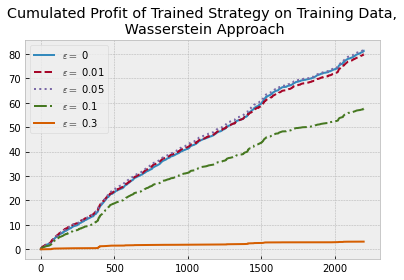

In [58]:
linestyle_list=["solid","dashed","dotted","dashdot"]*10
for i in range(len(epsilons)):
    plt.plot(np.cumsum(profits_W[i]),
             label = r'$\varepsilon =$ ' + str(epsilons[i]),
            linestyle = linestyle_list[i]
            )
plt.grid(True)
plt.title("Cumulated Profit of Trained Strategy on Training Data,\n Wasserstein Approach")
plt.legend()
plt.tight_layout()
plt.savefig('trades_training_wasserstein.eps', format='eps')
plt.show()

Statistics for the Wasserstein Approach

In [59]:
profits_W = np.array(profits_W)
#Overall Profit
overall_W = np.cumsum(profits_W,1)[:,-1]
#Average Profit
average_W = np.mean(profits_W,1)
#% of Profitable Trades
percentage_W = np.sum((profits_W>0)/(profits_W.shape[1]),1)
#Sharpe Ratio 
Sharpe_W = np.mean(profits_W,1)/np.sqrt(np.mean((profits_W)**2,1))
#Sortino Ratio
Sortino_W = np.mean(profits_W,1)/np.sqrt(np.mean((profits_W*(profits_W<0))**2,1))
data_W = {"Overall Profit": overall_W,
          "Average Profit":average_W,
          "% of Profitable Trades": np.round(percentage_W*100,2),
         "Sharpe Ratio ":Sharpe_W,
         "Sortino Ratio":Sortino_W}
df_W = pd.DataFrame(data = data_W ,index  = ["Epsilon = {}".format(str(eps)) for eps in epsilons])
df_W

,Overall Profit,Average Profit,% of Profitable Trades,Sharpe Ratio,Sortino Ratio
Epsilon = 0,81.325562,0.036983,88.49,0.646176,4.033338
Epsilon = 0.01,79.931862,0.036349,87.77,0.636199,3.621100
Epsilon = 0.05,81.810234,0.037203,95.54,0.680152,13.366848
Epsilon = 0.1,57.586609,0.026188,91.22,0.588494,35.648758
Epsilon = 0.3,3.150999,0.001433,64.85,0.154645,9.786554


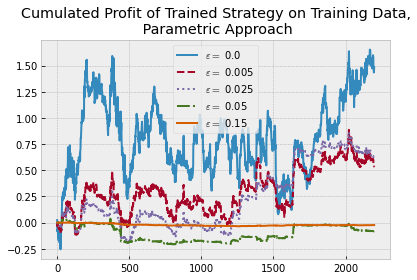

In [60]:
linestyle_list=["solid","dashed","dotted","dashdot"]*10
for i in range(len(epsilons)):
    plt.plot(np.cumsum(profits_P[i]),
             label = r'$\varepsilon =$ ' + str(np.round(epsilons[i]*scale_parametric,3)),
            linestyle = linestyle_list[i]
            )
plt.grid(True)
plt.title("Cumulated Profit of Trained Strategy on Training Data,\n Parametric Approach")
plt.legend()
plt.tight_layout()
#plt.savefig('trades_training_parametric.eps', format='eps')
plt.show()

Statistics for the Parametric Approach

In [61]:
profits_P = np.array(profits_P)
#Overall Profit
overall_P = np.cumsum(profits_P,1)[:,-1]
#Average Profit
average_P = np.mean(profits_P,1)
#% of Profitable Trades
percentage_P = np.sum((profits_P>0)/(profits_P.shape[1]),1)
#Sharpe Ratio 
Sharpe_P = np.mean(profits_P,1)/np.sqrt(np.mean((profits_P)**2,1))
#Sortino Ratioa
Sortino_P = np.mean(profits_P,1)/np.sqrt(np.mean((profits_P*(profits_P<0))**2,1))

data_P = {"Overall Profit": overall_P,
          "Average Profit":average_P,
          "% of Profitable Trades": np.round(percentage_P*100,2),
         "Sharpe Ratio ":Sharpe_P,
         "Sortino Ratio":Sortino_P}
df_P = pd.DataFrame(data = data_P ,index  = ["Epsilon = {}".format(np.round(eps*scale_parametric,3)) for eps in epsilons])
df_P

,Overall Profit,Average Profit,% of Profitable Trades,Sharpe Ratio,Sortino Ratio
Epsilon = 0.0,1.484332,0.000675,51.66,0.014634,0.020814
Epsilon = 0.005,0.544649,0.000248,51.80,0.012904,0.018135
Epsilon = 0.025,0.616511,0.000280,52.07,0.021885,0.030783
Epsilon = 0.05,-0.081915,-0.000037,50.61,-0.008278,-0.009835
Epsilon = 0.15,-0.023041,-0.000010,49.34,-0.025887,-0.033419


### 2) In Testing Period 1

In [62]:
# Test set
Returns_test = Returns_10periods_test_1
N_test = Returns_test.shape[1]
profits_W = []
profits_P = []
for j in range(len(epsilons)):
    trades_W_eps = []
    profits_W_eps = []
    trades_P_eps = []
    profits_P_eps = []
    for i in range(N_test-1):
        trades_W_eps.append(a_W[j](tf.expand_dims(Returns_test[:,i,:],0)))
        profits_W_eps.append(tf.tensordot(trades_W_eps[-1], Returns_test[:,i+1,-1], 1)[0].numpy())
        trades_P_eps.append(a_P[j](tf.expand_dims(Returns_test[:,i,:],0)))
        profits_P_eps.append(tf.tensordot(trades_P_eps[-1], Returns_test[:,i+1,-1], 1)[0].numpy())
    profits_W.append(profits_W_eps)
    profits_P.append(profits_P_eps)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


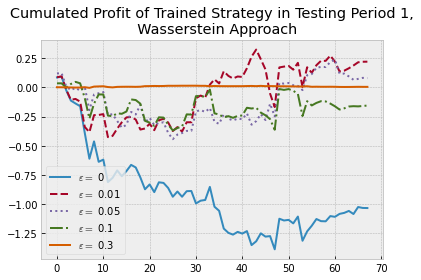

In [63]:
linestyle_list=["solid","dashed","dotted","dashdot"]*10
for i in range(len(epsilons)):
    plt.plot(np.cumsum(profits_W[i]),
             label = r'$\varepsilon =$ ' + str(epsilons[i]),
            linestyle = linestyle_list[i]
            )
plt.grid(True)
plt.title("Cumulated Profit of Trained Strategy in Testing Period 1,\n  Wasserstein Approach")
plt.legend()
plt.tight_layout()
plt.savefig('trades_period_1_wasserstein.eps', format='eps')
plt.show()

Statistics for the Wasserstein Approach

In [64]:
profits_W = np.array(profits_W)
#Overall Profit
overall_W = np.cumsum(profits_W,1)[:,-1]
#Average Profit
average_W = np.mean(profits_W,1)
#% of Profitable Trades
percentage_W = np.sum((profits_W>0)/(profits_W.shape[1]),1)
#Sharpe Ratio 
Sharpe_W = np.mean(profits_W,1)/np.sqrt(np.mean((profits_W)**2,1))
#Sortino Ratio
Sortino_W = np.mean(profits_W,1)/np.sqrt(np.mean((profits_W*(profits_W<0))**2,1))
data_W = {"Overall Profit": overall_W,
          "Average Profit":average_W,
          "% of Profitable Trades": np.round(percentage_W*100,2),
         "Sharpe Ratio ":Sharpe_W,
         "Sortino Ratio":Sortino_W}
df_W = pd.DataFrame(data = data_W ,index  = ["Epsilon = {}".format(str(eps)) for eps in epsilons])
df_W

,Overall Profit,Average Profit,% of Profitable Trades,Sharpe Ratio,Sortino Ratio
Epsilon = 0,-1.035019,-0.015221,47.06,-0.172211,-0.207249
Epsilon = 0.01,0.221663,0.003260,58.82,0.035932,0.052785
Epsilon = 0.05,0.080857,0.001189,55.88,0.015079,0.022100
Epsilon = 0.1,-0.154961,-0.002279,44.12,-0.028555,-0.041425
Epsilon = 0.3,0.005442,0.000080,48.53,0.035702,0.055826


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


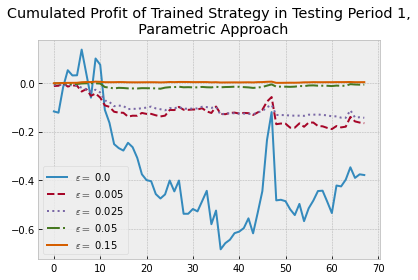

In [65]:
linestyle_list=["solid","dashed","dotted","dashdot"]*10
for i in range(len(epsilons)):
    plt.plot(np.cumsum(profits_P[i]),
             label = r'$\varepsilon =$ ' + str(np.round(epsilons[i]*scale_parametric,3)),
            linestyle = linestyle_list[i]
            )
plt.grid(True)
plt.title("Cumulated Profit of Trained Strategy in Testing Period 1,\n  Parametric Approach")
plt.legend()
plt.tight_layout()
plt.savefig('trades_period_1_parametric.eps', format='eps')
plt.show()

Statistics for the Parametric Approach

In [66]:
profits_P = np.array(profits_P)
#Overall Profit
overall_P = np.cumsum(profits_P,1)[:,-1]
#Average Profit
average_P = np.mean(profits_P,1)
#% of Profitable Trades
percentage_P = np.sum((profits_P>0)/(profits_P.shape[1]),1)
#Sharpe Ratio 
Sharpe_P = np.mean(profits_P,1)/np.sqrt(np.mean((profits_P)**2,1))
#Sortino Ratioa
Sortino_P = np.mean(profits_P,1)/np.sqrt(np.mean((profits_P*(profits_P<0))**2,1))

data_P = {"Overall Profit": overall_P,
          "Average Profit":average_P,
          "% of Profitable Trades": np.round(percentage_P*100,2),
         "Sharpe Ratio ":Sharpe_P,
         "Sortino Ratio":Sortino_P}
df_P = pd.DataFrame(data = data_P ,index  = ["Epsilon = {}".format(str(np.round(eps*scale_parametric,3))) for eps in epsilons])
df_P

,Overall Profit,Average Profit,% of Profitable Trades,Sharpe Ratio,Sortino Ratio
Epsilon = 0.0,-0.378669,-0.005569,50.00,-0.067022,-0.083380
Epsilon = 0.005,-0.165537,-0.002434,42.65,-0.127499,-0.146742
Epsilon = 0.025,-0.143357,-0.002108,38.24,-0.198093,-0.225493
Epsilon = 0.05,-0.006977,-0.000103,50.00,-0.035993,-0.043762
Epsilon = 0.15,0.003136,0.000046,58.82,0.053274,0.066614


### 3) In Testing Period 2

In [67]:
# Test set
Returns_test = Returns_10periods_test_2
N_test = Returns_test.shape[1]
profits_W = []
profits_P = []
for j in range(len(epsilons)):
    trades_W_eps = []
    profits_W_eps = []
    trades_P_eps = []
    profits_P_eps = []
    for i in range(N_test-1):
        trades_W_eps.append(a_W[j](tf.expand_dims(Returns_test[:,i,:],0)))
        profits_W_eps.append(tf.tensordot(trades_W_eps[-1], Returns_test[:,i+1,-1], 1)[0].numpy())
        trades_P_eps.append(a_P[j](tf.expand_dims(Returns_test[:,i,:],0)))
        profits_P_eps.append(tf.tensordot(trades_P_eps[-1], Returns_test[:,i+1,-1], 1)[0].numpy())
    profits_W.append(profits_W_eps)
    profits_P.append(profits_P_eps)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


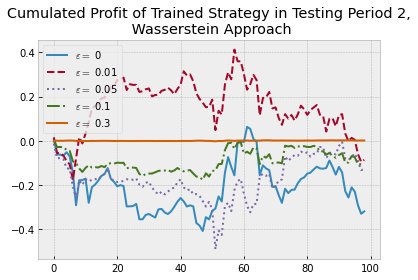

In [68]:
linestyle_list=["solid","dashed","dotted","dashdot"]*10
for i in range(len(epsilons)):
    plt.plot(np.cumsum(profits_W[i]),
             label = r'$\varepsilon =$ ' + str(epsilons[i]),
            linestyle = linestyle_list[i]
            )
plt.grid(True)
plt.title("Cumulated Profit of Trained Strategy in Testing Period 2,\n Wasserstein Approach")
plt.legend()
plt.tight_layout()
plt.savefig('trades_period_2_wasserstein.eps', format='eps')
plt.show()

Statistics for the Wasserstein Approach

In [69]:
profits_W = np.array(profits_W)
#Overall Profit
overall_W = np.cumsum(profits_W,1)[:,-1]
#Average Profit
average_W = np.mean(profits_W,1)
#% of Profitable Trades
percentage_W = np.sum((profits_W>0)/(profits_W.shape[1]),1)
#Sharpe Ratio 
Sharpe_W = np.mean(profits_W,1)/np.sqrt(np.mean((profits_W)**2,1))
#Sortino Ratio
Sortino_W = np.mean(profits_W,1)/np.sqrt(np.mean((profits_W*(profits_W<0))**2,1))
data_W = {"Overall Profit": overall_W,
          "Average Profit":average_W,
          "% of Profitable Trades": np.round(percentage_W*100,2),
         "Sharpe Ratio ":Sharpe_W,
         "Sortino Ratio":Sortino_W}
df_W = pd.DataFrame(data = data_W ,index  = ["Epsilon = {}".format(str(eps)) for eps in epsilons])
df_W

,Overall Profit,Average Profit,% of Profitable Trades,Sharpe Ratio,Sortino Ratio
Epsilon = 0,-0.319652,-0.003229,51.52,-0.068955,-0.091312
Epsilon = 0.01,-0.086229,-0.000871,56.57,-0.018503,-0.025662
Epsilon = 0.05,-0.128121,-0.001294,52.53,-0.031648,-0.044057
Epsilon = 0.1,-0.108500,-0.001096,50.51,-0.054067,-0.074651
Epsilon = 0.3,0.001415,0.000014,52.53,0.027997,0.040511


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


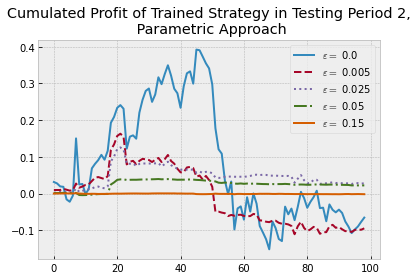

In [70]:
linestyle_list=["solid","dashed","dotted","dashdot"]*10
for i in range(len(epsilons)):
    plt.plot(np.cumsum(profits_P[i]),
             label = r'$\varepsilon =$ ' + str(np.round(epsilons[i]*scale_parametric,3)),
            linestyle = linestyle_list[i]
            )
plt.grid(True)
plt.title("Cumulated Profit of Trained Strategy in Testing Period 2,\n Parametric Approach")
plt.legend()
plt.tight_layout()
plt.savefig('trades_period_2_parametric.eps', format='eps')
plt.show()

Statistics for the Parametric Approach

In [71]:
profits_P = np.array(profits_P)
#Overall Profit
overall_P = np.cumsum(profits_P,1)[:,-1]
#Average Profit
average_P = np.mean(profits_P,1)
#% of Profitable Trades
percentage_P = np.sum((profits_P>0)/(profits_P.shape[1]),1)
#Sharpe Ratio 
Sharpe_P = np.mean(profits_P,1)/np.sqrt(np.mean((profits_P)**2,1))
#Sortino Ratioa
Sortino_P = np.mean(profits_P,1)/np.sqrt(np.mean((profits_P*(profits_P<0))**2,1))

data_P = {"Overall Profit": overall_P,
          "Average Profit":average_P,
          "% of Profitable Trades": np.round(percentage_P*100,2),
         "Sharpe Ratio ":Sharpe_P,
         "Sortino Ratio":Sortino_P}
df_P = pd.DataFrame(data = data_P ,index  = ["Epsilon = {}".format(str(np.round(eps*scale_parametric,3))) for eps in epsilons]) 
df_P

,Overall Profit,Average Profit,% of Profitable Trades,Sharpe Ratio,Sortino Ratio
Epsilon = 0.0,-0.065187,-0.000658,48.48,-0.014956,-0.020914
Epsilon = 0.005,-0.094396,-0.000953,50.51,-0.063190,-0.079788
Epsilon = 0.025,0.027990,0.000283,55.56,0.030187,0.053250
Epsilon = 0.05,0.022454,0.000227,49.49,0.079555,0.277870
Epsilon = 0.15,-0.001429,-0.000014,49.49,-0.048469,-0.061703


### 4) In Testing Period 3

In [72]:
# Test set
Returns_test = Returns_10periods_test_3
N_test = Returns_test.shape[1]
profits_W = []
profits_P = []
for j in range(len(epsilons)):
    trades_W_eps = []
    profits_W_eps = []
    trades_P_eps = []
    profits_P_eps = []
    for i in range(N_test-1):
        trades_W_eps.append(a_W[j](tf.expand_dims(Returns_test[:,i,:],0)))
        profits_W_eps.append(tf.tensordot(trades_W_eps[-1], Returns_test[:,i+1,-1], 1)[0].numpy())
        trades_P_eps.append(a_P[j](tf.expand_dims(Returns_test[:,i,:],0)))
        profits_P_eps.append(tf.tensordot(trades_P_eps[-1], Returns_test[:,i+1,-1], 1)[0].numpy())
    profits_W.append(profits_W_eps)
    profits_P.append(profits_P_eps)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


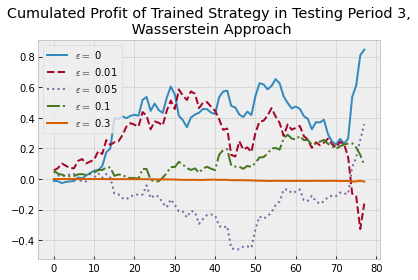

In [73]:
linestyle_list=["solid","dashed","dotted","dashdot"]*10
for i in range(len(epsilons)):
    plt.plot(np.cumsum(profits_W[i]),
             label = r'$\varepsilon =$ ' + str(epsilons[i]),
            linestyle = linestyle_list[i]
            )
plt.grid(True)
plt.title("Cumulated Profit of Trained Strategy in Testing Period 3,\n Wasserstein Approach")
plt.legend()
plt.tight_layout()
plt.savefig('trades_period_3_wasserstein.eps', format='eps')
plt.show()

Statistics for the Wasserstein Approach

In [74]:
profits_W = np.array(profits_W)
#Overall Profit
overall_W = np.cumsum(profits_W,1)[:,-1]
#Average Profit
average_W = np.mean(profits_W,1)
#% of Profitable Trades
percentage_W = np.sum((profits_W>0)/(profits_W.shape[1]),1)
#Sharpe Ratio 
Sharpe_W = np.mean(profits_W,1)/np.sqrt(np.mean((profits_W)**2,1))
#Sortino Ratio
Sortino_W = np.mean(profits_W,1)/np.sqrt(np.mean((profits_W*(profits_W<0))**2,1))
data_W = {"Overall Profit": overall_W,
          "Average Profit":average_W,
          "% of Profitable Trades": np.round(percentage_W*100,2),
         "Sharpe Ratio ":Sharpe_W,
         "Sortino Ratio":Sortino_W}
df_W = pd.DataFrame(data = data_W ,index  = ["Epsilon = {}".format(str(eps)) for eps in epsilons])
df_W

,Overall Profit,Average Profit,% of Profitable Trades,Sharpe Ratio,Sortino Ratio
Epsilon = 0,0.845952,0.010846,52.56,0.166630,0.335301
Epsilon = 0.01,-0.160733,-0.002061,48.72,-0.031032,-0.040478
Epsilon = 0.05,0.358808,0.004600,52.56,0.096431,0.154537
Epsilon = 0.1,0.087670,0.001124,52.56,0.037463,0.053469
Epsilon = 0.3,-0.017214,-0.000221,43.59,-0.199209,-0.231336


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


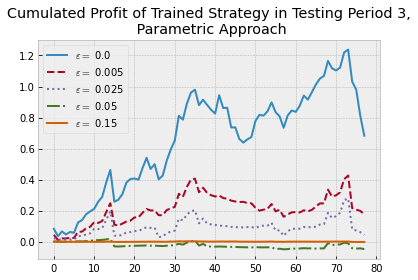

In [75]:
linestyle_list=["solid","dashed","dotted","dashdot"]*10
for i in range(len(epsilons)):
    plt.plot(np.cumsum(profits_P[i]),
             label = r'$\varepsilon =$ ' + str(np.round(epsilons[i]*scale_parametric,3)),
            linestyle = linestyle_list[i]
            )
plt.grid(True)
plt.title("Cumulated Profit of Trained Strategy in Testing Period 3,\n Parametric Approach")
plt.legend()
plt.tight_layout()
plt.savefig('trades_period_3_parametric.eps', format='eps')
plt.show()

Statistics for the Parametric Approach

In [76]:
profits_P = np.array(profits_P)
#Overall Profit
overall_P = np.cumsum(profits_P,1)[:,-1]
#Average Profit
average_P = np.mean(profits_P,1)
#% of Profitable Trades
percentage_P = np.sum((profits_P>0)/(profits_P.shape[1]),1)
#Sharpe Ratio 
Sharpe_P = np.mean(profits_P,1)/np.sqrt(np.mean((profits_P)**2,1))
#Sortino Ratioa
Sortino_P = np.mean(profits_P,1)/np.sqrt(np.mean((profits_P*(profits_P<0))**2,1))

data_P = {"Overall Profit": overall_P,
          "Average Profit":average_P,
          "% of Profitable Trades": np.round(percentage_P*100,2),
         "Sharpe Ratio ":Sharpe_P,
         "Sortino Ratio":Sortino_P}
df_P = pd.DataFrame(data = data_P ,index  = ["Epsilon = {}".format(str(np.round(eps*scale_parametric,3))) for eps in epsilons])
df_P

,Overall Profit,Average Profit,% of Profitable Trades,Sharpe Ratio,Sortino Ratio
Epsilon = 0.0,0.682794,0.008754,64.10,0.124028,0.170558
Epsilon = 0.005,0.176339,0.002261,61.54,0.054989,0.069144
Epsilon = 0.025,0.043324,0.000555,64.10,0.014557,0.017213
Epsilon = 0.05,-0.047627,-0.000611,52.56,-0.064649,-0.075748
Epsilon = 0.15,-0.001740,-0.000022,51.28,-0.039336,-0.049270
